# Library

In [1]:
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,fe,gan

%reload_ext autoreload

# Load data

In [5]:
# load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# reshape and normalization

In [6]:
# reshape data for CNN as (28, 28, 1) and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255

In [7]:
num_labels = np.amax(y_train) + 1
y_train = to_categorical(y_train)

# Parameter

In [8]:
model_name = "cgan_mnist"
# network parameters
# the latent or z vector is 100-dim
latent_size = 100
batch_size = 64
train_steps = 40000
lr = 2e-4
decay = 6e-8
input_shape = (image_size, image_size, 1)
label_shape = (num_labels, )

# Model

In [9]:
models = gan.cgan_build(input_shape,label_shape,image_size,lr,decay,latent_size,model_name)

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
class_labels (InputLayer)       [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 784)          8624        class_labels[0][0]               
__________________________________________________________________________________________________
discriminator_input (InputLayer [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 28, 28, 1)    0           dense[0][0]                      
______________________________________________________________________________________

Total params: 2,454,226
Trainable params: 1,363,521
Non-trainable params: 1,090,705
__________________________________________________________________________________________________


In [11]:
gan.cgan_train(models,x_train, y_train, [64,100,40000,10,"CGAN"])

DCGAN Labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
0: [discriminator loss: 0.254078, acc: 0.914062] [adversarial loss: 0.426234, acc: 0.859375]
1: [discriminator loss: 0.312406, acc: 0.906250] [adversarial loss: 2.770526, acc: 0.000000]
2: [discriminator loss: 0.312436, acc: 0.875000] [adversarial loss: 0.154909, acc: 0.984375]
3: [discriminator loss: 0.481389, acc: 0.687500] [adversarial loss: 6.422361, acc: 0.000000]
4: [discriminator loss: 0.722923, acc: 0.695312] [adversarial loss: 0.117805, acc: 1.000000]
5: [discriminator loss: 0.547463, acc: 0.585938] [adversarial loss: 5.993046, acc: 0.000000]
6: [discriminator loss: 0.491187, acc: 0.757812] [adversarial loss: 1.179601, acc: 0.046875]
7: [discriminator loss: 0.142959, acc: 1.000000] [adversarial loss: 3.311847, acc: 0.000000]
8: [discriminator loss: 0.086825, acc: 0.976562] [adversarial loss: 2.175136, acc: 0.000000]
9: [discriminator loss: 0.095920, acc: 0.992188] [adversarial loss: 2.759624, acc: 0.000000]


88: [discriminator loss: 0.380423, acc: 0.828125] [adversarial loss: 4.630613, acc: 0.000000]
89: [discriminator loss: 0.622634, acc: 0.757812] [adversarial loss: 0.192071, acc: 0.984375]
90: [discriminator loss: 0.432111, acc: 0.773438] [adversarial loss: 3.701262, acc: 0.015625]
91: [discriminator loss: 0.174616, acc: 0.921875] [adversarial loss: 1.558168, acc: 0.078125]
92: [discriminator loss: 0.234092, acc: 0.914062] [adversarial loss: 4.103126, acc: 0.000000]
93: [discriminator loss: 0.227003, acc: 0.906250] [adversarial loss: 1.874736, acc: 0.078125]
94: [discriminator loss: 0.183372, acc: 0.960938] [adversarial loss: 4.904719, acc: 0.000000]
95: [discriminator loss: 0.151895, acc: 0.945312] [adversarial loss: 2.088376, acc: 0.046875]
96: [discriminator loss: 0.151995, acc: 0.960938] [adversarial loss: 4.778960, acc: 0.000000]
97: [discriminator loss: 0.176811, acc: 0.914062] [adversarial loss: 2.191322, acc: 0.046875]
98: [discriminator loss: 0.146436, acc: 0.960938] [adversari

175: [discriminator loss: 0.215300, acc: 0.937500] [adversarial loss: 3.445577, acc: 0.000000]
176: [discriminator loss: 0.194709, acc: 0.906250] [adversarial loss: 4.773294, acc: 0.000000]
177: [discriminator loss: 0.262436, acc: 0.890625] [adversarial loss: 1.578683, acc: 0.265625]
178: [discriminator loss: 0.406900, acc: 0.789062] [adversarial loss: 5.745101, acc: 0.000000]
179: [discriminator loss: 0.490181, acc: 0.781250] [adversarial loss: 0.598161, acc: 0.687500]
180: [discriminator loss: 0.426078, acc: 0.804688] [adversarial loss: 2.443185, acc: 0.078125]
181: [discriminator loss: 0.241702, acc: 0.921875] [adversarial loss: 0.490824, acc: 0.734375]
182: [discriminator loss: 0.365216, acc: 0.851562] [adversarial loss: 1.844737, acc: 0.156250]
183: [discriminator loss: 0.199424, acc: 0.914062] [adversarial loss: 0.485454, acc: 0.734375]
184: [discriminator loss: 0.199538, acc: 0.914062] [adversarial loss: 0.850111, acc: 0.468750]
185: [discriminator loss: 0.207358, acc: 0.929688]

263: [discriminator loss: 0.233453, acc: 0.929688] [adversarial loss: 0.628460, acc: 0.609375]
264: [discriminator loss: 0.200145, acc: 0.937500] [adversarial loss: 0.180800, acc: 1.000000]
265: [discriminator loss: 0.316558, acc: 0.867188] [adversarial loss: 1.392888, acc: 0.156250]
266: [discriminator loss: 0.321083, acc: 0.890625] [adversarial loss: 0.053402, acc: 1.000000]
267: [discriminator loss: 0.319159, acc: 0.851562] [adversarial loss: 0.796315, acc: 0.484375]
268: [discriminator loss: 0.292348, acc: 0.875000] [adversarial loss: 0.195693, acc: 0.984375]
269: [discriminator loss: 0.306398, acc: 0.882812] [adversarial loss: 2.354425, acc: 0.000000]
270: [discriminator loss: 0.269458, acc: 0.859375] [adversarial loss: 0.274577, acc: 0.968750]
271: [discriminator loss: 0.334400, acc: 0.835938] [adversarial loss: 1.285120, acc: 0.140625]
272: [discriminator loss: 0.233195, acc: 0.890625] [adversarial loss: 0.386911, acc: 0.828125]
273: [discriminator loss: 0.268224, acc: 0.898438]

350: [discriminator loss: 0.450468, acc: 0.765625] [adversarial loss: 0.273780, acc: 0.890625]
351: [discriminator loss: 0.660253, acc: 0.617188] [adversarial loss: 3.141602, acc: 0.000000]
352: [discriminator loss: 0.404175, acc: 0.812500] [adversarial loss: 1.128208, acc: 0.281250]
353: [discriminator loss: 0.384002, acc: 0.835938] [adversarial loss: 1.511319, acc: 0.187500]
354: [discriminator loss: 0.267155, acc: 0.890625] [adversarial loss: 0.883421, acc: 0.421875]
355: [discriminator loss: 0.189132, acc: 0.929688] [adversarial loss: 0.644726, acc: 0.609375]
356: [discriminator loss: 0.235377, acc: 0.929688] [adversarial loss: 0.624793, acc: 0.656250]
357: [discriminator loss: 0.216296, acc: 0.929688] [adversarial loss: 0.699173, acc: 0.578125]
358: [discriminator loss: 0.257708, acc: 0.875000] [adversarial loss: 1.336113, acc: 0.109375]
359: [discriminator loss: 0.234592, acc: 0.914062] [adversarial loss: 0.386612, acc: 0.843750]
360: [discriminator loss: 0.390286, acc: 0.828125]

438: [discriminator loss: 0.332838, acc: 0.867188] [adversarial loss: 0.672703, acc: 0.656250]
439: [discriminator loss: 0.512957, acc: 0.726562] [adversarial loss: 1.206600, acc: 0.203125]
440: [discriminator loss: 0.299909, acc: 0.890625] [adversarial loss: 0.316280, acc: 0.906250]
441: [discriminator loss: 0.326591, acc: 0.843750] [adversarial loss: 1.091879, acc: 0.234375]
442: [discriminator loss: 0.329467, acc: 0.867188] [adversarial loss: 0.133220, acc: 0.984375]
443: [discriminator loss: 0.204799, acc: 0.906250] [adversarial loss: 0.197037, acc: 0.968750]
444: [discriminator loss: 0.291951, acc: 0.906250] [adversarial loss: 0.397362, acc: 0.828125]
445: [discriminator loss: 0.288437, acc: 0.906250] [adversarial loss: 0.153719, acc: 0.968750]
446: [discriminator loss: 0.607267, acc: 0.664062] [adversarial loss: 2.320236, acc: 0.000000]
447: [discriminator loss: 0.911188, acc: 0.585938] [adversarial loss: 0.147895, acc: 0.984375]
448: [discriminator loss: 0.693725, acc: 0.625000]

525: [discriminator loss: 0.642895, acc: 0.625000] [adversarial loss: 1.047045, acc: 0.312500]
526: [discriminator loss: 0.388761, acc: 0.828125] [adversarial loss: 0.901292, acc: 0.390625]
527: [discriminator loss: 0.358031, acc: 0.851562] [adversarial loss: 0.678715, acc: 0.562500]
528: [discriminator loss: 0.413307, acc: 0.820312] [adversarial loss: 0.568802, acc: 0.671875]
529: [discriminator loss: 0.347665, acc: 0.890625] [adversarial loss: 0.704944, acc: 0.609375]
530: [discriminator loss: 0.457083, acc: 0.773438] [adversarial loss: 0.863157, acc: 0.515625]
531: [discriminator loss: 0.521326, acc: 0.796875] [adversarial loss: 0.861355, acc: 0.437500]
532: [discriminator loss: 0.454652, acc: 0.781250] [adversarial loss: 0.722681, acc: 0.593750]
533: [discriminator loss: 0.441308, acc: 0.828125] [adversarial loss: 1.123122, acc: 0.265625]
534: [discriminator loss: 0.321292, acc: 0.875000] [adversarial loss: 0.417810, acc: 0.812500]
535: [discriminator loss: 0.532731, acc: 0.671875]

613: [discriminator loss: 0.480309, acc: 0.789062] [adversarial loss: 1.584746, acc: 0.031250]
614: [discriminator loss: 0.461062, acc: 0.804688] [adversarial loss: 1.134672, acc: 0.171875]
615: [discriminator loss: 0.440240, acc: 0.781250] [adversarial loss: 1.388795, acc: 0.078125]
616: [discriminator loss: 0.437281, acc: 0.804688] [adversarial loss: 0.764999, acc: 0.421875]
617: [discriminator loss: 0.444204, acc: 0.804688] [adversarial loss: 1.375601, acc: 0.078125]
618: [discriminator loss: 0.435993, acc: 0.812500] [adversarial loss: 0.483287, acc: 0.781250]
619: [discriminator loss: 0.666239, acc: 0.570312] [adversarial loss: 2.804502, acc: 0.015625]
620: [discriminator loss: 0.840036, acc: 0.585938] [adversarial loss: 0.730518, acc: 0.515625]
621: [discriminator loss: 0.499572, acc: 0.757812] [adversarial loss: 1.361266, acc: 0.125000]
622: [discriminator loss: 0.419451, acc: 0.820312] [adversarial loss: 0.793605, acc: 0.468750]
623: [discriminator loss: 0.504691, acc: 0.726562]

701: [discriminator loss: 0.629777, acc: 0.632812] [adversarial loss: 2.528651, acc: 0.000000]
702: [discriminator loss: 0.567531, acc: 0.671875] [adversarial loss: 1.029588, acc: 0.343750]
703: [discriminator loss: 0.399646, acc: 0.835938] [adversarial loss: 1.829846, acc: 0.046875]
704: [discriminator loss: 0.416914, acc: 0.828125] [adversarial loss: 1.049648, acc: 0.265625]
705: [discriminator loss: 0.394519, acc: 0.851562] [adversarial loss: 1.306980, acc: 0.125000]
706: [discriminator loss: 0.395586, acc: 0.835938] [adversarial loss: 1.588426, acc: 0.093750]
707: [discriminator loss: 0.368956, acc: 0.828125] [adversarial loss: 1.357502, acc: 0.171875]
708: [discriminator loss: 0.379077, acc: 0.843750] [adversarial loss: 1.549268, acc: 0.140625]
709: [discriminator loss: 0.320848, acc: 0.859375] [adversarial loss: 1.246301, acc: 0.265625]
710: [discriminator loss: 0.418723, acc: 0.820312] [adversarial loss: 1.478791, acc: 0.125000]
711: [discriminator loss: 0.331076, acc: 0.875000]

789: [discriminator loss: 0.421449, acc: 0.781250] [adversarial loss: 1.324480, acc: 0.234375]
790: [discriminator loss: 0.418811, acc: 0.812500] [adversarial loss: 1.680481, acc: 0.093750]
791: [discriminator loss: 0.396291, acc: 0.851562] [adversarial loss: 1.283110, acc: 0.218750]
792: [discriminator loss: 0.369752, acc: 0.875000] [adversarial loss: 1.706942, acc: 0.093750]
793: [discriminator loss: 0.418221, acc: 0.789062] [adversarial loss: 1.376052, acc: 0.234375]
794: [discriminator loss: 0.387100, acc: 0.835938] [adversarial loss: 1.672313, acc: 0.093750]
795: [discriminator loss: 0.410487, acc: 0.820312] [adversarial loss: 1.201782, acc: 0.218750]
796: [discriminator loss: 0.336337, acc: 0.914062] [adversarial loss: 1.924261, acc: 0.078125]
797: [discriminator loss: 0.424836, acc: 0.812500] [adversarial loss: 1.232913, acc: 0.265625]
798: [discriminator loss: 0.374988, acc: 0.835938] [adversarial loss: 2.537951, acc: 0.031250]
799: [discriminator loss: 0.425050, acc: 0.820312]

877: [discriminator loss: 0.401486, acc: 0.812500] [adversarial loss: 1.008616, acc: 0.390625]
878: [discriminator loss: 0.463775, acc: 0.781250] [adversarial loss: 2.387533, acc: 0.046875]
879: [discriminator loss: 0.376384, acc: 0.859375] [adversarial loss: 0.840578, acc: 0.578125]
880: [discriminator loss: 0.456966, acc: 0.796875] [adversarial loss: 2.173239, acc: 0.078125]
881: [discriminator loss: 0.449891, acc: 0.789062] [adversarial loss: 1.340162, acc: 0.218750]
882: [discriminator loss: 0.386259, acc: 0.835938] [adversarial loss: 1.566389, acc: 0.218750]
883: [discriminator loss: 0.420846, acc: 0.843750] [adversarial loss: 1.422200, acc: 0.140625]
884: [discriminator loss: 0.457356, acc: 0.781250] [adversarial loss: 1.493411, acc: 0.140625]
885: [discriminator loss: 0.394267, acc: 0.851562] [adversarial loss: 1.727479, acc: 0.187500]
886: [discriminator loss: 0.413412, acc: 0.789062] [adversarial loss: 1.294522, acc: 0.218750]
887: [discriminator loss: 0.402049, acc: 0.812500]

965: [discriminator loss: 0.449127, acc: 0.804688] [adversarial loss: 1.498420, acc: 0.109375]
966: [discriminator loss: 0.508836, acc: 0.742188] [adversarial loss: 0.998795, acc: 0.390625]
967: [discriminator loss: 0.469488, acc: 0.789062] [adversarial loss: 2.103022, acc: 0.031250]
968: [discriminator loss: 0.527876, acc: 0.765625] [adversarial loss: 0.905920, acc: 0.500000]
969: [discriminator loss: 0.589635, acc: 0.703125] [adversarial loss: 1.827693, acc: 0.078125]
970: [discriminator loss: 0.473686, acc: 0.781250] [adversarial loss: 0.948620, acc: 0.437500]
971: [discriminator loss: 0.449392, acc: 0.781250] [adversarial loss: 1.346070, acc: 0.125000]
972: [discriminator loss: 0.482778, acc: 0.781250] [adversarial loss: 0.988869, acc: 0.421875]
973: [discriminator loss: 0.529472, acc: 0.718750] [adversarial loss: 1.886392, acc: 0.093750]
974: [discriminator loss: 0.535543, acc: 0.703125] [adversarial loss: 0.835030, acc: 0.453125]
975: [discriminator loss: 0.471892, acc: 0.742188]

1050: [discriminator loss: 0.462409, acc: 0.757812] [adversarial loss: 1.027038, acc: 0.281250]
1051: [discriminator loss: 0.500621, acc: 0.757812] [adversarial loss: 1.215217, acc: 0.187500]
1052: [discriminator loss: 0.444957, acc: 0.789062] [adversarial loss: 1.146595, acc: 0.250000]
1053: [discriminator loss: 0.495237, acc: 0.757812] [adversarial loss: 1.337199, acc: 0.140625]
1054: [discriminator loss: 0.532132, acc: 0.742188] [adversarial loss: 0.856856, acc: 0.390625]
1055: [discriminator loss: 0.570216, acc: 0.695312] [adversarial loss: 1.919787, acc: 0.062500]
1056: [discriminator loss: 0.480436, acc: 0.757812] [adversarial loss: 0.923595, acc: 0.375000]
1057: [discriminator loss: 0.469700, acc: 0.765625] [adversarial loss: 1.495935, acc: 0.062500]
1058: [discriminator loss: 0.508616, acc: 0.726562] [adversarial loss: 0.961064, acc: 0.375000]
1059: [discriminator loss: 0.453560, acc: 0.820312] [adversarial loss: 1.421921, acc: 0.140625]
1060: [discriminator loss: 0.507983, acc

1136: [discriminator loss: 0.481129, acc: 0.750000] [adversarial loss: 0.904350, acc: 0.359375]
1137: [discriminator loss: 0.563449, acc: 0.726562] [adversarial loss: 1.736064, acc: 0.031250]
1138: [discriminator loss: 0.560510, acc: 0.757812] [adversarial loss: 0.792194, acc: 0.546875]
1139: [discriminator loss: 0.624597, acc: 0.648438] [adversarial loss: 1.908008, acc: 0.031250]
1140: [discriminator loss: 0.575695, acc: 0.695312] [adversarial loss: 0.685027, acc: 0.546875]
1141: [discriminator loss: 0.563237, acc: 0.687500] [adversarial loss: 1.574358, acc: 0.062500]
1142: [discriminator loss: 0.557813, acc: 0.750000] [adversarial loss: 0.905704, acc: 0.406250]
1143: [discriminator loss: 0.521156, acc: 0.726562] [adversarial loss: 1.599910, acc: 0.093750]
1144: [discriminator loss: 0.475433, acc: 0.781250] [adversarial loss: 0.967157, acc: 0.343750]
1145: [discriminator loss: 0.540936, acc: 0.703125] [adversarial loss: 1.225435, acc: 0.156250]
1146: [discriminator loss: 0.471418, acc

1222: [discriminator loss: 0.494031, acc: 0.765625] [adversarial loss: 1.220420, acc: 0.187500]
1223: [discriminator loss: 0.560213, acc: 0.726562] [adversarial loss: 0.914353, acc: 0.312500]
1224: [discriminator loss: 0.535382, acc: 0.757812] [adversarial loss: 1.149480, acc: 0.156250]
1225: [discriminator loss: 0.528464, acc: 0.750000] [adversarial loss: 0.908664, acc: 0.390625]
1226: [discriminator loss: 0.532265, acc: 0.742188] [adversarial loss: 1.563722, acc: 0.062500]
1227: [discriminator loss: 0.576709, acc: 0.671875] [adversarial loss: 0.729183, acc: 0.484375]
1228: [discriminator loss: 0.689595, acc: 0.609375] [adversarial loss: 1.968358, acc: 0.062500]
1229: [discriminator loss: 0.638529, acc: 0.632812] [adversarial loss: 0.601016, acc: 0.609375]
1230: [discriminator loss: 0.606623, acc: 0.640625] [adversarial loss: 1.485054, acc: 0.203125]
1231: [discriminator loss: 0.524796, acc: 0.789062] [adversarial loss: 1.245298, acc: 0.187500]
1232: [discriminator loss: 0.613576, acc

1308: [discriminator loss: 0.575473, acc: 0.664062] [adversarial loss: 0.869299, acc: 0.453125]
1309: [discriminator loss: 0.538738, acc: 0.703125] [adversarial loss: 1.397357, acc: 0.140625]
1310: [discriminator loss: 0.541719, acc: 0.710938] [adversarial loss: 0.909688, acc: 0.375000]
1311: [discriminator loss: 0.585384, acc: 0.671875] [adversarial loss: 1.762311, acc: 0.078125]
1312: [discriminator loss: 0.646906, acc: 0.632812] [adversarial loss: 0.641516, acc: 0.718750]
1313: [discriminator loss: 0.514786, acc: 0.671875] [adversarial loss: 1.584736, acc: 0.093750]
1314: [discriminator loss: 0.544515, acc: 0.734375] [adversarial loss: 0.951217, acc: 0.328125]
1315: [discriminator loss: 0.504913, acc: 0.757812] [adversarial loss: 1.285959, acc: 0.171875]
1316: [discriminator loss: 0.523253, acc: 0.726562] [adversarial loss: 1.076443, acc: 0.203125]
1317: [discriminator loss: 0.523985, acc: 0.726562] [adversarial loss: 1.227808, acc: 0.218750]
1318: [discriminator loss: 0.523242, acc

1394: [discriminator loss: 0.649017, acc: 0.640625] [adversarial loss: 0.773156, acc: 0.484375]
1395: [discriminator loss: 0.598676, acc: 0.632812] [adversarial loss: 1.635282, acc: 0.109375]
1396: [discriminator loss: 0.577920, acc: 0.710938] [adversarial loss: 0.891495, acc: 0.437500]
1397: [discriminator loss: 0.479269, acc: 0.765625] [adversarial loss: 1.222168, acc: 0.125000]
1398: [discriminator loss: 0.557150, acc: 0.695312] [adversarial loss: 0.998272, acc: 0.312500]
1399: [discriminator loss: 0.488503, acc: 0.812500] [adversarial loss: 0.936371, acc: 0.343750]
1400: [discriminator loss: 0.503543, acc: 0.765625] [adversarial loss: 1.298654, acc: 0.156250]
1401: [discriminator loss: 0.475822, acc: 0.828125] [adversarial loss: 0.915794, acc: 0.312500]
1402: [discriminator loss: 0.546634, acc: 0.703125] [adversarial loss: 1.379768, acc: 0.171875]
1403: [discriminator loss: 0.523809, acc: 0.742188] [adversarial loss: 1.189759, acc: 0.203125]
1404: [discriminator loss: 0.538002, acc

1480: [discriminator loss: 0.582010, acc: 0.726562] [adversarial loss: 1.694494, acc: 0.046875]
1481: [discriminator loss: 0.518174, acc: 0.718750] [adversarial loss: 0.969926, acc: 0.328125]
1482: [discriminator loss: 0.551388, acc: 0.687500] [adversarial loss: 1.580201, acc: 0.109375]
1483: [discriminator loss: 0.495717, acc: 0.781250] [adversarial loss: 1.107664, acc: 0.234375]
1484: [discriminator loss: 0.523444, acc: 0.703125] [adversarial loss: 1.392805, acc: 0.125000]
1485: [discriminator loss: 0.484194, acc: 0.789062] [adversarial loss: 1.092527, acc: 0.312500]
1486: [discriminator loss: 0.528091, acc: 0.750000] [adversarial loss: 1.420230, acc: 0.062500]
1487: [discriminator loss: 0.615989, acc: 0.632812] [adversarial loss: 1.081295, acc: 0.296875]
1488: [discriminator loss: 0.501777, acc: 0.757812] [adversarial loss: 1.174106, acc: 0.156250]
1489: [discriminator loss: 0.553979, acc: 0.687500] [adversarial loss: 1.542386, acc: 0.156250]
1490: [discriminator loss: 0.515568, acc

1564: [discriminator loss: 0.503149, acc: 0.765625] [adversarial loss: 1.337663, acc: 0.156250]
1565: [discriminator loss: 0.479374, acc: 0.734375] [adversarial loss: 1.030549, acc: 0.281250]
1566: [discriminator loss: 0.486010, acc: 0.765625] [adversarial loss: 1.444638, acc: 0.109375]
1567: [discriminator loss: 0.602735, acc: 0.617188] [adversarial loss: 1.056902, acc: 0.265625]
1568: [discriminator loss: 0.595607, acc: 0.679688] [adversarial loss: 1.252191, acc: 0.140625]
1569: [discriminator loss: 0.640339, acc: 0.640625] [adversarial loss: 1.189458, acc: 0.171875]
1570: [discriminator loss: 0.480094, acc: 0.734375] [adversarial loss: 1.370351, acc: 0.156250]
1571: [discriminator loss: 0.541207, acc: 0.671875] [adversarial loss: 0.751733, acc: 0.484375]
1572: [discriminator loss: 0.560023, acc: 0.710938] [adversarial loss: 2.011028, acc: 0.031250]
1573: [discriminator loss: 0.665885, acc: 0.648438] [adversarial loss: 0.645866, acc: 0.609375]
1574: [discriminator loss: 0.630143, acc

1650: [discriminator loss: 0.551311, acc: 0.734375] [adversarial loss: 1.075496, acc: 0.187500]
1651: [discriminator loss: 0.562787, acc: 0.734375] [adversarial loss: 1.508467, acc: 0.140625]
1652: [discriminator loss: 0.547897, acc: 0.734375] [adversarial loss: 0.988235, acc: 0.250000]
1653: [discriminator loss: 0.541404, acc: 0.710938] [adversarial loss: 1.196734, acc: 0.281250]
1654: [discriminator loss: 0.522083, acc: 0.773438] [adversarial loss: 0.810447, acc: 0.390625]
1655: [discriminator loss: 0.518772, acc: 0.765625] [adversarial loss: 1.459736, acc: 0.109375]
1656: [discriminator loss: 0.544799, acc: 0.726562] [adversarial loss: 1.425117, acc: 0.218750]
1657: [discriminator loss: 0.451007, acc: 0.828125] [adversarial loss: 1.301307, acc: 0.203125]
1658: [discriminator loss: 0.650310, acc: 0.664062] [adversarial loss: 1.191643, acc: 0.171875]
1659: [discriminator loss: 0.557479, acc: 0.742188] [adversarial loss: 1.139820, acc: 0.250000]
1660: [discriminator loss: 0.527888, acc

1737: [discriminator loss: 0.533914, acc: 0.679688] [adversarial loss: 1.657877, acc: 0.046875]
1738: [discriminator loss: 0.654533, acc: 0.695312] [adversarial loss: 0.836501, acc: 0.343750]
1739: [discriminator loss: 0.569930, acc: 0.703125] [adversarial loss: 1.227669, acc: 0.171875]
1740: [discriminator loss: 0.553476, acc: 0.710938] [adversarial loss: 1.000614, acc: 0.218750]
1741: [discriminator loss: 0.586424, acc: 0.687500] [adversarial loss: 1.375164, acc: 0.171875]
1742: [discriminator loss: 0.516651, acc: 0.710938] [adversarial loss: 1.097319, acc: 0.203125]
1743: [discriminator loss: 0.564583, acc: 0.765625] [adversarial loss: 1.390720, acc: 0.015625]
1744: [discriminator loss: 0.484890, acc: 0.781250] [adversarial loss: 0.971161, acc: 0.375000]
1745: [discriminator loss: 0.575268, acc: 0.710938] [adversarial loss: 1.776244, acc: 0.062500]
1746: [discriminator loss: 0.607679, acc: 0.687500] [adversarial loss: 0.841156, acc: 0.406250]
1747: [discriminator loss: 0.585454, acc

1823: [discriminator loss: 0.589053, acc: 0.703125] [adversarial loss: 0.794344, acc: 0.468750]
1824: [discriminator loss: 0.554178, acc: 0.695312] [adversarial loss: 1.219662, acc: 0.171875]
1825: [discriminator loss: 0.547265, acc: 0.742188] [adversarial loss: 1.327259, acc: 0.156250]
1826: [discriminator loss: 0.566469, acc: 0.703125] [adversarial loss: 1.064108, acc: 0.359375]
1827: [discriminator loss: 0.578971, acc: 0.671875] [adversarial loss: 1.232764, acc: 0.187500]
1828: [discriminator loss: 0.567544, acc: 0.710938] [adversarial loss: 0.621926, acc: 0.593750]
1829: [discriminator loss: 0.596988, acc: 0.609375] [adversarial loss: 1.673273, acc: 0.093750]
1830: [discriminator loss: 0.623979, acc: 0.632812] [adversarial loss: 0.810660, acc: 0.421875]
1831: [discriminator loss: 0.564002, acc: 0.734375] [adversarial loss: 1.237889, acc: 0.156250]
1832: [discriminator loss: 0.580560, acc: 0.703125] [adversarial loss: 0.810831, acc: 0.406250]
1833: [discriminator loss: 0.584672, acc

1909: [discriminator loss: 0.564071, acc: 0.726562] [adversarial loss: 1.358326, acc: 0.140625]
1910: [discriminator loss: 0.508554, acc: 0.789062] [adversarial loss: 1.073886, acc: 0.250000]
1911: [discriminator loss: 0.600388, acc: 0.687500] [adversarial loss: 1.433901, acc: 0.140625]
1912: [discriminator loss: 0.535203, acc: 0.710938] [adversarial loss: 0.876039, acc: 0.421875]
1913: [discriminator loss: 0.594336, acc: 0.617188] [adversarial loss: 1.648803, acc: 0.140625]
1914: [discriminator loss: 0.602614, acc: 0.679688] [adversarial loss: 0.848865, acc: 0.484375]
1915: [discriminator loss: 0.607146, acc: 0.679688] [adversarial loss: 1.209483, acc: 0.171875]
1916: [discriminator loss: 0.539797, acc: 0.757812] [adversarial loss: 0.933909, acc: 0.296875]
1917: [discriminator loss: 0.521638, acc: 0.781250] [adversarial loss: 1.300933, acc: 0.109375]
1918: [discriminator loss: 0.516791, acc: 0.804688] [adversarial loss: 0.743694, acc: 0.531250]
1919: [discriminator loss: 0.536881, acc

1995: [discriminator loss: 0.558864, acc: 0.734375] [adversarial loss: 0.871080, acc: 0.359375]
1996: [discriminator loss: 0.600108, acc: 0.664062] [adversarial loss: 1.187610, acc: 0.156250]
1997: [discriminator loss: 0.512225, acc: 0.734375] [adversarial loss: 0.839358, acc: 0.343750]
1998: [discriminator loss: 0.576089, acc: 0.687500] [adversarial loss: 1.311309, acc: 0.187500]
1999: [discriminator loss: 0.589397, acc: 0.632812] [adversarial loss: 0.970477, acc: 0.265625]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
2000: [discriminator loss: 0.538244, acc: 0.703125] [adversarial loss: 1.194019, acc: 0.187500]
2001: [discriminator loss: 0.551423, acc: 0.710938] [adversarial loss: 1.189806, acc: 0.234375]
2002: [discriminator loss: 0.593094, acc: 0.687500] [adversarial loss: 0.965328, acc: 0.328125]
2003: [discriminator loss: 0.475718, acc: 0.812500] [adversarial loss: 1.139987, acc: 0.171875]
2004: [discriminator loss: 0.587359, acc: 0.695312] [adversarial 

2080: [discriminator loss: 0.573565, acc: 0.710938] [adversarial loss: 1.078566, acc: 0.218750]
2081: [discriminator loss: 0.614251, acc: 0.648438] [adversarial loss: 0.983951, acc: 0.328125]
2082: [discriminator loss: 0.571049, acc: 0.687500] [adversarial loss: 1.147597, acc: 0.250000]
2083: [discriminator loss: 0.509270, acc: 0.750000] [adversarial loss: 1.025932, acc: 0.359375]
2084: [discriminator loss: 0.577590, acc: 0.656250] [adversarial loss: 1.193316, acc: 0.187500]
2085: [discriminator loss: 0.606700, acc: 0.679688] [adversarial loss: 0.870359, acc: 0.406250]
2086: [discriminator loss: 0.576966, acc: 0.679688] [adversarial loss: 1.401458, acc: 0.140625]
2087: [discriminator loss: 0.588840, acc: 0.710938] [adversarial loss: 0.775538, acc: 0.500000]
2088: [discriminator loss: 0.541973, acc: 0.718750] [adversarial loss: 1.426147, acc: 0.156250]
2089: [discriminator loss: 0.577775, acc: 0.734375] [adversarial loss: 0.936472, acc: 0.296875]
2090: [discriminator loss: 0.559450, acc

2166: [discriminator loss: 0.558184, acc: 0.718750] [adversarial loss: 1.041910, acc: 0.250000]
2167: [discriminator loss: 0.572505, acc: 0.734375] [adversarial loss: 1.277303, acc: 0.203125]
2168: [discriminator loss: 0.494595, acc: 0.757812] [adversarial loss: 1.085831, acc: 0.281250]
2169: [discriminator loss: 0.571857, acc: 0.718750] [adversarial loss: 1.323780, acc: 0.187500]
2170: [discriminator loss: 0.651739, acc: 0.625000] [adversarial loss: 0.883101, acc: 0.375000]
2171: [discriminator loss: 0.555073, acc: 0.718750] [adversarial loss: 1.169488, acc: 0.203125]
2172: [discriminator loss: 0.540019, acc: 0.726562] [adversarial loss: 0.769364, acc: 0.453125]
2173: [discriminator loss: 0.601803, acc: 0.671875] [adversarial loss: 1.578321, acc: 0.031250]
2174: [discriminator loss: 0.580641, acc: 0.710938] [adversarial loss: 0.635389, acc: 0.609375]
2175: [discriminator loss: 0.654919, acc: 0.617188] [adversarial loss: 1.317692, acc: 0.171875]
2176: [discriminator loss: 0.504954, acc

2252: [discriminator loss: 0.632192, acc: 0.625000] [adversarial loss: 0.840453, acc: 0.484375]
2253: [discriminator loss: 0.633221, acc: 0.625000] [adversarial loss: 1.602279, acc: 0.093750]
2254: [discriminator loss: 0.605022, acc: 0.687500] [adversarial loss: 0.873765, acc: 0.484375]
2255: [discriminator loss: 0.717853, acc: 0.562500] [adversarial loss: 1.106173, acc: 0.250000]
2256: [discriminator loss: 0.540319, acc: 0.742188] [adversarial loss: 0.714094, acc: 0.453125]
2257: [discriminator loss: 0.564920, acc: 0.648438] [adversarial loss: 1.198738, acc: 0.109375]
2258: [discriminator loss: 0.549896, acc: 0.734375] [adversarial loss: 0.917790, acc: 0.437500]
2259: [discriminator loss: 0.546931, acc: 0.742188] [adversarial loss: 1.389819, acc: 0.125000]
2260: [discriminator loss: 0.667157, acc: 0.593750] [adversarial loss: 0.813471, acc: 0.437500]
2261: [discriminator loss: 0.562729, acc: 0.742188] [adversarial loss: 1.070075, acc: 0.281250]
2262: [discriminator loss: 0.592911, acc

2338: [discriminator loss: 0.637453, acc: 0.617188] [adversarial loss: 0.536719, acc: 0.781250]
2339: [discriminator loss: 0.608763, acc: 0.640625] [adversarial loss: 1.479156, acc: 0.031250]
2340: [discriminator loss: 0.640903, acc: 0.632812] [adversarial loss: 0.842775, acc: 0.468750]
2341: [discriminator loss: 0.577218, acc: 0.718750] [adversarial loss: 0.991077, acc: 0.265625]
2342: [discriminator loss: 0.565045, acc: 0.718750] [adversarial loss: 1.123534, acc: 0.171875]
2343: [discriminator loss: 0.538923, acc: 0.742188] [adversarial loss: 0.937123, acc: 0.281250]
2344: [discriminator loss: 0.548443, acc: 0.742188] [adversarial loss: 1.212792, acc: 0.156250]
2345: [discriminator loss: 0.597825, acc: 0.671875] [adversarial loss: 0.876450, acc: 0.421875]
2346: [discriminator loss: 0.671878, acc: 0.632812] [adversarial loss: 1.295932, acc: 0.109375]
2347: [discriminator loss: 0.589927, acc: 0.703125] [adversarial loss: 0.887124, acc: 0.390625]
2348: [discriminator loss: 0.547664, acc

2425: [discriminator loss: 0.531771, acc: 0.750000] [adversarial loss: 0.893170, acc: 0.343750]
2426: [discriminator loss: 0.608489, acc: 0.718750] [adversarial loss: 0.960299, acc: 0.296875]
2427: [discriminator loss: 0.567886, acc: 0.695312] [adversarial loss: 1.001886, acc: 0.359375]
2428: [discriminator loss: 0.571482, acc: 0.679688] [adversarial loss: 1.264343, acc: 0.156250]
2429: [discriminator loss: 0.653620, acc: 0.617188] [adversarial loss: 0.867739, acc: 0.375000]
2430: [discriminator loss: 0.602511, acc: 0.609375] [adversarial loss: 1.053650, acc: 0.203125]
2431: [discriminator loss: 0.580672, acc: 0.671875] [adversarial loss: 0.922399, acc: 0.406250]
2432: [discriminator loss: 0.608647, acc: 0.656250] [adversarial loss: 1.043551, acc: 0.296875]
2433: [discriminator loss: 0.589361, acc: 0.664062] [adversarial loss: 0.820955, acc: 0.484375]
2434: [discriminator loss: 0.653406, acc: 0.609375] [adversarial loss: 1.252846, acc: 0.171875]
2435: [discriminator loss: 0.639010, acc

2510: [discriminator loss: 0.582085, acc: 0.679688] [adversarial loss: 1.158268, acc: 0.140625]
2511: [discriminator loss: 0.578919, acc: 0.710938] [adversarial loss: 1.008680, acc: 0.250000]
2512: [discriminator loss: 0.657396, acc: 0.625000] [adversarial loss: 1.039509, acc: 0.218750]
2513: [discriminator loss: 0.634938, acc: 0.632812] [adversarial loss: 0.839240, acc: 0.421875]
2514: [discriminator loss: 0.601600, acc: 0.679688] [adversarial loss: 0.983191, acc: 0.281250]
2515: [discriminator loss: 0.574178, acc: 0.687500] [adversarial loss: 0.979249, acc: 0.281250]
2516: [discriminator loss: 0.541008, acc: 0.757812] [adversarial loss: 1.112439, acc: 0.125000]
2517: [discriminator loss: 0.624332, acc: 0.640625] [adversarial loss: 1.070042, acc: 0.250000]
2518: [discriminator loss: 0.553702, acc: 0.718750] [adversarial loss: 0.989077, acc: 0.375000]
2519: [discriminator loss: 0.620820, acc: 0.648438] [adversarial loss: 1.406614, acc: 0.093750]
2520: [discriminator loss: 0.661864, acc

2596: [discriminator loss: 0.623200, acc: 0.664062] [adversarial loss: 1.234046, acc: 0.109375]
2597: [discriminator loss: 0.646374, acc: 0.601562] [adversarial loss: 0.876982, acc: 0.359375]
2598: [discriminator loss: 0.551125, acc: 0.679688] [adversarial loss: 1.123905, acc: 0.203125]
2599: [discriminator loss: 0.652231, acc: 0.640625] [adversarial loss: 0.999033, acc: 0.250000]
2600: [discriminator loss: 0.586532, acc: 0.726562] [adversarial loss: 0.974522, acc: 0.312500]
2601: [discriminator loss: 0.635484, acc: 0.609375] [adversarial loss: 1.021209, acc: 0.156250]
2602: [discriminator loss: 0.559676, acc: 0.703125] [adversarial loss: 0.790846, acc: 0.437500]
2603: [discriminator loss: 0.635394, acc: 0.609375] [adversarial loss: 1.399902, acc: 0.078125]
2604: [discriminator loss: 0.634991, acc: 0.617188] [adversarial loss: 0.807761, acc: 0.515625]
2605: [discriminator loss: 0.628115, acc: 0.632812] [adversarial loss: 1.234741, acc: 0.156250]
2606: [discriminator loss: 0.649513, acc

2682: [discriminator loss: 0.607311, acc: 0.695312] [adversarial loss: 0.869196, acc: 0.343750]
2683: [discriminator loss: 0.632450, acc: 0.640625] [adversarial loss: 0.849012, acc: 0.437500]
2684: [discriminator loss: 0.657940, acc: 0.617188] [adversarial loss: 1.209680, acc: 0.140625]
2685: [discriminator loss: 0.587604, acc: 0.656250] [adversarial loss: 0.893462, acc: 0.515625]
2686: [discriminator loss: 0.658329, acc: 0.625000] [adversarial loss: 0.940767, acc: 0.296875]
2687: [discriminator loss: 0.573964, acc: 0.664062] [adversarial loss: 0.981886, acc: 0.343750]
2688: [discriminator loss: 0.534522, acc: 0.718750] [adversarial loss: 1.020231, acc: 0.312500]
2689: [discriminator loss: 0.589478, acc: 0.679688] [adversarial loss: 0.982419, acc: 0.312500]
2690: [discriminator loss: 0.562153, acc: 0.710938] [adversarial loss: 0.823978, acc: 0.343750]
2691: [discriminator loss: 0.631609, acc: 0.640625] [adversarial loss: 1.117209, acc: 0.218750]
2692: [discriminator loss: 0.574237, acc

2768: [discriminator loss: 0.604604, acc: 0.664062] [adversarial loss: 1.142431, acc: 0.265625]
2769: [discriminator loss: 0.594376, acc: 0.648438] [adversarial loss: 0.829232, acc: 0.453125]
2770: [discriminator loss: 0.566154, acc: 0.710938] [adversarial loss: 1.083130, acc: 0.250000]
2771: [discriminator loss: 0.624669, acc: 0.687500] [adversarial loss: 1.029230, acc: 0.218750]
2772: [discriminator loss: 0.615357, acc: 0.656250] [adversarial loss: 1.207873, acc: 0.093750]
2773: [discriminator loss: 0.632073, acc: 0.656250] [adversarial loss: 0.925691, acc: 0.406250]
2774: [discriminator loss: 0.577997, acc: 0.718750] [adversarial loss: 1.211569, acc: 0.187500]
2775: [discriminator loss: 0.619202, acc: 0.640625] [adversarial loss: 0.685405, acc: 0.562500]
2776: [discriminator loss: 0.625869, acc: 0.640625] [adversarial loss: 1.523016, acc: 0.046875]
2777: [discriminator loss: 0.765393, acc: 0.570312] [adversarial loss: 0.643105, acc: 0.640625]
2778: [discriminator loss: 0.611084, acc

2854: [discriminator loss: 0.617174, acc: 0.632812] [adversarial loss: 0.814841, acc: 0.437500]
2855: [discriminator loss: 0.598971, acc: 0.695312] [adversarial loss: 1.201586, acc: 0.218750]
2856: [discriminator loss: 0.563873, acc: 0.726562] [adversarial loss: 1.060006, acc: 0.234375]
2857: [discriminator loss: 0.617661, acc: 0.671875] [adversarial loss: 1.160452, acc: 0.109375]
2858: [discriminator loss: 0.579503, acc: 0.703125] [adversarial loss: 0.947571, acc: 0.328125]
2859: [discriminator loss: 0.645833, acc: 0.648438] [adversarial loss: 1.065451, acc: 0.203125]
2860: [discriminator loss: 0.586626, acc: 0.648438] [adversarial loss: 1.032652, acc: 0.281250]
2861: [discriminator loss: 0.683159, acc: 0.617188] [adversarial loss: 0.803616, acc: 0.500000]
2862: [discriminator loss: 0.646381, acc: 0.648438] [adversarial loss: 1.087709, acc: 0.265625]
2863: [discriminator loss: 0.582154, acc: 0.640625] [adversarial loss: 0.777639, acc: 0.468750]
2864: [discriminator loss: 0.545755, acc

2940: [discriminator loss: 0.599279, acc: 0.710938] [adversarial loss: 0.900778, acc: 0.390625]
2941: [discriminator loss: 0.666014, acc: 0.625000] [adversarial loss: 1.032829, acc: 0.218750]
2942: [discriminator loss: 0.631128, acc: 0.656250] [adversarial loss: 0.773753, acc: 0.468750]
2943: [discriminator loss: 0.637334, acc: 0.648438] [adversarial loss: 1.300536, acc: 0.156250]
2944: [discriminator loss: 0.620898, acc: 0.656250] [adversarial loss: 0.792480, acc: 0.468750]
2945: [discriminator loss: 0.625053, acc: 0.648438] [adversarial loss: 1.184744, acc: 0.140625]
2946: [discriminator loss: 0.584110, acc: 0.695312] [adversarial loss: 0.853892, acc: 0.406250]
2947: [discriminator loss: 0.642422, acc: 0.609375] [adversarial loss: 1.079757, acc: 0.218750]
2948: [discriminator loss: 0.601927, acc: 0.625000] [adversarial loss: 1.000423, acc: 0.359375]
2949: [discriminator loss: 0.620499, acc: 0.617188] [adversarial loss: 0.957697, acc: 0.265625]
2950: [discriminator loss: 0.583708, acc

3025: [discriminator loss: 0.644554, acc: 0.632812] [adversarial loss: 1.104903, acc: 0.187500]
3026: [discriminator loss: 0.591680, acc: 0.625000] [adversarial loss: 0.772425, acc: 0.437500]
3027: [discriminator loss: 0.656660, acc: 0.625000] [adversarial loss: 0.978552, acc: 0.296875]
3028: [discriminator loss: 0.669051, acc: 0.570312] [adversarial loss: 1.002164, acc: 0.171875]
3029: [discriminator loss: 0.684119, acc: 0.609375] [adversarial loss: 0.848623, acc: 0.375000]
3030: [discriminator loss: 0.654555, acc: 0.593750] [adversarial loss: 1.141611, acc: 0.171875]
3031: [discriminator loss: 0.677585, acc: 0.632812] [adversarial loss: 0.861182, acc: 0.500000]
3032: [discriminator loss: 0.663690, acc: 0.593750] [adversarial loss: 0.932220, acc: 0.281250]
3033: [discriminator loss: 0.605910, acc: 0.617188] [adversarial loss: 0.831810, acc: 0.437500]
3034: [discriminator loss: 0.579032, acc: 0.726562] [adversarial loss: 0.827259, acc: 0.390625]
3035: [discriminator loss: 0.690880, acc

3111: [discriminator loss: 0.620538, acc: 0.703125] [adversarial loss: 0.847502, acc: 0.343750]
3112: [discriminator loss: 0.601879, acc: 0.679688] [adversarial loss: 1.189126, acc: 0.109375]
3113: [discriminator loss: 0.688469, acc: 0.578125] [adversarial loss: 0.898651, acc: 0.234375]
3114: [discriminator loss: 0.631076, acc: 0.656250] [adversarial loss: 1.002056, acc: 0.281250]
3115: [discriminator loss: 0.654510, acc: 0.625000] [adversarial loss: 0.932805, acc: 0.265625]
3116: [discriminator loss: 0.637193, acc: 0.648438] [adversarial loss: 0.984767, acc: 0.296875]
3117: [discriminator loss: 0.575564, acc: 0.703125] [adversarial loss: 1.038543, acc: 0.296875]
3118: [discriminator loss: 0.664049, acc: 0.632812] [adversarial loss: 1.063964, acc: 0.218750]
3119: [discriminator loss: 0.635293, acc: 0.671875] [adversarial loss: 0.845554, acc: 0.437500]
3120: [discriminator loss: 0.572891, acc: 0.695312] [adversarial loss: 1.013656, acc: 0.250000]
3121: [discriminator loss: 0.599196, acc

3197: [discriminator loss: 0.599016, acc: 0.632812] [adversarial loss: 0.981601, acc: 0.203125]
3198: [discriminator loss: 0.616741, acc: 0.648438] [adversarial loss: 0.821509, acc: 0.296875]
3199: [discriminator loss: 0.627548, acc: 0.656250] [adversarial loss: 0.876502, acc: 0.234375]
3200: [discriminator loss: 0.619974, acc: 0.640625] [adversarial loss: 0.897206, acc: 0.328125]
3201: [discriminator loss: 0.582327, acc: 0.710938] [adversarial loss: 0.871834, acc: 0.375000]
3202: [discriminator loss: 0.587733, acc: 0.734375] [adversarial loss: 1.165447, acc: 0.187500]
3203: [discriminator loss: 0.630188, acc: 0.648438] [adversarial loss: 0.641527, acc: 0.625000]
3204: [discriminator loss: 0.631765, acc: 0.609375] [adversarial loss: 1.055885, acc: 0.218750]
3205: [discriminator loss: 0.655608, acc: 0.640625] [adversarial loss: 0.699534, acc: 0.531250]
3206: [discriminator loss: 0.623505, acc: 0.640625] [adversarial loss: 0.977641, acc: 0.218750]
3207: [discriminator loss: 0.612154, acc

3283: [discriminator loss: 0.618392, acc: 0.687500] [adversarial loss: 1.251190, acc: 0.093750]
3284: [discriminator loss: 0.650899, acc: 0.632812] [adversarial loss: 0.782894, acc: 0.468750]
3285: [discriminator loss: 0.674738, acc: 0.625000] [adversarial loss: 1.083524, acc: 0.218750]
3286: [discriminator loss: 0.646342, acc: 0.632812] [adversarial loss: 0.938498, acc: 0.281250]
3287: [discriminator loss: 0.612358, acc: 0.640625] [adversarial loss: 1.097920, acc: 0.234375]
3288: [discriminator loss: 0.648947, acc: 0.625000] [adversarial loss: 0.989650, acc: 0.171875]
3289: [discriminator loss: 0.698508, acc: 0.585938] [adversarial loss: 0.855371, acc: 0.375000]
3290: [discriminator loss: 0.617656, acc: 0.648438] [adversarial loss: 0.878319, acc: 0.281250]
3291: [discriminator loss: 0.607194, acc: 0.640625] [adversarial loss: 1.015628, acc: 0.203125]
3292: [discriminator loss: 0.586434, acc: 0.664062] [adversarial loss: 0.873392, acc: 0.328125]
3293: [discriminator loss: 0.637473, acc

3369: [discriminator loss: 0.638723, acc: 0.648438] [adversarial loss: 0.844279, acc: 0.359375]
3370: [discriminator loss: 0.633234, acc: 0.617188] [adversarial loss: 0.866972, acc: 0.281250]
3371: [discriminator loss: 0.604150, acc: 0.664062] [adversarial loss: 0.827959, acc: 0.421875]
3372: [discriminator loss: 0.582951, acc: 0.671875] [adversarial loss: 1.022657, acc: 0.265625]
3373: [discriminator loss: 0.633744, acc: 0.632812] [adversarial loss: 1.017377, acc: 0.312500]
3374: [discriminator loss: 0.661744, acc: 0.609375] [adversarial loss: 0.868735, acc: 0.359375]
3375: [discriminator loss: 0.554453, acc: 0.695312] [adversarial loss: 0.947282, acc: 0.375000]
3376: [discriminator loss: 0.629683, acc: 0.648438] [adversarial loss: 0.884587, acc: 0.281250]
3377: [discriminator loss: 0.585900, acc: 0.742188] [adversarial loss: 1.006730, acc: 0.218750]
3378: [discriminator loss: 0.604377, acc: 0.656250] [adversarial loss: 0.800788, acc: 0.421875]
3379: [discriminator loss: 0.621878, acc

3455: [discriminator loss: 0.703423, acc: 0.562500] [adversarial loss: 0.823508, acc: 0.281250]
3456: [discriminator loss: 0.626660, acc: 0.648438] [adversarial loss: 1.049118, acc: 0.250000]
3457: [discriminator loss: 0.647167, acc: 0.632812] [adversarial loss: 0.756107, acc: 0.437500]
3458: [discriminator loss: 0.675609, acc: 0.570312] [adversarial loss: 1.073113, acc: 0.171875]
3459: [discriminator loss: 0.639328, acc: 0.695312] [adversarial loss: 0.732798, acc: 0.562500]
3460: [discriminator loss: 0.618218, acc: 0.632812] [adversarial loss: 1.023124, acc: 0.203125]
3461: [discriminator loss: 0.621876, acc: 0.632812] [adversarial loss: 0.875028, acc: 0.390625]
3462: [discriminator loss: 0.629864, acc: 0.664062] [adversarial loss: 0.975510, acc: 0.218750]
3463: [discriminator loss: 0.605769, acc: 0.640625] [adversarial loss: 0.932585, acc: 0.281250]
3464: [discriminator loss: 0.613996, acc: 0.617188] [adversarial loss: 0.938090, acc: 0.453125]
3465: [discriminator loss: 0.608350, acc

3540: [discriminator loss: 0.645658, acc: 0.625000] [adversarial loss: 0.972608, acc: 0.281250]
3541: [discriminator loss: 0.686238, acc: 0.539062] [adversarial loss: 0.824457, acc: 0.343750]
3542: [discriminator loss: 0.635896, acc: 0.601562] [adversarial loss: 0.909716, acc: 0.265625]
3543: [discriminator loss: 0.652335, acc: 0.617188] [adversarial loss: 0.835443, acc: 0.390625]
3544: [discriminator loss: 0.625906, acc: 0.648438] [adversarial loss: 0.911636, acc: 0.312500]
3545: [discriminator loss: 0.576251, acc: 0.718750] [adversarial loss: 1.168417, acc: 0.171875]
3546: [discriminator loss: 0.595893, acc: 0.679688] [adversarial loss: 0.832797, acc: 0.421875]
3547: [discriminator loss: 0.608876, acc: 0.648438] [adversarial loss: 0.963542, acc: 0.312500]
3548: [discriminator loss: 0.674360, acc: 0.562500] [adversarial loss: 1.032540, acc: 0.218750]
3549: [discriminator loss: 0.661433, acc: 0.593750] [adversarial loss: 1.019089, acc: 0.218750]
3550: [discriminator loss: 0.617151, acc

3626: [discriminator loss: 0.589916, acc: 0.648438] [adversarial loss: 1.049109, acc: 0.203125]
3627: [discriminator loss: 0.645706, acc: 0.625000] [adversarial loss: 0.694082, acc: 0.625000]
3628: [discriminator loss: 0.598568, acc: 0.648438] [adversarial loss: 1.152827, acc: 0.078125]
3629: [discriminator loss: 0.657958, acc: 0.625000] [adversarial loss: 0.625846, acc: 0.671875]
3630: [discriminator loss: 0.628820, acc: 0.585938] [adversarial loss: 0.991573, acc: 0.171875]
3631: [discriminator loss: 0.666664, acc: 0.609375] [adversarial loss: 0.811751, acc: 0.484375]
3632: [discriminator loss: 0.634880, acc: 0.687500] [adversarial loss: 0.907676, acc: 0.375000]
3633: [discriminator loss: 0.652458, acc: 0.601562] [adversarial loss: 0.801950, acc: 0.437500]
3634: [discriminator loss: 0.641136, acc: 0.656250] [adversarial loss: 0.828661, acc: 0.390625]
3635: [discriminator loss: 0.605324, acc: 0.687500] [adversarial loss: 0.961271, acc: 0.187500]
3636: [discriminator loss: 0.586989, acc

3712: [discriminator loss: 0.583276, acc: 0.687500] [adversarial loss: 0.915030, acc: 0.312500]
3713: [discriminator loss: 0.592048, acc: 0.671875] [adversarial loss: 0.674052, acc: 0.531250]
3714: [discriminator loss: 0.657264, acc: 0.570312] [adversarial loss: 0.951266, acc: 0.281250]
3715: [discriminator loss: 0.647447, acc: 0.632812] [adversarial loss: 0.856938, acc: 0.296875]
3716: [discriminator loss: 0.634044, acc: 0.687500] [adversarial loss: 1.079045, acc: 0.234375]
3717: [discriminator loss: 0.576719, acc: 0.648438] [adversarial loss: 0.830040, acc: 0.468750]
3718: [discriminator loss: 0.689169, acc: 0.601562] [adversarial loss: 1.150684, acc: 0.140625]
3719: [discriminator loss: 0.568844, acc: 0.734375] [adversarial loss: 0.881194, acc: 0.390625]
3720: [discriminator loss: 0.607095, acc: 0.648438] [adversarial loss: 1.088198, acc: 0.296875]
3721: [discriminator loss: 0.637255, acc: 0.617188] [adversarial loss: 0.937666, acc: 0.250000]
3722: [discriminator loss: 0.627656, acc

3798: [discriminator loss: 0.591629, acc: 0.695312] [adversarial loss: 1.025566, acc: 0.125000]
3799: [discriminator loss: 0.614618, acc: 0.656250] [adversarial loss: 0.837700, acc: 0.406250]
3800: [discriminator loss: 0.632237, acc: 0.617188] [adversarial loss: 1.025641, acc: 0.250000]
3801: [discriminator loss: 0.615140, acc: 0.679688] [adversarial loss: 0.870935, acc: 0.359375]
3802: [discriminator loss: 0.651917, acc: 0.593750] [adversarial loss: 0.986741, acc: 0.218750]
3803: [discriminator loss: 0.578960, acc: 0.734375] [adversarial loss: 1.032439, acc: 0.296875]
3804: [discriminator loss: 0.596076, acc: 0.703125] [adversarial loss: 0.782391, acc: 0.484375]
3805: [discriminator loss: 0.655920, acc: 0.625000] [adversarial loss: 1.223249, acc: 0.203125]
3806: [discriminator loss: 0.631257, acc: 0.648438] [adversarial loss: 0.777590, acc: 0.484375]
3807: [discriminator loss: 0.656178, acc: 0.554688] [adversarial loss: 0.945819, acc: 0.296875]
3808: [discriminator loss: 0.613505, acc

3885: [discriminator loss: 0.635617, acc: 0.625000] [adversarial loss: 0.751758, acc: 0.453125]
3886: [discriminator loss: 0.625145, acc: 0.617188] [adversarial loss: 0.951117, acc: 0.250000]
3887: [discriminator loss: 0.671543, acc: 0.562500] [adversarial loss: 0.885813, acc: 0.390625]
3888: [discriminator loss: 0.690500, acc: 0.546875] [adversarial loss: 0.827647, acc: 0.406250]
3889: [discriminator loss: 0.634426, acc: 0.640625] [adversarial loss: 1.041793, acc: 0.187500]
3890: [discriminator loss: 0.671557, acc: 0.578125] [adversarial loss: 0.694615, acc: 0.609375]
3891: [discriminator loss: 0.654322, acc: 0.625000] [adversarial loss: 0.944666, acc: 0.187500]
3892: [discriminator loss: 0.607460, acc: 0.726562] [adversarial loss: 0.797532, acc: 0.484375]
3893: [discriminator loss: 0.622265, acc: 0.625000] [adversarial loss: 1.078887, acc: 0.140625]
3894: [discriminator loss: 0.636077, acc: 0.617188] [adversarial loss: 0.853519, acc: 0.296875]
3895: [discriminator loss: 0.575973, acc

3972: [discriminator loss: 0.627843, acc: 0.609375] [adversarial loss: 0.868136, acc: 0.359375]
3973: [discriminator loss: 0.643669, acc: 0.640625] [adversarial loss: 1.024792, acc: 0.250000]
3974: [discriminator loss: 0.671950, acc: 0.625000] [adversarial loss: 0.657217, acc: 0.593750]
3975: [discriminator loss: 0.649649, acc: 0.632812] [adversarial loss: 1.122128, acc: 0.171875]
3976: [discriminator loss: 0.694086, acc: 0.585938] [adversarial loss: 0.694900, acc: 0.546875]
3977: [discriminator loss: 0.598262, acc: 0.671875] [adversarial loss: 1.148759, acc: 0.187500]
3978: [discriminator loss: 0.669465, acc: 0.593750] [adversarial loss: 0.863700, acc: 0.468750]
3979: [discriminator loss: 0.641696, acc: 0.625000] [adversarial loss: 0.971300, acc: 0.312500]
3980: [discriminator loss: 0.702253, acc: 0.515625] [adversarial loss: 0.815744, acc: 0.375000]
3981: [discriminator loss: 0.620435, acc: 0.656250] [adversarial loss: 0.906019, acc: 0.359375]
3982: [discriminator loss: 0.612515, acc

4058: [discriminator loss: 0.650931, acc: 0.648438] [adversarial loss: 1.329467, acc: 0.062500]
4059: [discriminator loss: 0.671259, acc: 0.648438] [adversarial loss: 0.610119, acc: 0.703125]
4060: [discriminator loss: 0.640817, acc: 0.648438] [adversarial loss: 1.086918, acc: 0.140625]
4061: [discriminator loss: 0.595979, acc: 0.656250] [adversarial loss: 0.712750, acc: 0.500000]
4062: [discriminator loss: 0.660462, acc: 0.593750] [adversarial loss: 1.048745, acc: 0.218750]
4063: [discriminator loss: 0.639592, acc: 0.625000] [adversarial loss: 0.773569, acc: 0.421875]
4064: [discriminator loss: 0.634605, acc: 0.609375] [adversarial loss: 0.850321, acc: 0.375000]
4065: [discriminator loss: 0.639375, acc: 0.625000] [adversarial loss: 0.930983, acc: 0.250000]
4066: [discriminator loss: 0.624981, acc: 0.648438] [adversarial loss: 0.682440, acc: 0.578125]
4067: [discriminator loss: 0.591334, acc: 0.625000] [adversarial loss: 1.045962, acc: 0.125000]
4068: [discriminator loss: 0.630532, acc

4144: [discriminator loss: 0.669988, acc: 0.523438] [adversarial loss: 0.666338, acc: 0.515625]
4145: [discriminator loss: 0.717898, acc: 0.507812] [adversarial loss: 1.167511, acc: 0.109375]
4146: [discriminator loss: 0.579735, acc: 0.718750] [adversarial loss: 0.832428, acc: 0.406250]
4147: [discriminator loss: 0.691297, acc: 0.601562] [adversarial loss: 0.959517, acc: 0.218750]
4148: [discriminator loss: 0.623711, acc: 0.671875] [adversarial loss: 1.023457, acc: 0.265625]
4149: [discriminator loss: 0.653772, acc: 0.625000] [adversarial loss: 0.819673, acc: 0.375000]
4150: [discriminator loss: 0.594449, acc: 0.625000] [adversarial loss: 1.000005, acc: 0.156250]
4151: [discriminator loss: 0.621679, acc: 0.656250] [adversarial loss: 0.789114, acc: 0.390625]
4152: [discriminator loss: 0.660887, acc: 0.640625] [adversarial loss: 0.919791, acc: 0.265625]
4153: [discriminator loss: 0.673962, acc: 0.554688] [adversarial loss: 0.842366, acc: 0.328125]
4154: [discriminator loss: 0.662373, acc

4230: [discriminator loss: 0.632134, acc: 0.648438] [adversarial loss: 0.712440, acc: 0.531250]
4231: [discriminator loss: 0.675356, acc: 0.585938] [adversarial loss: 1.078640, acc: 0.234375]
4232: [discriminator loss: 0.651946, acc: 0.625000] [adversarial loss: 0.747991, acc: 0.468750]
4233: [discriminator loss: 0.661035, acc: 0.609375] [adversarial loss: 0.850003, acc: 0.328125]
4234: [discriminator loss: 0.685959, acc: 0.523438] [adversarial loss: 0.746926, acc: 0.453125]
4235: [discriminator loss: 0.650126, acc: 0.585938] [adversarial loss: 0.794640, acc: 0.390625]
4236: [discriminator loss: 0.647514, acc: 0.625000] [adversarial loss: 0.943442, acc: 0.203125]
4237: [discriminator loss: 0.660180, acc: 0.625000] [adversarial loss: 0.834063, acc: 0.390625]
4238: [discriminator loss: 0.596700, acc: 0.656250] [adversarial loss: 0.919429, acc: 0.343750]
4239: [discriminator loss: 0.623888, acc: 0.679688] [adversarial loss: 0.697220, acc: 0.546875]
4240: [discriminator loss: 0.622250, acc

4316: [discriminator loss: 0.617857, acc: 0.656250] [adversarial loss: 0.698915, acc: 0.531250]
4317: [discriminator loss: 0.587385, acc: 0.664062] [adversarial loss: 1.111085, acc: 0.187500]
4318: [discriminator loss: 0.692676, acc: 0.539062] [adversarial loss: 0.747803, acc: 0.562500]
4319: [discriminator loss: 0.687544, acc: 0.562500] [adversarial loss: 1.211829, acc: 0.109375]
4320: [discriminator loss: 0.641023, acc: 0.632812] [adversarial loss: 0.735811, acc: 0.468750]
4321: [discriminator loss: 0.668787, acc: 0.601562] [adversarial loss: 1.014149, acc: 0.234375]
4322: [discriminator loss: 0.649207, acc: 0.593750] [adversarial loss: 0.865207, acc: 0.375000]
4323: [discriminator loss: 0.632639, acc: 0.632812] [adversarial loss: 0.824173, acc: 0.421875]
4324: [discriminator loss: 0.644839, acc: 0.625000] [adversarial loss: 1.027262, acc: 0.140625]
4325: [discriminator loss: 0.650795, acc: 0.585938] [adversarial loss: 0.845573, acc: 0.296875]
4326: [discriminator loss: 0.573915, acc

4402: [discriminator loss: 0.622165, acc: 0.664062] [adversarial loss: 1.121145, acc: 0.250000]
4403: [discriminator loss: 0.663096, acc: 0.578125] [adversarial loss: 1.059136, acc: 0.218750]
4404: [discriminator loss: 0.652246, acc: 0.546875] [adversarial loss: 0.965165, acc: 0.234375]
4405: [discriminator loss: 0.639468, acc: 0.640625] [adversarial loss: 0.851574, acc: 0.359375]
4406: [discriminator loss: 0.631949, acc: 0.609375] [adversarial loss: 0.784887, acc: 0.421875]
4407: [discriminator loss: 0.631358, acc: 0.632812] [adversarial loss: 0.891720, acc: 0.343750]
4408: [discriminator loss: 0.601034, acc: 0.664062] [adversarial loss: 0.903280, acc: 0.281250]
4409: [discriminator loss: 0.648440, acc: 0.585938] [adversarial loss: 0.735989, acc: 0.484375]
4410: [discriminator loss: 0.663087, acc: 0.593750] [adversarial loss: 0.829845, acc: 0.421875]
4411: [discriminator loss: 0.606946, acc: 0.679688] [adversarial loss: 0.752089, acc: 0.453125]
4412: [discriminator loss: 0.677858, acc

4488: [discriminator loss: 0.619070, acc: 0.648438] [adversarial loss: 0.869273, acc: 0.375000]
4489: [discriminator loss: 0.622612, acc: 0.664062] [adversarial loss: 0.858734, acc: 0.390625]
4490: [discriminator loss: 0.621331, acc: 0.679688] [adversarial loss: 0.806219, acc: 0.468750]
4491: [discriminator loss: 0.643665, acc: 0.640625] [adversarial loss: 0.983726, acc: 0.234375]
4492: [discriminator loss: 0.684190, acc: 0.593750] [adversarial loss: 0.797035, acc: 0.375000]
4493: [discriminator loss: 0.616364, acc: 0.710938] [adversarial loss: 0.889836, acc: 0.312500]
4494: [discriminator loss: 0.627993, acc: 0.671875] [adversarial loss: 0.921064, acc: 0.281250]
4495: [discriminator loss: 0.640122, acc: 0.648438] [adversarial loss: 0.910621, acc: 0.328125]
4496: [discriminator loss: 0.595131, acc: 0.664062] [adversarial loss: 0.878341, acc: 0.359375]
4497: [discriminator loss: 0.667425, acc: 0.609375] [adversarial loss: 0.890111, acc: 0.265625]
4498: [discriminator loss: 0.656480, acc

4573: [discriminator loss: 0.633001, acc: 0.648438] [adversarial loss: 0.842558, acc: 0.359375]
4574: [discriminator loss: 0.631219, acc: 0.609375] [adversarial loss: 0.880999, acc: 0.343750]
4575: [discriminator loss: 0.589247, acc: 0.734375] [adversarial loss: 0.821918, acc: 0.359375]
4576: [discriminator loss: 0.633476, acc: 0.679688] [adversarial loss: 1.064913, acc: 0.234375]
4577: [discriminator loss: 0.652734, acc: 0.656250] [adversarial loss: 0.947908, acc: 0.312500]
4578: [discriminator loss: 0.646684, acc: 0.648438] [adversarial loss: 0.681059, acc: 0.562500]
4579: [discriminator loss: 0.618491, acc: 0.640625] [adversarial loss: 0.969439, acc: 0.281250]
4580: [discriminator loss: 0.635801, acc: 0.664062] [adversarial loss: 0.784626, acc: 0.390625]
4581: [discriminator loss: 0.612496, acc: 0.703125] [adversarial loss: 1.004704, acc: 0.234375]
4582: [discriminator loss: 0.640029, acc: 0.617188] [adversarial loss: 0.849181, acc: 0.421875]
4583: [discriminator loss: 0.624768, acc

4659: [discriminator loss: 0.678407, acc: 0.593750] [adversarial loss: 0.908270, acc: 0.296875]
4660: [discriminator loss: 0.680541, acc: 0.554688] [adversarial loss: 0.772240, acc: 0.484375]
4661: [discriminator loss: 0.658300, acc: 0.585938] [adversarial loss: 0.851283, acc: 0.390625]
4662: [discriminator loss: 0.680724, acc: 0.609375] [adversarial loss: 0.825254, acc: 0.343750]
4663: [discriminator loss: 0.589538, acc: 0.703125] [adversarial loss: 0.827755, acc: 0.406250]
4664: [discriminator loss: 0.644178, acc: 0.625000] [adversarial loss: 0.879569, acc: 0.328125]
4665: [discriminator loss: 0.622131, acc: 0.632812] [adversarial loss: 0.953783, acc: 0.203125]
4666: [discriminator loss: 0.685208, acc: 0.546875] [adversarial loss: 0.756444, acc: 0.437500]
4667: [discriminator loss: 0.599227, acc: 0.703125] [adversarial loss: 0.866972, acc: 0.359375]
4668: [discriminator loss: 0.633071, acc: 0.664062] [adversarial loss: 0.861872, acc: 0.296875]
4669: [discriminator loss: 0.664991, acc

4745: [discriminator loss: 0.656285, acc: 0.625000] [adversarial loss: 0.776089, acc: 0.406250]
4746: [discriminator loss: 0.640361, acc: 0.656250] [adversarial loss: 0.833454, acc: 0.359375]
4747: [discriminator loss: 0.625484, acc: 0.601562] [adversarial loss: 1.017783, acc: 0.156250]
4748: [discriminator loss: 0.639854, acc: 0.632812] [adversarial loss: 0.683414, acc: 0.593750]
4749: [discriminator loss: 0.667224, acc: 0.578125] [adversarial loss: 0.992319, acc: 0.140625]
4750: [discriminator loss: 0.617450, acc: 0.648438] [adversarial loss: 0.683866, acc: 0.578125]
4751: [discriminator loss: 0.637272, acc: 0.632812] [adversarial loss: 1.055594, acc: 0.171875]
4752: [discriminator loss: 0.687721, acc: 0.578125] [adversarial loss: 0.731771, acc: 0.421875]
4753: [discriminator loss: 0.583965, acc: 0.687500] [adversarial loss: 0.977821, acc: 0.187500]
4754: [discriminator loss: 0.640424, acc: 0.562500] [adversarial loss: 0.866467, acc: 0.406250]
4755: [discriminator loss: 0.647947, acc

4830: [discriminator loss: 0.622619, acc: 0.617188] [adversarial loss: 0.822315, acc: 0.421875]
4831: [discriminator loss: 0.606738, acc: 0.656250] [adversarial loss: 1.063876, acc: 0.234375]
4832: [discriminator loss: 0.692835, acc: 0.578125] [adversarial loss: 0.736233, acc: 0.468750]
4833: [discriminator loss: 0.636096, acc: 0.601562] [adversarial loss: 0.965128, acc: 0.187500]
4834: [discriminator loss: 0.650905, acc: 0.632812] [adversarial loss: 0.754596, acc: 0.515625]
4835: [discriminator loss: 0.657692, acc: 0.617188] [adversarial loss: 0.923378, acc: 0.296875]
4836: [discriminator loss: 0.681837, acc: 0.578125] [adversarial loss: 0.883140, acc: 0.390625]
4837: [discriminator loss: 0.651046, acc: 0.648438] [adversarial loss: 0.932693, acc: 0.312500]
4838: [discriminator loss: 0.670925, acc: 0.593750] [adversarial loss: 0.729726, acc: 0.453125]
4839: [discriminator loss: 0.614100, acc: 0.679688] [adversarial loss: 0.944145, acc: 0.281250]
4840: [discriminator loss: 0.637132, acc

4915: [discriminator loss: 0.644333, acc: 0.585938] [adversarial loss: 0.951493, acc: 0.203125]
4916: [discriminator loss: 0.596403, acc: 0.656250] [adversarial loss: 0.728767, acc: 0.546875]
4917: [discriminator loss: 0.660610, acc: 0.601562] [adversarial loss: 1.032133, acc: 0.125000]
4918: [discriminator loss: 0.633869, acc: 0.617188] [adversarial loss: 0.775807, acc: 0.453125]
4919: [discriminator loss: 0.673659, acc: 0.570312] [adversarial loss: 1.025920, acc: 0.234375]
4920: [discriminator loss: 0.650652, acc: 0.617188] [adversarial loss: 0.634242, acc: 0.578125]
4921: [discriminator loss: 0.655239, acc: 0.609375] [adversarial loss: 0.905621, acc: 0.296875]
4922: [discriminator loss: 0.649044, acc: 0.656250] [adversarial loss: 0.966829, acc: 0.234375]
4923: [discriminator loss: 0.697040, acc: 0.539062] [adversarial loss: 0.815329, acc: 0.437500]
4924: [discriminator loss: 0.640656, acc: 0.601562] [adversarial loss: 1.005547, acc: 0.265625]
4925: [discriminator loss: 0.681978, acc

5000: [discriminator loss: 0.599643, acc: 0.687500] [adversarial loss: 0.750832, acc: 0.500000]
5001: [discriminator loss: 0.666563, acc: 0.609375] [adversarial loss: 1.111525, acc: 0.062500]
5002: [discriminator loss: 0.693521, acc: 0.562500] [adversarial loss: 0.653202, acc: 0.656250]
5003: [discriminator loss: 0.682288, acc: 0.585938] [adversarial loss: 1.094890, acc: 0.125000]
5004: [discriminator loss: 0.658044, acc: 0.601562] [adversarial loss: 0.776238, acc: 0.453125]
5005: [discriminator loss: 0.691709, acc: 0.585938] [adversarial loss: 1.046172, acc: 0.140625]
5006: [discriminator loss: 0.671853, acc: 0.609375] [adversarial loss: 0.725677, acc: 0.484375]
5007: [discriminator loss: 0.660756, acc: 0.625000] [adversarial loss: 0.942553, acc: 0.140625]
5008: [discriminator loss: 0.678245, acc: 0.601562] [adversarial loss: 0.743226, acc: 0.437500]
5009: [discriminator loss: 0.628926, acc: 0.679688] [adversarial loss: 1.048905, acc: 0.140625]
5010: [discriminator loss: 0.670586, acc

5086: [discriminator loss: 0.619136, acc: 0.656250] [adversarial loss: 0.828625, acc: 0.390625]
5087: [discriminator loss: 0.657417, acc: 0.546875] [adversarial loss: 0.962911, acc: 0.203125]
5088: [discriminator loss: 0.655285, acc: 0.601562] [adversarial loss: 0.770759, acc: 0.390625]
5089: [discriminator loss: 0.647745, acc: 0.664062] [adversarial loss: 0.956159, acc: 0.234375]
5090: [discriminator loss: 0.645040, acc: 0.601562] [adversarial loss: 0.808787, acc: 0.437500]
5091: [discriminator loss: 0.617172, acc: 0.671875] [adversarial loss: 0.833225, acc: 0.343750]
5092: [discriminator loss: 0.696555, acc: 0.570312] [adversarial loss: 0.857131, acc: 0.296875]
5093: [discriminator loss: 0.681849, acc: 0.554688] [adversarial loss: 0.748576, acc: 0.406250]
5094: [discriminator loss: 0.669937, acc: 0.578125] [adversarial loss: 0.801392, acc: 0.453125]
5095: [discriminator loss: 0.613422, acc: 0.640625] [adversarial loss: 0.859373, acc: 0.328125]
5096: [discriminator loss: 0.653172, acc

5172: [discriminator loss: 0.678878, acc: 0.539062] [adversarial loss: 0.842739, acc: 0.218750]
5173: [discriminator loss: 0.616317, acc: 0.671875] [adversarial loss: 0.859424, acc: 0.343750]
5174: [discriminator loss: 0.664140, acc: 0.601562] [adversarial loss: 0.953040, acc: 0.187500]
5175: [discriminator loss: 0.619406, acc: 0.617188] [adversarial loss: 0.776836, acc: 0.421875]
5176: [discriminator loss: 0.614978, acc: 0.671875] [adversarial loss: 0.973995, acc: 0.250000]
5177: [discriminator loss: 0.644999, acc: 0.617188] [adversarial loss: 0.700525, acc: 0.562500]
5178: [discriminator loss: 0.672387, acc: 0.554688] [adversarial loss: 1.002516, acc: 0.156250]
5179: [discriminator loss: 0.634309, acc: 0.593750] [adversarial loss: 0.760257, acc: 0.500000]
5180: [discriminator loss: 0.616109, acc: 0.625000] [adversarial loss: 0.949365, acc: 0.250000]
5181: [discriminator loss: 0.636600, acc: 0.648438] [adversarial loss: 0.899459, acc: 0.281250]
5182: [discriminator loss: 0.610669, acc

5258: [discriminator loss: 0.632729, acc: 0.601562] [adversarial loss: 0.638716, acc: 0.625000]
5259: [discriminator loss: 0.653746, acc: 0.632812] [adversarial loss: 0.958566, acc: 0.203125]
5260: [discriminator loss: 0.706848, acc: 0.515625] [adversarial loss: 0.837330, acc: 0.312500]
5261: [discriminator loss: 0.650713, acc: 0.625000] [adversarial loss: 1.023061, acc: 0.140625]
5262: [discriminator loss: 0.658173, acc: 0.562500] [adversarial loss: 0.775630, acc: 0.437500]
5263: [discriminator loss: 0.646127, acc: 0.609375] [adversarial loss: 0.726159, acc: 0.546875]
5264: [discriminator loss: 0.648618, acc: 0.656250] [adversarial loss: 0.791184, acc: 0.390625]
5265: [discriminator loss: 0.617282, acc: 0.664062] [adversarial loss: 0.939634, acc: 0.281250]
5266: [discriminator loss: 0.658045, acc: 0.609375] [adversarial loss: 0.848704, acc: 0.343750]
5267: [discriminator loss: 0.597821, acc: 0.664062] [adversarial loss: 0.898267, acc: 0.265625]
5268: [discriminator loss: 0.642024, acc

5344: [discriminator loss: 0.605084, acc: 0.625000] [adversarial loss: 0.756285, acc: 0.453125]
5345: [discriminator loss: 0.611192, acc: 0.656250] [adversarial loss: 0.787016, acc: 0.437500]
5346: [discriminator loss: 0.664507, acc: 0.617188] [adversarial loss: 0.991583, acc: 0.234375]
5347: [discriminator loss: 0.622818, acc: 0.695312] [adversarial loss: 0.974987, acc: 0.265625]
5348: [discriminator loss: 0.706556, acc: 0.570312] [adversarial loss: 0.851561, acc: 0.453125]
5349: [discriminator loss: 0.668167, acc: 0.570312] [adversarial loss: 0.909135, acc: 0.343750]
5350: [discriminator loss: 0.651435, acc: 0.601562] [adversarial loss: 0.902074, acc: 0.421875]
5351: [discriminator loss: 0.668342, acc: 0.593750] [adversarial loss: 0.710484, acc: 0.531250]
5352: [discriminator loss: 0.699054, acc: 0.515625] [adversarial loss: 0.982573, acc: 0.234375]
5353: [discriminator loss: 0.668369, acc: 0.562500] [adversarial loss: 0.787760, acc: 0.421875]
5354: [discriminator loss: 0.645812, acc

5430: [discriminator loss: 0.632303, acc: 0.640625] [adversarial loss: 0.885169, acc: 0.375000]
5431: [discriminator loss: 0.681033, acc: 0.546875] [adversarial loss: 0.892200, acc: 0.359375]
5432: [discriminator loss: 0.636780, acc: 0.632812] [adversarial loss: 0.849561, acc: 0.312500]
5433: [discriminator loss: 0.645210, acc: 0.609375] [adversarial loss: 0.812911, acc: 0.375000]
5434: [discriminator loss: 0.680179, acc: 0.562500] [adversarial loss: 0.844788, acc: 0.343750]
5435: [discriminator loss: 0.675292, acc: 0.554688] [adversarial loss: 0.804259, acc: 0.453125]
5436: [discriminator loss: 0.616832, acc: 0.664062] [adversarial loss: 1.017781, acc: 0.187500]
5437: [discriminator loss: 0.618985, acc: 0.632812] [adversarial loss: 0.685530, acc: 0.609375]
5438: [discriminator loss: 0.651837, acc: 0.601562] [adversarial loss: 1.045978, acc: 0.218750]
5439: [discriminator loss: 0.649863, acc: 0.625000] [adversarial loss: 0.705131, acc: 0.578125]
5440: [discriminator loss: 0.647395, acc

5516: [discriminator loss: 0.683120, acc: 0.593750] [adversarial loss: 0.961280, acc: 0.203125]
5517: [discriminator loss: 0.662179, acc: 0.578125] [adversarial loss: 0.798977, acc: 0.375000]
5518: [discriminator loss: 0.678904, acc: 0.554688] [adversarial loss: 0.889448, acc: 0.265625]
5519: [discriminator loss: 0.650199, acc: 0.625000] [adversarial loss: 0.726603, acc: 0.484375]
5520: [discriminator loss: 0.661730, acc: 0.593750] [adversarial loss: 0.950731, acc: 0.234375]
5521: [discriminator loss: 0.650171, acc: 0.546875] [adversarial loss: 0.919238, acc: 0.359375]
5522: [discriminator loss: 0.654421, acc: 0.578125] [adversarial loss: 0.808598, acc: 0.390625]
5523: [discriminator loss: 0.648435, acc: 0.585938] [adversarial loss: 0.846940, acc: 0.312500]
5524: [discriminator loss: 0.636724, acc: 0.671875] [adversarial loss: 0.790523, acc: 0.500000]
5525: [discriminator loss: 0.588192, acc: 0.718750] [adversarial loss: 0.925859, acc: 0.265625]
5526: [discriminator loss: 0.661505, acc

5602: [discriminator loss: 0.640728, acc: 0.617188] [adversarial loss: 0.732503, acc: 0.515625]
5603: [discriminator loss: 0.642619, acc: 0.617188] [adversarial loss: 0.840077, acc: 0.421875]
5604: [discriminator loss: 0.670440, acc: 0.570312] [adversarial loss: 0.758064, acc: 0.546875]
5605: [discriminator loss: 0.683820, acc: 0.546875] [adversarial loss: 0.795431, acc: 0.406250]
5606: [discriminator loss: 0.635670, acc: 0.625000] [adversarial loss: 0.853678, acc: 0.296875]
5607: [discriminator loss: 0.651057, acc: 0.546875] [adversarial loss: 0.852511, acc: 0.359375]
5608: [discriminator loss: 0.672395, acc: 0.585938] [adversarial loss: 0.882950, acc: 0.359375]
5609: [discriminator loss: 0.706165, acc: 0.554688] [adversarial loss: 0.773873, acc: 0.500000]
5610: [discriminator loss: 0.642101, acc: 0.617188] [adversarial loss: 0.872791, acc: 0.359375]
5611: [discriminator loss: 0.647829, acc: 0.656250] [adversarial loss: 0.859094, acc: 0.328125]
5612: [discriminator loss: 0.652122, acc

5688: [discriminator loss: 0.645147, acc: 0.617188] [adversarial loss: 0.866694, acc: 0.343750]
5689: [discriminator loss: 0.658531, acc: 0.609375] [adversarial loss: 0.853131, acc: 0.359375]
5690: [discriminator loss: 0.661473, acc: 0.632812] [adversarial loss: 0.911421, acc: 0.296875]
5691: [discriminator loss: 0.677370, acc: 0.562500] [adversarial loss: 0.722272, acc: 0.531250]
5692: [discriminator loss: 0.654433, acc: 0.562500] [adversarial loss: 0.924587, acc: 0.187500]
5693: [discriminator loss: 0.647622, acc: 0.617188] [adversarial loss: 0.815905, acc: 0.296875]
5694: [discriminator loss: 0.648596, acc: 0.593750] [adversarial loss: 0.775421, acc: 0.406250]
5695: [discriminator loss: 0.616531, acc: 0.687500] [adversarial loss: 0.882587, acc: 0.281250]
5696: [discriminator loss: 0.662894, acc: 0.585938] [adversarial loss: 0.879600, acc: 0.250000]
5697: [discriminator loss: 0.652855, acc: 0.625000] [adversarial loss: 0.786904, acc: 0.406250]
5698: [discriminator loss: 0.606332, acc

5774: [discriminator loss: 0.678707, acc: 0.585938] [adversarial loss: 0.942401, acc: 0.218750]
5775: [discriminator loss: 0.663964, acc: 0.609375] [adversarial loss: 0.761200, acc: 0.453125]
5776: [discriminator loss: 0.631296, acc: 0.609375] [adversarial loss: 0.875280, acc: 0.359375]
5777: [discriminator loss: 0.671877, acc: 0.578125] [adversarial loss: 0.761277, acc: 0.437500]
5778: [discriminator loss: 0.681464, acc: 0.585938] [adversarial loss: 0.905895, acc: 0.375000]
5779: [discriminator loss: 0.651836, acc: 0.609375] [adversarial loss: 0.712781, acc: 0.500000]
5780: [discriminator loss: 0.625401, acc: 0.679688] [adversarial loss: 0.771179, acc: 0.406250]
5781: [discriminator loss: 0.652432, acc: 0.640625] [adversarial loss: 0.902861, acc: 0.265625]
5782: [discriminator loss: 0.671195, acc: 0.570312] [adversarial loss: 0.894873, acc: 0.250000]
5783: [discriminator loss: 0.618015, acc: 0.695312] [adversarial loss: 0.729207, acc: 0.453125]
5784: [discriminator loss: 0.641937, acc

5860: [discriminator loss: 0.668726, acc: 0.546875] [adversarial loss: 0.931727, acc: 0.250000]
5861: [discriminator loss: 0.653419, acc: 0.593750] [adversarial loss: 0.834908, acc: 0.375000]
5862: [discriminator loss: 0.650386, acc: 0.609375] [adversarial loss: 0.812962, acc: 0.468750]
5863: [discriminator loss: 0.655789, acc: 0.601562] [adversarial loss: 0.900519, acc: 0.359375]
5864: [discriminator loss: 0.684446, acc: 0.562500] [adversarial loss: 0.855208, acc: 0.250000]
5865: [discriminator loss: 0.638719, acc: 0.640625] [adversarial loss: 0.959419, acc: 0.187500]
5866: [discriminator loss: 0.658476, acc: 0.601562] [adversarial loss: 0.895618, acc: 0.359375]
5867: [discriminator loss: 0.682908, acc: 0.562500] [adversarial loss: 0.896354, acc: 0.218750]
5868: [discriminator loss: 0.694320, acc: 0.531250] [adversarial loss: 0.747867, acc: 0.390625]
5869: [discriminator loss: 0.628671, acc: 0.632812] [adversarial loss: 1.103969, acc: 0.187500]
5870: [discriminator loss: 0.672558, acc

5946: [discriminator loss: 0.681952, acc: 0.585938] [adversarial loss: 0.969125, acc: 0.250000]
5947: [discriminator loss: 0.660248, acc: 0.570312] [adversarial loss: 0.779343, acc: 0.437500]
5948: [discriminator loss: 0.614902, acc: 0.671875] [adversarial loss: 0.892907, acc: 0.421875]
5949: [discriminator loss: 0.663752, acc: 0.546875] [adversarial loss: 0.748325, acc: 0.437500]
5950: [discriminator loss: 0.643013, acc: 0.601562] [adversarial loss: 0.951509, acc: 0.125000]
5951: [discriminator loss: 0.641996, acc: 0.640625] [adversarial loss: 0.804381, acc: 0.359375]
5952: [discriminator loss: 0.668843, acc: 0.593750] [adversarial loss: 0.941645, acc: 0.187500]
5953: [discriminator loss: 0.714410, acc: 0.507812] [adversarial loss: 0.702234, acc: 0.546875]
5954: [discriminator loss: 0.642572, acc: 0.640625] [adversarial loss: 0.911415, acc: 0.281250]
5955: [discriminator loss: 0.598847, acc: 0.671875] [adversarial loss: 0.755742, acc: 0.500000]
5956: [discriminator loss: 0.688645, acc

6032: [discriminator loss: 0.692733, acc: 0.539062] [adversarial loss: 0.839432, acc: 0.312500]
6033: [discriminator loss: 0.639635, acc: 0.625000] [adversarial loss: 0.806962, acc: 0.359375]
6034: [discriminator loss: 0.611507, acc: 0.671875] [adversarial loss: 0.864810, acc: 0.343750]
6035: [discriminator loss: 0.638416, acc: 0.640625] [adversarial loss: 0.844173, acc: 0.343750]
6036: [discriminator loss: 0.664256, acc: 0.601562] [adversarial loss: 0.986996, acc: 0.265625]
6037: [discriminator loss: 0.645900, acc: 0.609375] [adversarial loss: 0.835432, acc: 0.390625]
6038: [discriminator loss: 0.590804, acc: 0.734375] [adversarial loss: 0.877905, acc: 0.375000]
6039: [discriminator loss: 0.640911, acc: 0.640625] [adversarial loss: 0.910698, acc: 0.359375]
6040: [discriminator loss: 0.683378, acc: 0.617188] [adversarial loss: 0.749613, acc: 0.484375]
6041: [discriminator loss: 0.640128, acc: 0.648438] [adversarial loss: 1.008618, acc: 0.234375]
6042: [discriminator loss: 0.705767, acc

6118: [discriminator loss: 0.662973, acc: 0.617188] [adversarial loss: 0.771259, acc: 0.468750]
6119: [discriminator loss: 0.642322, acc: 0.656250] [adversarial loss: 0.940617, acc: 0.203125]
6120: [discriminator loss: 0.655389, acc: 0.578125] [adversarial loss: 0.756034, acc: 0.406250]
6121: [discriminator loss: 0.631755, acc: 0.625000] [adversarial loss: 0.760356, acc: 0.421875]
6122: [discriminator loss: 0.618975, acc: 0.640625] [adversarial loss: 0.861907, acc: 0.234375]
6123: [discriminator loss: 0.628872, acc: 0.664062] [adversarial loss: 0.804547, acc: 0.359375]
6124: [discriminator loss: 0.655031, acc: 0.625000] [adversarial loss: 1.019352, acc: 0.203125]
6125: [discriminator loss: 0.672513, acc: 0.554688] [adversarial loss: 0.750834, acc: 0.562500]
6126: [discriminator loss: 0.704844, acc: 0.523438] [adversarial loss: 0.911394, acc: 0.250000]
6127: [discriminator loss: 0.655678, acc: 0.609375] [adversarial loss: 0.648041, acc: 0.562500]
6128: [discriminator loss: 0.675608, acc

6204: [discriminator loss: 0.676987, acc: 0.601562] [adversarial loss: 0.898264, acc: 0.265625]
6205: [discriminator loss: 0.648242, acc: 0.617188] [adversarial loss: 0.597437, acc: 0.734375]
6206: [discriminator loss: 0.616474, acc: 0.640625] [adversarial loss: 1.046510, acc: 0.218750]
6207: [discriminator loss: 0.650213, acc: 0.585938] [adversarial loss: 0.752021, acc: 0.484375]
6208: [discriminator loss: 0.659007, acc: 0.609375] [adversarial loss: 0.991909, acc: 0.140625]
6209: [discriminator loss: 0.678430, acc: 0.601562] [adversarial loss: 0.800861, acc: 0.343750]
6210: [discriminator loss: 0.630544, acc: 0.687500] [adversarial loss: 0.914792, acc: 0.328125]
6211: [discriminator loss: 0.680789, acc: 0.625000] [adversarial loss: 0.854093, acc: 0.390625]
6212: [discriminator loss: 0.637814, acc: 0.609375] [adversarial loss: 0.892098, acc: 0.296875]
6213: [discriminator loss: 0.659482, acc: 0.625000] [adversarial loss: 0.797562, acc: 0.421875]
6214: [discriminator loss: 0.680320, acc

6290: [discriminator loss: 0.661791, acc: 0.585938] [adversarial loss: 0.766919, acc: 0.468750]
6291: [discriminator loss: 0.642000, acc: 0.601562] [adversarial loss: 0.772160, acc: 0.406250]
6292: [discriminator loss: 0.609030, acc: 0.671875] [adversarial loss: 0.816800, acc: 0.296875]
6293: [discriminator loss: 0.647783, acc: 0.656250] [adversarial loss: 0.741724, acc: 0.500000]
6294: [discriminator loss: 0.659973, acc: 0.554688] [adversarial loss: 0.974134, acc: 0.218750]
6295: [discriminator loss: 0.662947, acc: 0.648438] [adversarial loss: 0.848505, acc: 0.312500]
6296: [discriminator loss: 0.658321, acc: 0.601562] [adversarial loss: 0.800837, acc: 0.421875]
6297: [discriminator loss: 0.647769, acc: 0.593750] [adversarial loss: 0.848267, acc: 0.281250]
6298: [discriminator loss: 0.681307, acc: 0.570312] [adversarial loss: 0.724945, acc: 0.453125]
6299: [discriminator loss: 0.640312, acc: 0.640625] [adversarial loss: 0.805954, acc: 0.406250]
6300: [discriminator loss: 0.683537, acc

6376: [discriminator loss: 0.657531, acc: 0.546875] [adversarial loss: 0.711069, acc: 0.437500]
6377: [discriminator loss: 0.627330, acc: 0.656250] [adversarial loss: 0.900816, acc: 0.250000]
6378: [discriminator loss: 0.634212, acc: 0.695312] [adversarial loss: 0.749394, acc: 0.500000]
6379: [discriminator loss: 0.693453, acc: 0.609375] [adversarial loss: 0.985432, acc: 0.234375]
6380: [discriminator loss: 0.678592, acc: 0.578125] [adversarial loss: 0.707902, acc: 0.593750]
6381: [discriminator loss: 0.729263, acc: 0.484375] [adversarial loss: 0.986766, acc: 0.140625]
6382: [discriminator loss: 0.669914, acc: 0.609375] [adversarial loss: 0.770118, acc: 0.484375]
6383: [discriminator loss: 0.610963, acc: 0.632812] [adversarial loss: 0.905131, acc: 0.296875]
6384: [discriminator loss: 0.616490, acc: 0.664062] [adversarial loss: 0.824368, acc: 0.390625]
6385: [discriminator loss: 0.642349, acc: 0.625000] [adversarial loss: 0.914628, acc: 0.343750]
6386: [discriminator loss: 0.669111, acc

6462: [discriminator loss: 0.648556, acc: 0.593750] [adversarial loss: 0.740271, acc: 0.562500]
6463: [discriminator loss: 0.628384, acc: 0.695312] [adversarial loss: 0.753488, acc: 0.515625]
6464: [discriminator loss: 0.679113, acc: 0.601562] [adversarial loss: 0.805536, acc: 0.390625]
6465: [discriminator loss: 0.581923, acc: 0.664062] [adversarial loss: 0.979398, acc: 0.281250]
6466: [discriminator loss: 0.636093, acc: 0.679688] [adversarial loss: 0.763825, acc: 0.531250]
6467: [discriminator loss: 0.640215, acc: 0.617188] [adversarial loss: 0.924587, acc: 0.328125]
6468: [discriminator loss: 0.699445, acc: 0.609375] [adversarial loss: 0.732627, acc: 0.562500]
6469: [discriminator loss: 0.588870, acc: 0.656250] [adversarial loss: 0.849133, acc: 0.343750]
6470: [discriminator loss: 0.633452, acc: 0.640625] [adversarial loss: 0.724915, acc: 0.546875]
6471: [discriminator loss: 0.651655, acc: 0.625000] [adversarial loss: 0.952142, acc: 0.234375]
6472: [discriminator loss: 0.672806, acc

6548: [discriminator loss: 0.639636, acc: 0.640625] [adversarial loss: 0.974101, acc: 0.281250]
6549: [discriminator loss: 0.671041, acc: 0.554688] [adversarial loss: 0.754991, acc: 0.421875]
6550: [discriminator loss: 0.684444, acc: 0.562500] [adversarial loss: 0.953983, acc: 0.187500]
6551: [discriminator loss: 0.639164, acc: 0.648438] [adversarial loss: 0.769003, acc: 0.406250]
6552: [discriminator loss: 0.654967, acc: 0.585938] [adversarial loss: 0.839495, acc: 0.312500]
6553: [discriminator loss: 0.624223, acc: 0.664062] [adversarial loss: 0.755512, acc: 0.390625]
6554: [discriminator loss: 0.627258, acc: 0.625000] [adversarial loss: 0.851550, acc: 0.375000]
6555: [discriminator loss: 0.635072, acc: 0.664062] [adversarial loss: 0.801440, acc: 0.359375]
6556: [discriminator loss: 0.617107, acc: 0.656250] [adversarial loss: 0.935315, acc: 0.187500]
6557: [discriminator loss: 0.638798, acc: 0.609375] [adversarial loss: 0.750664, acc: 0.437500]
6558: [discriminator loss: 0.656370, acc

6634: [discriminator loss: 0.657510, acc: 0.617188] [adversarial loss: 0.820394, acc: 0.390625]
6635: [discriminator loss: 0.628344, acc: 0.656250] [adversarial loss: 0.858131, acc: 0.375000]
6636: [discriminator loss: 0.662041, acc: 0.578125] [adversarial loss: 0.668074, acc: 0.609375]
6637: [discriminator loss: 0.667770, acc: 0.570312] [adversarial loss: 1.022195, acc: 0.156250]
6638: [discriminator loss: 0.656165, acc: 0.585938] [adversarial loss: 0.684300, acc: 0.546875]
6639: [discriminator loss: 0.679612, acc: 0.554688] [adversarial loss: 0.890236, acc: 0.281250]
6640: [discriminator loss: 0.655079, acc: 0.562500] [adversarial loss: 0.699015, acc: 0.562500]
6641: [discriminator loss: 0.651879, acc: 0.609375] [adversarial loss: 0.904789, acc: 0.296875]
6642: [discriminator loss: 0.657477, acc: 0.625000] [adversarial loss: 0.745577, acc: 0.453125]
6643: [discriminator loss: 0.622506, acc: 0.656250] [adversarial loss: 1.013821, acc: 0.171875]
6644: [discriminator loss: 0.576064, acc

6720: [discriminator loss: 0.626570, acc: 0.617188] [adversarial loss: 0.743999, acc: 0.421875]
6721: [discriminator loss: 0.642988, acc: 0.578125] [adversarial loss: 0.772583, acc: 0.453125]
6722: [discriminator loss: 0.660258, acc: 0.593750] [adversarial loss: 0.830961, acc: 0.343750]
6723: [discriminator loss: 0.660651, acc: 0.585938] [adversarial loss: 0.650880, acc: 0.640625]
6724: [discriminator loss: 0.677500, acc: 0.531250] [adversarial loss: 1.082058, acc: 0.078125]
6725: [discriminator loss: 0.665469, acc: 0.585938] [adversarial loss: 0.730174, acc: 0.515625]
6726: [discriminator loss: 0.656267, acc: 0.609375] [adversarial loss: 0.983090, acc: 0.203125]
6727: [discriminator loss: 0.623152, acc: 0.640625] [adversarial loss: 0.836803, acc: 0.265625]
6728: [discriminator loss: 0.632455, acc: 0.679688] [adversarial loss: 0.818842, acc: 0.343750]
6729: [discriminator loss: 0.637363, acc: 0.593750] [adversarial loss: 0.872527, acc: 0.375000]
6730: [discriminator loss: 0.633949, acc

6806: [discriminator loss: 0.681089, acc: 0.609375] [adversarial loss: 0.878613, acc: 0.234375]
6807: [discriminator loss: 0.645921, acc: 0.617188] [adversarial loss: 0.820718, acc: 0.312500]
6808: [discriminator loss: 0.647899, acc: 0.578125] [adversarial loss: 0.878041, acc: 0.296875]
6809: [discriminator loss: 0.678681, acc: 0.578125] [adversarial loss: 0.967645, acc: 0.203125]
6810: [discriminator loss: 0.644837, acc: 0.617188] [adversarial loss: 0.725487, acc: 0.421875]
6811: [discriminator loss: 0.679428, acc: 0.539062] [adversarial loss: 0.934673, acc: 0.265625]
6812: [discriminator loss: 0.641760, acc: 0.593750] [adversarial loss: 0.756364, acc: 0.515625]
6813: [discriminator loss: 0.606505, acc: 0.671875] [adversarial loss: 0.811440, acc: 0.468750]
6814: [discriminator loss: 0.635745, acc: 0.648438] [adversarial loss: 0.864663, acc: 0.328125]
6815: [discriminator loss: 0.634610, acc: 0.617188] [adversarial loss: 0.675171, acc: 0.546875]
6816: [discriminator loss: 0.648685, acc

6892: [discriminator loss: 0.646141, acc: 0.632812] [adversarial loss: 0.727291, acc: 0.453125]
6893: [discriminator loss: 0.633715, acc: 0.632812] [adversarial loss: 0.793193, acc: 0.375000]
6894: [discriminator loss: 0.669712, acc: 0.578125] [adversarial loss: 0.847731, acc: 0.296875]
6895: [discriminator loss: 0.624218, acc: 0.617188] [adversarial loss: 0.815182, acc: 0.406250]
6896: [discriminator loss: 0.626941, acc: 0.609375] [adversarial loss: 0.784808, acc: 0.515625]
6897: [discriminator loss: 0.690330, acc: 0.554688] [adversarial loss: 0.738530, acc: 0.468750]
6898: [discriminator loss: 0.607113, acc: 0.695312] [adversarial loss: 0.863510, acc: 0.312500]
6899: [discriminator loss: 0.651375, acc: 0.632812] [adversarial loss: 0.754253, acc: 0.500000]
6900: [discriminator loss: 0.665727, acc: 0.609375] [adversarial loss: 0.870462, acc: 0.328125]
6901: [discriminator loss: 0.669947, acc: 0.554688] [adversarial loss: 0.707623, acc: 0.531250]
6902: [discriminator loss: 0.645654, acc

6978: [discriminator loss: 0.646571, acc: 0.640625] [adversarial loss: 0.822931, acc: 0.328125]
6979: [discriminator loss: 0.654803, acc: 0.578125] [adversarial loss: 0.710740, acc: 0.484375]
6980: [discriminator loss: 0.714643, acc: 0.539062] [adversarial loss: 0.843709, acc: 0.359375]
6981: [discriminator loss: 0.623460, acc: 0.609375] [adversarial loss: 0.881929, acc: 0.281250]
6982: [discriminator loss: 0.644176, acc: 0.640625] [adversarial loss: 0.875383, acc: 0.328125]
6983: [discriminator loss: 0.674662, acc: 0.570312] [adversarial loss: 0.639099, acc: 0.609375]
6984: [discriminator loss: 0.631497, acc: 0.703125] [adversarial loss: 0.934760, acc: 0.187500]
6985: [discriminator loss: 0.656843, acc: 0.585938] [adversarial loss: 0.848483, acc: 0.312500]
6986: [discriminator loss: 0.690769, acc: 0.523438] [adversarial loss: 0.895409, acc: 0.328125]
6987: [discriminator loss: 0.643316, acc: 0.609375] [adversarial loss: 0.815599, acc: 0.468750]
6988: [discriminator loss: 0.597586, acc

7064: [discriminator loss: 0.620220, acc: 0.679688] [adversarial loss: 0.639524, acc: 0.656250]
7065: [discriminator loss: 0.717084, acc: 0.531250] [adversarial loss: 0.932824, acc: 0.156250]
7066: [discriminator loss: 0.653635, acc: 0.632812] [adversarial loss: 0.750525, acc: 0.453125]
7067: [discriminator loss: 0.621456, acc: 0.671875] [adversarial loss: 0.850367, acc: 0.359375]
7068: [discriminator loss: 0.686419, acc: 0.531250] [adversarial loss: 0.782242, acc: 0.421875]
7069: [discriminator loss: 0.638947, acc: 0.656250] [adversarial loss: 0.966467, acc: 0.250000]
7070: [discriminator loss: 0.644663, acc: 0.656250] [adversarial loss: 0.732623, acc: 0.437500]
7071: [discriminator loss: 0.655534, acc: 0.609375] [adversarial loss: 0.856094, acc: 0.359375]
7072: [discriminator loss: 0.624404, acc: 0.601562] [adversarial loss: 0.893966, acc: 0.218750]
7073: [discriminator loss: 0.642961, acc: 0.609375] [adversarial loss: 0.820918, acc: 0.328125]
7074: [discriminator loss: 0.618255, acc

7150: [discriminator loss: 0.636384, acc: 0.648438] [adversarial loss: 0.767867, acc: 0.500000]
7151: [discriminator loss: 0.628293, acc: 0.625000] [adversarial loss: 0.926473, acc: 0.250000]
7152: [discriminator loss: 0.645645, acc: 0.625000] [adversarial loss: 0.722500, acc: 0.515625]
7153: [discriminator loss: 0.675337, acc: 0.554688] [adversarial loss: 0.925508, acc: 0.218750]
7154: [discriminator loss: 0.648427, acc: 0.640625] [adversarial loss: 0.774359, acc: 0.390625]
7155: [discriminator loss: 0.614632, acc: 0.640625] [adversarial loss: 0.831226, acc: 0.343750]
7156: [discriminator loss: 0.681771, acc: 0.507812] [adversarial loss: 0.821011, acc: 0.375000]
7157: [discriminator loss: 0.644240, acc: 0.609375] [adversarial loss: 0.958407, acc: 0.218750]
7158: [discriminator loss: 0.653302, acc: 0.593750] [adversarial loss: 0.762909, acc: 0.453125]
7159: [discriminator loss: 0.615515, acc: 0.656250] [adversarial loss: 0.949401, acc: 0.203125]
7160: [discriminator loss: 0.680887, acc

7236: [discriminator loss: 0.627632, acc: 0.664062] [adversarial loss: 0.886656, acc: 0.312500]
7237: [discriminator loss: 0.714301, acc: 0.531250] [adversarial loss: 0.747775, acc: 0.531250]
7238: [discriminator loss: 0.681172, acc: 0.546875] [adversarial loss: 0.996177, acc: 0.171875]
7239: [discriminator loss: 0.676169, acc: 0.593750] [adversarial loss: 0.664043, acc: 0.640625]
7240: [discriminator loss: 0.686506, acc: 0.601562] [adversarial loss: 0.872531, acc: 0.296875]
7241: [discriminator loss: 0.660814, acc: 0.554688] [adversarial loss: 0.754913, acc: 0.468750]
7242: [discriminator loss: 0.671437, acc: 0.570312] [adversarial loss: 0.790616, acc: 0.359375]
7243: [discriminator loss: 0.662429, acc: 0.617188] [adversarial loss: 0.812282, acc: 0.312500]
7244: [discriminator loss: 0.649937, acc: 0.593750] [adversarial loss: 0.780449, acc: 0.453125]
7245: [discriminator loss: 0.646184, acc: 0.601562] [adversarial loss: 0.926731, acc: 0.281250]
7246: [discriminator loss: 0.607090, acc

7322: [discriminator loss: 0.641605, acc: 0.617188] [adversarial loss: 0.884807, acc: 0.265625]
7323: [discriminator loss: 0.653333, acc: 0.609375] [adversarial loss: 0.839071, acc: 0.281250]
7324: [discriminator loss: 0.614308, acc: 0.671875] [adversarial loss: 0.799200, acc: 0.390625]
7325: [discriminator loss: 0.642117, acc: 0.656250] [adversarial loss: 0.799149, acc: 0.390625]
7326: [discriminator loss: 0.669351, acc: 0.585938] [adversarial loss: 0.783465, acc: 0.359375]
7327: [discriminator loss: 0.642910, acc: 0.640625] [adversarial loss: 0.913668, acc: 0.328125]
7328: [discriminator loss: 0.650990, acc: 0.601562] [adversarial loss: 0.906612, acc: 0.328125]
7329: [discriminator loss: 0.654957, acc: 0.617188] [adversarial loss: 0.759352, acc: 0.500000]
7330: [discriminator loss: 0.684886, acc: 0.570312] [adversarial loss: 0.901639, acc: 0.265625]
7331: [discriminator loss: 0.644177, acc: 0.671875] [adversarial loss: 0.660316, acc: 0.656250]
7332: [discriminator loss: 0.697692, acc

7408: [discriminator loss: 0.609182, acc: 0.664062] [adversarial loss: 1.019535, acc: 0.281250]
7409: [discriminator loss: 0.601773, acc: 0.679688] [adversarial loss: 0.821462, acc: 0.421875]
7410: [discriminator loss: 0.634862, acc: 0.648438] [adversarial loss: 0.835585, acc: 0.406250]
7411: [discriminator loss: 0.626674, acc: 0.617188] [adversarial loss: 0.902008, acc: 0.296875]
7412: [discriminator loss: 0.601848, acc: 0.687500] [adversarial loss: 0.879400, acc: 0.343750]
7413: [discriminator loss: 0.614100, acc: 0.695312] [adversarial loss: 0.934447, acc: 0.234375]
7414: [discriminator loss: 0.676878, acc: 0.585938] [adversarial loss: 0.710596, acc: 0.531250]
7415: [discriminator loss: 0.678772, acc: 0.539062] [adversarial loss: 0.973939, acc: 0.296875]
7416: [discriminator loss: 0.613367, acc: 0.648438] [adversarial loss: 0.721600, acc: 0.531250]
7417: [discriminator loss: 0.650767, acc: 0.671875] [adversarial loss: 0.891500, acc: 0.421875]
7418: [discriminator loss: 0.704409, acc

7494: [discriminator loss: 0.639798, acc: 0.648438] [adversarial loss: 0.836768, acc: 0.421875]
7495: [discriminator loss: 0.659855, acc: 0.617188] [adversarial loss: 0.817969, acc: 0.421875]
7496: [discriminator loss: 0.677795, acc: 0.632812] [adversarial loss: 0.780145, acc: 0.390625]
7497: [discriminator loss: 0.628394, acc: 0.640625] [adversarial loss: 0.942026, acc: 0.156250]
7498: [discriminator loss: 0.662505, acc: 0.585938] [adversarial loss: 0.836359, acc: 0.390625]
7499: [discriminator loss: 0.659275, acc: 0.601562] [adversarial loss: 1.086565, acc: 0.140625]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
7500: [discriminator loss: 0.629370, acc: 0.664062] [adversarial loss: 0.669311, acc: 0.546875]
7501: [discriminator loss: 0.655352, acc: 0.617188] [adversarial loss: 0.976354, acc: 0.250000]
7502: [discriminator loss: 0.688368, acc: 0.570312] [adversarial loss: 0.749132, acc: 0.375000]
7503: [discriminator loss: 0.634428, acc: 0.617188] [adversarial 

7580: [discriminator loss: 0.676490, acc: 0.593750] [adversarial loss: 0.898631, acc: 0.328125]
7581: [discriminator loss: 0.643871, acc: 0.609375] [adversarial loss: 0.753205, acc: 0.453125]
7582: [discriminator loss: 0.635984, acc: 0.632812] [adversarial loss: 0.762518, acc: 0.500000]
7583: [discriminator loss: 0.674915, acc: 0.609375] [adversarial loss: 0.945720, acc: 0.265625]
7584: [discriminator loss: 0.675141, acc: 0.609375] [adversarial loss: 0.825485, acc: 0.281250]
7585: [discriminator loss: 0.655710, acc: 0.593750] [adversarial loss: 0.806148, acc: 0.390625]
7586: [discriminator loss: 0.611164, acc: 0.703125] [adversarial loss: 0.893303, acc: 0.421875]
7587: [discriminator loss: 0.636347, acc: 0.664062] [adversarial loss: 0.870391, acc: 0.281250]
7588: [discriminator loss: 0.657093, acc: 0.625000] [adversarial loss: 0.720555, acc: 0.546875]
7589: [discriminator loss: 0.664934, acc: 0.562500] [adversarial loss: 0.918750, acc: 0.281250]
7590: [discriminator loss: 0.688645, acc

7666: [discriminator loss: 0.624031, acc: 0.648438] [adversarial loss: 0.802785, acc: 0.406250]
7667: [discriminator loss: 0.637648, acc: 0.648438] [adversarial loss: 0.794269, acc: 0.390625]
7668: [discriminator loss: 0.660135, acc: 0.617188] [adversarial loss: 0.859477, acc: 0.312500]
7669: [discriminator loss: 0.614482, acc: 0.757812] [adversarial loss: 0.816457, acc: 0.296875]
7670: [discriminator loss: 0.617855, acc: 0.679688] [adversarial loss: 0.946646, acc: 0.265625]
7671: [discriminator loss: 0.717074, acc: 0.500000] [adversarial loss: 0.735401, acc: 0.515625]
7672: [discriminator loss: 0.629485, acc: 0.632812] [adversarial loss: 0.893482, acc: 0.328125]
7673: [discriminator loss: 0.659933, acc: 0.578125] [adversarial loss: 0.779365, acc: 0.359375]
7674: [discriminator loss: 0.628573, acc: 0.609375] [adversarial loss: 0.904891, acc: 0.250000]
7675: [discriminator loss: 0.611701, acc: 0.640625] [adversarial loss: 0.763181, acc: 0.453125]
7676: [discriminator loss: 0.623769, acc

7752: [discriminator loss: 0.610943, acc: 0.625000] [adversarial loss: 0.908197, acc: 0.250000]
7753: [discriminator loss: 0.578381, acc: 0.750000] [adversarial loss: 0.918204, acc: 0.296875]
7754: [discriminator loss: 0.631702, acc: 0.640625] [adversarial loss: 0.698445, acc: 0.593750]
7755: [discriminator loss: 0.660151, acc: 0.632812] [adversarial loss: 0.925232, acc: 0.265625]
7756: [discriminator loss: 0.643007, acc: 0.640625] [adversarial loss: 0.844515, acc: 0.343750]
7757: [discriminator loss: 0.645926, acc: 0.593750] [adversarial loss: 0.841601, acc: 0.406250]
7758: [discriminator loss: 0.672679, acc: 0.593750] [adversarial loss: 0.790817, acc: 0.406250]
7759: [discriminator loss: 0.664258, acc: 0.617188] [adversarial loss: 0.790657, acc: 0.375000]
7760: [discriminator loss: 0.629943, acc: 0.710938] [adversarial loss: 0.956277, acc: 0.250000]
7761: [discriminator loss: 0.634161, acc: 0.578125] [adversarial loss: 0.768496, acc: 0.421875]
7762: [discriminator loss: 0.665470, acc

7838: [discriminator loss: 0.631816, acc: 0.656250] [adversarial loss: 0.905707, acc: 0.390625]
7839: [discriminator loss: 0.654833, acc: 0.609375] [adversarial loss: 0.777994, acc: 0.515625]
7840: [discriminator loss: 0.652475, acc: 0.625000] [adversarial loss: 0.878712, acc: 0.343750]
7841: [discriminator loss: 0.646711, acc: 0.585938] [adversarial loss: 0.788579, acc: 0.437500]
7842: [discriminator loss: 0.641769, acc: 0.609375] [adversarial loss: 0.832201, acc: 0.359375]
7843: [discriminator loss: 0.631029, acc: 0.640625] [adversarial loss: 0.866212, acc: 0.265625]
7844: [discriminator loss: 0.644048, acc: 0.632812] [adversarial loss: 0.803538, acc: 0.406250]
7845: [discriminator loss: 0.638065, acc: 0.640625] [adversarial loss: 0.825562, acc: 0.421875]
7846: [discriminator loss: 0.657640, acc: 0.585938] [adversarial loss: 0.826395, acc: 0.421875]
7847: [discriminator loss: 0.634294, acc: 0.585938] [adversarial loss: 0.711367, acc: 0.531250]
7848: [discriminator loss: 0.609574, acc

7924: [discriminator loss: 0.647882, acc: 0.546875] [adversarial loss: 0.724286, acc: 0.500000]
7925: [discriminator loss: 0.644044, acc: 0.625000] [adversarial loss: 0.981382, acc: 0.234375]
7926: [discriminator loss: 0.657788, acc: 0.585938] [adversarial loss: 0.692185, acc: 0.578125]
7927: [discriminator loss: 0.637971, acc: 0.648438] [adversarial loss: 1.099825, acc: 0.171875]
7928: [discriminator loss: 0.624859, acc: 0.632812] [adversarial loss: 0.717373, acc: 0.562500]
7929: [discriminator loss: 0.685682, acc: 0.585938] [adversarial loss: 0.914965, acc: 0.187500]
7930: [discriminator loss: 0.587182, acc: 0.687500] [adversarial loss: 0.722483, acc: 0.546875]
7931: [discriminator loss: 0.686403, acc: 0.554688] [adversarial loss: 0.969545, acc: 0.234375]
7932: [discriminator loss: 0.642852, acc: 0.601562] [adversarial loss: 0.733017, acc: 0.531250]
7933: [discriminator loss: 0.645999, acc: 0.609375] [adversarial loss: 0.872985, acc: 0.234375]
7934: [discriminator loss: 0.641489, acc

8010: [discriminator loss: 0.617336, acc: 0.703125] [adversarial loss: 0.738113, acc: 0.468750]
8011: [discriminator loss: 0.608046, acc: 0.687500] [adversarial loss: 1.125222, acc: 0.234375]
8012: [discriminator loss: 0.656714, acc: 0.601562] [adversarial loss: 0.665228, acc: 0.656250]
8013: [discriminator loss: 0.635300, acc: 0.585938] [adversarial loss: 0.891559, acc: 0.265625]
8014: [discriminator loss: 0.633827, acc: 0.648438] [adversarial loss: 0.770600, acc: 0.421875]
8015: [discriminator loss: 0.612034, acc: 0.648438] [adversarial loss: 0.981052, acc: 0.156250]
8016: [discriminator loss: 0.664901, acc: 0.585938] [adversarial loss: 0.793971, acc: 0.421875]
8017: [discriminator loss: 0.624624, acc: 0.656250] [adversarial loss: 1.001116, acc: 0.156250]
8018: [discriminator loss: 0.619299, acc: 0.687500] [adversarial loss: 0.658746, acc: 0.625000]
8019: [discriminator loss: 0.675185, acc: 0.609375] [adversarial loss: 0.957727, acc: 0.296875]
8020: [discriminator loss: 0.695358, acc

8096: [discriminator loss: 0.685864, acc: 0.585938] [adversarial loss: 0.852324, acc: 0.359375]
8097: [discriminator loss: 0.659256, acc: 0.640625] [adversarial loss: 0.833966, acc: 0.421875]
8098: [discriminator loss: 0.639666, acc: 0.632812] [adversarial loss: 1.054355, acc: 0.156250]
8099: [discriminator loss: 0.664067, acc: 0.585938] [adversarial loss: 0.709228, acc: 0.578125]
8100: [discriminator loss: 0.660180, acc: 0.570312] [adversarial loss: 0.858770, acc: 0.281250]
8101: [discriminator loss: 0.664450, acc: 0.531250] [adversarial loss: 0.701606, acc: 0.578125]
8102: [discriminator loss: 0.649146, acc: 0.578125] [adversarial loss: 1.046638, acc: 0.093750]
8103: [discriminator loss: 0.653436, acc: 0.578125] [adversarial loss: 0.665297, acc: 0.562500]
8104: [discriminator loss: 0.700041, acc: 0.546875] [adversarial loss: 1.110377, acc: 0.156250]
8105: [discriminator loss: 0.653157, acc: 0.640625] [adversarial loss: 0.610925, acc: 0.687500]
8106: [discriminator loss: 0.681506, acc

8182: [discriminator loss: 0.667740, acc: 0.546875] [adversarial loss: 0.935879, acc: 0.218750]
8183: [discriminator loss: 0.615713, acc: 0.656250] [adversarial loss: 0.763121, acc: 0.468750]
8184: [discriminator loss: 0.661609, acc: 0.617188] [adversarial loss: 0.952264, acc: 0.265625]
8185: [discriminator loss: 0.671066, acc: 0.609375] [adversarial loss: 0.678289, acc: 0.531250]
8186: [discriminator loss: 0.679225, acc: 0.656250] [adversarial loss: 0.973482, acc: 0.140625]
8187: [discriminator loss: 0.671035, acc: 0.601562] [adversarial loss: 0.851671, acc: 0.359375]
8188: [discriminator loss: 0.675944, acc: 0.601562] [adversarial loss: 0.774259, acc: 0.484375]
8189: [discriminator loss: 0.626777, acc: 0.617188] [adversarial loss: 0.819121, acc: 0.359375]
8190: [discriminator loss: 0.665621, acc: 0.546875] [adversarial loss: 0.746314, acc: 0.437500]
8191: [discriminator loss: 0.639796, acc: 0.617188] [adversarial loss: 0.837677, acc: 0.328125]
8192: [discriminator loss: 0.682098, acc

8268: [discriminator loss: 0.585294, acc: 0.742188] [adversarial loss: 0.890929, acc: 0.265625]
8269: [discriminator loss: 0.638548, acc: 0.664062] [adversarial loss: 0.887913, acc: 0.328125]
8270: [discriminator loss: 0.646608, acc: 0.671875] [adversarial loss: 0.757241, acc: 0.484375]
8271: [discriminator loss: 0.659623, acc: 0.578125] [adversarial loss: 0.838638, acc: 0.375000]
8272: [discriminator loss: 0.676797, acc: 0.539062] [adversarial loss: 0.847208, acc: 0.296875]
8273: [discriminator loss: 0.627190, acc: 0.664062] [adversarial loss: 0.790582, acc: 0.406250]
8274: [discriminator loss: 0.665002, acc: 0.585938] [adversarial loss: 0.754148, acc: 0.484375]
8275: [discriminator loss: 0.654128, acc: 0.617188] [adversarial loss: 0.956212, acc: 0.234375]
8276: [discriminator loss: 0.630080, acc: 0.632812] [adversarial loss: 0.817769, acc: 0.468750]
8277: [discriminator loss: 0.636661, acc: 0.625000] [adversarial loss: 0.915920, acc: 0.265625]
8278: [discriminator loss: 0.640570, acc

8354: [discriminator loss: 0.667854, acc: 0.601562] [adversarial loss: 0.682249, acc: 0.578125]
8355: [discriminator loss: 0.616873, acc: 0.695312] [adversarial loss: 0.935837, acc: 0.265625]
8356: [discriminator loss: 0.627977, acc: 0.648438] [adversarial loss: 0.613717, acc: 0.640625]
8357: [discriminator loss: 0.648072, acc: 0.585938] [adversarial loss: 1.051834, acc: 0.156250]
8358: [discriminator loss: 0.619238, acc: 0.679688] [adversarial loss: 0.714319, acc: 0.578125]
8359: [discriminator loss: 0.665679, acc: 0.593750] [adversarial loss: 0.970158, acc: 0.203125]
8360: [discriminator loss: 0.652353, acc: 0.617188] [adversarial loss: 0.794094, acc: 0.390625]
8361: [discriminator loss: 0.702551, acc: 0.539062] [adversarial loss: 0.795737, acc: 0.390625]
8362: [discriminator loss: 0.665540, acc: 0.554688] [adversarial loss: 0.849399, acc: 0.375000]
8363: [discriminator loss: 0.672130, acc: 0.632812] [adversarial loss: 0.848568, acc: 0.343750]
8364: [discriminator loss: 0.630810, acc

8440: [discriminator loss: 0.610935, acc: 0.671875] [adversarial loss: 0.909672, acc: 0.234375]
8441: [discriminator loss: 0.675692, acc: 0.531250] [adversarial loss: 0.772194, acc: 0.468750]
8442: [discriminator loss: 0.655344, acc: 0.601562] [adversarial loss: 0.935622, acc: 0.203125]
8443: [discriminator loss: 0.646721, acc: 0.640625] [adversarial loss: 0.762552, acc: 0.437500]
8444: [discriminator loss: 0.614784, acc: 0.687500] [adversarial loss: 0.945694, acc: 0.265625]
8445: [discriminator loss: 0.638256, acc: 0.609375] [adversarial loss: 0.757491, acc: 0.453125]
8446: [discriminator loss: 0.655938, acc: 0.617188] [adversarial loss: 0.925904, acc: 0.234375]
8447: [discriminator loss: 0.698712, acc: 0.593750] [adversarial loss: 0.694396, acc: 0.562500]
8448: [discriminator loss: 0.625180, acc: 0.640625] [adversarial loss: 0.830303, acc: 0.406250]
8449: [discriminator loss: 0.625403, acc: 0.687500] [adversarial loss: 0.816876, acc: 0.437500]
8450: [discriminator loss: 0.680921, acc

8526: [discriminator loss: 0.619252, acc: 0.648438] [adversarial loss: 0.884952, acc: 0.328125]
8527: [discriminator loss: 0.653382, acc: 0.562500] [adversarial loss: 0.752602, acc: 0.468750]
8528: [discriminator loss: 0.632440, acc: 0.648438] [adversarial loss: 1.070970, acc: 0.156250]
8529: [discriminator loss: 0.667678, acc: 0.632812] [adversarial loss: 0.833006, acc: 0.390625]
8530: [discriminator loss: 0.690344, acc: 0.562500] [adversarial loss: 0.810578, acc: 0.453125]
8531: [discriminator loss: 0.635684, acc: 0.625000] [adversarial loss: 0.883356, acc: 0.328125]
8532: [discriminator loss: 0.623443, acc: 0.679688] [adversarial loss: 0.827936, acc: 0.296875]
8533: [discriminator loss: 0.652755, acc: 0.617188] [adversarial loss: 0.806102, acc: 0.437500]
8534: [discriminator loss: 0.670727, acc: 0.601562] [adversarial loss: 1.020266, acc: 0.109375]
8535: [discriminator loss: 0.592575, acc: 0.664062] [adversarial loss: 0.747926, acc: 0.515625]
8536: [discriminator loss: 0.668811, acc

8613: [discriminator loss: 0.631180, acc: 0.671875] [adversarial loss: 0.875441, acc: 0.359375]
8614: [discriminator loss: 0.622692, acc: 0.648438] [adversarial loss: 0.811063, acc: 0.421875]
8615: [discriminator loss: 0.689815, acc: 0.554688] [adversarial loss: 0.917991, acc: 0.250000]
8616: [discriminator loss: 0.672074, acc: 0.585938] [adversarial loss: 0.948706, acc: 0.187500]
8617: [discriminator loss: 0.603088, acc: 0.679688] [adversarial loss: 0.803242, acc: 0.437500]
8618: [discriminator loss: 0.645082, acc: 0.617188] [adversarial loss: 1.014808, acc: 0.187500]
8619: [discriminator loss: 0.660318, acc: 0.585938] [adversarial loss: 0.766828, acc: 0.468750]
8620: [discriminator loss: 0.592039, acc: 0.687500] [adversarial loss: 0.979575, acc: 0.234375]
8621: [discriminator loss: 0.664294, acc: 0.554688] [adversarial loss: 0.758201, acc: 0.500000]
8622: [discriminator loss: 0.681637, acc: 0.593750] [adversarial loss: 0.870797, acc: 0.375000]
8623: [discriminator loss: 0.644360, acc

8699: [discriminator loss: 0.643773, acc: 0.625000] [adversarial loss: 0.911700, acc: 0.296875]
8700: [discriminator loss: 0.640558, acc: 0.585938] [adversarial loss: 0.735397, acc: 0.484375]
8701: [discriminator loss: 0.654613, acc: 0.570312] [adversarial loss: 0.750265, acc: 0.468750]
8702: [discriminator loss: 0.647076, acc: 0.656250] [adversarial loss: 1.022086, acc: 0.171875]
8703: [discriminator loss: 0.628886, acc: 0.632812] [adversarial loss: 0.821573, acc: 0.312500]
8704: [discriminator loss: 0.611066, acc: 0.703125] [adversarial loss: 0.831366, acc: 0.359375]
8705: [discriminator loss: 0.621223, acc: 0.671875] [adversarial loss: 0.855691, acc: 0.406250]
8706: [discriminator loss: 0.608291, acc: 0.671875] [adversarial loss: 0.752819, acc: 0.453125]
8707: [discriminator loss: 0.604225, acc: 0.664062] [adversarial loss: 0.992191, acc: 0.296875]
8708: [discriminator loss: 0.607604, acc: 0.656250] [adversarial loss: 0.797453, acc: 0.375000]
8709: [discriminator loss: 0.648798, acc

8785: [discriminator loss: 0.625240, acc: 0.664062] [adversarial loss: 0.562774, acc: 0.671875]
8786: [discriminator loss: 0.714114, acc: 0.500000] [adversarial loss: 1.147745, acc: 0.031250]
8787: [discriminator loss: 0.750249, acc: 0.500000] [adversarial loss: 0.572348, acc: 0.718750]
8788: [discriminator loss: 0.639229, acc: 0.648438] [adversarial loss: 1.005792, acc: 0.156250]
8789: [discriminator loss: 0.641544, acc: 0.625000] [adversarial loss: 0.682262, acc: 0.578125]
8790: [discriminator loss: 0.604212, acc: 0.710938] [adversarial loss: 0.937978, acc: 0.265625]
8791: [discriminator loss: 0.621382, acc: 0.695312] [adversarial loss: 0.794944, acc: 0.406250]
8792: [discriminator loss: 0.640660, acc: 0.601562] [adversarial loss: 0.765226, acc: 0.390625]
8793: [discriminator loss: 0.654606, acc: 0.625000] [adversarial loss: 0.728831, acc: 0.484375]
8794: [discriminator loss: 0.665553, acc: 0.601562] [adversarial loss: 0.868738, acc: 0.296875]
8795: [discriminator loss: 0.659915, acc

8871: [discriminator loss: 0.670564, acc: 0.601562] [adversarial loss: 0.847110, acc: 0.312500]
8872: [discriminator loss: 0.648831, acc: 0.601562] [adversarial loss: 0.806629, acc: 0.359375]
8873: [discriminator loss: 0.626321, acc: 0.648438] [adversarial loss: 0.938407, acc: 0.343750]
8874: [discriminator loss: 0.686974, acc: 0.585938] [adversarial loss: 0.792872, acc: 0.406250]
8875: [discriminator loss: 0.645370, acc: 0.601562] [adversarial loss: 0.891645, acc: 0.296875]
8876: [discriminator loss: 0.676987, acc: 0.515625] [adversarial loss: 0.797310, acc: 0.406250]
8877: [discriminator loss: 0.607613, acc: 0.648438] [adversarial loss: 0.890169, acc: 0.343750]
8878: [discriminator loss: 0.615788, acc: 0.695312] [adversarial loss: 0.858494, acc: 0.343750]
8879: [discriminator loss: 0.605744, acc: 0.656250] [adversarial loss: 0.750642, acc: 0.468750]
8880: [discriminator loss: 0.669541, acc: 0.570312] [adversarial loss: 0.981502, acc: 0.187500]
8881: [discriminator loss: 0.670615, acc

8957: [discriminator loss: 0.631002, acc: 0.656250] [adversarial loss: 0.855413, acc: 0.359375]
8958: [discriminator loss: 0.669644, acc: 0.578125] [adversarial loss: 0.930982, acc: 0.203125]
8959: [discriminator loss: 0.643680, acc: 0.625000] [adversarial loss: 0.918681, acc: 0.234375]
8960: [discriminator loss: 0.669601, acc: 0.585938] [adversarial loss: 0.939186, acc: 0.359375]
8961: [discriminator loss: 0.638228, acc: 0.593750] [adversarial loss: 0.731019, acc: 0.515625]
8962: [discriminator loss: 0.677233, acc: 0.609375] [adversarial loss: 0.928298, acc: 0.234375]
8963: [discriminator loss: 0.643467, acc: 0.570312] [adversarial loss: 0.727678, acc: 0.593750]
8964: [discriminator loss: 0.648119, acc: 0.617188] [adversarial loss: 0.916067, acc: 0.265625]
8965: [discriminator loss: 0.668417, acc: 0.609375] [adversarial loss: 0.830282, acc: 0.343750]
8966: [discriminator loss: 0.621050, acc: 0.640625] [adversarial loss: 0.812662, acc: 0.390625]
8967: [discriminator loss: 0.639269, acc

9042: [discriminator loss: 0.602219, acc: 0.640625] [adversarial loss: 0.938170, acc: 0.281250]
9043: [discriminator loss: 0.651512, acc: 0.617188] [adversarial loss: 0.764861, acc: 0.421875]
9044: [discriminator loss: 0.634392, acc: 0.648438] [adversarial loss: 0.888675, acc: 0.343750]
9045: [discriminator loss: 0.651101, acc: 0.640625] [adversarial loss: 0.761448, acc: 0.546875]
9046: [discriminator loss: 0.647284, acc: 0.640625] [adversarial loss: 0.836846, acc: 0.359375]
9047: [discriminator loss: 0.667901, acc: 0.601562] [adversarial loss: 0.738194, acc: 0.500000]
9048: [discriminator loss: 0.708897, acc: 0.515625] [adversarial loss: 0.780205, acc: 0.437500]
9049: [discriminator loss: 0.669241, acc: 0.625000] [adversarial loss: 0.722761, acc: 0.531250]
9050: [discriminator loss: 0.628927, acc: 0.578125] [adversarial loss: 0.955968, acc: 0.281250]
9051: [discriminator loss: 0.591607, acc: 0.687500] [adversarial loss: 0.549261, acc: 0.750000]
9052: [discriminator loss: 0.678318, acc

9128: [discriminator loss: 0.614532, acc: 0.609375] [adversarial loss: 0.814234, acc: 0.390625]
9129: [discriminator loss: 0.665237, acc: 0.585938] [adversarial loss: 0.819525, acc: 0.468750]
9130: [discriminator loss: 0.639913, acc: 0.625000] [adversarial loss: 0.865398, acc: 0.390625]
9131: [discriminator loss: 0.588131, acc: 0.703125] [adversarial loss: 0.891427, acc: 0.328125]
9132: [discriminator loss: 0.661887, acc: 0.585938] [adversarial loss: 0.809966, acc: 0.390625]
9133: [discriminator loss: 0.668251, acc: 0.609375] [adversarial loss: 0.814621, acc: 0.453125]
9134: [discriminator loss: 0.672772, acc: 0.601562] [adversarial loss: 0.990612, acc: 0.171875]
9135: [discriminator loss: 0.655631, acc: 0.625000] [adversarial loss: 0.697147, acc: 0.531250]
9136: [discriminator loss: 0.659382, acc: 0.593750] [adversarial loss: 1.044012, acc: 0.078125]
9137: [discriminator loss: 0.677209, acc: 0.585938] [adversarial loss: 0.837676, acc: 0.343750]
9138: [discriminator loss: 0.648292, acc

9214: [discriminator loss: 0.670049, acc: 0.601562] [adversarial loss: 0.825356, acc: 0.296875]
9215: [discriminator loss: 0.642669, acc: 0.656250] [adversarial loss: 0.978555, acc: 0.156250]
9216: [discriminator loss: 0.677805, acc: 0.578125] [adversarial loss: 0.666520, acc: 0.562500]
9217: [discriminator loss: 0.667446, acc: 0.570312] [adversarial loss: 0.954377, acc: 0.218750]
9218: [discriminator loss: 0.682552, acc: 0.601562] [adversarial loss: 0.747411, acc: 0.484375]
9219: [discriminator loss: 0.643255, acc: 0.625000] [adversarial loss: 0.931178, acc: 0.250000]
9220: [discriminator loss: 0.659912, acc: 0.601562] [adversarial loss: 0.705015, acc: 0.515625]
9221: [discriminator loss: 0.611421, acc: 0.640625] [adversarial loss: 0.992034, acc: 0.218750]
9222: [discriminator loss: 0.703845, acc: 0.515625] [adversarial loss: 0.852991, acc: 0.312500]
9223: [discriminator loss: 0.629322, acc: 0.687500] [adversarial loss: 1.030117, acc: 0.187500]
9224: [discriminator loss: 0.639103, acc

9300: [discriminator loss: 0.674519, acc: 0.593750] [adversarial loss: 0.664238, acc: 0.546875]
9301: [discriminator loss: 0.654902, acc: 0.593750] [adversarial loss: 0.993205, acc: 0.203125]
9302: [discriminator loss: 0.616537, acc: 0.671875] [adversarial loss: 0.680908, acc: 0.546875]
9303: [discriminator loss: 0.650307, acc: 0.578125] [adversarial loss: 0.927476, acc: 0.265625]
9304: [discriminator loss: 0.639686, acc: 0.617188] [adversarial loss: 0.763557, acc: 0.390625]
9305: [discriminator loss: 0.674848, acc: 0.601562] [adversarial loss: 0.939950, acc: 0.234375]
9306: [discriminator loss: 0.612333, acc: 0.671875] [adversarial loss: 0.676034, acc: 0.578125]
9307: [discriminator loss: 0.627365, acc: 0.640625] [adversarial loss: 0.869455, acc: 0.296875]
9308: [discriminator loss: 0.635031, acc: 0.609375] [adversarial loss: 0.775965, acc: 0.437500]
9309: [discriminator loss: 0.650927, acc: 0.609375] [adversarial loss: 0.924177, acc: 0.296875]
9310: [discriminator loss: 0.655466, acc

9386: [discriminator loss: 0.631404, acc: 0.679688] [adversarial loss: 0.712404, acc: 0.515625]
9387: [discriminator loss: 0.675006, acc: 0.609375] [adversarial loss: 0.937043, acc: 0.203125]
9388: [discriminator loss: 0.629150, acc: 0.671875] [adversarial loss: 0.722162, acc: 0.531250]
9389: [discriminator loss: 0.604578, acc: 0.648438] [adversarial loss: 0.917174, acc: 0.234375]
9390: [discriminator loss: 0.659830, acc: 0.648438] [adversarial loss: 0.796586, acc: 0.390625]
9391: [discriminator loss: 0.647656, acc: 0.648438] [adversarial loss: 0.814840, acc: 0.421875]
9392: [discriminator loss: 0.635910, acc: 0.664062] [adversarial loss: 0.783064, acc: 0.453125]
9393: [discriminator loss: 0.633939, acc: 0.664062] [adversarial loss: 0.873761, acc: 0.281250]
9394: [discriminator loss: 0.642359, acc: 0.625000] [adversarial loss: 0.797034, acc: 0.328125]
9395: [discriminator loss: 0.643661, acc: 0.632812] [adversarial loss: 0.917369, acc: 0.250000]
9396: [discriminator loss: 0.667881, acc

9472: [discriminator loss: 0.627146, acc: 0.664062] [adversarial loss: 0.609199, acc: 0.671875]
9473: [discriminator loss: 0.663052, acc: 0.585938] [adversarial loss: 0.936927, acc: 0.218750]
9474: [discriminator loss: 0.649773, acc: 0.632812] [adversarial loss: 0.787988, acc: 0.437500]
9475: [discriminator loss: 0.600305, acc: 0.679688] [adversarial loss: 0.888368, acc: 0.328125]
9476: [discriminator loss: 0.638001, acc: 0.632812] [adversarial loss: 0.824692, acc: 0.312500]
9477: [discriminator loss: 0.602803, acc: 0.695312] [adversarial loss: 0.741770, acc: 0.468750]
9478: [discriminator loss: 0.593811, acc: 0.679688] [adversarial loss: 0.853973, acc: 0.296875]
9479: [discriminator loss: 0.602521, acc: 0.687500] [adversarial loss: 0.846622, acc: 0.359375]
9480: [discriminator loss: 0.676673, acc: 0.617188] [adversarial loss: 0.783317, acc: 0.390625]
9481: [discriminator loss: 0.661811, acc: 0.632812] [adversarial loss: 0.802990, acc: 0.390625]
9482: [discriminator loss: 0.629396, acc

9558: [discriminator loss: 0.595592, acc: 0.656250] [adversarial loss: 0.827728, acc: 0.406250]
9559: [discriminator loss: 0.617088, acc: 0.656250] [adversarial loss: 0.946717, acc: 0.265625]
9560: [discriminator loss: 0.698827, acc: 0.578125] [adversarial loss: 0.655303, acc: 0.578125]
9561: [discriminator loss: 0.688762, acc: 0.578125] [adversarial loss: 0.935164, acc: 0.218750]
9562: [discriminator loss: 0.638367, acc: 0.632812] [adversarial loss: 0.669388, acc: 0.531250]
9563: [discriminator loss: 0.653027, acc: 0.531250] [adversarial loss: 1.004830, acc: 0.203125]
9564: [discriminator loss: 0.658408, acc: 0.609375] [adversarial loss: 0.752272, acc: 0.406250]
9565: [discriminator loss: 0.637580, acc: 0.640625] [adversarial loss: 0.818060, acc: 0.390625]
9566: [discriminator loss: 0.637488, acc: 0.679688] [adversarial loss: 0.929639, acc: 0.203125]
9567: [discriminator loss: 0.663059, acc: 0.585938] [adversarial loss: 0.745163, acc: 0.453125]
9568: [discriminator loss: 0.742896, acc

9644: [discriminator loss: 0.663928, acc: 0.585938] [adversarial loss: 0.767135, acc: 0.406250]
9645: [discriminator loss: 0.644803, acc: 0.656250] [adversarial loss: 0.839135, acc: 0.437500]
9646: [discriminator loss: 0.647318, acc: 0.554688] [adversarial loss: 0.872548, acc: 0.281250]
9647: [discriminator loss: 0.650435, acc: 0.625000] [adversarial loss: 0.693222, acc: 0.625000]
9648: [discriminator loss: 0.643683, acc: 0.640625] [adversarial loss: 0.935517, acc: 0.265625]
9649: [discriminator loss: 0.661232, acc: 0.625000] [adversarial loss: 0.695880, acc: 0.578125]
9650: [discriminator loss: 0.645887, acc: 0.617188] [adversarial loss: 0.936594, acc: 0.234375]
9651: [discriminator loss: 0.656196, acc: 0.625000] [adversarial loss: 0.696797, acc: 0.578125]
9652: [discriminator loss: 0.677504, acc: 0.593750] [adversarial loss: 0.965312, acc: 0.203125]
9653: [discriminator loss: 0.727113, acc: 0.460938] [adversarial loss: 0.732676, acc: 0.500000]
9654: [discriminator loss: 0.628878, acc

9730: [discriminator loss: 0.682737, acc: 0.562500] [adversarial loss: 0.603656, acc: 0.671875]
9731: [discriminator loss: 0.659717, acc: 0.593750] [adversarial loss: 1.147181, acc: 0.046875]
9732: [discriminator loss: 0.670609, acc: 0.578125] [adversarial loss: 0.658462, acc: 0.609375]
9733: [discriminator loss: 0.630749, acc: 0.609375] [adversarial loss: 0.994508, acc: 0.187500]
9734: [discriminator loss: 0.662162, acc: 0.562500] [adversarial loss: 0.757691, acc: 0.421875]
9735: [discriminator loss: 0.685421, acc: 0.562500] [adversarial loss: 0.871022, acc: 0.218750]
9736: [discriminator loss: 0.584515, acc: 0.687500] [adversarial loss: 0.761206, acc: 0.484375]
9737: [discriminator loss: 0.642929, acc: 0.617188] [adversarial loss: 0.831736, acc: 0.312500]
9738: [discriminator loss: 0.701194, acc: 0.539062] [adversarial loss: 0.861370, acc: 0.250000]
9739: [discriminator loss: 0.650353, acc: 0.554688] [adversarial loss: 0.826808, acc: 0.312500]
9740: [discriminator loss: 0.675860, acc

9816: [discriminator loss: 0.627548, acc: 0.648438] [adversarial loss: 0.563215, acc: 0.796875]
9817: [discriminator loss: 0.694990, acc: 0.539062] [adversarial loss: 1.110813, acc: 0.062500]
9818: [discriminator loss: 0.633312, acc: 0.648438] [adversarial loss: 0.687404, acc: 0.531250]
9819: [discriminator loss: 0.625223, acc: 0.679688] [adversarial loss: 0.929736, acc: 0.375000]
9820: [discriminator loss: 0.685802, acc: 0.585938] [adversarial loss: 0.927666, acc: 0.296875]
9821: [discriminator loss: 0.675478, acc: 0.593750] [adversarial loss: 0.743538, acc: 0.453125]
9822: [discriminator loss: 0.648506, acc: 0.601562] [adversarial loss: 0.922750, acc: 0.265625]
9823: [discriminator loss: 0.671056, acc: 0.601562] [adversarial loss: 0.737546, acc: 0.437500]
9824: [discriminator loss: 0.669371, acc: 0.578125] [adversarial loss: 0.863001, acc: 0.359375]
9825: [discriminator loss: 0.629432, acc: 0.617188] [adversarial loss: 0.785008, acc: 0.406250]
9826: [discriminator loss: 0.618660, acc

9903: [discriminator loss: 0.687049, acc: 0.578125] [adversarial loss: 0.791862, acc: 0.421875]
9904: [discriminator loss: 0.651807, acc: 0.578125] [adversarial loss: 0.890096, acc: 0.281250]
9905: [discriminator loss: 0.651775, acc: 0.625000] [adversarial loss: 0.844175, acc: 0.406250]
9906: [discriminator loss: 0.684106, acc: 0.562500] [adversarial loss: 0.783017, acc: 0.421875]
9907: [discriminator loss: 0.631587, acc: 0.703125] [adversarial loss: 0.879930, acc: 0.359375]
9908: [discriminator loss: 0.649914, acc: 0.593750] [adversarial loss: 0.786506, acc: 0.406250]
9909: [discriminator loss: 0.644935, acc: 0.593750] [adversarial loss: 0.809632, acc: 0.421875]
9910: [discriminator loss: 0.619380, acc: 0.632812] [adversarial loss: 0.702543, acc: 0.531250]
9911: [discriminator loss: 0.693770, acc: 0.523438] [adversarial loss: 0.996244, acc: 0.140625]
9912: [discriminator loss: 0.656937, acc: 0.578125] [adversarial loss: 0.568073, acc: 0.687500]
9913: [discriminator loss: 0.672078, acc

9989: [discriminator loss: 0.655881, acc: 0.554688] [adversarial loss: 0.902915, acc: 0.296875]
9990: [discriminator loss: 0.642395, acc: 0.632812] [adversarial loss: 0.836184, acc: 0.375000]
9991: [discriminator loss: 0.650572, acc: 0.593750] [adversarial loss: 0.758053, acc: 0.500000]
9992: [discriminator loss: 0.615183, acc: 0.671875] [adversarial loss: 0.995909, acc: 0.218750]
9993: [discriminator loss: 0.640908, acc: 0.640625] [adversarial loss: 0.698324, acc: 0.578125]
9994: [discriminator loss: 0.672831, acc: 0.562500] [adversarial loss: 1.057834, acc: 0.187500]
9995: [discriminator loss: 0.665888, acc: 0.578125] [adversarial loss: 0.771650, acc: 0.375000]
9996: [discriminator loss: 0.634012, acc: 0.617188] [adversarial loss: 0.855516, acc: 0.312500]
9997: [discriminator loss: 0.633085, acc: 0.632812] [adversarial loss: 0.828922, acc: 0.328125]
9998: [discriminator loss: 0.639486, acc: 0.625000] [adversarial loss: 0.899464, acc: 0.281250]
9999: [discriminator loss: 0.730278, acc

10074: [discriminator loss: 0.654458, acc: 0.648438] [adversarial loss: 0.802040, acc: 0.390625]
10075: [discriminator loss: 0.678670, acc: 0.593750] [adversarial loss: 0.810006, acc: 0.390625]
10076: [discriminator loss: 0.640269, acc: 0.632812] [adversarial loss: 0.830054, acc: 0.375000]
10077: [discriminator loss: 0.651002, acc: 0.609375] [adversarial loss: 0.892190, acc: 0.328125]
10078: [discriminator loss: 0.651217, acc: 0.609375] [adversarial loss: 0.808902, acc: 0.437500]
10079: [discriminator loss: 0.616144, acc: 0.679688] [adversarial loss: 0.899773, acc: 0.328125]
10080: [discriminator loss: 0.692455, acc: 0.562500] [adversarial loss: 0.962367, acc: 0.265625]
10081: [discriminator loss: 0.684554, acc: 0.539062] [adversarial loss: 0.625583, acc: 0.718750]
10082: [discriminator loss: 0.631480, acc: 0.609375] [adversarial loss: 0.916528, acc: 0.250000]
10083: [discriminator loss: 0.677784, acc: 0.593750] [adversarial loss: 0.630705, acc: 0.593750]
10084: [discriminator loss: 0.

10160: [discriminator loss: 0.634276, acc: 0.601562] [adversarial loss: 0.862033, acc: 0.343750]
10161: [discriminator loss: 0.660336, acc: 0.554688] [adversarial loss: 0.762380, acc: 0.406250]
10162: [discriminator loss: 0.645221, acc: 0.648438] [adversarial loss: 0.986971, acc: 0.203125]
10163: [discriminator loss: 0.632231, acc: 0.656250] [adversarial loss: 0.950509, acc: 0.218750]
10164: [discriminator loss: 0.615260, acc: 0.695312] [adversarial loss: 0.938422, acc: 0.296875]
10165: [discriminator loss: 0.615394, acc: 0.648438] [adversarial loss: 0.917959, acc: 0.281250]
10166: [discriminator loss: 0.635444, acc: 0.601562] [adversarial loss: 0.743675, acc: 0.500000]
10167: [discriminator loss: 0.649549, acc: 0.609375] [adversarial loss: 0.990984, acc: 0.218750]
10168: [discriminator loss: 0.676996, acc: 0.562500] [adversarial loss: 0.905812, acc: 0.187500]
10169: [discriminator loss: 0.628712, acc: 0.617188] [adversarial loss: 0.817668, acc: 0.343750]
10170: [discriminator loss: 0.

10246: [discriminator loss: 0.676115, acc: 0.609375] [adversarial loss: 0.663698, acc: 0.625000]
10247: [discriminator loss: 0.666535, acc: 0.585938] [adversarial loss: 0.836713, acc: 0.343750]
10248: [discriminator loss: 0.650377, acc: 0.648438] [adversarial loss: 0.794409, acc: 0.328125]
10249: [discriminator loss: 0.698763, acc: 0.515625] [adversarial loss: 0.878562, acc: 0.281250]
10250: [discriminator loss: 0.629079, acc: 0.617188] [adversarial loss: 0.766572, acc: 0.421875]
10251: [discriminator loss: 0.599270, acc: 0.679688] [adversarial loss: 0.892508, acc: 0.328125]
10252: [discriminator loss: 0.639598, acc: 0.656250] [adversarial loss: 0.719206, acc: 0.484375]
10253: [discriminator loss: 0.630249, acc: 0.640625] [adversarial loss: 0.935931, acc: 0.296875]
10254: [discriminator loss: 0.634741, acc: 0.625000] [adversarial loss: 0.769833, acc: 0.437500]
10255: [discriminator loss: 0.697542, acc: 0.515625] [adversarial loss: 0.946397, acc: 0.218750]
10256: [discriminator loss: 0.

10332: [discriminator loss: 0.637719, acc: 0.632812] [adversarial loss: 0.847607, acc: 0.328125]
10333: [discriminator loss: 0.638826, acc: 0.671875] [adversarial loss: 0.784518, acc: 0.453125]
10334: [discriminator loss: 0.659976, acc: 0.617188] [adversarial loss: 1.001767, acc: 0.265625]
10335: [discriminator loss: 0.625024, acc: 0.679688] [adversarial loss: 0.761158, acc: 0.500000]
10336: [discriminator loss: 0.656237, acc: 0.632812] [adversarial loss: 0.968511, acc: 0.203125]
10337: [discriminator loss: 0.692177, acc: 0.554688] [adversarial loss: 0.675189, acc: 0.562500]
10338: [discriminator loss: 0.616340, acc: 0.664062] [adversarial loss: 0.901801, acc: 0.328125]
10339: [discriminator loss: 0.628160, acc: 0.656250] [adversarial loss: 0.849438, acc: 0.390625]
10340: [discriminator loss: 0.649999, acc: 0.625000] [adversarial loss: 0.803740, acc: 0.437500]
10341: [discriminator loss: 0.611173, acc: 0.695312] [adversarial loss: 0.849772, acc: 0.359375]
10342: [discriminator loss: 0.

10418: [discriminator loss: 0.652408, acc: 0.601562] [adversarial loss: 0.921526, acc: 0.265625]
10419: [discriminator loss: 0.682308, acc: 0.554688] [adversarial loss: 0.676577, acc: 0.562500]
10420: [discriminator loss: 0.631972, acc: 0.703125] [adversarial loss: 1.160659, acc: 0.062500]
10421: [discriminator loss: 0.663883, acc: 0.601562] [adversarial loss: 0.607664, acc: 0.703125]
10422: [discriminator loss: 0.651895, acc: 0.640625] [adversarial loss: 1.119218, acc: 0.125000]
10423: [discriminator loss: 0.667744, acc: 0.609375] [adversarial loss: 0.629190, acc: 0.671875]
10424: [discriminator loss: 0.657223, acc: 0.601562] [adversarial loss: 0.931920, acc: 0.265625]
10425: [discriminator loss: 0.601441, acc: 0.703125] [adversarial loss: 0.822738, acc: 0.359375]
10426: [discriminator loss: 0.689369, acc: 0.625000] [adversarial loss: 0.889317, acc: 0.312500]
10427: [discriminator loss: 0.646591, acc: 0.593750] [adversarial loss: 0.859877, acc: 0.375000]
10428: [discriminator loss: 0.

10502: [discriminator loss: 0.634193, acc: 0.601562] [adversarial loss: 0.619321, acc: 0.671875]
10503: [discriminator loss: 0.660118, acc: 0.593750] [adversarial loss: 0.966733, acc: 0.250000]
10504: [discriminator loss: 0.673350, acc: 0.546875] [adversarial loss: 0.678543, acc: 0.531250]
10505: [discriminator loss: 0.667685, acc: 0.625000] [adversarial loss: 1.004344, acc: 0.125000]
10506: [discriminator loss: 0.640390, acc: 0.640625] [adversarial loss: 0.671966, acc: 0.609375]
10507: [discriminator loss: 0.612567, acc: 0.656250] [adversarial loss: 1.030439, acc: 0.171875]
10508: [discriminator loss: 0.638552, acc: 0.632812] [adversarial loss: 0.774697, acc: 0.375000]
10509: [discriminator loss: 0.640067, acc: 0.656250] [adversarial loss: 0.909179, acc: 0.250000]
10510: [discriminator loss: 0.616925, acc: 0.671875] [adversarial loss: 0.750386, acc: 0.421875]
10511: [discriminator loss: 0.631516, acc: 0.640625] [adversarial loss: 0.950507, acc: 0.328125]
10512: [discriminator loss: 0.

10588: [discriminator loss: 0.630870, acc: 0.601562] [adversarial loss: 0.724631, acc: 0.515625]
10589: [discriminator loss: 0.630366, acc: 0.640625] [adversarial loss: 0.859311, acc: 0.281250]
10590: [discriminator loss: 0.649587, acc: 0.617188] [adversarial loss: 0.741542, acc: 0.500000]
10591: [discriminator loss: 0.641263, acc: 0.632812] [adversarial loss: 1.031315, acc: 0.187500]
10592: [discriminator loss: 0.641151, acc: 0.625000] [adversarial loss: 0.648925, acc: 0.671875]
10593: [discriminator loss: 0.673359, acc: 0.609375] [adversarial loss: 1.000466, acc: 0.109375]
10594: [discriminator loss: 0.638926, acc: 0.609375] [adversarial loss: 0.684628, acc: 0.609375]
10595: [discriminator loss: 0.680139, acc: 0.515625] [adversarial loss: 0.893580, acc: 0.281250]
10596: [discriminator loss: 0.666885, acc: 0.593750] [adversarial loss: 0.739208, acc: 0.531250]
10597: [discriminator loss: 0.648145, acc: 0.609375] [adversarial loss: 0.963764, acc: 0.171875]
10598: [discriminator loss: 0.

10674: [discriminator loss: 0.639717, acc: 0.632812] [adversarial loss: 0.951808, acc: 0.250000]
10675: [discriminator loss: 0.650263, acc: 0.578125] [adversarial loss: 0.602238, acc: 0.734375]
10676: [discriminator loss: 0.674840, acc: 0.593750] [adversarial loss: 1.053897, acc: 0.187500]
10677: [discriminator loss: 0.638224, acc: 0.601562] [adversarial loss: 0.598711, acc: 0.687500]
10678: [discriminator loss: 0.643687, acc: 0.656250] [adversarial loss: 0.934900, acc: 0.265625]
10679: [discriminator loss: 0.646882, acc: 0.609375] [adversarial loss: 0.649578, acc: 0.578125]
10680: [discriminator loss: 0.662118, acc: 0.578125] [adversarial loss: 1.005947, acc: 0.140625]
10681: [discriminator loss: 0.681658, acc: 0.554688] [adversarial loss: 0.754955, acc: 0.640625]
10682: [discriminator loss: 0.643052, acc: 0.601562] [adversarial loss: 0.995015, acc: 0.171875]
10683: [discriminator loss: 0.637760, acc: 0.648438] [adversarial loss: 0.827196, acc: 0.343750]
10684: [discriminator loss: 0.

10760: [discriminator loss: 0.607209, acc: 0.648438] [adversarial loss: 0.828854, acc: 0.375000]
10761: [discriminator loss: 0.665349, acc: 0.546875] [adversarial loss: 0.879102, acc: 0.250000]
10762: [discriminator loss: 0.637627, acc: 0.625000] [adversarial loss: 0.716703, acc: 0.546875]
10763: [discriminator loss: 0.706797, acc: 0.523438] [adversarial loss: 0.950298, acc: 0.218750]
10764: [discriminator loss: 0.652923, acc: 0.625000] [adversarial loss: 0.626163, acc: 0.671875]
10765: [discriminator loss: 0.680489, acc: 0.593750] [adversarial loss: 1.053077, acc: 0.109375]
10766: [discriminator loss: 0.667189, acc: 0.578125] [adversarial loss: 0.662662, acc: 0.593750]
10767: [discriminator loss: 0.651562, acc: 0.578125] [adversarial loss: 0.912500, acc: 0.234375]
10768: [discriminator loss: 0.656805, acc: 0.601562] [adversarial loss: 0.793616, acc: 0.312500]
10769: [discriminator loss: 0.678591, acc: 0.585938] [adversarial loss: 0.736422, acc: 0.515625]
10770: [discriminator loss: 0.

10846: [discriminator loss: 0.646315, acc: 0.640625] [adversarial loss: 0.876205, acc: 0.250000]
10847: [discriminator loss: 0.646357, acc: 0.625000] [adversarial loss: 0.775633, acc: 0.406250]
10848: [discriminator loss: 0.619806, acc: 0.609375] [adversarial loss: 0.843830, acc: 0.437500]
10849: [discriminator loss: 0.656706, acc: 0.593750] [adversarial loss: 0.789480, acc: 0.359375]
10850: [discriminator loss: 0.644749, acc: 0.601562] [adversarial loss: 0.823214, acc: 0.390625]
10851: [discriminator loss: 0.627308, acc: 0.671875] [adversarial loss: 0.857575, acc: 0.390625]
10852: [discriminator loss: 0.633498, acc: 0.609375] [adversarial loss: 0.827788, acc: 0.296875]
10853: [discriminator loss: 0.599273, acc: 0.687500] [adversarial loss: 0.925724, acc: 0.296875]
10854: [discriminator loss: 0.680513, acc: 0.562500] [adversarial loss: 0.893034, acc: 0.250000]
10855: [discriminator loss: 0.620535, acc: 0.648438] [adversarial loss: 0.814291, acc: 0.406250]
10856: [discriminator loss: 0.

10932: [discriminator loss: 0.670459, acc: 0.601562] [adversarial loss: 0.981672, acc: 0.187500]
10933: [discriminator loss: 0.661458, acc: 0.625000] [adversarial loss: 0.726732, acc: 0.531250]
10934: [discriminator loss: 0.656406, acc: 0.625000] [adversarial loss: 0.996270, acc: 0.140625]
10935: [discriminator loss: 0.631910, acc: 0.664062] [adversarial loss: 0.802680, acc: 0.390625]
10936: [discriminator loss: 0.684047, acc: 0.539062] [adversarial loss: 0.792942, acc: 0.375000]
10937: [discriminator loss: 0.645671, acc: 0.609375] [adversarial loss: 1.019174, acc: 0.171875]
10938: [discriminator loss: 0.644915, acc: 0.625000] [adversarial loss: 0.738029, acc: 0.562500]
10939: [discriminator loss: 0.639277, acc: 0.601562] [adversarial loss: 0.997831, acc: 0.218750]
10940: [discriminator loss: 0.644437, acc: 0.640625] [adversarial loss: 0.761861, acc: 0.468750]
10941: [discriminator loss: 0.613790, acc: 0.664062] [adversarial loss: 1.033699, acc: 0.218750]
10942: [discriminator loss: 0.

11016: [discriminator loss: 0.652064, acc: 0.585938] [adversarial loss: 0.945415, acc: 0.187500]
11017: [discriminator loss: 0.639357, acc: 0.632812] [adversarial loss: 0.774421, acc: 0.390625]
11018: [discriminator loss: 0.646868, acc: 0.656250] [adversarial loss: 0.919595, acc: 0.265625]
11019: [discriminator loss: 0.663570, acc: 0.578125] [adversarial loss: 0.673779, acc: 0.687500]
11020: [discriminator loss: 0.672059, acc: 0.601562] [adversarial loss: 0.920439, acc: 0.250000]
11021: [discriminator loss: 0.590726, acc: 0.710938] [adversarial loss: 0.795872, acc: 0.406250]
11022: [discriminator loss: 0.600526, acc: 0.703125] [adversarial loss: 0.912413, acc: 0.265625]
11023: [discriminator loss: 0.626365, acc: 0.687500] [adversarial loss: 0.661518, acc: 0.640625]
11024: [discriminator loss: 0.635195, acc: 0.609375] [adversarial loss: 1.079850, acc: 0.156250]
11025: [discriminator loss: 0.669404, acc: 0.593750] [adversarial loss: 0.682230, acc: 0.562500]
11026: [discriminator loss: 0.

11102: [discriminator loss: 0.621444, acc: 0.632812] [adversarial loss: 1.008847, acc: 0.156250]
11103: [discriminator loss: 0.654962, acc: 0.578125] [adversarial loss: 0.726600, acc: 0.500000]
11104: [discriminator loss: 0.671691, acc: 0.562500] [adversarial loss: 0.934615, acc: 0.171875]
11105: [discriminator loss: 0.647781, acc: 0.585938] [adversarial loss: 0.818279, acc: 0.375000]
11106: [discriminator loss: 0.616974, acc: 0.632812] [adversarial loss: 0.932404, acc: 0.250000]
11107: [discriminator loss: 0.651973, acc: 0.562500] [adversarial loss: 0.758235, acc: 0.437500]
11108: [discriminator loss: 0.651860, acc: 0.632812] [adversarial loss: 0.796323, acc: 0.375000]
11109: [discriminator loss: 0.640545, acc: 0.617188] [adversarial loss: 0.751762, acc: 0.500000]
11110: [discriminator loss: 0.671686, acc: 0.546875] [adversarial loss: 0.938934, acc: 0.203125]
11111: [discriminator loss: 0.618748, acc: 0.648438] [adversarial loss: 0.684134, acc: 0.500000]
11112: [discriminator loss: 0.

11188: [discriminator loss: 0.623595, acc: 0.648438] [adversarial loss: 1.035630, acc: 0.125000]
11189: [discriminator loss: 0.655551, acc: 0.609375] [adversarial loss: 0.753728, acc: 0.500000]
11190: [discriminator loss: 0.665940, acc: 0.601562] [adversarial loss: 0.991296, acc: 0.187500]
11191: [discriminator loss: 0.633173, acc: 0.664062] [adversarial loss: 0.770391, acc: 0.468750]
11192: [discriminator loss: 0.646621, acc: 0.585938] [adversarial loss: 0.840221, acc: 0.343750]
11193: [discriminator loss: 0.625217, acc: 0.656250] [adversarial loss: 0.709810, acc: 0.500000]
11194: [discriminator loss: 0.652171, acc: 0.609375] [adversarial loss: 0.866259, acc: 0.343750]
11195: [discriminator loss: 0.690341, acc: 0.593750] [adversarial loss: 0.764378, acc: 0.437500]
11196: [discriminator loss: 0.652315, acc: 0.632812] [adversarial loss: 0.778479, acc: 0.453125]
11197: [discriminator loss: 0.627474, acc: 0.617188] [adversarial loss: 0.824418, acc: 0.406250]
11198: [discriminator loss: 0.

11274: [discriminator loss: 0.683778, acc: 0.570312] [adversarial loss: 0.844276, acc: 0.250000]
11275: [discriminator loss: 0.679898, acc: 0.585938] [adversarial loss: 0.827786, acc: 0.328125]
11276: [discriminator loss: 0.618707, acc: 0.687500] [adversarial loss: 0.726620, acc: 0.515625]
11277: [discriminator loss: 0.623397, acc: 0.640625] [adversarial loss: 0.762417, acc: 0.500000]
11278: [discriminator loss: 0.627790, acc: 0.648438] [adversarial loss: 0.896536, acc: 0.296875]
11279: [discriminator loss: 0.656842, acc: 0.609375] [adversarial loss: 0.824210, acc: 0.343750]
11280: [discriminator loss: 0.647361, acc: 0.609375] [adversarial loss: 0.966110, acc: 0.218750]
11281: [discriminator loss: 0.659660, acc: 0.601562] [adversarial loss: 0.699204, acc: 0.468750]
11282: [discriminator loss: 0.649583, acc: 0.570312] [adversarial loss: 0.989894, acc: 0.234375]
11283: [discriminator loss: 0.663062, acc: 0.625000] [adversarial loss: 0.752677, acc: 0.437500]
11284: [discriminator loss: 0.

11360: [discriminator loss: 0.636150, acc: 0.617188] [adversarial loss: 0.709538, acc: 0.484375]
11361: [discriminator loss: 0.665652, acc: 0.554688] [adversarial loss: 0.997500, acc: 0.265625]
11362: [discriminator loss: 0.636690, acc: 0.640625] [adversarial loss: 0.751065, acc: 0.500000]
11363: [discriminator loss: 0.637382, acc: 0.632812] [adversarial loss: 1.017906, acc: 0.156250]
11364: [discriminator loss: 0.674574, acc: 0.562500] [adversarial loss: 0.752371, acc: 0.468750]
11365: [discriminator loss: 0.608820, acc: 0.632812] [adversarial loss: 0.918383, acc: 0.312500]
11366: [discriminator loss: 0.626130, acc: 0.640625] [adversarial loss: 0.688447, acc: 0.562500]
11367: [discriminator loss: 0.615180, acc: 0.656250] [adversarial loss: 0.848479, acc: 0.328125]
11368: [discriminator loss: 0.651275, acc: 0.609375] [adversarial loss: 0.782810, acc: 0.453125]
11369: [discriminator loss: 0.677538, acc: 0.601562] [adversarial loss: 1.012970, acc: 0.218750]
11370: [discriminator loss: 0.

11446: [discriminator loss: 0.622352, acc: 0.687500] [adversarial loss: 0.996000, acc: 0.203125]
11447: [discriminator loss: 0.629152, acc: 0.671875] [adversarial loss: 0.643406, acc: 0.640625]
11448: [discriminator loss: 0.612491, acc: 0.625000] [adversarial loss: 0.920056, acc: 0.234375]
11449: [discriminator loss: 0.648353, acc: 0.648438] [adversarial loss: 0.721956, acc: 0.500000]
11450: [discriminator loss: 0.634005, acc: 0.593750] [adversarial loss: 1.019152, acc: 0.187500]
11451: [discriminator loss: 0.639073, acc: 0.656250] [adversarial loss: 0.747447, acc: 0.546875]
11452: [discriminator loss: 0.667311, acc: 0.585938] [adversarial loss: 1.150252, acc: 0.093750]
11453: [discriminator loss: 0.620618, acc: 0.640625] [adversarial loss: 0.714017, acc: 0.562500]
11454: [discriminator loss: 0.656346, acc: 0.617188] [adversarial loss: 0.990095, acc: 0.187500]
11455: [discriminator loss: 0.661175, acc: 0.625000] [adversarial loss: 0.625110, acc: 0.703125]
11456: [discriminator loss: 0.

11530: [discriminator loss: 0.626845, acc: 0.656250] [adversarial loss: 1.116603, acc: 0.156250]
11531: [discriminator loss: 0.675617, acc: 0.601562] [adversarial loss: 0.667813, acc: 0.593750]
11532: [discriminator loss: 0.641777, acc: 0.640625] [adversarial loss: 0.990142, acc: 0.156250]
11533: [discriminator loss: 0.604641, acc: 0.703125] [adversarial loss: 0.741513, acc: 0.484375]
11534: [discriminator loss: 0.649287, acc: 0.570312] [adversarial loss: 0.884369, acc: 0.375000]
11535: [discriminator loss: 0.650005, acc: 0.601562] [adversarial loss: 0.664510, acc: 0.640625]
11536: [discriminator loss: 0.637267, acc: 0.640625] [adversarial loss: 1.056597, acc: 0.234375]
11537: [discriminator loss: 0.695424, acc: 0.554688] [adversarial loss: 0.653001, acc: 0.609375]
11538: [discriminator loss: 0.658142, acc: 0.570312] [adversarial loss: 1.004293, acc: 0.250000]
11539: [discriminator loss: 0.641532, acc: 0.625000] [adversarial loss: 0.766101, acc: 0.468750]
11540: [discriminator loss: 0.

11616: [discriminator loss: 0.625564, acc: 0.656250] [adversarial loss: 0.841151, acc: 0.421875]
11617: [discriminator loss: 0.633622, acc: 0.640625] [adversarial loss: 0.976433, acc: 0.250000]
11618: [discriminator loss: 0.665608, acc: 0.593750] [adversarial loss: 0.739611, acc: 0.531250]
11619: [discriminator loss: 0.620924, acc: 0.687500] [adversarial loss: 0.982111, acc: 0.140625]
11620: [discriminator loss: 0.629669, acc: 0.601562] [adversarial loss: 0.775111, acc: 0.500000]
11621: [discriminator loss: 0.602016, acc: 0.695312] [adversarial loss: 0.888893, acc: 0.375000]
11622: [discriminator loss: 0.601401, acc: 0.695312] [adversarial loss: 1.059467, acc: 0.203125]
11623: [discriminator loss: 0.665861, acc: 0.546875] [adversarial loss: 0.890728, acc: 0.359375]
11624: [discriminator loss: 0.608747, acc: 0.648438] [adversarial loss: 0.932992, acc: 0.250000]
11625: [discriminator loss: 0.635561, acc: 0.656250] [adversarial loss: 0.757082, acc: 0.468750]
11626: [discriminator loss: 0.

11702: [discriminator loss: 0.596825, acc: 0.726562] [adversarial loss: 0.953230, acc: 0.296875]
11703: [discriminator loss: 0.643980, acc: 0.632812] [adversarial loss: 0.802156, acc: 0.453125]
11704: [discriminator loss: 0.686579, acc: 0.539062] [adversarial loss: 0.817167, acc: 0.296875]
11705: [discriminator loss: 0.619173, acc: 0.671875] [adversarial loss: 0.812664, acc: 0.359375]
11706: [discriminator loss: 0.631647, acc: 0.648438] [adversarial loss: 0.799317, acc: 0.406250]
11707: [discriminator loss: 0.588509, acc: 0.750000] [adversarial loss: 0.805809, acc: 0.437500]
11708: [discriminator loss: 0.657579, acc: 0.578125] [adversarial loss: 1.144322, acc: 0.140625]
11709: [discriminator loss: 0.678211, acc: 0.617188] [adversarial loss: 0.626098, acc: 0.578125]
11710: [discriminator loss: 0.694184, acc: 0.570312] [adversarial loss: 1.109603, acc: 0.156250]
11711: [discriminator loss: 0.621037, acc: 0.609375] [adversarial loss: 0.694122, acc: 0.562500]
11712: [discriminator loss: 0.

11788: [discriminator loss: 0.658976, acc: 0.585938] [adversarial loss: 0.719045, acc: 0.468750]
11789: [discriminator loss: 0.633803, acc: 0.632812] [adversarial loss: 0.900082, acc: 0.265625]
11790: [discriminator loss: 0.609353, acc: 0.695312] [adversarial loss: 0.912776, acc: 0.375000]
11791: [discriminator loss: 0.637640, acc: 0.687500] [adversarial loss: 0.920037, acc: 0.343750]
11792: [discriminator loss: 0.616915, acc: 0.640625] [adversarial loss: 0.863578, acc: 0.343750]
11793: [discriminator loss: 0.604763, acc: 0.640625] [adversarial loss: 0.834947, acc: 0.421875]
11794: [discriminator loss: 0.628443, acc: 0.656250] [adversarial loss: 0.796628, acc: 0.406250]
11795: [discriminator loss: 0.661418, acc: 0.593750] [adversarial loss: 1.055486, acc: 0.140625]
11796: [discriminator loss: 0.619412, acc: 0.656250] [adversarial loss: 0.827212, acc: 0.390625]
11797: [discriminator loss: 0.673613, acc: 0.554688] [adversarial loss: 0.958278, acc: 0.171875]
11798: [discriminator loss: 0.

11874: [discriminator loss: 0.612612, acc: 0.664062] [adversarial loss: 0.704925, acc: 0.578125]
11875: [discriminator loss: 0.649838, acc: 0.578125] [adversarial loss: 0.975962, acc: 0.218750]
11876: [discriminator loss: 0.594522, acc: 0.703125] [adversarial loss: 0.770510, acc: 0.453125]
11877: [discriminator loss: 0.621206, acc: 0.656250] [adversarial loss: 0.897434, acc: 0.312500]
11878: [discriminator loss: 0.625247, acc: 0.632812] [adversarial loss: 0.819349, acc: 0.406250]
11879: [discriminator loss: 0.659595, acc: 0.562500] [adversarial loss: 1.056329, acc: 0.187500]
11880: [discriminator loss: 0.672115, acc: 0.640625] [adversarial loss: 0.773334, acc: 0.437500]
11881: [discriminator loss: 0.663311, acc: 0.625000] [adversarial loss: 0.867532, acc: 0.281250]
11882: [discriminator loss: 0.616100, acc: 0.703125] [adversarial loss: 0.806989, acc: 0.390625]
11883: [discriminator loss: 0.628290, acc: 0.664062] [adversarial loss: 0.881673, acc: 0.187500]
11884: [discriminator loss: 0.

11960: [discriminator loss: 0.620180, acc: 0.632812] [adversarial loss: 0.767444, acc: 0.437500]
11961: [discriminator loss: 0.658415, acc: 0.648438] [adversarial loss: 0.917632, acc: 0.234375]
11962: [discriminator loss: 0.688880, acc: 0.546875] [adversarial loss: 0.707427, acc: 0.484375]
11963: [discriminator loss: 0.657911, acc: 0.625000] [adversarial loss: 1.086926, acc: 0.218750]
11964: [discriminator loss: 0.644513, acc: 0.609375] [adversarial loss: 0.657835, acc: 0.578125]
11965: [discriminator loss: 0.656022, acc: 0.593750] [adversarial loss: 1.003687, acc: 0.203125]
11966: [discriminator loss: 0.611045, acc: 0.625000] [adversarial loss: 0.810421, acc: 0.390625]
11967: [discriminator loss: 0.653908, acc: 0.601562] [adversarial loss: 0.984584, acc: 0.281250]
11968: [discriminator loss: 0.699432, acc: 0.546875] [adversarial loss: 0.779470, acc: 0.421875]
11969: [discriminator loss: 0.630836, acc: 0.664062] [adversarial loss: 1.006412, acc: 0.250000]
11970: [discriminator loss: 0.

12044: [discriminator loss: 0.670122, acc: 0.578125] [adversarial loss: 0.748482, acc: 0.500000]
12045: [discriminator loss: 0.675937, acc: 0.539062] [adversarial loss: 1.043015, acc: 0.187500]
12046: [discriminator loss: 0.662218, acc: 0.593750] [adversarial loss: 0.794520, acc: 0.390625]
12047: [discriminator loss: 0.644727, acc: 0.609375] [adversarial loss: 0.977480, acc: 0.234375]
12048: [discriminator loss: 0.659786, acc: 0.625000] [adversarial loss: 0.704894, acc: 0.562500]
12049: [discriminator loss: 0.672147, acc: 0.617188] [adversarial loss: 0.983414, acc: 0.265625]
12050: [discriminator loss: 0.644567, acc: 0.609375] [adversarial loss: 0.775355, acc: 0.421875]
12051: [discriminator loss: 0.642309, acc: 0.609375] [adversarial loss: 0.895552, acc: 0.234375]
12052: [discriminator loss: 0.613091, acc: 0.718750] [adversarial loss: 0.961113, acc: 0.265625]
12053: [discriminator loss: 0.665806, acc: 0.562500] [adversarial loss: 0.753954, acc: 0.515625]
12054: [discriminator loss: 0.

12130: [discriminator loss: 0.614812, acc: 0.671875] [adversarial loss: 0.877964, acc: 0.312500]
12131: [discriminator loss: 0.594079, acc: 0.695312] [adversarial loss: 0.888993, acc: 0.343750]
12132: [discriminator loss: 0.646855, acc: 0.578125] [adversarial loss: 0.828676, acc: 0.296875]
12133: [discriminator loss: 0.641506, acc: 0.656250] [adversarial loss: 0.827875, acc: 0.406250]
12134: [discriminator loss: 0.636294, acc: 0.640625] [adversarial loss: 0.779600, acc: 0.390625]
12135: [discriminator loss: 0.684068, acc: 0.585938] [adversarial loss: 1.054297, acc: 0.093750]
12136: [discriminator loss: 0.663163, acc: 0.609375] [adversarial loss: 0.782789, acc: 0.437500]
12137: [discriminator loss: 0.616413, acc: 0.671875] [adversarial loss: 0.942728, acc: 0.140625]
12138: [discriminator loss: 0.661969, acc: 0.554688] [adversarial loss: 0.737321, acc: 0.531250]
12139: [discriminator loss: 0.658278, acc: 0.609375] [adversarial loss: 0.903874, acc: 0.312500]
12140: [discriminator loss: 0.

12216: [discriminator loss: 0.684957, acc: 0.562500] [adversarial loss: 0.809715, acc: 0.484375]
12217: [discriminator loss: 0.607018, acc: 0.648438] [adversarial loss: 0.901894, acc: 0.296875]
12218: [discriminator loss: 0.611502, acc: 0.640625] [adversarial loss: 0.787584, acc: 0.500000]
12219: [discriminator loss: 0.650570, acc: 0.578125] [adversarial loss: 1.022233, acc: 0.171875]
12220: [discriminator loss: 0.596447, acc: 0.656250] [adversarial loss: 0.655384, acc: 0.609375]
12221: [discriminator loss: 0.658368, acc: 0.648438] [adversarial loss: 1.220742, acc: 0.109375]
12222: [discriminator loss: 0.619644, acc: 0.671875] [adversarial loss: 0.661155, acc: 0.625000]
12223: [discriminator loss: 0.638330, acc: 0.617188] [adversarial loss: 1.218458, acc: 0.078125]
12224: [discriminator loss: 0.631055, acc: 0.617188] [adversarial loss: 0.681564, acc: 0.500000]
12225: [discriminator loss: 0.672045, acc: 0.601562] [adversarial loss: 1.105474, acc: 0.109375]
12226: [discriminator loss: 0.

12302: [discriminator loss: 0.621466, acc: 0.671875] [adversarial loss: 0.840484, acc: 0.375000]
12303: [discriminator loss: 0.670581, acc: 0.593750] [adversarial loss: 0.886544, acc: 0.265625]
12304: [discriminator loss: 0.611820, acc: 0.648438] [adversarial loss: 0.786857, acc: 0.421875]
12305: [discriminator loss: 0.683313, acc: 0.554688] [adversarial loss: 0.962268, acc: 0.265625]
12306: [discriminator loss: 0.631663, acc: 0.648438] [adversarial loss: 0.707543, acc: 0.515625]
12307: [discriminator loss: 0.676555, acc: 0.562500] [adversarial loss: 1.046760, acc: 0.125000]
12308: [discriminator loss: 0.628689, acc: 0.671875] [adversarial loss: 0.635213, acc: 0.640625]
12309: [discriminator loss: 0.640612, acc: 0.601562] [adversarial loss: 0.980814, acc: 0.156250]
12310: [discriminator loss: 0.638603, acc: 0.609375] [adversarial loss: 0.736962, acc: 0.375000]
12311: [discriminator loss: 0.647993, acc: 0.593750] [adversarial loss: 1.097962, acc: 0.078125]
12312: [discriminator loss: 0.

12388: [discriminator loss: 0.615987, acc: 0.609375] [adversarial loss: 0.663202, acc: 0.531250]
12389: [discriminator loss: 0.637050, acc: 0.679688] [adversarial loss: 1.027148, acc: 0.140625]
12390: [discriminator loss: 0.661523, acc: 0.617188] [adversarial loss: 0.688333, acc: 0.562500]
12391: [discriminator loss: 0.637138, acc: 0.609375] [adversarial loss: 0.972443, acc: 0.218750]
12392: [discriminator loss: 0.648251, acc: 0.609375] [adversarial loss: 0.754835, acc: 0.437500]
12393: [discriminator loss: 0.650418, acc: 0.625000] [adversarial loss: 0.914922, acc: 0.281250]
12394: [discriminator loss: 0.633778, acc: 0.625000] [adversarial loss: 0.718215, acc: 0.625000]
12395: [discriminator loss: 0.624551, acc: 0.687500] [adversarial loss: 1.028547, acc: 0.156250]
12396: [discriminator loss: 0.632542, acc: 0.648438] [adversarial loss: 0.724714, acc: 0.437500]
12397: [discriminator loss: 0.612701, acc: 0.679688] [adversarial loss: 1.121729, acc: 0.140625]
12398: [discriminator loss: 0.

12474: [discriminator loss: 0.654904, acc: 0.609375] [adversarial loss: 0.817459, acc: 0.390625]
12475: [discriminator loss: 0.659953, acc: 0.640625] [adversarial loss: 0.865152, acc: 0.375000]
12476: [discriminator loss: 0.634840, acc: 0.648438] [adversarial loss: 0.983332, acc: 0.203125]
12477: [discriminator loss: 0.679233, acc: 0.546875] [adversarial loss: 0.850275, acc: 0.296875]
12478: [discriminator loss: 0.644879, acc: 0.625000] [adversarial loss: 0.816233, acc: 0.406250]
12479: [discriminator loss: 0.688614, acc: 0.601562] [adversarial loss: 0.771179, acc: 0.453125]
12480: [discriminator loss: 0.616727, acc: 0.640625] [adversarial loss: 1.057644, acc: 0.218750]
12481: [discriminator loss: 0.620909, acc: 0.625000] [adversarial loss: 0.656822, acc: 0.578125]
12482: [discriminator loss: 0.692108, acc: 0.546875] [adversarial loss: 0.940006, acc: 0.281250]
12483: [discriminator loss: 0.714979, acc: 0.515625] [adversarial loss: 0.672406, acc: 0.593750]
12484: [discriminator loss: 0.

12558: [discriminator loss: 0.675648, acc: 0.601562] [adversarial loss: 1.029628, acc: 0.093750]
12559: [discriminator loss: 0.697862, acc: 0.554688] [adversarial loss: 0.659425, acc: 0.609375]
12560: [discriminator loss: 0.697674, acc: 0.585938] [adversarial loss: 0.983713, acc: 0.125000]
12561: [discriminator loss: 0.634291, acc: 0.632812] [adversarial loss: 0.714576, acc: 0.500000]
12562: [discriminator loss: 0.612815, acc: 0.679688] [adversarial loss: 0.916965, acc: 0.281250]
12563: [discriminator loss: 0.626764, acc: 0.632812] [adversarial loss: 0.916741, acc: 0.250000]
12564: [discriminator loss: 0.648520, acc: 0.640625] [adversarial loss: 0.717303, acc: 0.625000]
12565: [discriminator loss: 0.639498, acc: 0.570312] [adversarial loss: 0.961692, acc: 0.203125]
12566: [discriminator loss: 0.642190, acc: 0.625000] [adversarial loss: 0.773264, acc: 0.531250]
12567: [discriminator loss: 0.651695, acc: 0.617188] [adversarial loss: 0.920651, acc: 0.265625]
12568: [discriminator loss: 0.

12644: [discriminator loss: 0.614677, acc: 0.687500] [adversarial loss: 0.873966, acc: 0.343750]
12645: [discriminator loss: 0.629079, acc: 0.664062] [adversarial loss: 0.792982, acc: 0.453125]
12646: [discriminator loss: 0.641853, acc: 0.617188] [adversarial loss: 0.820708, acc: 0.328125]
12647: [discriminator loss: 0.652981, acc: 0.554688] [adversarial loss: 0.833305, acc: 0.406250]
12648: [discriminator loss: 0.671358, acc: 0.554688] [adversarial loss: 0.793893, acc: 0.390625]
12649: [discriminator loss: 0.655093, acc: 0.601562] [adversarial loss: 0.713196, acc: 0.562500]
12650: [discriminator loss: 0.653822, acc: 0.593750] [adversarial loss: 1.067029, acc: 0.140625]
12651: [discriminator loss: 0.638383, acc: 0.578125] [adversarial loss: 0.601686, acc: 0.703125]
12652: [discriminator loss: 0.665033, acc: 0.609375] [adversarial loss: 1.053326, acc: 0.171875]
12653: [discriminator loss: 0.676808, acc: 0.554688] [adversarial loss: 0.744612, acc: 0.468750]
12654: [discriminator loss: 0.

12730: [discriminator loss: 0.679904, acc: 0.539062] [adversarial loss: 0.881637, acc: 0.296875]
12731: [discriminator loss: 0.686294, acc: 0.554688] [adversarial loss: 0.862085, acc: 0.296875]
12732: [discriminator loss: 0.633875, acc: 0.640625] [adversarial loss: 0.915210, acc: 0.343750]
12733: [discriminator loss: 0.650355, acc: 0.632812] [adversarial loss: 0.798867, acc: 0.421875]
12734: [discriminator loss: 0.616628, acc: 0.679688] [adversarial loss: 0.770225, acc: 0.453125]
12735: [discriminator loss: 0.642056, acc: 0.640625] [adversarial loss: 0.855094, acc: 0.375000]
12736: [discriminator loss: 0.585056, acc: 0.671875] [adversarial loss: 0.781689, acc: 0.453125]
12737: [discriminator loss: 0.681397, acc: 0.617188] [adversarial loss: 0.836298, acc: 0.359375]
12738: [discriminator loss: 0.617793, acc: 0.617188] [adversarial loss: 0.915277, acc: 0.234375]
12739: [discriminator loss: 0.621230, acc: 0.656250] [adversarial loss: 0.783521, acc: 0.421875]
12740: [discriminator loss: 0.

12816: [discriminator loss: 0.619797, acc: 0.671875] [adversarial loss: 0.884575, acc: 0.312500]
12817: [discriminator loss: 0.658249, acc: 0.593750] [adversarial loss: 0.846865, acc: 0.328125]
12818: [discriminator loss: 0.639747, acc: 0.648438] [adversarial loss: 0.809360, acc: 0.453125]
12819: [discriminator loss: 0.633767, acc: 0.648438] [adversarial loss: 0.913208, acc: 0.296875]
12820: [discriminator loss: 0.646736, acc: 0.593750] [adversarial loss: 0.983944, acc: 0.250000]
12821: [discriminator loss: 0.636475, acc: 0.640625] [adversarial loss: 0.813542, acc: 0.421875]
12822: [discriminator loss: 0.681541, acc: 0.546875] [adversarial loss: 0.979216, acc: 0.281250]
12823: [discriminator loss: 0.642276, acc: 0.640625] [adversarial loss: 0.737174, acc: 0.453125]
12824: [discriminator loss: 0.655811, acc: 0.593750] [adversarial loss: 1.184679, acc: 0.078125]
12825: [discriminator loss: 0.681567, acc: 0.609375] [adversarial loss: 0.762266, acc: 0.484375]
12826: [discriminator loss: 0.

12902: [discriminator loss: 0.591613, acc: 0.695312] [adversarial loss: 0.790474, acc: 0.359375]
12903: [discriminator loss: 0.631928, acc: 0.640625] [adversarial loss: 0.879939, acc: 0.296875]
12904: [discriminator loss: 0.611455, acc: 0.679688] [adversarial loss: 0.975925, acc: 0.171875]
12905: [discriminator loss: 0.584014, acc: 0.734375] [adversarial loss: 0.726363, acc: 0.562500]
12906: [discriminator loss: 0.621941, acc: 0.671875] [adversarial loss: 1.022919, acc: 0.234375]
12907: [discriminator loss: 0.720495, acc: 0.585938] [adversarial loss: 0.806378, acc: 0.484375]
12908: [discriminator loss: 0.643361, acc: 0.585938] [adversarial loss: 0.825509, acc: 0.406250]
12909: [discriminator loss: 0.710560, acc: 0.539062] [adversarial loss: 0.893031, acc: 0.296875]
12910: [discriminator loss: 0.627898, acc: 0.656250] [adversarial loss: 0.934470, acc: 0.281250]
12911: [discriminator loss: 0.629319, acc: 0.617188] [adversarial loss: 0.931087, acc: 0.296875]
12912: [discriminator loss: 0.

12988: [discriminator loss: 0.632258, acc: 0.664062] [adversarial loss: 0.907622, acc: 0.296875]
12989: [discriminator loss: 0.614380, acc: 0.640625] [adversarial loss: 0.815724, acc: 0.390625]
12990: [discriminator loss: 0.686560, acc: 0.570312] [adversarial loss: 1.012386, acc: 0.187500]
12991: [discriminator loss: 0.643123, acc: 0.609375] [adversarial loss: 0.843187, acc: 0.375000]
12992: [discriminator loss: 0.630303, acc: 0.671875] [adversarial loss: 0.979173, acc: 0.250000]
12993: [discriminator loss: 0.613101, acc: 0.664062] [adversarial loss: 0.769619, acc: 0.453125]
12994: [discriminator loss: 0.702678, acc: 0.562500] [adversarial loss: 1.102917, acc: 0.203125]
12995: [discriminator loss: 0.625744, acc: 0.656250] [adversarial loss: 0.728405, acc: 0.531250]
12996: [discriminator loss: 0.705907, acc: 0.546875] [adversarial loss: 1.157587, acc: 0.093750]
12997: [discriminator loss: 0.675671, acc: 0.562500] [adversarial loss: 0.661685, acc: 0.640625]
12998: [discriminator loss: 0.

13072: [discriminator loss: 0.669257, acc: 0.578125] [adversarial loss: 0.909862, acc: 0.234375]
13073: [discriminator loss: 0.612841, acc: 0.640625] [adversarial loss: 0.797931, acc: 0.359375]
13074: [discriminator loss: 0.635737, acc: 0.625000] [adversarial loss: 0.822144, acc: 0.375000]
13075: [discriminator loss: 0.630999, acc: 0.625000] [adversarial loss: 0.797095, acc: 0.421875]
13076: [discriminator loss: 0.607401, acc: 0.703125] [adversarial loss: 0.828071, acc: 0.312500]
13077: [discriminator loss: 0.654055, acc: 0.554688] [adversarial loss: 0.874796, acc: 0.312500]
13078: [discriminator loss: 0.635348, acc: 0.617188] [adversarial loss: 0.665487, acc: 0.656250]
13079: [discriminator loss: 0.615877, acc: 0.648438] [adversarial loss: 0.930318, acc: 0.250000]
13080: [discriminator loss: 0.683063, acc: 0.617188] [adversarial loss: 0.919009, acc: 0.296875]
13081: [discriminator loss: 0.596844, acc: 0.679688] [adversarial loss: 0.720212, acc: 0.468750]
13082: [discriminator loss: 0.

13158: [discriminator loss: 0.603573, acc: 0.671875] [adversarial loss: 0.768753, acc: 0.437500]
13159: [discriminator loss: 0.641701, acc: 0.625000] [adversarial loss: 0.792068, acc: 0.515625]
13160: [discriminator loss: 0.669398, acc: 0.617188] [adversarial loss: 0.782564, acc: 0.421875]
13161: [discriminator loss: 0.628312, acc: 0.664062] [adversarial loss: 0.975890, acc: 0.187500]
13162: [discriminator loss: 0.630117, acc: 0.648438] [adversarial loss: 0.869687, acc: 0.343750]
13163: [discriminator loss: 0.646933, acc: 0.585938] [adversarial loss: 0.830271, acc: 0.375000]
13164: [discriminator loss: 0.590965, acc: 0.695312] [adversarial loss: 0.818895, acc: 0.375000]
13165: [discriminator loss: 0.644909, acc: 0.648438] [adversarial loss: 0.697256, acc: 0.546875]
13166: [discriminator loss: 0.675884, acc: 0.601562] [adversarial loss: 0.867929, acc: 0.328125]
13167: [discriminator loss: 0.618518, acc: 0.601562] [adversarial loss: 0.699115, acc: 0.531250]
13168: [discriminator loss: 0.

13244: [discriminator loss: 0.683391, acc: 0.585938] [adversarial loss: 0.864755, acc: 0.343750]
13245: [discriminator loss: 0.625359, acc: 0.679688] [adversarial loss: 0.907027, acc: 0.234375]
13246: [discriminator loss: 0.622841, acc: 0.671875] [adversarial loss: 0.717107, acc: 0.515625]
13247: [discriminator loss: 0.646994, acc: 0.578125] [adversarial loss: 1.017861, acc: 0.156250]
13248: [discriminator loss: 0.655422, acc: 0.570312] [adversarial loss: 0.568207, acc: 0.765625]
13249: [discriminator loss: 0.648751, acc: 0.570312] [adversarial loss: 1.125878, acc: 0.109375]
13250: [discriminator loss: 0.671443, acc: 0.585938] [adversarial loss: 0.716370, acc: 0.578125]
13251: [discriminator loss: 0.666965, acc: 0.593750] [adversarial loss: 0.944046, acc: 0.171875]
13252: [discriminator loss: 0.678333, acc: 0.570312] [adversarial loss: 0.762008, acc: 0.375000]
13253: [discriminator loss: 0.624846, acc: 0.625000] [adversarial loss: 0.903132, acc: 0.234375]
13254: [discriminator loss: 0.

13330: [discriminator loss: 0.626803, acc: 0.656250] [adversarial loss: 0.774275, acc: 0.468750]
13331: [discriminator loss: 0.638263, acc: 0.632812] [adversarial loss: 0.904234, acc: 0.375000]
13332: [discriminator loss: 0.634478, acc: 0.640625] [adversarial loss: 0.821895, acc: 0.390625]
13333: [discriminator loss: 0.614664, acc: 0.625000] [adversarial loss: 1.027316, acc: 0.156250]
13334: [discriminator loss: 0.659854, acc: 0.609375] [adversarial loss: 0.795942, acc: 0.421875]
13335: [discriminator loss: 0.645073, acc: 0.617188] [adversarial loss: 0.797765, acc: 0.421875]
13336: [discriminator loss: 0.660233, acc: 0.570312] [adversarial loss: 0.917710, acc: 0.406250]
13337: [discriminator loss: 0.649750, acc: 0.601562] [adversarial loss: 0.957481, acc: 0.250000]
13338: [discriminator loss: 0.600144, acc: 0.640625] [adversarial loss: 0.740432, acc: 0.500000]
13339: [discriminator loss: 0.644173, acc: 0.601562] [adversarial loss: 1.135130, acc: 0.109375]
13340: [discriminator loss: 0.

13416: [discriminator loss: 0.641469, acc: 0.562500] [adversarial loss: 1.017273, acc: 0.156250]
13417: [discriminator loss: 0.627454, acc: 0.625000] [adversarial loss: 0.772197, acc: 0.500000]
13418: [discriminator loss: 0.683229, acc: 0.562500] [adversarial loss: 1.017486, acc: 0.218750]
13419: [discriminator loss: 0.688669, acc: 0.546875] [adversarial loss: 0.673957, acc: 0.562500]
13420: [discriminator loss: 0.678144, acc: 0.570312] [adversarial loss: 0.914181, acc: 0.234375]
13421: [discriminator loss: 0.621797, acc: 0.632812] [adversarial loss: 0.779365, acc: 0.468750]
13422: [discriminator loss: 0.605974, acc: 0.687500] [adversarial loss: 0.877909, acc: 0.343750]
13423: [discriminator loss: 0.681015, acc: 0.562500] [adversarial loss: 0.852258, acc: 0.359375]
13424: [discriminator loss: 0.602750, acc: 0.679688] [adversarial loss: 0.841064, acc: 0.359375]
13425: [discriminator loss: 0.655550, acc: 0.593750] [adversarial loss: 0.865122, acc: 0.390625]
13426: [discriminator loss: 0.

13500: [discriminator loss: 0.609576, acc: 0.679688] [adversarial loss: 0.783382, acc: 0.453125]
13501: [discriminator loss: 0.670261, acc: 0.585938] [adversarial loss: 1.106778, acc: 0.156250]
13502: [discriminator loss: 0.627307, acc: 0.609375] [adversarial loss: 0.731925, acc: 0.531250]
13503: [discriminator loss: 0.700523, acc: 0.554688] [adversarial loss: 0.909170, acc: 0.250000]
13504: [discriminator loss: 0.639796, acc: 0.656250] [adversarial loss: 0.838601, acc: 0.406250]
13505: [discriminator loss: 0.602892, acc: 0.695312] [adversarial loss: 0.823477, acc: 0.390625]
13506: [discriminator loss: 0.624920, acc: 0.640625] [adversarial loss: 0.819385, acc: 0.468750]
13507: [discriminator loss: 0.614218, acc: 0.679688] [adversarial loss: 0.847900, acc: 0.375000]
13508: [discriminator loss: 0.683819, acc: 0.632812] [adversarial loss: 0.673849, acc: 0.562500]
13509: [discriminator loss: 0.638085, acc: 0.617188] [adversarial loss: 0.913827, acc: 0.328125]
13510: [discriminator loss: 0.

13586: [discriminator loss: 0.631602, acc: 0.671875] [adversarial loss: 1.098959, acc: 0.078125]
13587: [discriminator loss: 0.651398, acc: 0.593750] [adversarial loss: 0.815083, acc: 0.375000]
13588: [discriminator loss: 0.640112, acc: 0.625000] [adversarial loss: 0.986134, acc: 0.234375]
13589: [discriminator loss: 0.657685, acc: 0.554688] [adversarial loss: 0.700009, acc: 0.531250]
13590: [discriminator loss: 0.684795, acc: 0.593750] [adversarial loss: 0.970148, acc: 0.328125]
13591: [discriminator loss: 0.595006, acc: 0.679688] [adversarial loss: 0.657694, acc: 0.593750]
13592: [discriminator loss: 0.676732, acc: 0.609375] [adversarial loss: 1.101262, acc: 0.125000]
13593: [discriminator loss: 0.668487, acc: 0.578125] [adversarial loss: 0.620591, acc: 0.656250]
13594: [discriminator loss: 0.698022, acc: 0.554688] [adversarial loss: 1.135055, acc: 0.109375]
13595: [discriminator loss: 0.661683, acc: 0.593750] [adversarial loss: 0.663118, acc: 0.593750]
13596: [discriminator loss: 0.

13672: [discriminator loss: 0.677446, acc: 0.640625] [adversarial loss: 0.681533, acc: 0.562500]
13673: [discriminator loss: 0.639040, acc: 0.609375] [adversarial loss: 1.084548, acc: 0.109375]
13674: [discriminator loss: 0.695595, acc: 0.507812] [adversarial loss: 0.675817, acc: 0.625000]
13675: [discriminator loss: 0.695297, acc: 0.539062] [adversarial loss: 1.058041, acc: 0.125000]
13676: [discriminator loss: 0.667860, acc: 0.570312] [adversarial loss: 0.699909, acc: 0.531250]
13677: [discriminator loss: 0.641845, acc: 0.601562] [adversarial loss: 0.973930, acc: 0.234375]
13678: [discriminator loss: 0.616988, acc: 0.640625] [adversarial loss: 0.760986, acc: 0.484375]
13679: [discriminator loss: 0.637086, acc: 0.648438] [adversarial loss: 0.921432, acc: 0.265625]
13680: [discriminator loss: 0.611824, acc: 0.664062] [adversarial loss: 0.890030, acc: 0.296875]
13681: [discriminator loss: 0.652616, acc: 0.617188] [adversarial loss: 0.780442, acc: 0.453125]
13682: [discriminator loss: 0.

13758: [discriminator loss: 0.670649, acc: 0.546875] [adversarial loss: 0.630977, acc: 0.671875]
13759: [discriminator loss: 0.620207, acc: 0.625000] [adversarial loss: 1.086804, acc: 0.140625]
13760: [discriminator loss: 0.682888, acc: 0.593750] [adversarial loss: 0.706332, acc: 0.531250]
13761: [discriminator loss: 0.658556, acc: 0.601562] [adversarial loss: 0.971596, acc: 0.250000]
13762: [discriminator loss: 0.677183, acc: 0.593750] [adversarial loss: 0.941619, acc: 0.250000]
13763: [discriminator loss: 0.644230, acc: 0.632812] [adversarial loss: 0.700706, acc: 0.578125]
13764: [discriminator loss: 0.592538, acc: 0.687500] [adversarial loss: 1.033676, acc: 0.218750]
13765: [discriminator loss: 0.658322, acc: 0.617188] [adversarial loss: 0.589108, acc: 0.687500]
13766: [discriminator loss: 0.653793, acc: 0.546875] [adversarial loss: 1.038055, acc: 0.218750]
13767: [discriminator loss: 0.593096, acc: 0.671875] [adversarial loss: 0.784509, acc: 0.375000]
13768: [discriminator loss: 0.

13844: [discriminator loss: 0.600028, acc: 0.679688] [adversarial loss: 0.931742, acc: 0.328125]
13845: [discriminator loss: 0.652186, acc: 0.640625] [adversarial loss: 0.795996, acc: 0.421875]
13846: [discriminator loss: 0.649989, acc: 0.625000] [adversarial loss: 0.992126, acc: 0.171875]
13847: [discriminator loss: 0.611781, acc: 0.710938] [adversarial loss: 0.796381, acc: 0.421875]
13848: [discriminator loss: 0.608129, acc: 0.632812] [adversarial loss: 1.026798, acc: 0.265625]
13849: [discriminator loss: 0.679842, acc: 0.570312] [adversarial loss: 0.758970, acc: 0.453125]
13850: [discriminator loss: 0.649262, acc: 0.578125] [adversarial loss: 0.869641, acc: 0.328125]
13851: [discriminator loss: 0.632934, acc: 0.656250] [adversarial loss: 0.725622, acc: 0.531250]
13852: [discriminator loss: 0.639619, acc: 0.609375] [adversarial loss: 0.955549, acc: 0.265625]
13853: [discriminator loss: 0.585253, acc: 0.742188] [adversarial loss: 0.892193, acc: 0.312500]
13854: [discriminator loss: 0.

13930: [discriminator loss: 0.671211, acc: 0.625000] [adversarial loss: 1.039124, acc: 0.140625]
13931: [discriminator loss: 0.647232, acc: 0.609375] [adversarial loss: 0.654096, acc: 0.593750]
13932: [discriminator loss: 0.663829, acc: 0.609375] [adversarial loss: 1.126578, acc: 0.109375]
13933: [discriminator loss: 0.671071, acc: 0.609375] [adversarial loss: 0.696665, acc: 0.546875]
13934: [discriminator loss: 0.625248, acc: 0.609375] [adversarial loss: 1.035525, acc: 0.218750]
13935: [discriminator loss: 0.641346, acc: 0.601562] [adversarial loss: 0.812194, acc: 0.390625]
13936: [discriminator loss: 0.629237, acc: 0.632812] [adversarial loss: 0.954262, acc: 0.187500]
13937: [discriminator loss: 0.617037, acc: 0.617188] [adversarial loss: 0.688669, acc: 0.625000]
13938: [discriminator loss: 0.605317, acc: 0.664062] [adversarial loss: 0.954872, acc: 0.296875]
13939: [discriminator loss: 0.588323, acc: 0.687500] [adversarial loss: 0.858908, acc: 0.375000]
13940: [discriminator loss: 0.

14014: [discriminator loss: 0.611677, acc: 0.671875] [adversarial loss: 0.737381, acc: 0.562500]
14015: [discriminator loss: 0.628456, acc: 0.703125] [adversarial loss: 0.904776, acc: 0.375000]
14016: [discriminator loss: 0.606835, acc: 0.671875] [adversarial loss: 0.763044, acc: 0.531250]
14017: [discriminator loss: 0.688635, acc: 0.601562] [adversarial loss: 0.924959, acc: 0.281250]
14018: [discriminator loss: 0.657742, acc: 0.601562] [adversarial loss: 1.021205, acc: 0.218750]
14019: [discriminator loss: 0.586627, acc: 0.664062] [adversarial loss: 0.777292, acc: 0.437500]
14020: [discriminator loss: 0.642338, acc: 0.617188] [adversarial loss: 0.974539, acc: 0.281250]
14021: [discriminator loss: 0.648509, acc: 0.617188] [adversarial loss: 0.768563, acc: 0.468750]
14022: [discriminator loss: 0.645826, acc: 0.601562] [adversarial loss: 0.833729, acc: 0.359375]
14023: [discriminator loss: 0.670608, acc: 0.601562] [adversarial loss: 1.026294, acc: 0.203125]
14024: [discriminator loss: 0.

14099: [discriminator loss: 0.664180, acc: 0.578125] [adversarial loss: 0.772433, acc: 0.453125]
14100: [discriminator loss: 0.640021, acc: 0.640625] [adversarial loss: 0.845436, acc: 0.343750]
14101: [discriminator loss: 0.615276, acc: 0.640625] [adversarial loss: 0.960130, acc: 0.203125]
14102: [discriminator loss: 0.634800, acc: 0.648438] [adversarial loss: 0.869736, acc: 0.312500]
14103: [discriminator loss: 0.646348, acc: 0.609375] [adversarial loss: 0.771519, acc: 0.468750]
14104: [discriminator loss: 0.638648, acc: 0.609375] [adversarial loss: 0.839788, acc: 0.390625]
14105: [discriminator loss: 0.630037, acc: 0.640625] [adversarial loss: 0.948318, acc: 0.250000]
14106: [discriminator loss: 0.624313, acc: 0.703125] [adversarial loss: 0.647794, acc: 0.562500]
14107: [discriminator loss: 0.689957, acc: 0.601562] [adversarial loss: 1.142247, acc: 0.125000]
14108: [discriminator loss: 0.650404, acc: 0.601562] [adversarial loss: 0.706197, acc: 0.578125]
14109: [discriminator loss: 0.

14185: [discriminator loss: 0.674333, acc: 0.640625] [adversarial loss: 1.004263, acc: 0.125000]
14186: [discriminator loss: 0.668254, acc: 0.601562] [adversarial loss: 0.632912, acc: 0.625000]
14187: [discriminator loss: 0.611002, acc: 0.687500] [adversarial loss: 1.123224, acc: 0.109375]
14188: [discriminator loss: 0.669111, acc: 0.585938] [adversarial loss: 0.732050, acc: 0.453125]
14189: [discriminator loss: 0.657552, acc: 0.593750] [adversarial loss: 0.912965, acc: 0.203125]
14190: [discriminator loss: 0.659248, acc: 0.593750] [adversarial loss: 0.863519, acc: 0.359375]
14191: [discriminator loss: 0.627060, acc: 0.632812] [adversarial loss: 0.886024, acc: 0.359375]
14192: [discriminator loss: 0.636223, acc: 0.609375] [adversarial loss: 0.835339, acc: 0.390625]
14193: [discriminator loss: 0.644556, acc: 0.648438] [adversarial loss: 0.801487, acc: 0.390625]
14194: [discriminator loss: 0.619254, acc: 0.640625] [adversarial loss: 0.995107, acc: 0.281250]
14195: [discriminator loss: 0.

14270: [discriminator loss: 0.654897, acc: 0.648438] [adversarial loss: 0.976148, acc: 0.250000]
14271: [discriminator loss: 0.613393, acc: 0.632812] [adversarial loss: 0.832000, acc: 0.453125]
14272: [discriminator loss: 0.666150, acc: 0.585938] [adversarial loss: 0.835525, acc: 0.390625]
14273: [discriminator loss: 0.622465, acc: 0.632812] [adversarial loss: 0.900294, acc: 0.312500]
14274: [discriminator loss: 0.615159, acc: 0.648438] [adversarial loss: 0.864201, acc: 0.281250]
14275: [discriminator loss: 0.664161, acc: 0.578125] [adversarial loss: 0.764128, acc: 0.468750]
14276: [discriminator loss: 0.624162, acc: 0.671875] [adversarial loss: 0.819225, acc: 0.375000]
14277: [discriminator loss: 0.639487, acc: 0.617188] [adversarial loss: 0.840196, acc: 0.359375]
14278: [discriminator loss: 0.632532, acc: 0.640625] [adversarial loss: 0.866506, acc: 0.328125]
14279: [discriminator loss: 0.634415, acc: 0.625000] [adversarial loss: 1.072783, acc: 0.109375]
14280: [discriminator loss: 0.

14356: [discriminator loss: 0.635301, acc: 0.617188] [adversarial loss: 0.749934, acc: 0.500000]
14357: [discriminator loss: 0.641225, acc: 0.656250] [adversarial loss: 1.047653, acc: 0.156250]
14358: [discriminator loss: 0.648487, acc: 0.640625] [adversarial loss: 0.608092, acc: 0.765625]
14359: [discriminator loss: 0.667287, acc: 0.625000] [adversarial loss: 1.146769, acc: 0.093750]
14360: [discriminator loss: 0.638448, acc: 0.609375] [adversarial loss: 0.745488, acc: 0.406250]
14361: [discriminator loss: 0.616404, acc: 0.632812] [adversarial loss: 1.021161, acc: 0.187500]
14362: [discriminator loss: 0.688239, acc: 0.546875] [adversarial loss: 0.800487, acc: 0.390625]
14363: [discriminator loss: 0.610538, acc: 0.664062] [adversarial loss: 1.013010, acc: 0.234375]
14364: [discriminator loss: 0.637932, acc: 0.593750] [adversarial loss: 0.843488, acc: 0.421875]
14365: [discriminator loss: 0.623398, acc: 0.671875] [adversarial loss: 0.941662, acc: 0.265625]
14366: [discriminator loss: 0.

14442: [discriminator loss: 0.594947, acc: 0.687500] [adversarial loss: 0.871066, acc: 0.234375]
14443: [discriminator loss: 0.632020, acc: 0.632812] [adversarial loss: 0.834918, acc: 0.265625]
14444: [discriminator loss: 0.681130, acc: 0.546875] [adversarial loss: 0.917733, acc: 0.250000]
14445: [discriminator loss: 0.628841, acc: 0.625000] [adversarial loss: 0.828443, acc: 0.406250]
14446: [discriminator loss: 0.637440, acc: 0.578125] [adversarial loss: 1.001130, acc: 0.281250]
14447: [discriminator loss: 0.602412, acc: 0.671875] [adversarial loss: 0.876166, acc: 0.328125]
14448: [discriminator loss: 0.643319, acc: 0.664062] [adversarial loss: 0.902478, acc: 0.328125]
14449: [discriminator loss: 0.678163, acc: 0.523438] [adversarial loss: 0.793767, acc: 0.484375]
14450: [discriminator loss: 0.612781, acc: 0.664062] [adversarial loss: 0.842256, acc: 0.406250]
14451: [discriminator loss: 0.667160, acc: 0.601562] [adversarial loss: 0.854987, acc: 0.406250]
14452: [discriminator loss: 0.

14526: [discriminator loss: 0.642658, acc: 0.585938] [adversarial loss: 0.887939, acc: 0.312500]
14527: [discriminator loss: 0.620231, acc: 0.632812] [adversarial loss: 0.879095, acc: 0.343750]
14528: [discriminator loss: 0.654810, acc: 0.609375] [adversarial loss: 0.780562, acc: 0.359375]
14529: [discriminator loss: 0.605223, acc: 0.640625] [adversarial loss: 1.037783, acc: 0.187500]
14530: [discriminator loss: 0.641915, acc: 0.601562] [adversarial loss: 0.713618, acc: 0.500000]
14531: [discriminator loss: 0.635612, acc: 0.648438] [adversarial loss: 1.107017, acc: 0.156250]
14532: [discriminator loss: 0.631185, acc: 0.679688] [adversarial loss: 0.726267, acc: 0.453125]
14533: [discriminator loss: 0.644329, acc: 0.609375] [adversarial loss: 1.013231, acc: 0.234375]
14534: [discriminator loss: 0.640894, acc: 0.632812] [adversarial loss: 0.689037, acc: 0.562500]
14535: [discriminator loss: 0.610636, acc: 0.679688] [adversarial loss: 1.023801, acc: 0.218750]
14536: [discriminator loss: 0.

14612: [discriminator loss: 0.632266, acc: 0.640625] [adversarial loss: 0.771629, acc: 0.500000]
14613: [discriminator loss: 0.643859, acc: 0.679688] [adversarial loss: 0.843817, acc: 0.390625]
14614: [discriminator loss: 0.691924, acc: 0.585938] [adversarial loss: 0.804080, acc: 0.390625]
14615: [discriminator loss: 0.654304, acc: 0.593750] [adversarial loss: 0.880079, acc: 0.234375]
14616: [discriminator loss: 0.636616, acc: 0.593750] [adversarial loss: 0.732758, acc: 0.515625]
14617: [discriminator loss: 0.633770, acc: 0.640625] [adversarial loss: 1.035949, acc: 0.156250]
14618: [discriminator loss: 0.612893, acc: 0.671875] [adversarial loss: 0.812098, acc: 0.359375]
14619: [discriminator loss: 0.624875, acc: 0.625000] [adversarial loss: 0.866390, acc: 0.312500]
14620: [discriminator loss: 0.565048, acc: 0.703125] [adversarial loss: 0.819439, acc: 0.437500]
14621: [discriminator loss: 0.598642, acc: 0.695312] [adversarial loss: 0.837568, acc: 0.406250]
14622: [discriminator loss: 0.

14698: [discriminator loss: 0.611648, acc: 0.726562] [adversarial loss: 0.754248, acc: 0.453125]
14699: [discriminator loss: 0.638130, acc: 0.671875] [adversarial loss: 0.829693, acc: 0.359375]
14700: [discriminator loss: 0.641341, acc: 0.679688] [adversarial loss: 0.778596, acc: 0.437500]
14701: [discriminator loss: 0.562748, acc: 0.718750] [adversarial loss: 1.069769, acc: 0.187500]
14702: [discriminator loss: 0.628044, acc: 0.625000] [adversarial loss: 0.804424, acc: 0.390625]
14703: [discriminator loss: 0.631295, acc: 0.617188] [adversarial loss: 1.125002, acc: 0.156250]
14704: [discriminator loss: 0.697822, acc: 0.539062] [adversarial loss: 0.739576, acc: 0.468750]
14705: [discriminator loss: 0.625744, acc: 0.687500] [adversarial loss: 1.122876, acc: 0.093750]
14706: [discriminator loss: 0.687847, acc: 0.578125] [adversarial loss: 0.702748, acc: 0.453125]
14707: [discriminator loss: 0.649562, acc: 0.609375] [adversarial loss: 1.089833, acc: 0.125000]
14708: [discriminator loss: 0.

14784: [discriminator loss: 0.657954, acc: 0.578125] [adversarial loss: 0.880645, acc: 0.359375]
14785: [discriminator loss: 0.623025, acc: 0.648438] [adversarial loss: 0.697302, acc: 0.578125]
14786: [discriminator loss: 0.616659, acc: 0.671875] [adversarial loss: 1.137519, acc: 0.093750]
14787: [discriminator loss: 0.686727, acc: 0.617188] [adversarial loss: 0.584312, acc: 0.718750]
14788: [discriminator loss: 0.611472, acc: 0.632812] [adversarial loss: 1.166209, acc: 0.125000]
14789: [discriminator loss: 0.641428, acc: 0.632812] [adversarial loss: 0.765169, acc: 0.421875]
14790: [discriminator loss: 0.649796, acc: 0.625000] [adversarial loss: 1.059700, acc: 0.171875]
14791: [discriminator loss: 0.650426, acc: 0.617188] [adversarial loss: 0.669561, acc: 0.593750]
14792: [discriminator loss: 0.656755, acc: 0.585938] [adversarial loss: 1.067877, acc: 0.109375]
14793: [discriminator loss: 0.637068, acc: 0.632812] [adversarial loss: 0.787656, acc: 0.468750]
14794: [discriminator loss: 0.

14870: [discriminator loss: 0.595825, acc: 0.664062] [adversarial loss: 0.762411, acc: 0.484375]
14871: [discriminator loss: 0.664855, acc: 0.601562] [adversarial loss: 0.988011, acc: 0.281250]
14872: [discriminator loss: 0.598733, acc: 0.679688] [adversarial loss: 0.934912, acc: 0.281250]
14873: [discriminator loss: 0.608316, acc: 0.671875] [adversarial loss: 1.061953, acc: 0.187500]
14874: [discriminator loss: 0.570212, acc: 0.703125] [adversarial loss: 0.905389, acc: 0.281250]
14875: [discriminator loss: 0.656865, acc: 0.601562] [adversarial loss: 1.004135, acc: 0.250000]
14876: [discriminator loss: 0.655909, acc: 0.664062] [adversarial loss: 0.704752, acc: 0.500000]
14877: [discriminator loss: 0.656545, acc: 0.632812] [adversarial loss: 1.215844, acc: 0.125000]
14878: [discriminator loss: 0.665933, acc: 0.601562] [adversarial loss: 0.698689, acc: 0.640625]
14879: [discriminator loss: 0.614505, acc: 0.648438] [adversarial loss: 0.900595, acc: 0.296875]
14880: [discriminator loss: 0.

14956: [discriminator loss: 0.642241, acc: 0.640625] [adversarial loss: 0.778369, acc: 0.406250]
14957: [discriminator loss: 0.630808, acc: 0.625000] [adversarial loss: 0.996930, acc: 0.187500]
14958: [discriminator loss: 0.671629, acc: 0.515625] [adversarial loss: 0.803352, acc: 0.468750]
14959: [discriminator loss: 0.621699, acc: 0.617188] [adversarial loss: 0.987701, acc: 0.156250]
14960: [discriminator loss: 0.660403, acc: 0.601562] [adversarial loss: 0.634721, acc: 0.640625]
14961: [discriminator loss: 0.701291, acc: 0.531250] [adversarial loss: 0.930785, acc: 0.281250]
14962: [discriminator loss: 0.618342, acc: 0.640625] [adversarial loss: 0.660597, acc: 0.625000]
14963: [discriminator loss: 0.703821, acc: 0.539062] [adversarial loss: 1.092589, acc: 0.140625]
14964: [discriminator loss: 0.647680, acc: 0.585938] [adversarial loss: 0.776846, acc: 0.468750]
14965: [discriminator loss: 0.631430, acc: 0.632812] [adversarial loss: 0.894481, acc: 0.312500]
14966: [discriminator loss: 0.

15040: [discriminator loss: 0.614412, acc: 0.640625] [adversarial loss: 0.794799, acc: 0.328125]
15041: [discriminator loss: 0.606886, acc: 0.687500] [adversarial loss: 0.976703, acc: 0.203125]
15042: [discriminator loss: 0.640150, acc: 0.570312] [adversarial loss: 0.691398, acc: 0.578125]
15043: [discriminator loss: 0.623427, acc: 0.640625] [adversarial loss: 1.021651, acc: 0.265625]
15044: [discriminator loss: 0.628279, acc: 0.593750] [adversarial loss: 0.659868, acc: 0.578125]
15045: [discriminator loss: 0.681591, acc: 0.554688] [adversarial loss: 1.023617, acc: 0.218750]
15046: [discriminator loss: 0.621081, acc: 0.656250] [adversarial loss: 0.732169, acc: 0.500000]
15047: [discriminator loss: 0.675152, acc: 0.531250] [adversarial loss: 1.220464, acc: 0.078125]
15048: [discriminator loss: 0.626221, acc: 0.679688] [adversarial loss: 0.639256, acc: 0.625000]
15049: [discriminator loss: 0.640106, acc: 0.585938] [adversarial loss: 1.119277, acc: 0.078125]
15050: [discriminator loss: 0.

15126: [discriminator loss: 0.646974, acc: 0.640625] [adversarial loss: 0.970339, acc: 0.296875]
15127: [discriminator loss: 0.634889, acc: 0.617188] [adversarial loss: 0.702898, acc: 0.500000]
15128: [discriminator loss: 0.603201, acc: 0.679688] [adversarial loss: 0.928171, acc: 0.281250]
15129: [discriminator loss: 0.642092, acc: 0.656250] [adversarial loss: 0.754607, acc: 0.437500]
15130: [discriminator loss: 0.623526, acc: 0.656250] [adversarial loss: 1.066581, acc: 0.218750]
15131: [discriminator loss: 0.631735, acc: 0.671875] [adversarial loss: 0.722403, acc: 0.500000]
15132: [discriminator loss: 0.657390, acc: 0.570312] [adversarial loss: 0.944077, acc: 0.218750]
15133: [discriminator loss: 0.598842, acc: 0.671875] [adversarial loss: 0.889932, acc: 0.328125]
15134: [discriminator loss: 0.622586, acc: 0.656250] [adversarial loss: 0.903923, acc: 0.406250]
15135: [discriminator loss: 0.628867, acc: 0.648438] [adversarial loss: 0.839790, acc: 0.375000]
15136: [discriminator loss: 0.

15212: [discriminator loss: 0.676677, acc: 0.562500] [adversarial loss: 0.863820, acc: 0.312500]
15213: [discriminator loss: 0.601592, acc: 0.648438] [adversarial loss: 0.774280, acc: 0.484375]
15214: [discriminator loss: 0.629977, acc: 0.632812] [adversarial loss: 0.860099, acc: 0.265625]
15215: [discriminator loss: 0.684403, acc: 0.546875] [adversarial loss: 0.917616, acc: 0.312500]
15216: [discriminator loss: 0.691412, acc: 0.515625] [adversarial loss: 0.955941, acc: 0.265625]
15217: [discriminator loss: 0.628616, acc: 0.625000] [adversarial loss: 0.851815, acc: 0.265625]
15218: [discriminator loss: 0.655358, acc: 0.578125] [adversarial loss: 0.832024, acc: 0.312500]
15219: [discriminator loss: 0.618127, acc: 0.664062] [adversarial loss: 0.830381, acc: 0.437500]
15220: [discriminator loss: 0.602475, acc: 0.671875] [adversarial loss: 0.813843, acc: 0.343750]
15221: [discriminator loss: 0.617215, acc: 0.664062] [adversarial loss: 1.093609, acc: 0.203125]
15222: [discriminator loss: 0.

15298: [discriminator loss: 0.620250, acc: 0.625000] [adversarial loss: 0.886501, acc: 0.359375]
15299: [discriminator loss: 0.613687, acc: 0.695312] [adversarial loss: 0.900285, acc: 0.234375]
15300: [discriminator loss: 0.633711, acc: 0.640625] [adversarial loss: 0.761268, acc: 0.437500]
15301: [discriminator loss: 0.655427, acc: 0.585938] [adversarial loss: 1.061067, acc: 0.125000]
15302: [discriminator loss: 0.654158, acc: 0.617188] [adversarial loss: 0.611553, acc: 0.718750]
15303: [discriminator loss: 0.628457, acc: 0.601562] [adversarial loss: 0.833156, acc: 0.343750]
15304: [discriminator loss: 0.640140, acc: 0.640625] [adversarial loss: 0.755187, acc: 0.437500]
15305: [discriminator loss: 0.612838, acc: 0.625000] [adversarial loss: 1.061747, acc: 0.218750]
15306: [discriminator loss: 0.612164, acc: 0.625000] [adversarial loss: 0.894213, acc: 0.375000]
15307: [discriminator loss: 0.611434, acc: 0.671875] [adversarial loss: 0.871585, acc: 0.328125]
15308: [discriminator loss: 0.

15384: [discriminator loss: 0.629193, acc: 0.656250] [adversarial loss: 0.811870, acc: 0.437500]
15385: [discriminator loss: 0.640854, acc: 0.656250] [adversarial loss: 0.917230, acc: 0.281250]
15386: [discriminator loss: 0.640609, acc: 0.656250] [adversarial loss: 0.892546, acc: 0.328125]
15387: [discriminator loss: 0.665821, acc: 0.593750] [adversarial loss: 0.939096, acc: 0.187500]
15388: [discriminator loss: 0.643871, acc: 0.593750] [adversarial loss: 0.689662, acc: 0.625000]
15389: [discriminator loss: 0.660685, acc: 0.617188] [adversarial loss: 1.119291, acc: 0.187500]
15390: [discriminator loss: 0.674552, acc: 0.539062] [adversarial loss: 0.627220, acc: 0.671875]
15391: [discriminator loss: 0.660214, acc: 0.601562] [adversarial loss: 1.077750, acc: 0.171875]
15392: [discriminator loss: 0.697298, acc: 0.585938] [adversarial loss: 0.592331, acc: 0.734375]
15393: [discriminator loss: 0.670710, acc: 0.539062] [adversarial loss: 1.135940, acc: 0.109375]
15394: [discriminator loss: 0.

15470: [discriminator loss: 0.621749, acc: 0.671875] [adversarial loss: 0.962499, acc: 0.218750]
15471: [discriminator loss: 0.662351, acc: 0.554688] [adversarial loss: 0.776985, acc: 0.468750]
15472: [discriminator loss: 0.663628, acc: 0.640625] [adversarial loss: 0.833250, acc: 0.312500]
15473: [discriminator loss: 0.590266, acc: 0.679688] [adversarial loss: 0.956148, acc: 0.250000]
15474: [discriminator loss: 0.622653, acc: 0.679688] [adversarial loss: 0.804034, acc: 0.484375]
15475: [discriminator loss: 0.633452, acc: 0.648438] [adversarial loss: 0.945378, acc: 0.203125]
15476: [discriminator loss: 0.634779, acc: 0.585938] [adversarial loss: 0.727196, acc: 0.531250]
15477: [discriminator loss: 0.584382, acc: 0.687500] [adversarial loss: 1.105536, acc: 0.171875]
15478: [discriminator loss: 0.659208, acc: 0.593750] [adversarial loss: 0.599366, acc: 0.671875]
15479: [discriminator loss: 0.687015, acc: 0.578125] [adversarial loss: 1.119657, acc: 0.125000]
15480: [discriminator loss: 0.

15554: [discriminator loss: 0.608656, acc: 0.703125] [adversarial loss: 1.043536, acc: 0.234375]
15555: [discriminator loss: 0.593815, acc: 0.664062] [adversarial loss: 0.862394, acc: 0.375000]
15556: [discriminator loss: 0.655977, acc: 0.601562] [adversarial loss: 0.907122, acc: 0.281250]
15557: [discriminator loss: 0.576386, acc: 0.734375] [adversarial loss: 0.741630, acc: 0.546875]
15558: [discriminator loss: 0.644250, acc: 0.617188] [adversarial loss: 1.006298, acc: 0.250000]
15559: [discriminator loss: 0.668819, acc: 0.546875] [adversarial loss: 0.589200, acc: 0.734375]
15560: [discriminator loss: 0.683811, acc: 0.632812] [adversarial loss: 1.064331, acc: 0.187500]
15561: [discriminator loss: 0.631524, acc: 0.554688] [adversarial loss: 0.743352, acc: 0.484375]
15562: [discriminator loss: 0.661020, acc: 0.578125] [adversarial loss: 1.026800, acc: 0.281250]
15563: [discriminator loss: 0.663299, acc: 0.609375] [adversarial loss: 0.658683, acc: 0.640625]
15564: [discriminator loss: 0.

15640: [discriminator loss: 0.611933, acc: 0.656250] [adversarial loss: 0.786869, acc: 0.453125]
15641: [discriminator loss: 0.633241, acc: 0.617188] [adversarial loss: 0.858443, acc: 0.359375]
15642: [discriminator loss: 0.641970, acc: 0.648438] [adversarial loss: 0.934518, acc: 0.234375]
15643: [discriminator loss: 0.574661, acc: 0.718750] [adversarial loss: 0.742979, acc: 0.437500]
15644: [discriminator loss: 0.632905, acc: 0.648438] [adversarial loss: 0.943096, acc: 0.234375]
15645: [discriminator loss: 0.657169, acc: 0.593750] [adversarial loss: 0.808564, acc: 0.453125]
15646: [discriminator loss: 0.649343, acc: 0.625000] [adversarial loss: 0.966641, acc: 0.234375]
15647: [discriminator loss: 0.632969, acc: 0.632812] [adversarial loss: 0.680992, acc: 0.593750]
15648: [discriminator loss: 0.629437, acc: 0.625000] [adversarial loss: 1.069391, acc: 0.234375]
15649: [discriminator loss: 0.614485, acc: 0.648438] [adversarial loss: 0.697239, acc: 0.515625]
15650: [discriminator loss: 0.

15726: [discriminator loss: 0.649555, acc: 0.578125] [adversarial loss: 0.801855, acc: 0.437500]
15727: [discriminator loss: 0.579693, acc: 0.703125] [adversarial loss: 1.043533, acc: 0.234375]
15728: [discriminator loss: 0.664725, acc: 0.609375] [adversarial loss: 0.814007, acc: 0.406250]
15729: [discriminator loss: 0.637987, acc: 0.617188] [adversarial loss: 0.954619, acc: 0.250000]
15730: [discriminator loss: 0.656513, acc: 0.585938] [adversarial loss: 0.718619, acc: 0.578125]
15731: [discriminator loss: 0.610321, acc: 0.664062] [adversarial loss: 0.926985, acc: 0.250000]
15732: [discriminator loss: 0.645005, acc: 0.578125] [adversarial loss: 0.722205, acc: 0.500000]
15733: [discriminator loss: 0.643732, acc: 0.578125] [adversarial loss: 0.974276, acc: 0.234375]
15734: [discriminator loss: 0.601807, acc: 0.679688] [adversarial loss: 0.711474, acc: 0.562500]
15735: [discriminator loss: 0.639454, acc: 0.609375] [adversarial loss: 0.767108, acc: 0.453125]
15736: [discriminator loss: 0.

15811: [discriminator loss: 0.624680, acc: 0.648438] [adversarial loss: 0.981475, acc: 0.218750]
15812: [discriminator loss: 0.625460, acc: 0.617188] [adversarial loss: 0.789025, acc: 0.437500]
15813: [discriminator loss: 0.666932, acc: 0.593750] [adversarial loss: 0.959821, acc: 0.234375]
15814: [discriminator loss: 0.613070, acc: 0.695312] [adversarial loss: 0.829751, acc: 0.453125]
15815: [discriminator loss: 0.676325, acc: 0.593750] [adversarial loss: 0.977769, acc: 0.281250]
15816: [discriminator loss: 0.611547, acc: 0.671875] [adversarial loss: 0.819409, acc: 0.390625]
15817: [discriminator loss: 0.634908, acc: 0.617188] [adversarial loss: 0.963879, acc: 0.125000]
15818: [discriminator loss: 0.689759, acc: 0.554688] [adversarial loss: 0.760257, acc: 0.468750]
15819: [discriminator loss: 0.593655, acc: 0.695312] [adversarial loss: 1.187309, acc: 0.062500]
15820: [discriminator loss: 0.676623, acc: 0.585938] [adversarial loss: 0.637592, acc: 0.625000]
15821: [discriminator loss: 0.

15897: [discriminator loss: 0.648234, acc: 0.617188] [adversarial loss: 0.746943, acc: 0.484375]
15898: [discriminator loss: 0.631716, acc: 0.640625] [adversarial loss: 1.038621, acc: 0.140625]
15899: [discriminator loss: 0.692037, acc: 0.570312] [adversarial loss: 0.635314, acc: 0.640625]
15900: [discriminator loss: 0.660255, acc: 0.585938] [adversarial loss: 0.976008, acc: 0.234375]
15901: [discriminator loss: 0.618383, acc: 0.664062] [adversarial loss: 0.843902, acc: 0.328125]
15902: [discriminator loss: 0.635232, acc: 0.632812] [adversarial loss: 1.108851, acc: 0.125000]
15903: [discriminator loss: 0.658749, acc: 0.562500] [adversarial loss: 0.819824, acc: 0.421875]
15904: [discriminator loss: 0.631310, acc: 0.632812] [adversarial loss: 1.074183, acc: 0.218750]
15905: [discriminator loss: 0.636550, acc: 0.609375] [adversarial loss: 0.758262, acc: 0.500000]
15906: [discriminator loss: 0.647220, acc: 0.640625] [adversarial loss: 0.925976, acc: 0.250000]
15907: [discriminator loss: 0.

15983: [discriminator loss: 0.672852, acc: 0.609375] [adversarial loss: 0.977106, acc: 0.156250]
15984: [discriminator loss: 0.648553, acc: 0.601562] [adversarial loss: 0.662385, acc: 0.687500]
15985: [discriminator loss: 0.650462, acc: 0.617188] [adversarial loss: 1.035137, acc: 0.140625]
15986: [discriminator loss: 0.642984, acc: 0.640625] [adversarial loss: 0.718219, acc: 0.515625]
15987: [discriminator loss: 0.674098, acc: 0.562500] [adversarial loss: 1.029839, acc: 0.250000]
15988: [discriminator loss: 0.676599, acc: 0.570312] [adversarial loss: 0.886175, acc: 0.328125]
15989: [discriminator loss: 0.651786, acc: 0.578125] [adversarial loss: 0.975527, acc: 0.250000]
15990: [discriminator loss: 0.646811, acc: 0.601562] [adversarial loss: 0.802161, acc: 0.484375]
15991: [discriminator loss: 0.610068, acc: 0.625000] [adversarial loss: 0.965349, acc: 0.218750]
15992: [discriminator loss: 0.588058, acc: 0.710938] [adversarial loss: 0.799737, acc: 0.406250]
15993: [discriminator loss: 0.

16068: [discriminator loss: 0.588290, acc: 0.679688] [adversarial loss: 0.747912, acc: 0.578125]
16069: [discriminator loss: 0.664312, acc: 0.593750] [adversarial loss: 1.123950, acc: 0.078125]
16070: [discriminator loss: 0.668605, acc: 0.609375] [adversarial loss: 0.695074, acc: 0.546875]
16071: [discriminator loss: 0.670976, acc: 0.632812] [adversarial loss: 0.970561, acc: 0.250000]
16072: [discriminator loss: 0.623494, acc: 0.656250] [adversarial loss: 0.762911, acc: 0.390625]
16073: [discriminator loss: 0.649289, acc: 0.601562] [adversarial loss: 0.805515, acc: 0.359375]
16074: [discriminator loss: 0.645460, acc: 0.625000] [adversarial loss: 0.779007, acc: 0.359375]
16075: [discriminator loss: 0.616127, acc: 0.656250] [adversarial loss: 1.034496, acc: 0.171875]
16076: [discriminator loss: 0.650573, acc: 0.578125] [adversarial loss: 0.700289, acc: 0.500000]
16077: [discriminator loss: 0.618985, acc: 0.656250] [adversarial loss: 0.909495, acc: 0.343750]
16078: [discriminator loss: 0.

16153: [discriminator loss: 0.663882, acc: 0.617188] [adversarial loss: 1.116432, acc: 0.078125]
16154: [discriminator loss: 0.633513, acc: 0.632812] [adversarial loss: 0.672902, acc: 0.578125]
16155: [discriminator loss: 0.620014, acc: 0.625000] [adversarial loss: 0.769516, acc: 0.484375]
16156: [discriminator loss: 0.647017, acc: 0.601562] [adversarial loss: 0.899378, acc: 0.250000]
16157: [discriminator loss: 0.655082, acc: 0.617188] [adversarial loss: 0.743386, acc: 0.500000]
16158: [discriminator loss: 0.661686, acc: 0.617188] [adversarial loss: 1.003989, acc: 0.171875]
16159: [discriminator loss: 0.618260, acc: 0.632812] [adversarial loss: 0.722879, acc: 0.515625]
16160: [discriminator loss: 0.632979, acc: 0.578125] [adversarial loss: 1.152305, acc: 0.093750]
16161: [discriminator loss: 0.656565, acc: 0.578125] [adversarial loss: 0.681687, acc: 0.703125]
16162: [discriminator loss: 0.638499, acc: 0.648438] [adversarial loss: 1.121767, acc: 0.125000]
16163: [discriminator loss: 0.

16239: [discriminator loss: 0.626700, acc: 0.632812] [adversarial loss: 1.052857, acc: 0.125000]
16240: [discriminator loss: 0.675390, acc: 0.578125] [adversarial loss: 0.713520, acc: 0.562500]
16241: [discriminator loss: 0.636913, acc: 0.617188] [adversarial loss: 1.057257, acc: 0.156250]
16242: [discriminator loss: 0.628070, acc: 0.617188] [adversarial loss: 0.829440, acc: 0.437500]
16243: [discriminator loss: 0.632968, acc: 0.632812] [adversarial loss: 0.870499, acc: 0.421875]
16244: [discriminator loss: 0.648844, acc: 0.609375] [adversarial loss: 0.837486, acc: 0.359375]
16245: [discriminator loss: 0.645339, acc: 0.632812] [adversarial loss: 0.831430, acc: 0.343750]
16246: [discriminator loss: 0.629574, acc: 0.664062] [adversarial loss: 0.815636, acc: 0.359375]
16247: [discriminator loss: 0.651526, acc: 0.625000] [adversarial loss: 1.006789, acc: 0.171875]
16248: [discriminator loss: 0.641337, acc: 0.640625] [adversarial loss: 0.802299, acc: 0.468750]
16249: [discriminator loss: 0.

16325: [discriminator loss: 0.643011, acc: 0.640625] [adversarial loss: 0.724239, acc: 0.484375]
16326: [discriminator loss: 0.653364, acc: 0.625000] [adversarial loss: 1.080089, acc: 0.218750]
16327: [discriminator loss: 0.668086, acc: 0.617188] [adversarial loss: 0.782450, acc: 0.390625]
16328: [discriminator loss: 0.617132, acc: 0.640625] [adversarial loss: 0.954995, acc: 0.234375]
16329: [discriminator loss: 0.627966, acc: 0.640625] [adversarial loss: 0.866644, acc: 0.312500]
16330: [discriminator loss: 0.645175, acc: 0.609375] [adversarial loss: 1.204500, acc: 0.093750]
16331: [discriminator loss: 0.636716, acc: 0.585938] [adversarial loss: 0.740418, acc: 0.437500]
16332: [discriminator loss: 0.605168, acc: 0.679688] [adversarial loss: 0.959493, acc: 0.265625]
16333: [discriminator loss: 0.642404, acc: 0.585938] [adversarial loss: 0.759616, acc: 0.515625]
16334: [discriminator loss: 0.654654, acc: 0.640625] [adversarial loss: 1.039712, acc: 0.187500]
16335: [discriminator loss: 0.

16411: [discriminator loss: 0.605373, acc: 0.656250] [adversarial loss: 1.083423, acc: 0.203125]
16412: [discriminator loss: 0.619286, acc: 0.609375] [adversarial loss: 0.723204, acc: 0.500000]
16413: [discriminator loss: 0.610200, acc: 0.640625] [adversarial loss: 0.943911, acc: 0.296875]
16414: [discriminator loss: 0.678450, acc: 0.554688] [adversarial loss: 0.778517, acc: 0.484375]
16415: [discriminator loss: 0.674681, acc: 0.570312] [adversarial loss: 1.043876, acc: 0.109375]
16416: [discriminator loss: 0.617362, acc: 0.625000] [adversarial loss: 0.890783, acc: 0.234375]
16417: [discriminator loss: 0.607767, acc: 0.679688] [adversarial loss: 0.959923, acc: 0.234375]
16418: [discriminator loss: 0.592824, acc: 0.703125] [adversarial loss: 0.775425, acc: 0.515625]
16419: [discriminator loss: 0.584562, acc: 0.726562] [adversarial loss: 1.115247, acc: 0.156250]
16420: [discriminator loss: 0.630235, acc: 0.640625] [adversarial loss: 0.673106, acc: 0.562500]
16421: [discriminator loss: 0.

16496: [discriminator loss: 0.674789, acc: 0.609375] [adversarial loss: 1.011113, acc: 0.156250]
16497: [discriminator loss: 0.662173, acc: 0.554688] [adversarial loss: 0.765063, acc: 0.484375]
16498: [discriminator loss: 0.637000, acc: 0.601562] [adversarial loss: 1.031222, acc: 0.156250]
16499: [discriminator loss: 0.618082, acc: 0.632812] [adversarial loss: 0.844070, acc: 0.359375]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
16500: [discriminator loss: 0.649207, acc: 0.617188] [adversarial loss: 1.008654, acc: 0.171875]
16501: [discriminator loss: 0.607414, acc: 0.656250] [adversarial loss: 0.824713, acc: 0.468750]
16502: [discriminator loss: 0.606681, acc: 0.648438] [adversarial loss: 0.915116, acc: 0.281250]
16503: [discriminator loss: 0.684503, acc: 0.585938] [adversarial loss: 0.864579, acc: 0.375000]
16504: [discriminator loss: 0.584308, acc: 0.695312] [adversarial loss: 0.893705, acc: 0.234375]
16505: [discriminator loss: 0.619304, acc: 0.625000] [ad

16581: [discriminator loss: 0.672205, acc: 0.617188] [adversarial loss: 0.742868, acc: 0.562500]
16582: [discriminator loss: 0.692602, acc: 0.554688] [adversarial loss: 1.092981, acc: 0.171875]
16583: [discriminator loss: 0.659364, acc: 0.585938] [adversarial loss: 0.665432, acc: 0.625000]
16584: [discriminator loss: 0.676809, acc: 0.640625] [adversarial loss: 0.976978, acc: 0.171875]
16585: [discriminator loss: 0.642965, acc: 0.632812] [adversarial loss: 0.818616, acc: 0.453125]
16586: [discriminator loss: 0.604961, acc: 0.687500] [adversarial loss: 0.833358, acc: 0.375000]
16587: [discriminator loss: 0.605312, acc: 0.703125] [adversarial loss: 0.916541, acc: 0.328125]
16588: [discriminator loss: 0.623985, acc: 0.671875] [adversarial loss: 0.951820, acc: 0.234375]
16589: [discriminator loss: 0.638211, acc: 0.632812] [adversarial loss: 0.770257, acc: 0.484375]
16590: [discriminator loss: 0.632425, acc: 0.671875] [adversarial loss: 0.931859, acc: 0.234375]
16591: [discriminator loss: 0.

16667: [discriminator loss: 0.599138, acc: 0.695312] [adversarial loss: 0.752086, acc: 0.484375]
16668: [discriminator loss: 0.673592, acc: 0.554688] [adversarial loss: 0.822612, acc: 0.343750]
16669: [discriminator loss: 0.630789, acc: 0.695312] [adversarial loss: 0.898084, acc: 0.312500]
16670: [discriminator loss: 0.634532, acc: 0.679688] [adversarial loss: 1.077347, acc: 0.125000]
16671: [discriminator loss: 0.679215, acc: 0.609375] [adversarial loss: 0.935853, acc: 0.250000]
16672: [discriminator loss: 0.621252, acc: 0.640625] [adversarial loss: 0.759816, acc: 0.421875]
16673: [discriminator loss: 0.627015, acc: 0.679688] [adversarial loss: 1.014184, acc: 0.109375]
16674: [discriminator loss: 0.612026, acc: 0.664062] [adversarial loss: 0.655037, acc: 0.609375]
16675: [discriminator loss: 0.631688, acc: 0.656250] [adversarial loss: 1.052480, acc: 0.171875]
16676: [discriminator loss: 0.655220, acc: 0.593750] [adversarial loss: 0.738846, acc: 0.500000]
16677: [discriminator loss: 0.

16753: [discriminator loss: 0.595765, acc: 0.632812] [adversarial loss: 0.908189, acc: 0.265625]
16754: [discriminator loss: 0.649310, acc: 0.640625] [adversarial loss: 0.803282, acc: 0.421875]
16755: [discriminator loss: 0.588642, acc: 0.671875] [adversarial loss: 0.989127, acc: 0.250000]
16756: [discriminator loss: 0.623358, acc: 0.656250] [adversarial loss: 0.751466, acc: 0.484375]
16757: [discriminator loss: 0.644173, acc: 0.601562] [adversarial loss: 1.045786, acc: 0.140625]
16758: [discriminator loss: 0.700850, acc: 0.554688] [adversarial loss: 0.629030, acc: 0.671875]
16759: [discriminator loss: 0.633321, acc: 0.593750] [adversarial loss: 1.233697, acc: 0.109375]
16760: [discriminator loss: 0.684910, acc: 0.593750] [adversarial loss: 0.642913, acc: 0.625000]
16761: [discriminator loss: 0.615201, acc: 0.632812] [adversarial loss: 0.954012, acc: 0.265625]
16762: [discriminator loss: 0.606367, acc: 0.742188] [adversarial loss: 0.886868, acc: 0.328125]
16763: [discriminator loss: 0.

16839: [discriminator loss: 0.630567, acc: 0.609375] [adversarial loss: 0.627741, acc: 0.671875]
16840: [discriminator loss: 0.620325, acc: 0.625000] [adversarial loss: 1.108261, acc: 0.109375]
16841: [discriminator loss: 0.659290, acc: 0.585938] [adversarial loss: 0.681226, acc: 0.546875]
16842: [discriminator loss: 0.689737, acc: 0.546875] [adversarial loss: 0.976112, acc: 0.156250]
16843: [discriminator loss: 0.665061, acc: 0.539062] [adversarial loss: 0.732506, acc: 0.406250]
16844: [discriminator loss: 0.617542, acc: 0.648438] [adversarial loss: 1.029139, acc: 0.093750]
16845: [discriminator loss: 0.650374, acc: 0.601562] [adversarial loss: 0.746335, acc: 0.515625]
16846: [discriminator loss: 0.653728, acc: 0.625000] [adversarial loss: 0.919824, acc: 0.234375]
16847: [discriminator loss: 0.643829, acc: 0.664062] [adversarial loss: 0.887041, acc: 0.250000]
16848: [discriminator loss: 0.658630, acc: 0.578125] [adversarial loss: 0.734824, acc: 0.531250]
16849: [discriminator loss: 0.

16925: [discriminator loss: 0.656181, acc: 0.609375] [adversarial loss: 0.949580, acc: 0.203125]
16926: [discriminator loss: 0.628572, acc: 0.625000] [adversarial loss: 0.838917, acc: 0.328125]
16927: [discriminator loss: 0.595978, acc: 0.687500] [adversarial loss: 0.941788, acc: 0.281250]
16928: [discriminator loss: 0.623312, acc: 0.648438] [adversarial loss: 0.879520, acc: 0.312500]
16929: [discriminator loss: 0.651663, acc: 0.546875] [adversarial loss: 0.928693, acc: 0.296875]
16930: [discriminator loss: 0.588471, acc: 0.703125] [adversarial loss: 0.708774, acc: 0.546875]
16931: [discriminator loss: 0.634976, acc: 0.664062] [adversarial loss: 1.051923, acc: 0.140625]
16932: [discriminator loss: 0.636195, acc: 0.625000] [adversarial loss: 0.672735, acc: 0.593750]
16933: [discriminator loss: 0.670989, acc: 0.570312] [adversarial loss: 0.977011, acc: 0.265625]
16934: [discriminator loss: 0.643007, acc: 0.609375] [adversarial loss: 0.716452, acc: 0.593750]
16935: [discriminator loss: 0.

17010: [discriminator loss: 0.648563, acc: 0.617188] [adversarial loss: 0.811818, acc: 0.281250]
17011: [discriminator loss: 0.642043, acc: 0.632812] [adversarial loss: 0.852087, acc: 0.312500]
17012: [discriminator loss: 0.607842, acc: 0.695312] [adversarial loss: 0.783499, acc: 0.421875]
17013: [discriminator loss: 0.657659, acc: 0.640625] [adversarial loss: 0.848894, acc: 0.390625]
17014: [discriminator loss: 0.634866, acc: 0.625000] [adversarial loss: 0.858311, acc: 0.281250]
17015: [discriminator loss: 0.621128, acc: 0.625000] [adversarial loss: 0.782958, acc: 0.421875]
17016: [discriminator loss: 0.648493, acc: 0.570312] [adversarial loss: 0.934211, acc: 0.234375]
17017: [discriminator loss: 0.638772, acc: 0.601562] [adversarial loss: 0.659751, acc: 0.578125]
17018: [discriminator loss: 0.664073, acc: 0.593750] [adversarial loss: 1.171023, acc: 0.187500]
17019: [discriminator loss: 0.666598, acc: 0.625000] [adversarial loss: 0.692221, acc: 0.578125]
17020: [discriminator loss: 0.

17096: [discriminator loss: 0.655225, acc: 0.640625] [adversarial loss: 0.717539, acc: 0.531250]
17097: [discriminator loss: 0.621834, acc: 0.640625] [adversarial loss: 1.072874, acc: 0.109375]
17098: [discriminator loss: 0.638259, acc: 0.625000] [adversarial loss: 0.647989, acc: 0.562500]
17099: [discriminator loss: 0.679461, acc: 0.585938] [adversarial loss: 1.047653, acc: 0.125000]
17100: [discriminator loss: 0.649119, acc: 0.664062] [adversarial loss: 0.690849, acc: 0.562500]
17101: [discriminator loss: 0.669874, acc: 0.593750] [adversarial loss: 0.928854, acc: 0.218750]
17102: [discriminator loss: 0.617687, acc: 0.687500] [adversarial loss: 0.876487, acc: 0.359375]
17103: [discriminator loss: 0.701743, acc: 0.562500] [adversarial loss: 1.010258, acc: 0.218750]
17104: [discriminator loss: 0.615615, acc: 0.664062] [adversarial loss: 0.802032, acc: 0.437500]
17105: [discriminator loss: 0.686500, acc: 0.539062] [adversarial loss: 1.033701, acc: 0.140625]
17106: [discriminator loss: 0.

17182: [discriminator loss: 0.630877, acc: 0.625000] [adversarial loss: 0.680263, acc: 0.546875]
17183: [discriminator loss: 0.654274, acc: 0.640625] [adversarial loss: 1.103401, acc: 0.171875]
17184: [discriminator loss: 0.665627, acc: 0.617188] [adversarial loss: 0.800948, acc: 0.359375]
17185: [discriminator loss: 0.638305, acc: 0.601562] [adversarial loss: 1.029815, acc: 0.250000]
17186: [discriminator loss: 0.651057, acc: 0.609375] [adversarial loss: 0.722516, acc: 0.531250]
17187: [discriminator loss: 0.634764, acc: 0.585938] [adversarial loss: 1.018708, acc: 0.218750]
17188: [discriminator loss: 0.715176, acc: 0.531250] [adversarial loss: 0.672275, acc: 0.593750]
17189: [discriminator loss: 0.622317, acc: 0.664062] [adversarial loss: 1.192360, acc: 0.093750]
17190: [discriminator loss: 0.616069, acc: 0.679688] [adversarial loss: 0.736791, acc: 0.515625]
17191: [discriminator loss: 0.578323, acc: 0.718750] [adversarial loss: 1.069052, acc: 0.187500]
17192: [discriminator loss: 0.

17268: [discriminator loss: 0.604479, acc: 0.648438] [adversarial loss: 0.725350, acc: 0.546875]
17269: [discriminator loss: 0.602599, acc: 0.695312] [adversarial loss: 0.963066, acc: 0.250000]
17270: [discriminator loss: 0.679962, acc: 0.601562] [adversarial loss: 0.663353, acc: 0.609375]
17271: [discriminator loss: 0.648641, acc: 0.593750] [adversarial loss: 0.961615, acc: 0.250000]
17272: [discriminator loss: 0.618742, acc: 0.632812] [adversarial loss: 0.777984, acc: 0.390625]
17273: [discriminator loss: 0.661827, acc: 0.585938] [adversarial loss: 1.005579, acc: 0.140625]
17274: [discriminator loss: 0.633661, acc: 0.664062] [adversarial loss: 0.624443, acc: 0.656250]
17275: [discriminator loss: 0.619729, acc: 0.687500] [adversarial loss: 1.013453, acc: 0.156250]
17276: [discriminator loss: 0.618489, acc: 0.632812] [adversarial loss: 0.721059, acc: 0.515625]
17277: [discriminator loss: 0.626936, acc: 0.640625] [adversarial loss: 1.098849, acc: 0.140625]
17278: [discriminator loss: 0.

17354: [discriminator loss: 0.652044, acc: 0.609375] [adversarial loss: 0.986383, acc: 0.265625]
17355: [discriminator loss: 0.658648, acc: 0.648438] [adversarial loss: 0.908071, acc: 0.281250]
17356: [discriminator loss: 0.593991, acc: 0.695312] [adversarial loss: 1.063437, acc: 0.109375]
17357: [discriminator loss: 0.660474, acc: 0.585938] [adversarial loss: 0.682733, acc: 0.484375]
17358: [discriminator loss: 0.647641, acc: 0.640625] [adversarial loss: 1.209332, acc: 0.109375]
17359: [discriminator loss: 0.645425, acc: 0.617188] [adversarial loss: 0.662525, acc: 0.593750]
17360: [discriminator loss: 0.641565, acc: 0.632812] [adversarial loss: 0.988329, acc: 0.250000]
17361: [discriminator loss: 0.684072, acc: 0.531250] [adversarial loss: 0.855260, acc: 0.359375]
17362: [discriminator loss: 0.610513, acc: 0.625000] [adversarial loss: 0.981282, acc: 0.265625]
17363: [discriminator loss: 0.598111, acc: 0.750000] [adversarial loss: 0.918567, acc: 0.343750]
17364: [discriminator loss: 0.

17440: [discriminator loss: 0.677270, acc: 0.593750] [adversarial loss: 0.706050, acc: 0.468750]
17441: [discriminator loss: 0.636768, acc: 0.625000] [adversarial loss: 1.159726, acc: 0.078125]
17442: [discriminator loss: 0.651281, acc: 0.601562] [adversarial loss: 0.730828, acc: 0.546875]
17443: [discriminator loss: 0.645600, acc: 0.632812] [adversarial loss: 1.158576, acc: 0.125000]
17444: [discriminator loss: 0.665033, acc: 0.625000] [adversarial loss: 0.667051, acc: 0.593750]
17445: [discriminator loss: 0.688149, acc: 0.539062] [adversarial loss: 0.897890, acc: 0.296875]
17446: [discriminator loss: 0.613641, acc: 0.640625] [adversarial loss: 0.784131, acc: 0.453125]
17447: [discriminator loss: 0.581411, acc: 0.703125] [adversarial loss: 0.928348, acc: 0.250000]
17448: [discriminator loss: 0.583943, acc: 0.718750] [adversarial loss: 0.849055, acc: 0.296875]
17449: [discriminator loss: 0.643119, acc: 0.632812] [adversarial loss: 0.867677, acc: 0.328125]
17450: [discriminator loss: 0.

17524: [discriminator loss: 0.625828, acc: 0.640625] [adversarial loss: 0.741680, acc: 0.531250]
17525: [discriminator loss: 0.646098, acc: 0.648438] [adversarial loss: 1.008236, acc: 0.203125]
17526: [discriminator loss: 0.608439, acc: 0.664062] [adversarial loss: 0.725277, acc: 0.593750]
17527: [discriminator loss: 0.645525, acc: 0.601562] [adversarial loss: 1.102476, acc: 0.109375]
17528: [discriminator loss: 0.657188, acc: 0.578125] [adversarial loss: 0.672614, acc: 0.593750]
17529: [discriminator loss: 0.668091, acc: 0.609375] [adversarial loss: 1.215171, acc: 0.078125]
17530: [discriminator loss: 0.662946, acc: 0.554688] [adversarial loss: 0.654643, acc: 0.625000]
17531: [discriminator loss: 0.655196, acc: 0.601562] [adversarial loss: 0.876680, acc: 0.296875]
17532: [discriminator loss: 0.625536, acc: 0.625000] [adversarial loss: 0.762524, acc: 0.468750]
17533: [discriminator loss: 0.633645, acc: 0.601562] [adversarial loss: 0.995671, acc: 0.203125]
17534: [discriminator loss: 0.

17610: [discriminator loss: 0.658035, acc: 0.593750] [adversarial loss: 0.895192, acc: 0.312500]
17611: [discriminator loss: 0.652691, acc: 0.625000] [adversarial loss: 0.648771, acc: 0.625000]
17612: [discriminator loss: 0.608122, acc: 0.671875] [adversarial loss: 0.927669, acc: 0.375000]
17613: [discriminator loss: 0.626154, acc: 0.632812] [adversarial loss: 0.796382, acc: 0.453125]
17614: [discriminator loss: 0.665701, acc: 0.601562] [adversarial loss: 1.043065, acc: 0.250000]
17615: [discriminator loss: 0.613374, acc: 0.648438] [adversarial loss: 0.792314, acc: 0.468750]
17616: [discriminator loss: 0.635606, acc: 0.648438] [adversarial loss: 1.034801, acc: 0.281250]
17617: [discriminator loss: 0.634889, acc: 0.617188] [adversarial loss: 0.857738, acc: 0.390625]
17618: [discriminator loss: 0.669179, acc: 0.554688] [adversarial loss: 0.801165, acc: 0.421875]
17619: [discriminator loss: 0.590162, acc: 0.710938] [adversarial loss: 0.860999, acc: 0.390625]
17620: [discriminator loss: 0.

17696: [discriminator loss: 0.602382, acc: 0.687500] [adversarial loss: 1.029463, acc: 0.203125]
17697: [discriminator loss: 0.657123, acc: 0.585938] [adversarial loss: 0.704611, acc: 0.562500]
17698: [discriminator loss: 0.630444, acc: 0.625000] [adversarial loss: 1.103300, acc: 0.234375]
17699: [discriminator loss: 0.611076, acc: 0.632812] [adversarial loss: 0.697612, acc: 0.531250]
17700: [discriminator loss: 0.702178, acc: 0.570312] [adversarial loss: 0.983064, acc: 0.156250]
17701: [discriminator loss: 0.683347, acc: 0.554688] [adversarial loss: 0.778168, acc: 0.437500]
17702: [discriminator loss: 0.637842, acc: 0.570312] [adversarial loss: 1.031910, acc: 0.187500]
17703: [discriminator loss: 0.648136, acc: 0.609375] [adversarial loss: 0.763765, acc: 0.437500]
17704: [discriminator loss: 0.608009, acc: 0.710938] [adversarial loss: 1.020971, acc: 0.125000]
17705: [discriminator loss: 0.587319, acc: 0.695312] [adversarial loss: 0.719202, acc: 0.500000]
17706: [discriminator loss: 0.

17782: [discriminator loss: 0.635388, acc: 0.625000] [adversarial loss: 0.734612, acc: 0.546875]
17783: [discriminator loss: 0.586748, acc: 0.718750] [adversarial loss: 0.885082, acc: 0.296875]
17784: [discriminator loss: 0.612768, acc: 0.656250] [adversarial loss: 0.974410, acc: 0.218750]
17785: [discriminator loss: 0.597819, acc: 0.679688] [adversarial loss: 0.711931, acc: 0.546875]
17786: [discriminator loss: 0.652484, acc: 0.593750] [adversarial loss: 1.009743, acc: 0.203125]
17787: [discriminator loss: 0.637757, acc: 0.617188] [adversarial loss: 0.704128, acc: 0.515625]
17788: [discriminator loss: 0.626049, acc: 0.601562] [adversarial loss: 0.918961, acc: 0.312500]
17789: [discriminator loss: 0.628974, acc: 0.617188] [adversarial loss: 0.822837, acc: 0.453125]
17790: [discriminator loss: 0.648753, acc: 0.625000] [adversarial loss: 0.879368, acc: 0.312500]
17791: [discriminator loss: 0.621805, acc: 0.656250] [adversarial loss: 0.854059, acc: 0.390625]
17792: [discriminator loss: 0.

17868: [discriminator loss: 0.598132, acc: 0.632812] [adversarial loss: 0.644644, acc: 0.625000]
17869: [discriminator loss: 0.609945, acc: 0.648438] [adversarial loss: 0.953747, acc: 0.296875]
17870: [discriminator loss: 0.620597, acc: 0.640625] [adversarial loss: 0.790985, acc: 0.421875]
17871: [discriminator loss: 0.645520, acc: 0.640625] [adversarial loss: 0.854583, acc: 0.375000]
17872: [discriminator loss: 0.631671, acc: 0.640625] [adversarial loss: 0.978224, acc: 0.296875]
17873: [discriminator loss: 0.632036, acc: 0.625000] [adversarial loss: 0.898763, acc: 0.343750]
17874: [discriminator loss: 0.588244, acc: 0.710938] [adversarial loss: 0.810589, acc: 0.421875]
17875: [discriminator loss: 0.622615, acc: 0.617188] [adversarial loss: 0.868383, acc: 0.359375]
17876: [discriminator loss: 0.628394, acc: 0.585938] [adversarial loss: 0.782027, acc: 0.468750]
17877: [discriminator loss: 0.631635, acc: 0.648438] [adversarial loss: 1.120696, acc: 0.156250]
17878: [discriminator loss: 0.

17954: [discriminator loss: 0.654041, acc: 0.625000] [adversarial loss: 0.811760, acc: 0.375000]
17955: [discriminator loss: 0.656102, acc: 0.609375] [adversarial loss: 0.822892, acc: 0.421875]
17956: [discriminator loss: 0.598778, acc: 0.640625] [adversarial loss: 0.835656, acc: 0.296875]
17957: [discriminator loss: 0.667985, acc: 0.562500] [adversarial loss: 0.915472, acc: 0.265625]
17958: [discriminator loss: 0.650586, acc: 0.609375] [adversarial loss: 0.939545, acc: 0.312500]
17959: [discriminator loss: 0.648369, acc: 0.570312] [adversarial loss: 0.736181, acc: 0.500000]
17960: [discriminator loss: 0.653948, acc: 0.617188] [adversarial loss: 1.017501, acc: 0.203125]
17961: [discriminator loss: 0.646831, acc: 0.625000] [adversarial loss: 0.832477, acc: 0.343750]
17962: [discriminator loss: 0.588557, acc: 0.687500] [adversarial loss: 0.834364, acc: 0.375000]
17963: [discriminator loss: 0.644533, acc: 0.593750] [adversarial loss: 0.759918, acc: 0.437500]
17964: [discriminator loss: 0.

18038: [discriminator loss: 0.610806, acc: 0.703125] [adversarial loss: 0.906911, acc: 0.312500]
18039: [discriminator loss: 0.629850, acc: 0.648438] [adversarial loss: 0.679908, acc: 0.609375]
18040: [discriminator loss: 0.635196, acc: 0.625000] [adversarial loss: 0.922659, acc: 0.250000]
18041: [discriminator loss: 0.635602, acc: 0.656250] [adversarial loss: 0.794000, acc: 0.406250]
18042: [discriminator loss: 0.597390, acc: 0.640625] [adversarial loss: 0.890258, acc: 0.421875]
18043: [discriminator loss: 0.665048, acc: 0.601562] [adversarial loss: 0.893581, acc: 0.375000]
18044: [discriminator loss: 0.688550, acc: 0.562500] [adversarial loss: 0.756535, acc: 0.484375]
18045: [discriminator loss: 0.630389, acc: 0.562500] [adversarial loss: 0.817832, acc: 0.390625]
18046: [discriminator loss: 0.629943, acc: 0.609375] [adversarial loss: 0.904047, acc: 0.296875]
18047: [discriminator loss: 0.607982, acc: 0.687500] [adversarial loss: 0.937327, acc: 0.296875]
18048: [discriminator loss: 0.

18123: [discriminator loss: 0.607713, acc: 0.640625] [adversarial loss: 0.960964, acc: 0.296875]
18124: [discriminator loss: 0.652647, acc: 0.593750] [adversarial loss: 0.953779, acc: 0.203125]
18125: [discriminator loss: 0.622710, acc: 0.679688] [adversarial loss: 0.763106, acc: 0.546875]
18126: [discriminator loss: 0.677571, acc: 0.601562] [adversarial loss: 1.147720, acc: 0.078125]
18127: [discriminator loss: 0.642040, acc: 0.617188] [adversarial loss: 0.630083, acc: 0.593750]
18128: [discriminator loss: 0.646950, acc: 0.640625] [adversarial loss: 1.277842, acc: 0.078125]
18129: [discriminator loss: 0.692462, acc: 0.554688] [adversarial loss: 0.655793, acc: 0.562500]
18130: [discriminator loss: 0.693245, acc: 0.578125] [adversarial loss: 1.094431, acc: 0.156250]
18131: [discriminator loss: 0.657301, acc: 0.562500] [adversarial loss: 0.681789, acc: 0.593750]
18132: [discriminator loss: 0.636656, acc: 0.601562] [adversarial loss: 0.966534, acc: 0.296875]
18133: [discriminator loss: 0.

18209: [discriminator loss: 0.602460, acc: 0.640625] [adversarial loss: 0.805012, acc: 0.453125]
18210: [discriminator loss: 0.624870, acc: 0.609375] [adversarial loss: 1.190458, acc: 0.140625]
18211: [discriminator loss: 0.603929, acc: 0.640625] [adversarial loss: 0.730933, acc: 0.546875]
18212: [discriminator loss: 0.664205, acc: 0.601562] [adversarial loss: 1.033154, acc: 0.234375]
18213: [discriminator loss: 0.634227, acc: 0.617188] [adversarial loss: 0.688471, acc: 0.578125]
18214: [discriminator loss: 0.636993, acc: 0.632812] [adversarial loss: 1.179357, acc: 0.187500]
18215: [discriminator loss: 0.655097, acc: 0.632812] [adversarial loss: 0.680039, acc: 0.546875]
18216: [discriminator loss: 0.656366, acc: 0.625000] [adversarial loss: 1.104343, acc: 0.140625]
18217: [discriminator loss: 0.641259, acc: 0.593750] [adversarial loss: 0.818049, acc: 0.500000]
18218: [discriminator loss: 0.636772, acc: 0.625000] [adversarial loss: 1.068757, acc: 0.125000]
18219: [discriminator loss: 0.

18295: [discriminator loss: 0.691955, acc: 0.539062] [adversarial loss: 0.629727, acc: 0.656250]
18296: [discriminator loss: 0.627568, acc: 0.617188] [adversarial loss: 1.239594, acc: 0.078125]
18297: [discriminator loss: 0.654512, acc: 0.578125] [adversarial loss: 0.652054, acc: 0.671875]
18298: [discriminator loss: 0.634126, acc: 0.609375] [adversarial loss: 1.098454, acc: 0.109375]
18299: [discriminator loss: 0.567819, acc: 0.734375] [adversarial loss: 0.796244, acc: 0.421875]
18300: [discriminator loss: 0.610800, acc: 0.632812] [adversarial loss: 0.908256, acc: 0.265625]
18301: [discriminator loss: 0.658559, acc: 0.578125] [adversarial loss: 0.836257, acc: 0.421875]
18302: [discriminator loss: 0.634953, acc: 0.601562] [adversarial loss: 1.112944, acc: 0.171875]
18303: [discriminator loss: 0.646407, acc: 0.617188] [adversarial loss: 0.808151, acc: 0.406250]
18304: [discriminator loss: 0.627561, acc: 0.671875] [adversarial loss: 0.894138, acc: 0.250000]
18305: [discriminator loss: 0.

18381: [discriminator loss: 0.650160, acc: 0.601562] [adversarial loss: 0.745118, acc: 0.468750]
18382: [discriminator loss: 0.592090, acc: 0.695312] [adversarial loss: 1.007100, acc: 0.187500]
18383: [discriminator loss: 0.611743, acc: 0.695312] [adversarial loss: 0.778745, acc: 0.437500]
18384: [discriminator loss: 0.626781, acc: 0.648438] [adversarial loss: 1.007240, acc: 0.171875]
18385: [discriminator loss: 0.622043, acc: 0.664062] [adversarial loss: 0.723084, acc: 0.593750]
18386: [discriminator loss: 0.655920, acc: 0.593750] [adversarial loss: 1.230922, acc: 0.140625]
18387: [discriminator loss: 0.621487, acc: 0.679688] [adversarial loss: 0.658212, acc: 0.578125]
18388: [discriminator loss: 0.690877, acc: 0.554688] [adversarial loss: 1.053962, acc: 0.109375]
18389: [discriminator loss: 0.643324, acc: 0.601562] [adversarial loss: 0.728093, acc: 0.515625]
18390: [discriminator loss: 0.639750, acc: 0.625000] [adversarial loss: 0.930967, acc: 0.328125]
18391: [discriminator loss: 0.

18467: [discriminator loss: 0.628479, acc: 0.648438] [adversarial loss: 0.975965, acc: 0.250000]
18468: [discriminator loss: 0.643463, acc: 0.609375] [adversarial loss: 0.705839, acc: 0.500000]
18469: [discriminator loss: 0.650310, acc: 0.585938] [adversarial loss: 1.176520, acc: 0.140625]
18470: [discriminator loss: 0.627511, acc: 0.640625] [adversarial loss: 0.775075, acc: 0.515625]
18471: [discriminator loss: 0.652845, acc: 0.617188] [adversarial loss: 1.038610, acc: 0.218750]
18472: [discriminator loss: 0.667955, acc: 0.593750] [adversarial loss: 0.904659, acc: 0.359375]
18473: [discriminator loss: 0.606214, acc: 0.656250] [adversarial loss: 0.927654, acc: 0.312500]
18474: [discriminator loss: 0.600537, acc: 0.640625] [adversarial loss: 0.886840, acc: 0.375000]
18475: [discriminator loss: 0.661527, acc: 0.578125] [adversarial loss: 0.867088, acc: 0.250000]
18476: [discriminator loss: 0.657156, acc: 0.562500] [adversarial loss: 0.718465, acc: 0.531250]
18477: [discriminator loss: 0.

18552: [discriminator loss: 0.624624, acc: 0.625000] [adversarial loss: 1.339492, acc: 0.031250]
18553: [discriminator loss: 0.620109, acc: 0.640625] [adversarial loss: 0.661307, acc: 0.609375]
18554: [discriminator loss: 0.664149, acc: 0.625000] [adversarial loss: 1.163465, acc: 0.171875]
18555: [discriminator loss: 0.642494, acc: 0.617188] [adversarial loss: 0.741804, acc: 0.546875]
18556: [discriminator loss: 0.643234, acc: 0.640625] [adversarial loss: 0.982979, acc: 0.218750]
18557: [discriminator loss: 0.665317, acc: 0.601562] [adversarial loss: 0.728148, acc: 0.609375]
18558: [discriminator loss: 0.642602, acc: 0.609375] [adversarial loss: 1.020824, acc: 0.203125]
18559: [discriminator loss: 0.673060, acc: 0.562500] [adversarial loss: 0.714253, acc: 0.593750]
18560: [discriminator loss: 0.654640, acc: 0.648438] [adversarial loss: 1.007712, acc: 0.203125]
18561: [discriminator loss: 0.604497, acc: 0.695312] [adversarial loss: 0.864395, acc: 0.343750]
18562: [discriminator loss: 0.

18638: [discriminator loss: 0.669578, acc: 0.640625] [adversarial loss: 1.095894, acc: 0.156250]
18639: [discriminator loss: 0.662363, acc: 0.640625] [adversarial loss: 0.653612, acc: 0.609375]
18640: [discriminator loss: 0.615707, acc: 0.679688] [adversarial loss: 1.122943, acc: 0.171875]
18641: [discriminator loss: 0.644852, acc: 0.609375] [adversarial loss: 0.746117, acc: 0.500000]
18642: [discriminator loss: 0.665460, acc: 0.632812] [adversarial loss: 0.738826, acc: 0.515625]
18643: [discriminator loss: 0.642844, acc: 0.625000] [adversarial loss: 1.073008, acc: 0.187500]
18644: [discriminator loss: 0.612681, acc: 0.617188] [adversarial loss: 0.705035, acc: 0.593750]
18645: [discriminator loss: 0.655519, acc: 0.585938] [adversarial loss: 1.063283, acc: 0.281250]
18646: [discriminator loss: 0.644475, acc: 0.601562] [adversarial loss: 0.829690, acc: 0.453125]
18647: [discriminator loss: 0.636792, acc: 0.617188] [adversarial loss: 0.982746, acc: 0.187500]
18648: [discriminator loss: 0.

18724: [discriminator loss: 0.665617, acc: 0.617188] [adversarial loss: 0.937410, acc: 0.312500]
18725: [discriminator loss: 0.656138, acc: 0.640625] [adversarial loss: 0.796030, acc: 0.437500]
18726: [discriminator loss: 0.652608, acc: 0.617188] [adversarial loss: 1.030173, acc: 0.250000]
18727: [discriminator loss: 0.654113, acc: 0.617188] [adversarial loss: 0.544235, acc: 0.796875]
18728: [discriminator loss: 0.661711, acc: 0.625000] [adversarial loss: 1.127037, acc: 0.093750]
18729: [discriminator loss: 0.680073, acc: 0.593750] [adversarial loss: 0.622009, acc: 0.656250]
18730: [discriminator loss: 0.590211, acc: 0.695312] [adversarial loss: 0.926292, acc: 0.281250]
18731: [discriminator loss: 0.597310, acc: 0.664062] [adversarial loss: 0.731012, acc: 0.531250]
18732: [discriminator loss: 0.686345, acc: 0.523438] [adversarial loss: 0.941396, acc: 0.281250]
18733: [discriminator loss: 0.586326, acc: 0.695312] [adversarial loss: 0.773962, acc: 0.375000]
18734: [discriminator loss: 0.

18810: [discriminator loss: 0.630968, acc: 0.640625] [adversarial loss: 0.783095, acc: 0.421875]
18811: [discriminator loss: 0.634067, acc: 0.656250] [adversarial loss: 0.862508, acc: 0.359375]
18812: [discriminator loss: 0.601848, acc: 0.656250] [adversarial loss: 0.831518, acc: 0.359375]
18813: [discriminator loss: 0.616789, acc: 0.695312] [adversarial loss: 0.876950, acc: 0.359375]
18814: [discriminator loss: 0.639151, acc: 0.648438] [adversarial loss: 0.852607, acc: 0.375000]
18815: [discriminator loss: 0.650671, acc: 0.640625] [adversarial loss: 0.762536, acc: 0.453125]
18816: [discriminator loss: 0.607221, acc: 0.656250] [adversarial loss: 0.787087, acc: 0.421875]
18817: [discriminator loss: 0.607077, acc: 0.640625] [adversarial loss: 1.066352, acc: 0.250000]
18818: [discriminator loss: 0.599374, acc: 0.648438] [adversarial loss: 0.846938, acc: 0.359375]
18819: [discriminator loss: 0.629209, acc: 0.687500] [adversarial loss: 0.909365, acc: 0.296875]
18820: [discriminator loss: 0.

18896: [discriminator loss: 0.711433, acc: 0.531250] [adversarial loss: 0.997646, acc: 0.296875]
18897: [discriminator loss: 0.638136, acc: 0.640625] [adversarial loss: 0.771983, acc: 0.468750]
18898: [discriminator loss: 0.594674, acc: 0.648438] [adversarial loss: 0.855505, acc: 0.359375]
18899: [discriminator loss: 0.615995, acc: 0.640625] [adversarial loss: 0.895092, acc: 0.296875]
18900: [discriminator loss: 0.621774, acc: 0.671875] [adversarial loss: 0.899308, acc: 0.312500]
18901: [discriminator loss: 0.632474, acc: 0.625000] [adversarial loss: 0.832984, acc: 0.390625]
18902: [discriminator loss: 0.666390, acc: 0.632812] [adversarial loss: 0.925989, acc: 0.265625]
18903: [discriminator loss: 0.676038, acc: 0.585938] [adversarial loss: 0.871952, acc: 0.343750]
18904: [discriminator loss: 0.628849, acc: 0.656250] [adversarial loss: 0.885415, acc: 0.250000]
18905: [discriminator loss: 0.600953, acc: 0.656250] [adversarial loss: 0.828086, acc: 0.437500]
18906: [discriminator loss: 0.

18982: [discriminator loss: 0.642548, acc: 0.632812] [adversarial loss: 0.986908, acc: 0.234375]
18983: [discriminator loss: 0.581700, acc: 0.687500] [adversarial loss: 1.026438, acc: 0.234375]
18984: [discriminator loss: 0.625547, acc: 0.640625] [adversarial loss: 0.755556, acc: 0.437500]
18985: [discriminator loss: 0.617470, acc: 0.640625] [adversarial loss: 0.884335, acc: 0.359375]
18986: [discriminator loss: 0.606477, acc: 0.648438] [adversarial loss: 1.065880, acc: 0.171875]
18987: [discriminator loss: 0.633735, acc: 0.671875] [adversarial loss: 0.905460, acc: 0.281250]
18988: [discriminator loss: 0.598782, acc: 0.656250] [adversarial loss: 0.962815, acc: 0.312500]
18989: [discriminator loss: 0.648845, acc: 0.593750] [adversarial loss: 0.969252, acc: 0.250000]
18990: [discriminator loss: 0.631303, acc: 0.648438] [adversarial loss: 0.758795, acc: 0.484375]
18991: [discriminator loss: 0.671241, acc: 0.617188] [adversarial loss: 1.345843, acc: 0.062500]
18992: [discriminator loss: 0.

19066: [discriminator loss: 0.616226, acc: 0.671875] [adversarial loss: 1.094485, acc: 0.203125]
19067: [discriminator loss: 0.593944, acc: 0.687500] [adversarial loss: 0.855179, acc: 0.406250]
19068: [discriminator loss: 0.646599, acc: 0.617188] [adversarial loss: 0.962706, acc: 0.296875]
19069: [discriminator loss: 0.644855, acc: 0.601562] [adversarial loss: 0.844167, acc: 0.468750]
19070: [discriminator loss: 0.622305, acc: 0.632812] [adversarial loss: 0.938809, acc: 0.281250]
19071: [discriminator loss: 0.628310, acc: 0.664062] [adversarial loss: 0.863194, acc: 0.281250]
19072: [discriminator loss: 0.595777, acc: 0.648438] [adversarial loss: 0.933430, acc: 0.296875]
19073: [discriminator loss: 0.621708, acc: 0.640625] [adversarial loss: 0.943769, acc: 0.312500]
19074: [discriminator loss: 0.660208, acc: 0.632812] [adversarial loss: 0.762562, acc: 0.453125]
19075: [discriminator loss: 0.709178, acc: 0.562500] [adversarial loss: 0.993588, acc: 0.093750]
19076: [discriminator loss: 0.

19152: [discriminator loss: 0.572986, acc: 0.710938] [adversarial loss: 1.028088, acc: 0.234375]
19153: [discriminator loss: 0.685197, acc: 0.609375] [adversarial loss: 0.811521, acc: 0.406250]
19154: [discriminator loss: 0.629760, acc: 0.648438] [adversarial loss: 0.949460, acc: 0.296875]
19155: [discriminator loss: 0.658670, acc: 0.632812] [adversarial loss: 0.825367, acc: 0.390625]
19156: [discriminator loss: 0.626839, acc: 0.671875] [adversarial loss: 0.923756, acc: 0.296875]
19157: [discriminator loss: 0.657013, acc: 0.601562] [adversarial loss: 0.884695, acc: 0.328125]
19158: [discriminator loss: 0.656270, acc: 0.578125] [adversarial loss: 0.921730, acc: 0.250000]
19159: [discriminator loss: 0.580323, acc: 0.750000] [adversarial loss: 0.938527, acc: 0.312500]
19160: [discriminator loss: 0.555718, acc: 0.742188] [adversarial loss: 0.754161, acc: 0.515625]
19161: [discriminator loss: 0.690467, acc: 0.562500] [adversarial loss: 0.988296, acc: 0.265625]
19162: [discriminator loss: 0.

19238: [discriminator loss: 0.633585, acc: 0.617188] [adversarial loss: 0.701978, acc: 0.500000]
19239: [discriminator loss: 0.612333, acc: 0.656250] [adversarial loss: 0.977665, acc: 0.296875]
19240: [discriminator loss: 0.612294, acc: 0.664062] [adversarial loss: 0.848550, acc: 0.437500]
19241: [discriminator loss: 0.624957, acc: 0.578125] [adversarial loss: 0.950324, acc: 0.328125]
19242: [discriminator loss: 0.576903, acc: 0.687500] [adversarial loss: 0.705639, acc: 0.531250]
19243: [discriminator loss: 0.657755, acc: 0.609375] [adversarial loss: 1.098032, acc: 0.125000]
19244: [discriminator loss: 0.610162, acc: 0.664062] [adversarial loss: 0.795738, acc: 0.484375]
19245: [discriminator loss: 0.636397, acc: 0.632812] [adversarial loss: 1.049794, acc: 0.218750]
19246: [discriminator loss: 0.558108, acc: 0.718750] [adversarial loss: 0.760969, acc: 0.562500]
19247: [discriminator loss: 0.657019, acc: 0.632812] [adversarial loss: 1.116650, acc: 0.171875]
19248: [discriminator loss: 0.

19324: [discriminator loss: 0.638793, acc: 0.671875] [adversarial loss: 0.983376, acc: 0.328125]
19325: [discriminator loss: 0.703073, acc: 0.578125] [adversarial loss: 0.797436, acc: 0.390625]
19326: [discriminator loss: 0.635013, acc: 0.648438] [adversarial loss: 0.907723, acc: 0.375000]
19327: [discriminator loss: 0.642563, acc: 0.648438] [adversarial loss: 0.724198, acc: 0.484375]
19328: [discriminator loss: 0.595929, acc: 0.664062] [adversarial loss: 0.989023, acc: 0.234375]
19329: [discriminator loss: 0.608743, acc: 0.671875] [adversarial loss: 0.833838, acc: 0.406250]
19330: [discriminator loss: 0.592633, acc: 0.703125] [adversarial loss: 0.807649, acc: 0.437500]
19331: [discriminator loss: 0.629627, acc: 0.632812] [adversarial loss: 0.839426, acc: 0.406250]
19332: [discriminator loss: 0.666030, acc: 0.570312] [adversarial loss: 0.939087, acc: 0.296875]
19333: [discriminator loss: 0.601991, acc: 0.718750] [adversarial loss: 0.845858, acc: 0.421875]
19334: [discriminator loss: 0.

19410: [discriminator loss: 0.604817, acc: 0.609375] [adversarial loss: 0.988906, acc: 0.296875]
19411: [discriminator loss: 0.660655, acc: 0.609375] [adversarial loss: 0.962710, acc: 0.281250]
19412: [discriminator loss: 0.617829, acc: 0.695312] [adversarial loss: 1.102062, acc: 0.265625]
19413: [discriminator loss: 0.664330, acc: 0.609375] [adversarial loss: 0.737303, acc: 0.500000]
19414: [discriminator loss: 0.621809, acc: 0.726562] [adversarial loss: 1.164755, acc: 0.171875]
19415: [discriminator loss: 0.649420, acc: 0.585938] [adversarial loss: 0.693050, acc: 0.515625]
19416: [discriminator loss: 0.590647, acc: 0.656250] [adversarial loss: 1.163043, acc: 0.265625]
19417: [discriminator loss: 0.657664, acc: 0.554688] [adversarial loss: 0.614466, acc: 0.656250]
19418: [discriminator loss: 0.689706, acc: 0.562500] [adversarial loss: 1.036255, acc: 0.250000]
19419: [discriminator loss: 0.646064, acc: 0.625000] [adversarial loss: 0.667246, acc: 0.515625]
19420: [discriminator loss: 0.

19496: [discriminator loss: 0.580755, acc: 0.679688] [adversarial loss: 0.869730, acc: 0.328125]
19497: [discriminator loss: 0.581626, acc: 0.671875] [adversarial loss: 0.909908, acc: 0.312500]
19498: [discriminator loss: 0.600302, acc: 0.664062] [adversarial loss: 0.797630, acc: 0.437500]
19499: [discriminator loss: 0.652953, acc: 0.585938] [adversarial loss: 0.963686, acc: 0.312500]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
19500: [discriminator loss: 0.591160, acc: 0.703125] [adversarial loss: 0.937256, acc: 0.281250]
19501: [discriminator loss: 0.626816, acc: 0.601562] [adversarial loss: 0.703014, acc: 0.609375]
19502: [discriminator loss: 0.670672, acc: 0.578125] [adversarial loss: 1.054867, acc: 0.125000]
19503: [discriminator loss: 0.631093, acc: 0.617188] [adversarial loss: 0.612793, acc: 0.671875]
19504: [discriminator loss: 0.700678, acc: 0.585938] [adversarial loss: 1.331413, acc: 0.046875]
19505: [discriminator loss: 0.683393, acc: 0.562500] [ad

19580: [discriminator loss: 0.677902, acc: 0.593750] [adversarial loss: 1.206786, acc: 0.171875]
19581: [discriminator loss: 0.678176, acc: 0.554688] [adversarial loss: 0.688956, acc: 0.578125]
19582: [discriminator loss: 0.650859, acc: 0.617188] [adversarial loss: 1.097850, acc: 0.234375]
19583: [discriminator loss: 0.631919, acc: 0.640625] [adversarial loss: 0.755826, acc: 0.468750]
19584: [discriminator loss: 0.633013, acc: 0.632812] [adversarial loss: 0.992473, acc: 0.250000]
19585: [discriminator loss: 0.625246, acc: 0.609375] [adversarial loss: 0.770551, acc: 0.453125]
19586: [discriminator loss: 0.687366, acc: 0.570312] [adversarial loss: 0.834065, acc: 0.406250]
19587: [discriminator loss: 0.615017, acc: 0.664062] [adversarial loss: 1.074724, acc: 0.265625]
19588: [discriminator loss: 0.653102, acc: 0.625000] [adversarial loss: 0.673049, acc: 0.609375]
19589: [discriminator loss: 0.661064, acc: 0.562500] [adversarial loss: 1.140208, acc: 0.109375]
19590: [discriminator loss: 0.

19666: [discriminator loss: 0.616525, acc: 0.648438] [adversarial loss: 0.937981, acc: 0.343750]
19667: [discriminator loss: 0.561899, acc: 0.718750] [adversarial loss: 0.776253, acc: 0.421875]
19668: [discriminator loss: 0.649377, acc: 0.656250] [adversarial loss: 1.137400, acc: 0.109375]
19669: [discriminator loss: 0.623989, acc: 0.632812] [adversarial loss: 0.659361, acc: 0.593750]
19670: [discriminator loss: 0.615655, acc: 0.710938] [adversarial loss: 1.022124, acc: 0.312500]
19671: [discriminator loss: 0.650699, acc: 0.570312] [adversarial loss: 0.739571, acc: 0.531250]
19672: [discriminator loss: 0.666322, acc: 0.617188] [adversarial loss: 1.101094, acc: 0.187500]
19673: [discriminator loss: 0.635226, acc: 0.632812] [adversarial loss: 0.664523, acc: 0.578125]
19674: [discriminator loss: 0.659235, acc: 0.648438] [adversarial loss: 1.131862, acc: 0.109375]
19675: [discriminator loss: 0.691942, acc: 0.539062] [adversarial loss: 0.760153, acc: 0.484375]
19676: [discriminator loss: 0.

19752: [discriminator loss: 0.629597, acc: 0.593750] [adversarial loss: 1.117738, acc: 0.109375]
19753: [discriminator loss: 0.672733, acc: 0.640625] [adversarial loss: 0.701924, acc: 0.578125]
19754: [discriminator loss: 0.609330, acc: 0.640625] [adversarial loss: 1.078148, acc: 0.171875]
19755: [discriminator loss: 0.663499, acc: 0.593750] [adversarial loss: 0.708034, acc: 0.562500]
19756: [discriminator loss: 0.607050, acc: 0.625000] [adversarial loss: 0.966946, acc: 0.296875]
19757: [discriminator loss: 0.652260, acc: 0.640625] [adversarial loss: 0.871698, acc: 0.390625]
19758: [discriminator loss: 0.626948, acc: 0.656250] [adversarial loss: 0.956476, acc: 0.281250]
19759: [discriminator loss: 0.647293, acc: 0.609375] [adversarial loss: 1.053967, acc: 0.187500]
19760: [discriminator loss: 0.639153, acc: 0.664062] [adversarial loss: 0.928477, acc: 0.343750]
19761: [discriminator loss: 0.642591, acc: 0.601562] [adversarial loss: 0.858805, acc: 0.390625]
19762: [discriminator loss: 0.

19838: [discriminator loss: 0.634494, acc: 0.625000] [adversarial loss: 0.948034, acc: 0.328125]
19839: [discriminator loss: 0.612589, acc: 0.664062] [adversarial loss: 0.919175, acc: 0.234375]
19840: [discriminator loss: 0.602956, acc: 0.656250] [adversarial loss: 0.772317, acc: 0.406250]
19841: [discriminator loss: 0.601750, acc: 0.679688] [adversarial loss: 1.022956, acc: 0.265625]
19842: [discriminator loss: 0.645014, acc: 0.656250] [adversarial loss: 0.764512, acc: 0.515625]
19843: [discriminator loss: 0.642179, acc: 0.625000] [adversarial loss: 1.058687, acc: 0.156250]
19844: [discriminator loss: 0.612323, acc: 0.648438] [adversarial loss: 0.603703, acc: 0.687500]
19845: [discriminator loss: 0.620210, acc: 0.656250] [adversarial loss: 1.194655, acc: 0.062500]
19846: [discriminator loss: 0.641943, acc: 0.609375] [adversarial loss: 0.792874, acc: 0.500000]
19847: [discriminator loss: 0.597991, acc: 0.687500] [adversarial loss: 1.006101, acc: 0.250000]
19848: [discriminator loss: 0.

19923: [discriminator loss: 0.629634, acc: 0.625000] [adversarial loss: 0.848924, acc: 0.375000]
19924: [discriminator loss: 0.610680, acc: 0.695312] [adversarial loss: 0.940205, acc: 0.296875]
19925: [discriminator loss: 0.611389, acc: 0.625000] [adversarial loss: 0.963429, acc: 0.343750]
19926: [discriminator loss: 0.607428, acc: 0.664062] [adversarial loss: 0.857991, acc: 0.406250]
19927: [discriminator loss: 0.586408, acc: 0.710938] [adversarial loss: 1.046022, acc: 0.250000]
19928: [discriminator loss: 0.596493, acc: 0.703125] [adversarial loss: 0.908816, acc: 0.359375]
19929: [discriminator loss: 0.606381, acc: 0.664062] [adversarial loss: 0.876507, acc: 0.406250]
19930: [discriminator loss: 0.681814, acc: 0.570312] [adversarial loss: 0.768476, acc: 0.437500]
19931: [discriminator loss: 0.649805, acc: 0.640625] [adversarial loss: 0.906993, acc: 0.296875]
19932: [discriminator loss: 0.572942, acc: 0.664062] [adversarial loss: 0.663015, acc: 0.593750]
19933: [discriminator loss: 0.

20008: [discriminator loss: 0.570716, acc: 0.656250] [adversarial loss: 0.840760, acc: 0.468750]
20009: [discriminator loss: 0.634622, acc: 0.664062] [adversarial loss: 0.807766, acc: 0.437500]
20010: [discriminator loss: 0.578809, acc: 0.664062] [adversarial loss: 1.003951, acc: 0.250000]
20011: [discriminator loss: 0.599621, acc: 0.718750] [adversarial loss: 0.756128, acc: 0.468750]
20012: [discriminator loss: 0.629928, acc: 0.648438] [adversarial loss: 1.115925, acc: 0.187500]
20013: [discriminator loss: 0.614848, acc: 0.656250] [adversarial loss: 0.645612, acc: 0.625000]
20014: [discriminator loss: 0.651210, acc: 0.617188] [adversarial loss: 1.254235, acc: 0.078125]
20015: [discriminator loss: 0.725270, acc: 0.539062] [adversarial loss: 0.768418, acc: 0.531250]
20016: [discriminator loss: 0.662169, acc: 0.570312] [adversarial loss: 0.865825, acc: 0.437500]
20017: [discriminator loss: 0.643316, acc: 0.625000] [adversarial loss: 0.862853, acc: 0.328125]
20018: [discriminator loss: 0.

20094: [discriminator loss: 0.610362, acc: 0.695312] [adversarial loss: 0.958227, acc: 0.312500]
20095: [discriminator loss: 0.655776, acc: 0.593750] [adversarial loss: 0.902239, acc: 0.343750]
20096: [discriminator loss: 0.595054, acc: 0.664062] [adversarial loss: 0.964150, acc: 0.250000]
20097: [discriminator loss: 0.606237, acc: 0.726562] [adversarial loss: 0.939813, acc: 0.375000]
20098: [discriminator loss: 0.586767, acc: 0.726562] [adversarial loss: 0.949275, acc: 0.359375]
20099: [discriminator loss: 0.604684, acc: 0.632812] [adversarial loss: 0.762639, acc: 0.546875]
20100: [discriminator loss: 0.639131, acc: 0.601562] [adversarial loss: 1.200119, acc: 0.093750]
20101: [discriminator loss: 0.633405, acc: 0.609375] [adversarial loss: 0.496673, acc: 0.781250]
20102: [discriminator loss: 0.688374, acc: 0.554688] [adversarial loss: 1.217216, acc: 0.062500]
20103: [discriminator loss: 0.627214, acc: 0.601562] [adversarial loss: 0.705461, acc: 0.578125]
20104: [discriminator loss: 0.

20180: [discriminator loss: 0.660278, acc: 0.609375] [adversarial loss: 0.750507, acc: 0.546875]
20181: [discriminator loss: 0.635881, acc: 0.617188] [adversarial loss: 1.122151, acc: 0.187500]
20182: [discriminator loss: 0.636086, acc: 0.617188] [adversarial loss: 0.740278, acc: 0.562500]
20183: [discriminator loss: 0.648980, acc: 0.625000] [adversarial loss: 0.951485, acc: 0.281250]
20184: [discriminator loss: 0.620783, acc: 0.632812] [adversarial loss: 0.704333, acc: 0.578125]
20185: [discriminator loss: 0.626552, acc: 0.632812] [adversarial loss: 0.887935, acc: 0.359375]
20186: [discriminator loss: 0.613790, acc: 0.656250] [adversarial loss: 0.741826, acc: 0.453125]
20187: [discriminator loss: 0.605460, acc: 0.640625] [adversarial loss: 0.914233, acc: 0.343750]
20188: [discriminator loss: 0.583382, acc: 0.687500] [adversarial loss: 0.718368, acc: 0.593750]
20189: [discriminator loss: 0.658302, acc: 0.609375] [adversarial loss: 1.175293, acc: 0.078125]
20190: [discriminator loss: 0.

20266: [discriminator loss: 0.647893, acc: 0.617188] [adversarial loss: 1.052706, acc: 0.203125]
20267: [discriminator loss: 0.646515, acc: 0.664062] [adversarial loss: 0.703702, acc: 0.531250]
20268: [discriminator loss: 0.648701, acc: 0.625000] [adversarial loss: 0.940500, acc: 0.390625]
20269: [discriminator loss: 0.637168, acc: 0.632812] [adversarial loss: 0.667785, acc: 0.546875]
20270: [discriminator loss: 0.661818, acc: 0.625000] [adversarial loss: 1.020754, acc: 0.218750]
20271: [discriminator loss: 0.594298, acc: 0.671875] [adversarial loss: 0.793184, acc: 0.421875]
20272: [discriminator loss: 0.599653, acc: 0.687500] [adversarial loss: 1.004726, acc: 0.218750]
20273: [discriminator loss: 0.600796, acc: 0.687500] [adversarial loss: 0.820236, acc: 0.421875]
20274: [discriminator loss: 0.646565, acc: 0.593750] [adversarial loss: 0.867322, acc: 0.421875]
20275: [discriminator loss: 0.589191, acc: 0.687500] [adversarial loss: 0.906333, acc: 0.406250]
20276: [discriminator loss: 0.

20352: [discriminator loss: 0.685436, acc: 0.593750] [adversarial loss: 1.271631, acc: 0.031250]
20353: [discriminator loss: 0.667040, acc: 0.609375] [adversarial loss: 0.639935, acc: 0.687500]
20354: [discriminator loss: 0.655410, acc: 0.601562] [adversarial loss: 1.049179, acc: 0.203125]
20355: [discriminator loss: 0.688170, acc: 0.593750] [adversarial loss: 0.795141, acc: 0.328125]
20356: [discriminator loss: 0.641853, acc: 0.648438] [adversarial loss: 0.930414, acc: 0.265625]
20357: [discriminator loss: 0.596002, acc: 0.687500] [adversarial loss: 0.859588, acc: 0.421875]
20358: [discriminator loss: 0.675856, acc: 0.578125] [adversarial loss: 0.939525, acc: 0.359375]
20359: [discriminator loss: 0.584616, acc: 0.710938] [adversarial loss: 0.967274, acc: 0.218750]
20360: [discriminator loss: 0.657706, acc: 0.609375] [adversarial loss: 0.802504, acc: 0.406250]
20361: [discriminator loss: 0.610693, acc: 0.703125] [adversarial loss: 1.053406, acc: 0.265625]
20362: [discriminator loss: 0.

20438: [discriminator loss: 0.595103, acc: 0.710938] [adversarial loss: 0.804304, acc: 0.359375]
20439: [discriminator loss: 0.599627, acc: 0.664062] [adversarial loss: 1.211181, acc: 0.125000]
20440: [discriminator loss: 0.713186, acc: 0.593750] [adversarial loss: 0.656735, acc: 0.593750]
20441: [discriminator loss: 0.666776, acc: 0.593750] [adversarial loss: 0.966218, acc: 0.218750]
20442: [discriminator loss: 0.669666, acc: 0.585938] [adversarial loss: 0.870081, acc: 0.296875]
20443: [discriminator loss: 0.652530, acc: 0.609375] [adversarial loss: 1.165399, acc: 0.203125]
20444: [discriminator loss: 0.658405, acc: 0.625000] [adversarial loss: 0.749164, acc: 0.468750]
20445: [discriminator loss: 0.633405, acc: 0.601562] [adversarial loss: 1.042161, acc: 0.140625]
20446: [discriminator loss: 0.633295, acc: 0.617188] [adversarial loss: 0.758845, acc: 0.531250]
20447: [discriminator loss: 0.650203, acc: 0.640625] [adversarial loss: 1.108644, acc: 0.171875]
20448: [discriminator loss: 0.

20522: [discriminator loss: 0.640153, acc: 0.617188] [adversarial loss: 1.211247, acc: 0.203125]
20523: [discriminator loss: 0.642572, acc: 0.640625] [adversarial loss: 0.686839, acc: 0.562500]
20524: [discriminator loss: 0.655053, acc: 0.562500] [adversarial loss: 1.078177, acc: 0.187500]
20525: [discriminator loss: 0.655727, acc: 0.570312] [adversarial loss: 0.730465, acc: 0.500000]
20526: [discriminator loss: 0.633727, acc: 0.656250] [adversarial loss: 0.955526, acc: 0.312500]
20527: [discriminator loss: 0.659016, acc: 0.632812] [adversarial loss: 0.854403, acc: 0.390625]
20528: [discriminator loss: 0.624190, acc: 0.625000] [adversarial loss: 0.959165, acc: 0.296875]
20529: [discriminator loss: 0.594056, acc: 0.710938] [adversarial loss: 0.790077, acc: 0.468750]
20530: [discriminator loss: 0.648067, acc: 0.648438] [adversarial loss: 1.086874, acc: 0.156250]
20531: [discriminator loss: 0.684166, acc: 0.562500] [adversarial loss: 0.804888, acc: 0.421875]
20532: [discriminator loss: 0.

20607: [discriminator loss: 0.701580, acc: 0.562500] [adversarial loss: 0.504979, acc: 0.812500]
20608: [discriminator loss: 0.671017, acc: 0.570312] [adversarial loss: 1.184421, acc: 0.140625]
20609: [discriminator loss: 0.612460, acc: 0.664062] [adversarial loss: 0.763994, acc: 0.531250]
20610: [discriminator loss: 0.575096, acc: 0.679688] [adversarial loss: 0.936192, acc: 0.234375]
20611: [discriminator loss: 0.630864, acc: 0.625000] [adversarial loss: 1.013276, acc: 0.281250]
20612: [discriminator loss: 0.618794, acc: 0.656250] [adversarial loss: 0.791156, acc: 0.468750]
20613: [discriminator loss: 0.595941, acc: 0.648438] [adversarial loss: 0.892662, acc: 0.359375]
20614: [discriminator loss: 0.593322, acc: 0.750000] [adversarial loss: 0.858451, acc: 0.359375]
20615: [discriminator loss: 0.640567, acc: 0.585938] [adversarial loss: 1.026709, acc: 0.281250]
20616: [discriminator loss: 0.601244, acc: 0.687500] [adversarial loss: 0.758337, acc: 0.578125]
20617: [discriminator loss: 0.

20691: [discriminator loss: 0.637648, acc: 0.671875] [adversarial loss: 0.933663, acc: 0.296875]
20692: [discriminator loss: 0.598806, acc: 0.671875] [adversarial loss: 1.008700, acc: 0.328125]
20693: [discriminator loss: 0.665819, acc: 0.617188] [adversarial loss: 0.955878, acc: 0.281250]
20694: [discriminator loss: 0.654238, acc: 0.609375] [adversarial loss: 0.847897, acc: 0.406250]
20695: [discriminator loss: 0.607572, acc: 0.671875] [adversarial loss: 1.021137, acc: 0.234375]
20696: [discriminator loss: 0.633288, acc: 0.656250] [adversarial loss: 0.725462, acc: 0.515625]
20697: [discriminator loss: 0.610214, acc: 0.648438] [adversarial loss: 1.288426, acc: 0.109375]
20698: [discriminator loss: 0.591552, acc: 0.640625] [adversarial loss: 0.731284, acc: 0.531250]
20699: [discriminator loss: 0.642309, acc: 0.632812] [adversarial loss: 1.080879, acc: 0.203125]
20700: [discriminator loss: 0.687315, acc: 0.593750] [adversarial loss: 0.615976, acc: 0.656250]
20701: [discriminator loss: 0.

20777: [discriminator loss: 0.601228, acc: 0.625000] [adversarial loss: 0.814063, acc: 0.406250]
20778: [discriminator loss: 0.577016, acc: 0.687500] [adversarial loss: 0.987887, acc: 0.359375]
20779: [discriminator loss: 0.610991, acc: 0.687500] [adversarial loss: 0.842068, acc: 0.437500]
20780: [discriminator loss: 0.637248, acc: 0.625000] [adversarial loss: 1.097612, acc: 0.187500]
20781: [discriminator loss: 0.676866, acc: 0.617188] [adversarial loss: 0.825801, acc: 0.453125]
20782: [discriminator loss: 0.626282, acc: 0.664062] [adversarial loss: 1.288281, acc: 0.062500]
20783: [discriminator loss: 0.690053, acc: 0.570312] [adversarial loss: 0.671133, acc: 0.609375]
20784: [discriminator loss: 0.637997, acc: 0.632812] [adversarial loss: 1.038326, acc: 0.234375]
20785: [discriminator loss: 0.604407, acc: 0.625000] [adversarial loss: 0.787466, acc: 0.484375]
20786: [discriminator loss: 0.629017, acc: 0.664062] [adversarial loss: 1.032050, acc: 0.234375]
20787: [discriminator loss: 0.

20863: [discriminator loss: 0.599730, acc: 0.656250] [adversarial loss: 0.812036, acc: 0.437500]
20864: [discriminator loss: 0.562750, acc: 0.796875] [adversarial loss: 1.372398, acc: 0.093750]
20865: [discriminator loss: 0.639015, acc: 0.625000] [adversarial loss: 0.651744, acc: 0.671875]
20866: [discriminator loss: 0.591347, acc: 0.679688] [adversarial loss: 1.140738, acc: 0.171875]
20867: [discriminator loss: 0.615213, acc: 0.648438] [adversarial loss: 0.697430, acc: 0.562500]
20868: [discriminator loss: 0.563498, acc: 0.750000] [adversarial loss: 1.209624, acc: 0.187500]
20869: [discriminator loss: 0.613808, acc: 0.632812] [adversarial loss: 0.855066, acc: 0.437500]
20870: [discriminator loss: 0.639856, acc: 0.617188] [adversarial loss: 1.077419, acc: 0.187500]
20871: [discriminator loss: 0.633996, acc: 0.640625] [adversarial loss: 0.619163, acc: 0.656250]
20872: [discriminator loss: 0.596053, acc: 0.679688] [adversarial loss: 1.220152, acc: 0.203125]
20873: [discriminator loss: 0.

20949: [discriminator loss: 0.649633, acc: 0.640625] [adversarial loss: 1.121699, acc: 0.171875]
20950: [discriminator loss: 0.636755, acc: 0.593750] [adversarial loss: 0.749241, acc: 0.453125]
20951: [discriminator loss: 0.668672, acc: 0.609375] [adversarial loss: 1.245479, acc: 0.171875]
20952: [discriminator loss: 0.640115, acc: 0.578125] [adversarial loss: 0.607359, acc: 0.687500]
20953: [discriminator loss: 0.679154, acc: 0.593750] [adversarial loss: 1.237347, acc: 0.125000]
20954: [discriminator loss: 0.625746, acc: 0.585938] [adversarial loss: 0.696775, acc: 0.484375]
20955: [discriminator loss: 0.626080, acc: 0.632812] [adversarial loss: 0.939381, acc: 0.312500]
20956: [discriminator loss: 0.591750, acc: 0.671875] [adversarial loss: 1.127429, acc: 0.140625]
20957: [discriminator loss: 0.615355, acc: 0.593750] [adversarial loss: 0.824242, acc: 0.468750]
20958: [discriminator loss: 0.614269, acc: 0.679688] [adversarial loss: 1.054101, acc: 0.171875]
20959: [discriminator loss: 0.

21034: [discriminator loss: 0.642839, acc: 0.625000] [adversarial loss: 0.846206, acc: 0.421875]
21035: [discriminator loss: 0.611643, acc: 0.664062] [adversarial loss: 1.199615, acc: 0.125000]
21036: [discriminator loss: 0.658970, acc: 0.570312] [adversarial loss: 0.753508, acc: 0.578125]
21037: [discriminator loss: 0.617370, acc: 0.671875] [adversarial loss: 1.024575, acc: 0.218750]
21038: [discriminator loss: 0.645096, acc: 0.640625] [adversarial loss: 0.765584, acc: 0.515625]
21039: [discriminator loss: 0.627187, acc: 0.593750] [adversarial loss: 1.153713, acc: 0.140625]
21040: [discriminator loss: 0.653752, acc: 0.640625] [adversarial loss: 0.689032, acc: 0.562500]
21041: [discriminator loss: 0.647585, acc: 0.601562] [adversarial loss: 1.027190, acc: 0.187500]
21042: [discriminator loss: 0.612276, acc: 0.648438] [adversarial loss: 0.671516, acc: 0.640625]
21043: [discriminator loss: 0.634689, acc: 0.664062] [adversarial loss: 1.040516, acc: 0.171875]
21044: [discriminator loss: 0.

21120: [discriminator loss: 0.654471, acc: 0.593750] [adversarial loss: 0.687544, acc: 0.546875]
21121: [discriminator loss: 0.653858, acc: 0.546875] [adversarial loss: 1.210142, acc: 0.093750]
21122: [discriminator loss: 0.566995, acc: 0.734375] [adversarial loss: 0.718258, acc: 0.546875]
21123: [discriminator loss: 0.604986, acc: 0.664062] [adversarial loss: 1.009147, acc: 0.234375]
21124: [discriminator loss: 0.639162, acc: 0.617188] [adversarial loss: 0.884612, acc: 0.343750]
21125: [discriminator loss: 0.608676, acc: 0.664062] [adversarial loss: 1.139412, acc: 0.109375]
21126: [discriminator loss: 0.639491, acc: 0.593750] [adversarial loss: 0.771766, acc: 0.437500]
21127: [discriminator loss: 0.648153, acc: 0.632812] [adversarial loss: 0.982503, acc: 0.296875]
21128: [discriminator loss: 0.630643, acc: 0.671875] [adversarial loss: 0.704540, acc: 0.546875]
21129: [discriminator loss: 0.574362, acc: 0.750000] [adversarial loss: 1.180823, acc: 0.140625]
21130: [discriminator loss: 0.

21206: [discriminator loss: 0.585065, acc: 0.703125] [adversarial loss: 0.973320, acc: 0.359375]
21207: [discriminator loss: 0.623982, acc: 0.671875] [adversarial loss: 0.817625, acc: 0.484375]
21208: [discriminator loss: 0.617942, acc: 0.640625] [adversarial loss: 0.858910, acc: 0.437500]
21209: [discriminator loss: 0.607754, acc: 0.679688] [adversarial loss: 1.178886, acc: 0.078125]
21210: [discriminator loss: 0.641963, acc: 0.640625] [adversarial loss: 0.579582, acc: 0.734375]
21211: [discriminator loss: 0.627981, acc: 0.609375] [adversarial loss: 1.267577, acc: 0.109375]
21212: [discriminator loss: 0.679551, acc: 0.593750] [adversarial loss: 0.678929, acc: 0.593750]
21213: [discriminator loss: 0.703900, acc: 0.562500] [adversarial loss: 1.147992, acc: 0.187500]
21214: [discriminator loss: 0.594514, acc: 0.734375] [adversarial loss: 0.850239, acc: 0.343750]
21215: [discriminator loss: 0.601098, acc: 0.656250] [adversarial loss: 1.052631, acc: 0.171875]
21216: [discriminator loss: 0.

21292: [discriminator loss: 0.608800, acc: 0.632812] [adversarial loss: 0.756523, acc: 0.468750]
21293: [discriminator loss: 0.645758, acc: 0.648438] [adversarial loss: 0.903311, acc: 0.343750]
21294: [discriminator loss: 0.635970, acc: 0.593750] [adversarial loss: 0.691613, acc: 0.562500]
21295: [discriminator loss: 0.643691, acc: 0.632812] [adversarial loss: 1.097750, acc: 0.156250]
21296: [discriminator loss: 0.666395, acc: 0.648438] [adversarial loss: 0.856432, acc: 0.328125]
21297: [discriminator loss: 0.629549, acc: 0.648438] [adversarial loss: 1.042769, acc: 0.171875]
21298: [discriminator loss: 0.622646, acc: 0.640625] [adversarial loss: 0.911577, acc: 0.328125]
21299: [discriminator loss: 0.630333, acc: 0.625000] [adversarial loss: 1.129414, acc: 0.218750]
21300: [discriminator loss: 0.620888, acc: 0.593750] [adversarial loss: 0.653411, acc: 0.593750]
21301: [discriminator loss: 0.658128, acc: 0.609375] [adversarial loss: 1.036223, acc: 0.234375]
21302: [discriminator loss: 0.

21378: [discriminator loss: 0.624743, acc: 0.632812] [adversarial loss: 1.226110, acc: 0.109375]
21379: [discriminator loss: 0.706078, acc: 0.585938] [adversarial loss: 0.873938, acc: 0.312500]
21380: [discriminator loss: 0.604058, acc: 0.656250] [adversarial loss: 1.073265, acc: 0.156250]
21381: [discriminator loss: 0.623724, acc: 0.609375] [adversarial loss: 0.845724, acc: 0.421875]
21382: [discriminator loss: 0.639448, acc: 0.679688] [adversarial loss: 1.067363, acc: 0.171875]
21383: [discriminator loss: 0.569952, acc: 0.718750] [adversarial loss: 0.925179, acc: 0.359375]
21384: [discriminator loss: 0.596830, acc: 0.718750] [adversarial loss: 0.834203, acc: 0.453125]
21385: [discriminator loss: 0.642394, acc: 0.585938] [adversarial loss: 0.802991, acc: 0.500000]
21386: [discriminator loss: 0.634909, acc: 0.648438] [adversarial loss: 1.014518, acc: 0.218750]
21387: [discriminator loss: 0.574752, acc: 0.734375] [adversarial loss: 0.737399, acc: 0.531250]
21388: [discriminator loss: 0.

21464: [discriminator loss: 0.643389, acc: 0.601562] [adversarial loss: 0.670583, acc: 0.625000]
21465: [discriminator loss: 0.614195, acc: 0.625000] [adversarial loss: 1.114658, acc: 0.171875]
21466: [discriminator loss: 0.696653, acc: 0.554688] [adversarial loss: 0.831121, acc: 0.437500]
21467: [discriminator loss: 0.573691, acc: 0.750000] [adversarial loss: 0.979159, acc: 0.265625]
21468: [discriminator loss: 0.603974, acc: 0.648438] [adversarial loss: 0.804540, acc: 0.453125]
21469: [discriminator loss: 0.665639, acc: 0.585938] [adversarial loss: 0.812216, acc: 0.500000]
21470: [discriminator loss: 0.620458, acc: 0.671875] [adversarial loss: 0.985014, acc: 0.281250]
21471: [discriminator loss: 0.621423, acc: 0.703125] [adversarial loss: 0.713439, acc: 0.453125]
21472: [discriminator loss: 0.652323, acc: 0.546875] [adversarial loss: 0.939197, acc: 0.250000]
21473: [discriminator loss: 0.659226, acc: 0.625000] [adversarial loss: 0.760892, acc: 0.484375]
21474: [discriminator loss: 0.

21548: [discriminator loss: 0.672873, acc: 0.585938] [adversarial loss: 0.774664, acc: 0.515625]
21549: [discriminator loss: 0.619727, acc: 0.625000] [adversarial loss: 1.089015, acc: 0.187500]
21550: [discriminator loss: 0.614802, acc: 0.664062] [adversarial loss: 0.897909, acc: 0.375000]
21551: [discriminator loss: 0.620872, acc: 0.609375] [adversarial loss: 0.930229, acc: 0.156250]
21552: [discriminator loss: 0.643699, acc: 0.632812] [adversarial loss: 0.957134, acc: 0.296875]
21553: [discriminator loss: 0.652040, acc: 0.554688] [adversarial loss: 0.826460, acc: 0.500000]
21554: [discriminator loss: 0.658725, acc: 0.593750] [adversarial loss: 0.884865, acc: 0.359375]
21555: [discriminator loss: 0.585643, acc: 0.664062] [adversarial loss: 0.975478, acc: 0.234375]
21556: [discriminator loss: 0.639650, acc: 0.609375] [adversarial loss: 0.884597, acc: 0.359375]
21557: [discriminator loss: 0.607266, acc: 0.656250] [adversarial loss: 0.893537, acc: 0.343750]
21558: [discriminator loss: 0.

21634: [discriminator loss: 0.646013, acc: 0.609375] [adversarial loss: 1.039812, acc: 0.265625]
21635: [discriminator loss: 0.641616, acc: 0.617188] [adversarial loss: 0.717411, acc: 0.531250]
21636: [discriminator loss: 0.630398, acc: 0.648438] [adversarial loss: 0.955295, acc: 0.218750]
21637: [discriminator loss: 0.585691, acc: 0.687500] [adversarial loss: 0.840229, acc: 0.375000]
21638: [discriminator loss: 0.639833, acc: 0.593750] [adversarial loss: 0.981481, acc: 0.171875]
21639: [discriminator loss: 0.601750, acc: 0.718750] [adversarial loss: 0.846107, acc: 0.437500]
21640: [discriminator loss: 0.603146, acc: 0.687500] [adversarial loss: 0.950434, acc: 0.281250]
21641: [discriminator loss: 0.621094, acc: 0.656250] [adversarial loss: 0.957668, acc: 0.343750]
21642: [discriminator loss: 0.660909, acc: 0.546875] [adversarial loss: 0.905493, acc: 0.218750]
21643: [discriminator loss: 0.620475, acc: 0.687500] [adversarial loss: 0.906851, acc: 0.375000]
21644: [discriminator loss: 0.

21720: [discriminator loss: 0.608011, acc: 0.617188] [adversarial loss: 0.667764, acc: 0.562500]
21721: [discriminator loss: 0.569835, acc: 0.710938] [adversarial loss: 1.101054, acc: 0.171875]
21722: [discriminator loss: 0.584732, acc: 0.687500] [adversarial loss: 0.876416, acc: 0.421875]
21723: [discriminator loss: 0.598466, acc: 0.687500] [adversarial loss: 0.872846, acc: 0.343750]
21724: [discriminator loss: 0.581145, acc: 0.671875] [adversarial loss: 1.134838, acc: 0.218750]
21725: [discriminator loss: 0.594227, acc: 0.671875] [adversarial loss: 0.825891, acc: 0.468750]
21726: [discriminator loss: 0.622894, acc: 0.632812] [adversarial loss: 1.200036, acc: 0.203125]
21727: [discriminator loss: 0.608000, acc: 0.664062] [adversarial loss: 0.807026, acc: 0.484375]
21728: [discriminator loss: 0.659316, acc: 0.625000] [adversarial loss: 1.270863, acc: 0.125000]
21729: [discriminator loss: 0.592348, acc: 0.679688] [adversarial loss: 0.668849, acc: 0.578125]
21730: [discriminator loss: 0.

21806: [discriminator loss: 0.634484, acc: 0.617188] [adversarial loss: 1.018152, acc: 0.171875]
21807: [discriminator loss: 0.629973, acc: 0.648438] [adversarial loss: 0.807091, acc: 0.406250]
21808: [discriminator loss: 0.657672, acc: 0.585938] [adversarial loss: 1.042699, acc: 0.171875]
21809: [discriminator loss: 0.626588, acc: 0.679688] [adversarial loss: 0.955362, acc: 0.218750]
21810: [discriminator loss: 0.641605, acc: 0.609375] [adversarial loss: 0.758256, acc: 0.531250]
21811: [discriminator loss: 0.592796, acc: 0.664062] [adversarial loss: 0.987219, acc: 0.218750]
21812: [discriminator loss: 0.648994, acc: 0.617188] [adversarial loss: 0.597430, acc: 0.671875]
21813: [discriminator loss: 0.703258, acc: 0.585938] [adversarial loss: 1.302572, acc: 0.062500]
21814: [discriminator loss: 0.719729, acc: 0.523438] [adversarial loss: 0.627684, acc: 0.656250]
21815: [discriminator loss: 0.656391, acc: 0.585938] [adversarial loss: 1.201914, acc: 0.109375]
21816: [discriminator loss: 0.

21892: [discriminator loss: 0.654142, acc: 0.609375] [adversarial loss: 0.963025, acc: 0.296875]
21893: [discriminator loss: 0.620857, acc: 0.664062] [adversarial loss: 0.784410, acc: 0.437500]
21894: [discriminator loss: 0.583967, acc: 0.703125] [adversarial loss: 0.997099, acc: 0.234375]
21895: [discriminator loss: 0.597005, acc: 0.664062] [adversarial loss: 0.797721, acc: 0.468750]
21896: [discriminator loss: 0.659871, acc: 0.617188] [adversarial loss: 0.860247, acc: 0.375000]
21897: [discriminator loss: 0.627566, acc: 0.664062] [adversarial loss: 0.841942, acc: 0.468750]
21898: [discriminator loss: 0.593809, acc: 0.703125] [adversarial loss: 1.040429, acc: 0.265625]
21899: [discriminator loss: 0.622985, acc: 0.656250] [adversarial loss: 0.816061, acc: 0.453125]
21900: [discriminator loss: 0.637122, acc: 0.625000] [adversarial loss: 1.162617, acc: 0.109375]
21901: [discriminator loss: 0.654821, acc: 0.617188] [adversarial loss: 0.729759, acc: 0.531250]
21902: [discriminator loss: 0.

21978: [discriminator loss: 0.654461, acc: 0.671875] [adversarial loss: 0.821268, acc: 0.421875]
21979: [discriminator loss: 0.658476, acc: 0.593750] [adversarial loss: 1.137946, acc: 0.171875]
21980: [discriminator loss: 0.641169, acc: 0.664062] [adversarial loss: 0.673603, acc: 0.593750]
21981: [discriminator loss: 0.612908, acc: 0.617188] [adversarial loss: 0.845861, acc: 0.437500]
21982: [discriminator loss: 0.615655, acc: 0.671875] [adversarial loss: 1.018219, acc: 0.234375]
21983: [discriminator loss: 0.650518, acc: 0.609375] [adversarial loss: 0.847532, acc: 0.375000]
21984: [discriminator loss: 0.600760, acc: 0.632812] [adversarial loss: 1.043746, acc: 0.250000]
21985: [discriminator loss: 0.600436, acc: 0.656250] [adversarial loss: 0.766756, acc: 0.515625]
21986: [discriminator loss: 0.599623, acc: 0.679688] [adversarial loss: 1.116016, acc: 0.109375]
21987: [discriminator loss: 0.631558, acc: 0.640625] [adversarial loss: 0.748107, acc: 0.515625]
21988: [discriminator loss: 0.

22062: [discriminator loss: 0.667181, acc: 0.601562] [adversarial loss: 1.178623, acc: 0.171875]
22063: [discriminator loss: 0.595881, acc: 0.671875] [adversarial loss: 0.676995, acc: 0.578125]
22064: [discriminator loss: 0.653564, acc: 0.609375] [adversarial loss: 0.943597, acc: 0.281250]
22065: [discriminator loss: 0.598549, acc: 0.656250] [adversarial loss: 0.806507, acc: 0.343750]
22066: [discriminator loss: 0.583368, acc: 0.687500] [adversarial loss: 1.038317, acc: 0.234375]
22067: [discriminator loss: 0.631853, acc: 0.617188] [adversarial loss: 0.717565, acc: 0.625000]
22068: [discriminator loss: 0.653833, acc: 0.656250] [adversarial loss: 1.321025, acc: 0.062500]
22069: [discriminator loss: 0.622471, acc: 0.625000] [adversarial loss: 0.678993, acc: 0.609375]
22070: [discriminator loss: 0.613407, acc: 0.609375] [adversarial loss: 1.108717, acc: 0.140625]
22071: [discriminator loss: 0.601858, acc: 0.671875] [adversarial loss: 0.957349, acc: 0.203125]
22072: [discriminator loss: 0.

22148: [discriminator loss: 0.618261, acc: 0.695312] [adversarial loss: 0.952794, acc: 0.312500]
22149: [discriminator loss: 0.583342, acc: 0.703125] [adversarial loss: 1.178362, acc: 0.109375]
22150: [discriminator loss: 0.593855, acc: 0.664062] [adversarial loss: 0.776465, acc: 0.453125]
22151: [discriminator loss: 0.579522, acc: 0.679688] [adversarial loss: 0.988688, acc: 0.234375]
22152: [discriminator loss: 0.632152, acc: 0.609375] [adversarial loss: 0.892037, acc: 0.375000]
22153: [discriminator loss: 0.667197, acc: 0.562500] [adversarial loss: 0.953911, acc: 0.265625]
22154: [discriminator loss: 0.633141, acc: 0.625000] [adversarial loss: 0.921114, acc: 0.312500]
22155: [discriminator loss: 0.581899, acc: 0.664062] [adversarial loss: 0.973294, acc: 0.343750]
22156: [discriminator loss: 0.614231, acc: 0.687500] [adversarial loss: 1.033338, acc: 0.265625]
22157: [discriminator loss: 0.629873, acc: 0.609375] [adversarial loss: 0.916546, acc: 0.281250]
22158: [discriminator loss: 0.

22234: [discriminator loss: 0.627636, acc: 0.625000] [adversarial loss: 0.796300, acc: 0.468750]
22235: [discriminator loss: 0.582751, acc: 0.640625] [adversarial loss: 0.784211, acc: 0.500000]
22236: [discriminator loss: 0.666200, acc: 0.562500] [adversarial loss: 1.158228, acc: 0.171875]
22237: [discriminator loss: 0.672695, acc: 0.601562] [adversarial loss: 0.668721, acc: 0.671875]
22238: [discriminator loss: 0.633329, acc: 0.617188] [adversarial loss: 1.358343, acc: 0.062500]
22239: [discriminator loss: 0.647813, acc: 0.648438] [adversarial loss: 0.778189, acc: 0.437500]
22240: [discriminator loss: 0.591703, acc: 0.687500] [adversarial loss: 0.928106, acc: 0.296875]
22241: [discriminator loss: 0.634141, acc: 0.648438] [adversarial loss: 0.882146, acc: 0.265625]
22242: [discriminator loss: 0.613235, acc: 0.656250] [adversarial loss: 1.017134, acc: 0.234375]
22243: [discriminator loss: 0.582591, acc: 0.718750] [adversarial loss: 0.935908, acc: 0.375000]
22244: [discriminator loss: 0.

22320: [discriminator loss: 0.591665, acc: 0.671875] [adversarial loss: 0.918178, acc: 0.390625]
22321: [discriminator loss: 0.599027, acc: 0.664062] [adversarial loss: 0.971395, acc: 0.281250]
22322: [discriminator loss: 0.619437, acc: 0.648438] [adversarial loss: 0.745981, acc: 0.453125]
22323: [discriminator loss: 0.646920, acc: 0.546875] [adversarial loss: 1.118523, acc: 0.125000]
22324: [discriminator loss: 0.632979, acc: 0.632812] [adversarial loss: 0.687662, acc: 0.593750]
22325: [discriminator loss: 0.682801, acc: 0.601562] [adversarial loss: 1.444324, acc: 0.093750]
22326: [discriminator loss: 0.676451, acc: 0.617188] [adversarial loss: 0.832465, acc: 0.406250]
22327: [discriminator loss: 0.565563, acc: 0.718750] [adversarial loss: 1.042093, acc: 0.265625]
22328: [discriminator loss: 0.623995, acc: 0.656250] [adversarial loss: 0.992757, acc: 0.281250]
22329: [discriminator loss: 0.605868, acc: 0.656250] [adversarial loss: 0.821830, acc: 0.453125]
22330: [discriminator loss: 0.

22406: [discriminator loss: 0.633365, acc: 0.656250] [adversarial loss: 0.875546, acc: 0.375000]
22407: [discriminator loss: 0.619726, acc: 0.632812] [adversarial loss: 1.068336, acc: 0.156250]
22408: [discriminator loss: 0.615888, acc: 0.656250] [adversarial loss: 0.742410, acc: 0.531250]
22409: [discriminator loss: 0.651122, acc: 0.640625] [adversarial loss: 1.013679, acc: 0.234375]
22410: [discriminator loss: 0.641556, acc: 0.656250] [adversarial loss: 0.799753, acc: 0.437500]
22411: [discriminator loss: 0.641226, acc: 0.625000] [adversarial loss: 1.053945, acc: 0.250000]
22412: [discriminator loss: 0.614020, acc: 0.671875] [adversarial loss: 0.910459, acc: 0.343750]
22413: [discriminator loss: 0.659586, acc: 0.625000] [adversarial loss: 0.996043, acc: 0.281250]
22414: [discriminator loss: 0.598075, acc: 0.687500] [adversarial loss: 0.784039, acc: 0.515625]
22415: [discriminator loss: 0.618585, acc: 0.640625] [adversarial loss: 1.232800, acc: 0.203125]
22416: [discriminator loss: 0.

22492: [discriminator loss: 0.657530, acc: 0.632812] [adversarial loss: 1.125681, acc: 0.125000]
22493: [discriminator loss: 0.647170, acc: 0.679688] [adversarial loss: 0.782977, acc: 0.500000]
22494: [discriminator loss: 0.605722, acc: 0.718750] [adversarial loss: 0.982475, acc: 0.218750]
22495: [discriminator loss: 0.635631, acc: 0.648438] [adversarial loss: 0.868934, acc: 0.312500]
22496: [discriminator loss: 0.639359, acc: 0.632812] [adversarial loss: 0.682377, acc: 0.562500]
22497: [discriminator loss: 0.594293, acc: 0.687500] [adversarial loss: 1.055239, acc: 0.218750]
22498: [discriminator loss: 0.585534, acc: 0.726562] [adversarial loss: 0.845158, acc: 0.484375]
22499: [discriminator loss: 0.662435, acc: 0.648438] [adversarial loss: 1.118086, acc: 0.156250]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
22500: [discriminator loss: 0.635182, acc: 0.609375] [adversarial loss: 0.729338, acc: 0.484375]
22501: [discriminator loss: 0.618623, acc: 0.671875] [ad

22576: [discriminator loss: 0.624771, acc: 0.609375] [adversarial loss: 0.840421, acc: 0.375000]
22577: [discriminator loss: 0.622654, acc: 0.632812] [adversarial loss: 1.079779, acc: 0.187500]
22578: [discriminator loss: 0.632898, acc: 0.625000] [adversarial loss: 0.986910, acc: 0.234375]
22579: [discriminator loss: 0.579011, acc: 0.687500] [adversarial loss: 0.711674, acc: 0.531250]
22580: [discriminator loss: 0.616890, acc: 0.679688] [adversarial loss: 1.021434, acc: 0.171875]
22581: [discriminator loss: 0.609765, acc: 0.648438] [adversarial loss: 1.023253, acc: 0.281250]
22582: [discriminator loss: 0.626138, acc: 0.585938] [adversarial loss: 0.927609, acc: 0.328125]
22583: [discriminator loss: 0.605742, acc: 0.625000] [adversarial loss: 0.897277, acc: 0.359375]
22584: [discriminator loss: 0.607219, acc: 0.664062] [adversarial loss: 0.957239, acc: 0.234375]
22585: [discriminator loss: 0.589498, acc: 0.742188] [adversarial loss: 0.807536, acc: 0.500000]
22586: [discriminator loss: 0.

22662: [discriminator loss: 0.662424, acc: 0.617188] [adversarial loss: 0.839088, acc: 0.406250]
22663: [discriminator loss: 0.613145, acc: 0.601562] [adversarial loss: 0.996058, acc: 0.328125]
22664: [discriminator loss: 0.613108, acc: 0.648438] [adversarial loss: 0.674172, acc: 0.546875]
22665: [discriminator loss: 0.601533, acc: 0.625000] [adversarial loss: 1.038774, acc: 0.218750]
22666: [discriminator loss: 0.613525, acc: 0.656250] [adversarial loss: 0.780458, acc: 0.546875]
22667: [discriminator loss: 0.600706, acc: 0.640625] [adversarial loss: 0.936197, acc: 0.328125]
22668: [discriminator loss: 0.677463, acc: 0.562500] [adversarial loss: 0.806632, acc: 0.421875]
22669: [discriminator loss: 0.639338, acc: 0.617188] [adversarial loss: 1.246220, acc: 0.156250]
22670: [discriminator loss: 0.647201, acc: 0.593750] [adversarial loss: 0.706674, acc: 0.546875]
22671: [discriminator loss: 0.641029, acc: 0.593750] [adversarial loss: 1.042145, acc: 0.218750]
22672: [discriminator loss: 0.

22748: [discriminator loss: 0.568513, acc: 0.695312] [adversarial loss: 0.989410, acc: 0.265625]
22749: [discriminator loss: 0.630982, acc: 0.625000] [adversarial loss: 0.738319, acc: 0.562500]
22750: [discriminator loss: 0.585528, acc: 0.664062] [adversarial loss: 1.124628, acc: 0.187500]
22751: [discriminator loss: 0.654726, acc: 0.601562] [adversarial loss: 0.772049, acc: 0.515625]
22752: [discriminator loss: 0.635894, acc: 0.632812] [adversarial loss: 0.987913, acc: 0.281250]
22753: [discriminator loss: 0.591607, acc: 0.648438] [adversarial loss: 0.869506, acc: 0.359375]
22754: [discriminator loss: 0.590435, acc: 0.671875] [adversarial loss: 1.242753, acc: 0.093750]
22755: [discriminator loss: 0.605219, acc: 0.625000] [adversarial loss: 0.572967, acc: 0.703125]
22756: [discriminator loss: 0.621824, acc: 0.648438] [adversarial loss: 1.151223, acc: 0.203125]
22757: [discriminator loss: 0.573378, acc: 0.726562] [adversarial loss: 0.827689, acc: 0.421875]
22758: [discriminator loss: 0.

22834: [discriminator loss: 0.670067, acc: 0.554688] [adversarial loss: 0.779213, acc: 0.546875]
22835: [discriminator loss: 0.599617, acc: 0.695312] [adversarial loss: 0.958186, acc: 0.312500]
22836: [discriminator loss: 0.596249, acc: 0.687500] [adversarial loss: 0.768156, acc: 0.437500]
22837: [discriminator loss: 0.571264, acc: 0.664062] [adversarial loss: 1.292631, acc: 0.109375]
22838: [discriminator loss: 0.630917, acc: 0.625000] [adversarial loss: 0.819222, acc: 0.390625]
22839: [discriminator loss: 0.638146, acc: 0.648438] [adversarial loss: 1.175221, acc: 0.093750]
22840: [discriminator loss: 0.628596, acc: 0.625000] [adversarial loss: 0.701441, acc: 0.562500]
22841: [discriminator loss: 0.613719, acc: 0.625000] [adversarial loss: 1.162918, acc: 0.156250]
22842: [discriminator loss: 0.621383, acc: 0.617188] [adversarial loss: 0.844847, acc: 0.390625]
22843: [discriminator loss: 0.624477, acc: 0.695312] [adversarial loss: 0.874987, acc: 0.328125]
22844: [discriminator loss: 0.

22920: [discriminator loss: 0.611337, acc: 0.648438] [adversarial loss: 1.054510, acc: 0.140625]
22921: [discriminator loss: 0.603364, acc: 0.656250] [adversarial loss: 1.112762, acc: 0.203125]
22922: [discriminator loss: 0.596344, acc: 0.695312] [adversarial loss: 0.822486, acc: 0.437500]
22923: [discriminator loss: 0.643943, acc: 0.585938] [adversarial loss: 0.978006, acc: 0.265625]
22924: [discriminator loss: 0.639287, acc: 0.640625] [adversarial loss: 0.917968, acc: 0.234375]
22925: [discriminator loss: 0.628372, acc: 0.671875] [adversarial loss: 1.028899, acc: 0.343750]
22926: [discriminator loss: 0.644331, acc: 0.648438] [adversarial loss: 0.810015, acc: 0.468750]
22927: [discriminator loss: 0.618636, acc: 0.648438] [adversarial loss: 1.096904, acc: 0.171875]
22928: [discriminator loss: 0.616222, acc: 0.664062] [adversarial loss: 0.776321, acc: 0.468750]
22929: [discriminator loss: 0.640030, acc: 0.617188] [adversarial loss: 1.051521, acc: 0.171875]
22930: [discriminator loss: 0.

23004: [discriminator loss: 0.641555, acc: 0.625000] [adversarial loss: 1.041942, acc: 0.203125]
23005: [discriminator loss: 0.607946, acc: 0.687500] [adversarial loss: 0.878697, acc: 0.328125]
23006: [discriminator loss: 0.597363, acc: 0.671875] [adversarial loss: 0.942500, acc: 0.359375]
23007: [discriminator loss: 0.568436, acc: 0.710938] [adversarial loss: 0.955706, acc: 0.328125]
23008: [discriminator loss: 0.658385, acc: 0.578125] [adversarial loss: 0.913953, acc: 0.359375]
23009: [discriminator loss: 0.617351, acc: 0.664062] [adversarial loss: 0.981330, acc: 0.312500]
23010: [discriminator loss: 0.706723, acc: 0.539062] [adversarial loss: 0.779489, acc: 0.390625]
23011: [discriminator loss: 0.602355, acc: 0.656250] [adversarial loss: 0.946867, acc: 0.390625]
23012: [discriminator loss: 0.665342, acc: 0.640625] [adversarial loss: 1.003361, acc: 0.218750]
23013: [discriminator loss: 0.653878, acc: 0.617188] [adversarial loss: 0.841635, acc: 0.406250]
23014: [discriminator loss: 0.

23090: [discriminator loss: 0.600091, acc: 0.671875] [adversarial loss: 0.994172, acc: 0.250000]
23091: [discriminator loss: 0.601089, acc: 0.640625] [adversarial loss: 0.848407, acc: 0.453125]
23092: [discriminator loss: 0.584396, acc: 0.718750] [adversarial loss: 1.113134, acc: 0.250000]
23093: [discriminator loss: 0.646166, acc: 0.554688] [adversarial loss: 0.661837, acc: 0.546875]
23094: [discriminator loss: 0.689014, acc: 0.562500] [adversarial loss: 1.284461, acc: 0.093750]
23095: [discriminator loss: 0.686032, acc: 0.578125] [adversarial loss: 0.762897, acc: 0.578125]
23096: [discriminator loss: 0.633910, acc: 0.648438] [adversarial loss: 1.311807, acc: 0.093750]
23097: [discriminator loss: 0.644748, acc: 0.632812] [adversarial loss: 0.892284, acc: 0.375000]
23098: [discriminator loss: 0.590093, acc: 0.710938] [adversarial loss: 1.071735, acc: 0.234375]
23099: [discriminator loss: 0.626442, acc: 0.609375] [adversarial loss: 0.835805, acc: 0.421875]
23100: [discriminator loss: 0.

23176: [discriminator loss: 0.620227, acc: 0.695312] [adversarial loss: 0.741485, acc: 0.468750]
23177: [discriminator loss: 0.581774, acc: 0.671875] [adversarial loss: 1.013581, acc: 0.265625]
23178: [discriminator loss: 0.625652, acc: 0.687500] [adversarial loss: 0.950899, acc: 0.234375]
23179: [discriminator loss: 0.591894, acc: 0.656250] [adversarial loss: 0.719775, acc: 0.515625]
23180: [discriminator loss: 0.625087, acc: 0.671875] [adversarial loss: 1.101277, acc: 0.171875]
23181: [discriminator loss: 0.613923, acc: 0.632812] [adversarial loss: 0.725792, acc: 0.593750]
23182: [discriminator loss: 0.627415, acc: 0.679688] [adversarial loss: 1.055191, acc: 0.296875]
23183: [discriminator loss: 0.625299, acc: 0.648438] [adversarial loss: 0.798062, acc: 0.500000]
23184: [discriminator loss: 0.595315, acc: 0.632812] [adversarial loss: 0.889697, acc: 0.437500]
23185: [discriminator loss: 0.586922, acc: 0.742188] [adversarial loss: 0.685000, acc: 0.593750]
23186: [discriminator loss: 0.

23262: [discriminator loss: 0.655019, acc: 0.640625] [adversarial loss: 0.851546, acc: 0.359375]
23263: [discriminator loss: 0.642819, acc: 0.609375] [adversarial loss: 1.106585, acc: 0.203125]
23264: [discriminator loss: 0.588797, acc: 0.671875] [adversarial loss: 0.783887, acc: 0.390625]
23265: [discriminator loss: 0.652880, acc: 0.617188] [adversarial loss: 1.072988, acc: 0.093750]
23266: [discriminator loss: 0.592977, acc: 0.679688] [adversarial loss: 0.961903, acc: 0.328125]
23267: [discriminator loss: 0.595465, acc: 0.656250] [adversarial loss: 0.849314, acc: 0.359375]
23268: [discriminator loss: 0.620939, acc: 0.671875] [adversarial loss: 0.928388, acc: 0.281250]
23269: [discriminator loss: 0.633047, acc: 0.640625] [adversarial loss: 0.859653, acc: 0.375000]
23270: [discriminator loss: 0.595236, acc: 0.695312] [adversarial loss: 0.996106, acc: 0.250000]
23271: [discriminator loss: 0.603445, acc: 0.648438] [adversarial loss: 1.005208, acc: 0.328125]
23272: [discriminator loss: 0.

23348: [discriminator loss: 0.553869, acc: 0.703125] [adversarial loss: 1.048099, acc: 0.312500]
23349: [discriminator loss: 0.611326, acc: 0.656250] [adversarial loss: 0.721911, acc: 0.531250]
23350: [discriminator loss: 0.629890, acc: 0.695312] [adversarial loss: 1.130973, acc: 0.156250]
23351: [discriminator loss: 0.610135, acc: 0.625000] [adversarial loss: 0.935115, acc: 0.437500]
23352: [discriminator loss: 0.650720, acc: 0.632812] [adversarial loss: 1.162270, acc: 0.187500]
23353: [discriminator loss: 0.580956, acc: 0.703125] [adversarial loss: 0.850525, acc: 0.406250]
23354: [discriminator loss: 0.626672, acc: 0.648438] [adversarial loss: 1.043072, acc: 0.234375]
23355: [discriminator loss: 0.628669, acc: 0.640625] [adversarial loss: 0.765039, acc: 0.468750]
23356: [discriminator loss: 0.614247, acc: 0.710938] [adversarial loss: 1.274520, acc: 0.109375]
23357: [discriminator loss: 0.666433, acc: 0.617188] [adversarial loss: 0.590755, acc: 0.687500]
23358: [discriminator loss: 0.

23434: [discriminator loss: 0.649401, acc: 0.578125] [adversarial loss: 0.838355, acc: 0.515625]
23435: [discriminator loss: 0.633299, acc: 0.648438] [adversarial loss: 1.062760, acc: 0.250000]
23436: [discriminator loss: 0.648327, acc: 0.625000] [adversarial loss: 1.024420, acc: 0.312500]
23437: [discriminator loss: 0.597623, acc: 0.671875] [adversarial loss: 0.873162, acc: 0.406250]
23438: [discriminator loss: 0.601831, acc: 0.687500] [adversarial loss: 0.815442, acc: 0.421875]
23439: [discriminator loss: 0.586606, acc: 0.695312] [adversarial loss: 1.055179, acc: 0.234375]
23440: [discriminator loss: 0.549176, acc: 0.734375] [adversarial loss: 1.111784, acc: 0.156250]
23441: [discriminator loss: 0.579709, acc: 0.726562] [adversarial loss: 0.749284, acc: 0.500000]
23442: [discriminator loss: 0.577848, acc: 0.734375] [adversarial loss: 1.169391, acc: 0.203125]
23443: [discriminator loss: 0.656612, acc: 0.617188] [adversarial loss: 0.746540, acc: 0.515625]
23444: [discriminator loss: 0.

23518: [discriminator loss: 0.647987, acc: 0.601562] [adversarial loss: 0.987596, acc: 0.218750]
23519: [discriminator loss: 0.563922, acc: 0.734375] [adversarial loss: 0.841325, acc: 0.312500]
23520: [discriminator loss: 0.609557, acc: 0.687500] [adversarial loss: 1.073802, acc: 0.203125]
23521: [discriminator loss: 0.643079, acc: 0.648438] [adversarial loss: 0.813306, acc: 0.515625]
23522: [discriminator loss: 0.589669, acc: 0.656250] [adversarial loss: 1.104744, acc: 0.234375]
23523: [discriminator loss: 0.626201, acc: 0.640625] [adversarial loss: 0.700987, acc: 0.500000]
23524: [discriminator loss: 0.660185, acc: 0.562500] [adversarial loss: 1.073589, acc: 0.203125]
23525: [discriminator loss: 0.612557, acc: 0.632812] [adversarial loss: 0.884129, acc: 0.359375]
23526: [discriminator loss: 0.625592, acc: 0.664062] [adversarial loss: 1.048445, acc: 0.234375]
23527: [discriminator loss: 0.639998, acc: 0.648438] [adversarial loss: 0.830297, acc: 0.328125]
23528: [discriminator loss: 0.

23604: [discriminator loss: 0.635667, acc: 0.617188] [adversarial loss: 0.874045, acc: 0.390625]
23605: [discriminator loss: 0.601991, acc: 0.648438] [adversarial loss: 1.003349, acc: 0.328125]
23606: [discriminator loss: 0.597313, acc: 0.718750] [adversarial loss: 0.965640, acc: 0.281250]
23607: [discriminator loss: 0.601620, acc: 0.664062] [adversarial loss: 0.880082, acc: 0.421875]
23608: [discriminator loss: 0.615059, acc: 0.640625] [adversarial loss: 0.964793, acc: 0.265625]
23609: [discriminator loss: 0.673608, acc: 0.578125] [adversarial loss: 1.007980, acc: 0.203125]
23610: [discriminator loss: 0.644952, acc: 0.648438] [adversarial loss: 0.894037, acc: 0.390625]
23611: [discriminator loss: 0.582168, acc: 0.679688] [adversarial loss: 0.946421, acc: 0.328125]
23612: [discriminator loss: 0.590221, acc: 0.703125] [adversarial loss: 0.726122, acc: 0.453125]
23613: [discriminator loss: 0.599645, acc: 0.679688] [adversarial loss: 1.318886, acc: 0.093750]
23614: [discriminator loss: 0.

23690: [discriminator loss: 0.577355, acc: 0.710938] [adversarial loss: 1.021296, acc: 0.250000]
23691: [discriminator loss: 0.624603, acc: 0.656250] [adversarial loss: 1.032128, acc: 0.218750]
23692: [discriminator loss: 0.649741, acc: 0.632812] [adversarial loss: 0.953085, acc: 0.328125]
23693: [discriminator loss: 0.625606, acc: 0.640625] [adversarial loss: 0.961673, acc: 0.250000]
23694: [discriminator loss: 0.596422, acc: 0.695312] [adversarial loss: 0.809557, acc: 0.484375]
23695: [discriminator loss: 0.648840, acc: 0.601562] [adversarial loss: 1.068174, acc: 0.203125]
23696: [discriminator loss: 0.665142, acc: 0.585938] [adversarial loss: 0.845238, acc: 0.359375]
23697: [discriminator loss: 0.621847, acc: 0.664062] [adversarial loss: 0.975024, acc: 0.281250]
23698: [discriminator loss: 0.655673, acc: 0.593750] [adversarial loss: 0.715261, acc: 0.531250]
23699: [discriminator loss: 0.619500, acc: 0.648438] [adversarial loss: 1.165971, acc: 0.156250]
23700: [discriminator loss: 0.

23776: [discriminator loss: 0.621469, acc: 0.648438] [adversarial loss: 0.973481, acc: 0.218750]
23777: [discriminator loss: 0.592393, acc: 0.648438] [adversarial loss: 0.757742, acc: 0.500000]
23778: [discriminator loss: 0.635745, acc: 0.640625] [adversarial loss: 1.150417, acc: 0.109375]
23779: [discriminator loss: 0.599037, acc: 0.679688] [adversarial loss: 0.594057, acc: 0.718750]
23780: [discriminator loss: 0.675325, acc: 0.546875] [adversarial loss: 1.124912, acc: 0.125000]
23781: [discriminator loss: 0.623523, acc: 0.640625] [adversarial loss: 0.787453, acc: 0.531250]
23782: [discriminator loss: 0.608406, acc: 0.664062] [adversarial loss: 0.996593, acc: 0.312500]
23783: [discriminator loss: 0.616449, acc: 0.664062] [adversarial loss: 0.935495, acc: 0.312500]
23784: [discriminator loss: 0.605774, acc: 0.640625] [adversarial loss: 0.945679, acc: 0.281250]
23785: [discriminator loss: 0.578045, acc: 0.679688] [adversarial loss: 1.071698, acc: 0.281250]
23786: [discriminator loss: 0.

23862: [discriminator loss: 0.590152, acc: 0.703125] [adversarial loss: 0.866879, acc: 0.328125]
23863: [discriminator loss: 0.657250, acc: 0.632812] [adversarial loss: 1.218529, acc: 0.171875]
23864: [discriminator loss: 0.656788, acc: 0.609375] [adversarial loss: 0.700206, acc: 0.562500]
23865: [discriminator loss: 0.668799, acc: 0.601562] [adversarial loss: 1.262777, acc: 0.140625]
23866: [discriminator loss: 0.587757, acc: 0.703125] [adversarial loss: 0.868175, acc: 0.375000]
23867: [discriminator loss: 0.598411, acc: 0.671875] [adversarial loss: 0.967662, acc: 0.328125]
23868: [discriminator loss: 0.675579, acc: 0.570312] [adversarial loss: 0.993257, acc: 0.218750]
23869: [discriminator loss: 0.602155, acc: 0.648438] [adversarial loss: 1.088965, acc: 0.203125]
23870: [discriminator loss: 0.602449, acc: 0.679688] [adversarial loss: 0.806927, acc: 0.390625]
23871: [discriminator loss: 0.579762, acc: 0.687500] [adversarial loss: 0.891903, acc: 0.359375]
23872: [discriminator loss: 0.

23948: [discriminator loss: 0.639070, acc: 0.640625] [adversarial loss: 1.086831, acc: 0.187500]
23949: [discriminator loss: 0.643876, acc: 0.640625] [adversarial loss: 0.715956, acc: 0.484375]
23950: [discriminator loss: 0.641164, acc: 0.671875] [adversarial loss: 1.149381, acc: 0.218750]
23951: [discriminator loss: 0.589351, acc: 0.664062] [adversarial loss: 0.719635, acc: 0.546875]
23952: [discriminator loss: 0.630938, acc: 0.648438] [adversarial loss: 1.197002, acc: 0.171875]
23953: [discriminator loss: 0.613859, acc: 0.648438] [adversarial loss: 0.659051, acc: 0.609375]
23954: [discriminator loss: 0.587932, acc: 0.671875] [adversarial loss: 1.234677, acc: 0.234375]
23955: [discriminator loss: 0.619764, acc: 0.632812] [adversarial loss: 0.739688, acc: 0.562500]
23956: [discriminator loss: 0.617772, acc: 0.625000] [adversarial loss: 1.073790, acc: 0.296875]
23957: [discriminator loss: 0.642657, acc: 0.625000] [adversarial loss: 0.881064, acc: 0.359375]
23958: [discriminator loss: 0.

24032: [discriminator loss: 0.606818, acc: 0.640625] [adversarial loss: 1.140927, acc: 0.171875]
24033: [discriminator loss: 0.685742, acc: 0.593750] [adversarial loss: 0.851777, acc: 0.375000]
24034: [discriminator loss: 0.657218, acc: 0.609375] [adversarial loss: 1.081833, acc: 0.187500]
24035: [discriminator loss: 0.635524, acc: 0.617188] [adversarial loss: 0.853855, acc: 0.312500]
24036: [discriminator loss: 0.640813, acc: 0.625000] [adversarial loss: 1.083497, acc: 0.171875]
24037: [discriminator loss: 0.650278, acc: 0.570312] [adversarial loss: 0.835959, acc: 0.375000]
24038: [discriminator loss: 0.625364, acc: 0.632812] [adversarial loss: 0.921669, acc: 0.312500]
24039: [discriminator loss: 0.636157, acc: 0.632812] [adversarial loss: 1.004771, acc: 0.234375]
24040: [discriminator loss: 0.573752, acc: 0.695312] [adversarial loss: 0.807543, acc: 0.390625]
24041: [discriminator loss: 0.658596, acc: 0.601562] [adversarial loss: 1.126774, acc: 0.203125]
24042: [discriminator loss: 0.

24118: [discriminator loss: 0.604483, acc: 0.734375] [adversarial loss: 1.002649, acc: 0.328125]
24119: [discriminator loss: 0.582696, acc: 0.687500] [adversarial loss: 0.870248, acc: 0.390625]
24120: [discriminator loss: 0.580269, acc: 0.726562] [adversarial loss: 0.904573, acc: 0.312500]
24121: [discriminator loss: 0.633098, acc: 0.648438] [adversarial loss: 0.954927, acc: 0.328125]
24122: [discriminator loss: 0.606099, acc: 0.648438] [adversarial loss: 0.804603, acc: 0.390625]
24123: [discriminator loss: 0.620255, acc: 0.632812] [adversarial loss: 1.192447, acc: 0.109375]
24124: [discriminator loss: 0.611946, acc: 0.640625] [adversarial loss: 0.792551, acc: 0.406250]
24125: [discriminator loss: 0.616569, acc: 0.664062] [adversarial loss: 1.069681, acc: 0.250000]
24126: [discriminator loss: 0.646522, acc: 0.648438] [adversarial loss: 0.660940, acc: 0.625000]
24127: [discriminator loss: 0.731949, acc: 0.515625] [adversarial loss: 1.367424, acc: 0.062500]
24128: [discriminator loss: 0.

24203: [discriminator loss: 0.619816, acc: 0.640625] [adversarial loss: 0.748620, acc: 0.468750]
24204: [discriminator loss: 0.633553, acc: 0.640625] [adversarial loss: 1.063915, acc: 0.250000]
24205: [discriminator loss: 0.588200, acc: 0.656250] [adversarial loss: 0.828116, acc: 0.421875]
24206: [discriminator loss: 0.573903, acc: 0.710938] [adversarial loss: 0.867420, acc: 0.312500]
24207: [discriminator loss: 0.596186, acc: 0.687500] [adversarial loss: 0.988260, acc: 0.343750]
24208: [discriminator loss: 0.598674, acc: 0.703125] [adversarial loss: 0.761456, acc: 0.515625]
24209: [discriminator loss: 0.606564, acc: 0.664062] [adversarial loss: 1.109686, acc: 0.171875]
24210: [discriminator loss: 0.626641, acc: 0.656250] [adversarial loss: 0.770170, acc: 0.484375]
24211: [discriminator loss: 0.585407, acc: 0.695312] [adversarial loss: 0.984819, acc: 0.359375]
24212: [discriminator loss: 0.625381, acc: 0.648438] [adversarial loss: 0.776824, acc: 0.468750]
24213: [discriminator loss: 0.

24289: [discriminator loss: 0.641782, acc: 0.671875] [adversarial loss: 1.008911, acc: 0.218750]
24290: [discriminator loss: 0.644307, acc: 0.617188] [adversarial loss: 0.724148, acc: 0.531250]
24291: [discriminator loss: 0.629426, acc: 0.671875] [adversarial loss: 1.064605, acc: 0.140625]
24292: [discriminator loss: 0.562351, acc: 0.703125] [adversarial loss: 0.895119, acc: 0.312500]
24293: [discriminator loss: 0.644257, acc: 0.656250] [adversarial loss: 1.082792, acc: 0.250000]
24294: [discriminator loss: 0.582660, acc: 0.664062] [adversarial loss: 0.664042, acc: 0.640625]
24295: [discriminator loss: 0.599137, acc: 0.640625] [adversarial loss: 1.150185, acc: 0.187500]
24296: [discriminator loss: 0.616638, acc: 0.617188] [adversarial loss: 0.738818, acc: 0.562500]
24297: [discriminator loss: 0.634635, acc: 0.625000] [adversarial loss: 1.233079, acc: 0.078125]
24298: [discriminator loss: 0.635699, acc: 0.632812] [adversarial loss: 0.818038, acc: 0.359375]
24299: [discriminator loss: 0.

24375: [discriminator loss: 0.656161, acc: 0.617188] [adversarial loss: 0.632298, acc: 0.687500]
24376: [discriminator loss: 0.664857, acc: 0.585938] [adversarial loss: 1.204936, acc: 0.218750]
24377: [discriminator loss: 0.625068, acc: 0.640625] [adversarial loss: 0.779550, acc: 0.515625]
24378: [discriminator loss: 0.627148, acc: 0.601562] [adversarial loss: 0.991849, acc: 0.296875]
24379: [discriminator loss: 0.601678, acc: 0.726562] [adversarial loss: 0.850981, acc: 0.375000]
24380: [discriminator loss: 0.641907, acc: 0.601562] [adversarial loss: 1.056882, acc: 0.281250]
24381: [discriminator loss: 0.636407, acc: 0.648438] [adversarial loss: 0.900257, acc: 0.359375]
24382: [discriminator loss: 0.631216, acc: 0.625000] [adversarial loss: 0.822171, acc: 0.468750]
24383: [discriminator loss: 0.651966, acc: 0.632812] [adversarial loss: 0.831062, acc: 0.453125]
24384: [discriminator loss: 0.594974, acc: 0.679688] [adversarial loss: 1.128589, acc: 0.203125]
24385: [discriminator loss: 0.

24461: [discriminator loss: 0.624782, acc: 0.609375] [adversarial loss: 0.848217, acc: 0.390625]
24462: [discriminator loss: 0.578773, acc: 0.726562] [adversarial loss: 0.941799, acc: 0.281250]
24463: [discriminator loss: 0.671490, acc: 0.617188] [adversarial loss: 0.994770, acc: 0.296875]
24464: [discriminator loss: 0.577146, acc: 0.695312] [adversarial loss: 0.989412, acc: 0.203125]
24465: [discriminator loss: 0.588283, acc: 0.664062] [adversarial loss: 0.902735, acc: 0.328125]
24466: [discriminator loss: 0.632306, acc: 0.640625] [adversarial loss: 1.059936, acc: 0.140625]
24467: [discriminator loss: 0.642087, acc: 0.648438] [adversarial loss: 0.816243, acc: 0.421875]
24468: [discriminator loss: 0.642936, acc: 0.632812] [adversarial loss: 1.267446, acc: 0.156250]
24469: [discriminator loss: 0.617969, acc: 0.632812] [adversarial loss: 0.762289, acc: 0.546875]
24470: [discriminator loss: 0.574554, acc: 0.687500] [adversarial loss: 1.110034, acc: 0.250000]
24471: [discriminator loss: 0.

24546: [discriminator loss: 0.637447, acc: 0.664062] [adversarial loss: 0.671901, acc: 0.656250]
24547: [discriminator loss: 0.786176, acc: 0.515625] [adversarial loss: 1.397973, acc: 0.093750]
24548: [discriminator loss: 0.615312, acc: 0.671875] [adversarial loss: 0.712886, acc: 0.500000]
24549: [discriminator loss: 0.669559, acc: 0.625000] [adversarial loss: 0.940815, acc: 0.312500]
24550: [discriminator loss: 0.625042, acc: 0.625000] [adversarial loss: 0.935973, acc: 0.343750]
24551: [discriminator loss: 0.631432, acc: 0.601562] [adversarial loss: 0.881285, acc: 0.343750]
24552: [discriminator loss: 0.567125, acc: 0.695312] [adversarial loss: 0.923928, acc: 0.312500]
24553: [discriminator loss: 0.582781, acc: 0.726562] [adversarial loss: 0.973373, acc: 0.281250]
24554: [discriminator loss: 0.634190, acc: 0.632812] [adversarial loss: 0.883875, acc: 0.296875]
24555: [discriminator loss: 0.634865, acc: 0.617188] [adversarial loss: 1.002027, acc: 0.203125]
24556: [discriminator loss: 0.

24632: [discriminator loss: 0.626351, acc: 0.656250] [adversarial loss: 0.863042, acc: 0.375000]
24633: [discriminator loss: 0.650975, acc: 0.625000] [adversarial loss: 0.959554, acc: 0.328125]
24634: [discriminator loss: 0.577767, acc: 0.703125] [adversarial loss: 0.880096, acc: 0.343750]
24635: [discriminator loss: 0.609444, acc: 0.664062] [adversarial loss: 0.804387, acc: 0.468750]
24636: [discriminator loss: 0.584603, acc: 0.703125] [adversarial loss: 0.950376, acc: 0.312500]
24637: [discriminator loss: 0.612539, acc: 0.656250] [adversarial loss: 0.771340, acc: 0.578125]
24638: [discriminator loss: 0.583554, acc: 0.671875] [adversarial loss: 1.028608, acc: 0.234375]
24639: [discriminator loss: 0.655139, acc: 0.640625] [adversarial loss: 0.905120, acc: 0.296875]
24640: [discriminator loss: 0.598161, acc: 0.742188] [adversarial loss: 1.085903, acc: 0.281250]
24641: [discriminator loss: 0.602957, acc: 0.656250] [adversarial loss: 0.855368, acc: 0.421875]
24642: [discriminator loss: 0.

24718: [discriminator loss: 0.596254, acc: 0.671875] [adversarial loss: 1.260832, acc: 0.125000]
24719: [discriminator loss: 0.644214, acc: 0.585938] [adversarial loss: 0.790360, acc: 0.531250]
24720: [discriminator loss: 0.624005, acc: 0.640625] [adversarial loss: 1.294016, acc: 0.109375]
24721: [discriminator loss: 0.620730, acc: 0.632812] [adversarial loss: 0.741966, acc: 0.578125]
24722: [discriminator loss: 0.565613, acc: 0.664062] [adversarial loss: 1.177368, acc: 0.265625]
24723: [discriminator loss: 0.684132, acc: 0.585938] [adversarial loss: 0.809010, acc: 0.468750]
24724: [discriminator loss: 0.629031, acc: 0.640625] [adversarial loss: 1.044273, acc: 0.234375]
24725: [discriminator loss: 0.625259, acc: 0.625000] [adversarial loss: 0.847539, acc: 0.328125]
24726: [discriminator loss: 0.626628, acc: 0.656250] [adversarial loss: 0.748622, acc: 0.468750]
24727: [discriminator loss: 0.621534, acc: 0.656250] [adversarial loss: 1.120430, acc: 0.171875]
24728: [discriminator loss: 0.

24804: [discriminator loss: 0.644224, acc: 0.617188] [adversarial loss: 0.837295, acc: 0.406250]
24805: [discriminator loss: 0.657963, acc: 0.562500] [adversarial loss: 1.001474, acc: 0.218750]
24806: [discriminator loss: 0.572948, acc: 0.734375] [adversarial loss: 0.843850, acc: 0.468750]
24807: [discriminator loss: 0.631419, acc: 0.671875] [adversarial loss: 0.940571, acc: 0.328125]
24808: [discriminator loss: 0.604361, acc: 0.679688] [adversarial loss: 0.959094, acc: 0.265625]
24809: [discriminator loss: 0.603175, acc: 0.664062] [adversarial loss: 0.922127, acc: 0.265625]
24810: [discriminator loss: 0.664418, acc: 0.593750] [adversarial loss: 0.853221, acc: 0.375000]
24811: [discriminator loss: 0.596273, acc: 0.640625] [adversarial loss: 1.008316, acc: 0.281250]
24812: [discriminator loss: 0.606690, acc: 0.648438] [adversarial loss: 0.871660, acc: 0.500000]
24813: [discriminator loss: 0.524495, acc: 0.726562] [adversarial loss: 0.858663, acc: 0.359375]
24814: [discriminator loss: 0.

24890: [discriminator loss: 0.640514, acc: 0.656250] [adversarial loss: 0.645840, acc: 0.609375]
24891: [discriminator loss: 0.607868, acc: 0.664062] [adversarial loss: 1.285172, acc: 0.078125]
24892: [discriminator loss: 0.646442, acc: 0.601562] [adversarial loss: 0.709824, acc: 0.609375]
24893: [discriminator loss: 0.640956, acc: 0.593750] [adversarial loss: 1.064513, acc: 0.156250]
24894: [discriminator loss: 0.634944, acc: 0.632812] [adversarial loss: 0.767012, acc: 0.515625]
24895: [discriminator loss: 0.611558, acc: 0.664062] [adversarial loss: 1.157694, acc: 0.187500]
24896: [discriminator loss: 0.697492, acc: 0.562500] [adversarial loss: 0.781710, acc: 0.484375]
24897: [discriminator loss: 0.642669, acc: 0.585938] [adversarial loss: 1.178257, acc: 0.187500]
24898: [discriminator loss: 0.636922, acc: 0.632812] [adversarial loss: 0.819565, acc: 0.453125]
24899: [discriminator loss: 0.655453, acc: 0.656250] [adversarial loss: 1.122157, acc: 0.140625]
24900: [discriminator loss: 0.

24976: [discriminator loss: 0.659543, acc: 0.570312] [adversarial loss: 0.662879, acc: 0.671875]
24977: [discriminator loss: 0.673409, acc: 0.648438] [adversarial loss: 1.468416, acc: 0.078125]
24978: [discriminator loss: 0.660976, acc: 0.617188] [adversarial loss: 0.795177, acc: 0.531250]
24979: [discriminator loss: 0.642389, acc: 0.617188] [adversarial loss: 1.100190, acc: 0.171875]
24980: [discriminator loss: 0.574962, acc: 0.726562] [adversarial loss: 0.920725, acc: 0.375000]
24981: [discriminator loss: 0.576915, acc: 0.679688] [adversarial loss: 0.916260, acc: 0.296875]
24982: [discriminator loss: 0.599762, acc: 0.695312] [adversarial loss: 0.796054, acc: 0.453125]
24983: [discriminator loss: 0.593733, acc: 0.734375] [adversarial loss: 1.034273, acc: 0.250000]
24984: [discriminator loss: 0.613293, acc: 0.679688] [adversarial loss: 0.800316, acc: 0.453125]
24985: [discriminator loss: 0.599654, acc: 0.640625] [adversarial loss: 1.130948, acc: 0.125000]
24986: [discriminator loss: 0.

25060: [discriminator loss: 0.632128, acc: 0.664062] [adversarial loss: 1.207541, acc: 0.156250]
25061: [discriminator loss: 0.602267, acc: 0.656250] [adversarial loss: 0.926155, acc: 0.468750]
25062: [discriminator loss: 0.630164, acc: 0.625000] [adversarial loss: 1.253448, acc: 0.125000]
25063: [discriminator loss: 0.642922, acc: 0.625000] [adversarial loss: 0.729266, acc: 0.515625]
25064: [discriminator loss: 0.629463, acc: 0.648438] [adversarial loss: 0.871840, acc: 0.406250]
25065: [discriminator loss: 0.586684, acc: 0.687500] [adversarial loss: 0.728992, acc: 0.546875]
25066: [discriminator loss: 0.647633, acc: 0.625000] [adversarial loss: 1.032443, acc: 0.250000]
25067: [discriminator loss: 0.658251, acc: 0.617188] [adversarial loss: 0.726552, acc: 0.593750]
25068: [discriminator loss: 0.589635, acc: 0.695312] [adversarial loss: 1.078925, acc: 0.203125]
25069: [discriminator loss: 0.614714, acc: 0.625000] [adversarial loss: 0.830702, acc: 0.531250]
25070: [discriminator loss: 0.

25146: [discriminator loss: 0.672833, acc: 0.562500] [adversarial loss: 1.002086, acc: 0.234375]
25147: [discriminator loss: 0.589036, acc: 0.687500] [adversarial loss: 0.900194, acc: 0.437500]
25148: [discriminator loss: 0.616807, acc: 0.632812] [adversarial loss: 1.234659, acc: 0.156250]
25149: [discriminator loss: 0.640365, acc: 0.648438] [adversarial loss: 0.655515, acc: 0.656250]
25150: [discriminator loss: 0.647429, acc: 0.601562] [adversarial loss: 1.278667, acc: 0.171875]
25151: [discriminator loss: 0.640752, acc: 0.648438] [adversarial loss: 0.713012, acc: 0.546875]
25152: [discriminator loss: 0.601332, acc: 0.687500] [adversarial loss: 1.172378, acc: 0.171875]
25153: [discriminator loss: 0.607363, acc: 0.671875] [adversarial loss: 0.808682, acc: 0.437500]
25154: [discriminator loss: 0.624457, acc: 0.625000] [adversarial loss: 1.156297, acc: 0.171875]
25155: [discriminator loss: 0.565228, acc: 0.703125] [adversarial loss: 0.925150, acc: 0.343750]
25156: [discriminator loss: 0.

25232: [discriminator loss: 0.588029, acc: 0.679688] [adversarial loss: 0.841438, acc: 0.359375]
25233: [discriminator loss: 0.612557, acc: 0.664062] [adversarial loss: 0.868820, acc: 0.359375]
25234: [discriminator loss: 0.626951, acc: 0.632812] [adversarial loss: 1.254944, acc: 0.125000]
25235: [discriminator loss: 0.595434, acc: 0.671875] [adversarial loss: 0.702453, acc: 0.546875]
25236: [discriminator loss: 0.626610, acc: 0.601562] [adversarial loss: 1.051262, acc: 0.187500]
25237: [discriminator loss: 0.580158, acc: 0.687500] [adversarial loss: 0.756071, acc: 0.609375]
25238: [discriminator loss: 0.623251, acc: 0.656250] [adversarial loss: 1.099425, acc: 0.187500]
25239: [discriminator loss: 0.610658, acc: 0.656250] [adversarial loss: 0.874232, acc: 0.343750]
25240: [discriminator loss: 0.591391, acc: 0.664062] [adversarial loss: 0.871380, acc: 0.390625]
25241: [discriminator loss: 0.633703, acc: 0.632812] [adversarial loss: 1.091826, acc: 0.125000]
25242: [discriminator loss: 0.

25318: [discriminator loss: 0.638997, acc: 0.601562] [adversarial loss: 0.611511, acc: 0.671875]
25319: [discriminator loss: 0.629290, acc: 0.632812] [adversarial loss: 1.061997, acc: 0.343750]
25320: [discriminator loss: 0.661283, acc: 0.601562] [adversarial loss: 0.772363, acc: 0.515625]
25321: [discriminator loss: 0.589028, acc: 0.710938] [adversarial loss: 1.062574, acc: 0.125000]
25322: [discriminator loss: 0.665949, acc: 0.625000] [adversarial loss: 0.965360, acc: 0.265625]
25323: [discriminator loss: 0.570565, acc: 0.703125] [adversarial loss: 1.095772, acc: 0.250000]
25324: [discriminator loss: 0.585498, acc: 0.632812] [adversarial loss: 0.773112, acc: 0.500000]
25325: [discriminator loss: 0.631964, acc: 0.632812] [adversarial loss: 1.184673, acc: 0.218750]
25326: [discriminator loss: 0.608835, acc: 0.656250] [adversarial loss: 0.904212, acc: 0.453125]
25327: [discriminator loss: 0.590831, acc: 0.679688] [adversarial loss: 0.930749, acc: 0.328125]
25328: [discriminator loss: 0.

25403: [discriminator loss: 0.578172, acc: 0.726562] [adversarial loss: 0.882344, acc: 0.328125]
25404: [discriminator loss: 0.585813, acc: 0.695312] [adversarial loss: 0.955654, acc: 0.312500]
25405: [discriminator loss: 0.579706, acc: 0.695312] [adversarial loss: 0.819218, acc: 0.468750]
25406: [discriminator loss: 0.584233, acc: 0.671875] [adversarial loss: 0.990727, acc: 0.312500]
25407: [discriminator loss: 0.575451, acc: 0.687500] [adversarial loss: 0.866194, acc: 0.343750]
25408: [discriminator loss: 0.646269, acc: 0.617188] [adversarial loss: 1.058242, acc: 0.234375]
25409: [discriminator loss: 0.521495, acc: 0.789062] [adversarial loss: 0.903760, acc: 0.437500]
25410: [discriminator loss: 0.630820, acc: 0.617188] [adversarial loss: 1.146857, acc: 0.218750]
25411: [discriminator loss: 0.647192, acc: 0.578125] [adversarial loss: 0.817346, acc: 0.531250]
25412: [discriminator loss: 0.595300, acc: 0.679688] [adversarial loss: 1.004846, acc: 0.250000]
25413: [discriminator loss: 0.

25489: [discriminator loss: 0.603816, acc: 0.632812] [adversarial loss: 1.161136, acc: 0.171875]
25490: [discriminator loss: 0.635194, acc: 0.664062] [adversarial loss: 0.732791, acc: 0.562500]
25491: [discriminator loss: 0.645619, acc: 0.617188] [adversarial loss: 1.278219, acc: 0.187500]
25492: [discriminator loss: 0.625031, acc: 0.640625] [adversarial loss: 0.771937, acc: 0.468750]
25493: [discriminator loss: 0.560941, acc: 0.710938] [adversarial loss: 1.025753, acc: 0.312500]
25494: [discriminator loss: 0.629593, acc: 0.632812] [adversarial loss: 0.868086, acc: 0.359375]
25495: [discriminator loss: 0.596675, acc: 0.726562] [adversarial loss: 1.104939, acc: 0.156250]
25496: [discriminator loss: 0.625053, acc: 0.664062] [adversarial loss: 0.686206, acc: 0.562500]
25497: [discriminator loss: 0.571471, acc: 0.726562] [adversarial loss: 1.136036, acc: 0.171875]
25498: [discriminator loss: 0.609088, acc: 0.664062] [adversarial loss: 0.807069, acc: 0.484375]
25499: [discriminator loss: 0.

25573: [discriminator loss: 0.641758, acc: 0.679688] [adversarial loss: 0.749434, acc: 0.484375]
25574: [discriminator loss: 0.623495, acc: 0.671875] [adversarial loss: 1.040404, acc: 0.109375]
25575: [discriminator loss: 0.588054, acc: 0.664062] [adversarial loss: 0.923281, acc: 0.343750]
25576: [discriminator loss: 0.634144, acc: 0.664062] [adversarial loss: 0.975874, acc: 0.406250]
25577: [discriminator loss: 0.559676, acc: 0.710938] [adversarial loss: 0.885090, acc: 0.343750]
25578: [discriminator loss: 0.611084, acc: 0.664062] [adversarial loss: 0.968601, acc: 0.281250]
25579: [discriminator loss: 0.642812, acc: 0.617188] [adversarial loss: 0.779873, acc: 0.484375]
25580: [discriminator loss: 0.676645, acc: 0.601562] [adversarial loss: 1.007808, acc: 0.281250]
25581: [discriminator loss: 0.633591, acc: 0.632812] [adversarial loss: 0.802152, acc: 0.437500]
25582: [discriminator loss: 0.581451, acc: 0.695312] [adversarial loss: 1.024092, acc: 0.187500]
25583: [discriminator loss: 0.

25659: [discriminator loss: 0.589884, acc: 0.718750] [adversarial loss: 1.007150, acc: 0.250000]
25660: [discriminator loss: 0.640960, acc: 0.609375] [adversarial loss: 0.933776, acc: 0.406250]
25661: [discriminator loss: 0.607828, acc: 0.656250] [adversarial loss: 1.128776, acc: 0.171875]
25662: [discriminator loss: 0.602174, acc: 0.664062] [adversarial loss: 0.799571, acc: 0.500000]
25663: [discriminator loss: 0.623146, acc: 0.625000] [adversarial loss: 1.325589, acc: 0.125000]
25664: [discriminator loss: 0.685482, acc: 0.593750] [adversarial loss: 0.550452, acc: 0.734375]
25665: [discriminator loss: 0.679495, acc: 0.585938] [adversarial loss: 1.396419, acc: 0.171875]
25666: [discriminator loss: 0.646723, acc: 0.601562] [adversarial loss: 0.685237, acc: 0.578125]
25667: [discriminator loss: 0.651738, acc: 0.617188] [adversarial loss: 1.145065, acc: 0.156250]
25668: [discriminator loss: 0.609071, acc: 0.671875] [adversarial loss: 0.833234, acc: 0.375000]
25669: [discriminator loss: 0.

25745: [discriminator loss: 0.620525, acc: 0.656250] [adversarial loss: 0.956800, acc: 0.328125]
25746: [discriminator loss: 0.594851, acc: 0.703125] [adversarial loss: 1.023882, acc: 0.234375]
25747: [discriminator loss: 0.613983, acc: 0.609375] [adversarial loss: 0.885057, acc: 0.421875]
25748: [discriminator loss: 0.590127, acc: 0.648438] [adversarial loss: 1.086278, acc: 0.218750]
25749: [discriminator loss: 0.612019, acc: 0.625000] [adversarial loss: 0.931647, acc: 0.328125]
25750: [discriminator loss: 0.652633, acc: 0.632812] [adversarial loss: 1.015094, acc: 0.234375]
25751: [discriminator loss: 0.612133, acc: 0.617188] [adversarial loss: 0.772380, acc: 0.468750]
25752: [discriminator loss: 0.657132, acc: 0.617188] [adversarial loss: 1.090688, acc: 0.234375]
25753: [discriminator loss: 0.608588, acc: 0.687500] [adversarial loss: 0.850111, acc: 0.343750]
25754: [discriminator loss: 0.605098, acc: 0.710938] [adversarial loss: 0.976395, acc: 0.281250]
25755: [discriminator loss: 0.

25831: [discriminator loss: 0.594622, acc: 0.687500] [adversarial loss: 0.780627, acc: 0.578125]
25832: [discriminator loss: 0.601033, acc: 0.671875] [adversarial loss: 1.116903, acc: 0.156250]
25833: [discriminator loss: 0.613955, acc: 0.640625] [adversarial loss: 0.701871, acc: 0.546875]
25834: [discriminator loss: 0.573805, acc: 0.640625] [adversarial loss: 1.066563, acc: 0.140625]
25835: [discriminator loss: 0.557444, acc: 0.656250] [adversarial loss: 0.747182, acc: 0.484375]
25836: [discriminator loss: 0.645956, acc: 0.648438] [adversarial loss: 1.122772, acc: 0.171875]
25837: [discriminator loss: 0.526217, acc: 0.718750] [adversarial loss: 0.912824, acc: 0.359375]
25838: [discriminator loss: 0.669170, acc: 0.578125] [adversarial loss: 0.894255, acc: 0.296875]
25839: [discriminator loss: 0.603478, acc: 0.679688] [adversarial loss: 0.894199, acc: 0.296875]
25840: [discriminator loss: 0.569377, acc: 0.679688] [adversarial loss: 0.782167, acc: 0.484375]
25841: [discriminator loss: 0.

25917: [discriminator loss: 0.613441, acc: 0.640625] [adversarial loss: 0.984978, acc: 0.296875]
25918: [discriminator loss: 0.576756, acc: 0.726562] [adversarial loss: 0.869044, acc: 0.375000]
25919: [discriminator loss: 0.586304, acc: 0.640625] [adversarial loss: 0.931650, acc: 0.359375]
25920: [discriminator loss: 0.636195, acc: 0.617188] [adversarial loss: 0.973508, acc: 0.265625]
25921: [discriminator loss: 0.553444, acc: 0.750000] [adversarial loss: 1.006112, acc: 0.234375]
25922: [discriminator loss: 0.560443, acc: 0.710938] [adversarial loss: 0.948942, acc: 0.390625]
25923: [discriminator loss: 0.594668, acc: 0.687500] [adversarial loss: 1.077035, acc: 0.171875]
25924: [discriminator loss: 0.629432, acc: 0.664062] [adversarial loss: 0.680185, acc: 0.546875]
25925: [discriminator loss: 0.641798, acc: 0.632812] [adversarial loss: 1.248721, acc: 0.109375]
25926: [discriminator loss: 0.626750, acc: 0.687500] [adversarial loss: 0.840216, acc: 0.421875]
25927: [discriminator loss: 0.

26002: [discriminator loss: 0.660732, acc: 0.593750] [adversarial loss: 0.710937, acc: 0.562500]
26003: [discriminator loss: 0.636645, acc: 0.601562] [adversarial loss: 1.023812, acc: 0.187500]
26004: [discriminator loss: 0.622842, acc: 0.632812] [adversarial loss: 0.913875, acc: 0.375000]
26005: [discriminator loss: 0.607873, acc: 0.687500] [adversarial loss: 0.819607, acc: 0.453125]
26006: [discriminator loss: 0.592444, acc: 0.687500] [adversarial loss: 0.941916, acc: 0.328125]
26007: [discriminator loss: 0.607766, acc: 0.679688] [adversarial loss: 0.941198, acc: 0.234375]
26008: [discriminator loss: 0.700400, acc: 0.578125] [adversarial loss: 0.885682, acc: 0.328125]
26009: [discriminator loss: 0.641211, acc: 0.609375] [adversarial loss: 0.844976, acc: 0.421875]
26010: [discriminator loss: 0.581978, acc: 0.703125] [adversarial loss: 0.907455, acc: 0.312500]
26011: [discriminator loss: 0.558988, acc: 0.710938] [adversarial loss: 0.952284, acc: 0.250000]
26012: [discriminator loss: 0.

26088: [discriminator loss: 0.600440, acc: 0.617188] [adversarial loss: 1.106861, acc: 0.234375]
26089: [discriminator loss: 0.650525, acc: 0.617188] [adversarial loss: 0.655660, acc: 0.640625]
26090: [discriminator loss: 0.660507, acc: 0.609375] [adversarial loss: 1.209926, acc: 0.203125]
26091: [discriminator loss: 0.644278, acc: 0.617188] [adversarial loss: 0.776346, acc: 0.468750]
26092: [discriminator loss: 0.566734, acc: 0.687500] [adversarial loss: 1.073447, acc: 0.343750]
26093: [discriminator loss: 0.559106, acc: 0.703125] [adversarial loss: 0.980841, acc: 0.265625]
26094: [discriminator loss: 0.621499, acc: 0.617188] [adversarial loss: 0.982201, acc: 0.281250]
26095: [discriminator loss: 0.582113, acc: 0.703125] [adversarial loss: 1.072935, acc: 0.234375]
26096: [discriminator loss: 0.550067, acc: 0.718750] [adversarial loss: 1.077034, acc: 0.203125]
26097: [discriminator loss: 0.605822, acc: 0.640625] [adversarial loss: 0.681840, acc: 0.578125]
26098: [discriminator loss: 0.

26174: [discriminator loss: 0.591498, acc: 0.648438] [adversarial loss: 0.989414, acc: 0.328125]
26175: [discriminator loss: 0.600271, acc: 0.648438] [adversarial loss: 0.921449, acc: 0.359375]
26176: [discriminator loss: 0.589011, acc: 0.656250] [adversarial loss: 0.850025, acc: 0.390625]
26177: [discriminator loss: 0.580293, acc: 0.750000] [adversarial loss: 1.067422, acc: 0.234375]
26178: [discriminator loss: 0.670932, acc: 0.578125] [adversarial loss: 0.780435, acc: 0.515625]
26179: [discriminator loss: 0.592622, acc: 0.710938] [adversarial loss: 1.074067, acc: 0.203125]
26180: [discriminator loss: 0.628255, acc: 0.632812] [adversarial loss: 0.724571, acc: 0.578125]
26181: [discriminator loss: 0.644395, acc: 0.648438] [adversarial loss: 1.271855, acc: 0.078125]
26182: [discriminator loss: 0.649271, acc: 0.578125] [adversarial loss: 0.675141, acc: 0.562500]
26183: [discriminator loss: 0.733583, acc: 0.515625] [adversarial loss: 1.226324, acc: 0.109375]
26184: [discriminator loss: 0.

26260: [discriminator loss: 0.585070, acc: 0.679688] [adversarial loss: 1.207496, acc: 0.156250]
26261: [discriminator loss: 0.642135, acc: 0.664062] [adversarial loss: 0.788231, acc: 0.578125]
26262: [discriminator loss: 0.633247, acc: 0.664062] [adversarial loss: 1.002298, acc: 0.312500]
26263: [discriminator loss: 0.622855, acc: 0.640625] [adversarial loss: 0.932721, acc: 0.375000]
26264: [discriminator loss: 0.653066, acc: 0.601562] [adversarial loss: 0.831533, acc: 0.421875]
26265: [discriminator loss: 0.604938, acc: 0.656250] [adversarial loss: 0.879944, acc: 0.375000]
26266: [discriminator loss: 0.599331, acc: 0.648438] [adversarial loss: 1.078240, acc: 0.250000]
26267: [discriminator loss: 0.555178, acc: 0.726562] [adversarial loss: 0.904164, acc: 0.421875]
26268: [discriminator loss: 0.600161, acc: 0.710938] [adversarial loss: 1.039903, acc: 0.296875]
26269: [discriminator loss: 0.524066, acc: 0.750000] [adversarial loss: 0.922710, acc: 0.359375]
26270: [discriminator loss: 0.

26346: [discriminator loss: 0.588464, acc: 0.671875] [adversarial loss: 0.951235, acc: 0.281250]
26347: [discriminator loss: 0.606301, acc: 0.625000] [adversarial loss: 0.991055, acc: 0.234375]
26348: [discriminator loss: 0.614714, acc: 0.703125] [adversarial loss: 1.039218, acc: 0.250000]
26349: [discriminator loss: 0.609578, acc: 0.648438] [adversarial loss: 0.825242, acc: 0.500000]
26350: [discriminator loss: 0.588391, acc: 0.617188] [adversarial loss: 1.065871, acc: 0.234375]
26351: [discriminator loss: 0.574899, acc: 0.718750] [adversarial loss: 0.955332, acc: 0.359375]
26352: [discriminator loss: 0.582052, acc: 0.695312] [adversarial loss: 1.267120, acc: 0.125000]
26353: [discriminator loss: 0.624253, acc: 0.625000] [adversarial loss: 0.739360, acc: 0.609375]
26354: [discriminator loss: 0.526941, acc: 0.742188] [adversarial loss: 0.938867, acc: 0.296875]
26355: [discriminator loss: 0.635606, acc: 0.617188] [adversarial loss: 0.734956, acc: 0.453125]
26356: [discriminator loss: 0.

26431: [discriminator loss: 0.572898, acc: 0.703125] [adversarial loss: 1.141342, acc: 0.281250]
26432: [discriminator loss: 0.556104, acc: 0.734375] [adversarial loss: 0.874716, acc: 0.437500]
26433: [discriminator loss: 0.610522, acc: 0.632812] [adversarial loss: 1.034428, acc: 0.296875]
26434: [discriminator loss: 0.561097, acc: 0.648438] [adversarial loss: 0.979453, acc: 0.375000]
26435: [discriminator loss: 0.591230, acc: 0.710938] [adversarial loss: 1.004982, acc: 0.250000]
26436: [discriminator loss: 0.602134, acc: 0.695312] [adversarial loss: 1.085657, acc: 0.218750]
26437: [discriminator loss: 0.575933, acc: 0.718750] [adversarial loss: 0.837016, acc: 0.562500]
26438: [discriminator loss: 0.589952, acc: 0.671875] [adversarial loss: 1.173262, acc: 0.125000]
26439: [discriminator loss: 0.590623, acc: 0.679688] [adversarial loss: 0.696641, acc: 0.515625]
26440: [discriminator loss: 0.579559, acc: 0.671875] [adversarial loss: 1.170545, acc: 0.093750]
26441: [discriminator loss: 0.

26515: [discriminator loss: 0.608501, acc: 0.632812] [adversarial loss: 1.123253, acc: 0.265625]
26516: [discriminator loss: 0.679448, acc: 0.640625] [adversarial loss: 0.646516, acc: 0.609375]
26517: [discriminator loss: 0.625381, acc: 0.695312] [adversarial loss: 1.106171, acc: 0.234375]
26518: [discriminator loss: 0.624310, acc: 0.625000] [adversarial loss: 0.784448, acc: 0.406250]
26519: [discriminator loss: 0.607509, acc: 0.664062] [adversarial loss: 0.940609, acc: 0.343750]
26520: [discriminator loss: 0.603723, acc: 0.617188] [adversarial loss: 0.896703, acc: 0.406250]
26521: [discriminator loss: 0.559339, acc: 0.679688] [adversarial loss: 0.916268, acc: 0.328125]
26522: [discriminator loss: 0.604425, acc: 0.671875] [adversarial loss: 1.001010, acc: 0.281250]
26523: [discriminator loss: 0.578360, acc: 0.656250] [adversarial loss: 0.997486, acc: 0.375000]
26524: [discriminator loss: 0.634905, acc: 0.671875] [adversarial loss: 1.010672, acc: 0.328125]
26525: [discriminator loss: 0.

26601: [discriminator loss: 0.677033, acc: 0.601562] [adversarial loss: 1.040899, acc: 0.218750]
26602: [discriminator loss: 0.565984, acc: 0.734375] [adversarial loss: 0.764981, acc: 0.562500]
26603: [discriminator loss: 0.628859, acc: 0.687500] [adversarial loss: 1.230660, acc: 0.187500]
26604: [discriminator loss: 0.610160, acc: 0.625000] [adversarial loss: 0.689757, acc: 0.578125]
26605: [discriminator loss: 0.604675, acc: 0.664062] [adversarial loss: 1.107471, acc: 0.234375]
26606: [discriminator loss: 0.673676, acc: 0.601562] [adversarial loss: 0.753394, acc: 0.500000]
26607: [discriminator loss: 0.601746, acc: 0.687500] [adversarial loss: 1.142514, acc: 0.234375]
26608: [discriminator loss: 0.623591, acc: 0.648438] [adversarial loss: 0.910837, acc: 0.359375]
26609: [discriminator loss: 0.591303, acc: 0.664062] [adversarial loss: 1.021719, acc: 0.312500]
26610: [discriminator loss: 0.633633, acc: 0.671875] [adversarial loss: 1.109473, acc: 0.250000]
26611: [discriminator loss: 0.

26687: [discriminator loss: 0.627845, acc: 0.625000] [adversarial loss: 1.112624, acc: 0.250000]
26688: [discriminator loss: 0.543643, acc: 0.726562] [adversarial loss: 0.858397, acc: 0.375000]
26689: [discriminator loss: 0.585930, acc: 0.640625] [adversarial loss: 1.440345, acc: 0.046875]
26690: [discriminator loss: 0.617744, acc: 0.664062] [adversarial loss: 0.643526, acc: 0.625000]
26691: [discriminator loss: 0.642730, acc: 0.585938] [adversarial loss: 1.654715, acc: 0.015625]
26692: [discriminator loss: 0.664845, acc: 0.601562] [adversarial loss: 0.772130, acc: 0.468750]
26693: [discriminator loss: 0.630959, acc: 0.593750] [adversarial loss: 1.129673, acc: 0.281250]
26694: [discriminator loss: 0.649219, acc: 0.593750] [adversarial loss: 0.914859, acc: 0.375000]
26695: [discriminator loss: 0.560027, acc: 0.703125] [adversarial loss: 1.257644, acc: 0.156250]
26696: [discriminator loss: 0.610785, acc: 0.656250] [adversarial loss: 0.824723, acc: 0.531250]
26697: [discriminator loss: 0.

26773: [discriminator loss: 0.602650, acc: 0.671875] [adversarial loss: 0.817353, acc: 0.453125]
26774: [discriminator loss: 0.544017, acc: 0.703125] [adversarial loss: 0.996234, acc: 0.296875]
26775: [discriminator loss: 0.647073, acc: 0.625000] [adversarial loss: 0.872234, acc: 0.312500]
26776: [discriminator loss: 0.584387, acc: 0.625000] [adversarial loss: 0.902258, acc: 0.453125]
26777: [discriminator loss: 0.638076, acc: 0.609375] [adversarial loss: 0.998807, acc: 0.265625]
26778: [discriminator loss: 0.607425, acc: 0.648438] [adversarial loss: 0.994519, acc: 0.281250]
26779: [discriminator loss: 0.596078, acc: 0.695312] [adversarial loss: 0.743564, acc: 0.484375]
26780: [discriminator loss: 0.584826, acc: 0.687500] [adversarial loss: 1.308417, acc: 0.156250]
26781: [discriminator loss: 0.677275, acc: 0.585938] [adversarial loss: 0.724272, acc: 0.546875]
26782: [discriminator loss: 0.567815, acc: 0.695312] [adversarial loss: 1.155237, acc: 0.156250]
26783: [discriminator loss: 0.

26859: [discriminator loss: 0.599448, acc: 0.671875] [adversarial loss: 0.985515, acc: 0.265625]
26860: [discriminator loss: 0.606146, acc: 0.664062] [adversarial loss: 1.083654, acc: 0.187500]
26861: [discriminator loss: 0.618382, acc: 0.640625] [adversarial loss: 0.849908, acc: 0.375000]
26862: [discriminator loss: 0.585482, acc: 0.710938] [adversarial loss: 0.991747, acc: 0.250000]
26863: [discriminator loss: 0.653682, acc: 0.554688] [adversarial loss: 0.822821, acc: 0.468750]
26864: [discriminator loss: 0.599554, acc: 0.671875] [adversarial loss: 0.833037, acc: 0.437500]
26865: [discriminator loss: 0.619401, acc: 0.640625] [adversarial loss: 0.935097, acc: 0.328125]
26866: [discriminator loss: 0.626893, acc: 0.632812] [adversarial loss: 1.111136, acc: 0.234375]
26867: [discriminator loss: 0.620579, acc: 0.632812] [adversarial loss: 0.863376, acc: 0.359375]
26868: [discriminator loss: 0.602929, acc: 0.679688] [adversarial loss: 0.988945, acc: 0.187500]
26869: [discriminator loss: 0.

26945: [discriminator loss: 0.653697, acc: 0.609375] [adversarial loss: 0.632256, acc: 0.671875]
26946: [discriminator loss: 0.625542, acc: 0.617188] [adversarial loss: 1.113774, acc: 0.203125]
26947: [discriminator loss: 0.617671, acc: 0.625000] [adversarial loss: 0.741475, acc: 0.484375]
26948: [discriminator loss: 0.618693, acc: 0.718750] [adversarial loss: 1.070664, acc: 0.234375]
26949: [discriminator loss: 0.587523, acc: 0.679688] [adversarial loss: 0.798481, acc: 0.484375]
26950: [discriminator loss: 0.587134, acc: 0.687500] [adversarial loss: 1.153118, acc: 0.218750]
26951: [discriminator loss: 0.666691, acc: 0.578125] [adversarial loss: 0.739900, acc: 0.546875]
26952: [discriminator loss: 0.555896, acc: 0.679688] [adversarial loss: 1.221365, acc: 0.093750]
26953: [discriminator loss: 0.669572, acc: 0.640625] [adversarial loss: 0.726585, acc: 0.500000]
26954: [discriminator loss: 0.617624, acc: 0.679688] [adversarial loss: 1.323952, acc: 0.171875]
26955: [discriminator loss: 0.

27030: [discriminator loss: 0.570702, acc: 0.726562] [adversarial loss: 0.680771, acc: 0.578125]
27031: [discriminator loss: 0.700280, acc: 0.554688] [adversarial loss: 1.203784, acc: 0.140625]
27032: [discriminator loss: 0.597117, acc: 0.671875] [adversarial loss: 0.793423, acc: 0.421875]
27033: [discriminator loss: 0.652347, acc: 0.562500] [adversarial loss: 0.992620, acc: 0.312500]
27034: [discriminator loss: 0.587560, acc: 0.671875] [adversarial loss: 1.063720, acc: 0.171875]
27035: [discriminator loss: 0.603310, acc: 0.656250] [adversarial loss: 0.957639, acc: 0.265625]
27036: [discriminator loss: 0.631862, acc: 0.648438] [adversarial loss: 0.953322, acc: 0.328125]
27037: [discriminator loss: 0.554422, acc: 0.750000] [adversarial loss: 0.970762, acc: 0.250000]
27038: [discriminator loss: 0.602128, acc: 0.656250] [adversarial loss: 0.939488, acc: 0.343750]
27039: [discriminator loss: 0.630452, acc: 0.687500] [adversarial loss: 1.025629, acc: 0.218750]
27040: [discriminator loss: 0.

27116: [discriminator loss: 0.567732, acc: 0.687500] [adversarial loss: 0.913749, acc: 0.312500]
27117: [discriminator loss: 0.625459, acc: 0.632812] [adversarial loss: 0.905082, acc: 0.312500]
27118: [discriminator loss: 0.658696, acc: 0.601562] [adversarial loss: 0.858247, acc: 0.406250]
27119: [discriminator loss: 0.588537, acc: 0.656250] [adversarial loss: 0.958968, acc: 0.265625]
27120: [discriminator loss: 0.600964, acc: 0.679688] [adversarial loss: 1.080387, acc: 0.234375]
27121: [discriminator loss: 0.569979, acc: 0.671875] [adversarial loss: 0.884546, acc: 0.375000]
27122: [discriminator loss: 0.614977, acc: 0.632812] [adversarial loss: 1.040139, acc: 0.265625]
27123: [discriminator loss: 0.567178, acc: 0.718750] [adversarial loss: 0.968136, acc: 0.296875]
27124: [discriminator loss: 0.635322, acc: 0.640625] [adversarial loss: 0.919291, acc: 0.421875]
27125: [discriminator loss: 0.610068, acc: 0.656250] [adversarial loss: 1.010893, acc: 0.328125]
27126: [discriminator loss: 0.

27202: [discriminator loss: 0.591820, acc: 0.656250] [adversarial loss: 1.130455, acc: 0.250000]
27203: [discriminator loss: 0.587966, acc: 0.671875] [adversarial loss: 0.742416, acc: 0.546875]
27204: [discriminator loss: 0.620976, acc: 0.648438] [adversarial loss: 1.128541, acc: 0.171875]
27205: [discriminator loss: 0.639506, acc: 0.625000] [adversarial loss: 0.871656, acc: 0.468750]
27206: [discriminator loss: 0.550858, acc: 0.687500] [adversarial loss: 1.258254, acc: 0.171875]
27207: [discriminator loss: 0.626633, acc: 0.609375] [adversarial loss: 0.704326, acc: 0.562500]
27208: [discriminator loss: 0.620390, acc: 0.664062] [adversarial loss: 1.055900, acc: 0.265625]
27209: [discriminator loss: 0.592532, acc: 0.679688] [adversarial loss: 0.851035, acc: 0.406250]
27210: [discriminator loss: 0.634361, acc: 0.625000] [adversarial loss: 1.203476, acc: 0.250000]
27211: [discriminator loss: 0.591065, acc: 0.726562] [adversarial loss: 0.933799, acc: 0.421875]
27212: [discriminator loss: 0.

27288: [discriminator loss: 0.623365, acc: 0.664062] [adversarial loss: 1.132518, acc: 0.187500]
27289: [discriminator loss: 0.627899, acc: 0.601562] [adversarial loss: 0.750600, acc: 0.500000]
27290: [discriminator loss: 0.644947, acc: 0.671875] [adversarial loss: 1.266876, acc: 0.156250]
27291: [discriminator loss: 0.537990, acc: 0.765625] [adversarial loss: 0.874816, acc: 0.406250]
27292: [discriminator loss: 0.542512, acc: 0.726562] [adversarial loss: 1.085453, acc: 0.265625]
27293: [discriminator loss: 0.620956, acc: 0.632812] [adversarial loss: 0.868118, acc: 0.515625]
27294: [discriminator loss: 0.601033, acc: 0.664062] [adversarial loss: 1.227041, acc: 0.171875]
27295: [discriminator loss: 0.615090, acc: 0.695312] [adversarial loss: 0.745216, acc: 0.484375]
27296: [discriminator loss: 0.579432, acc: 0.687500] [adversarial loss: 0.947842, acc: 0.312500]
27297: [discriminator loss: 0.603878, acc: 0.695312] [adversarial loss: 0.932504, acc: 0.343750]
27298: [discriminator loss: 0.

27374: [discriminator loss: 0.626942, acc: 0.640625] [adversarial loss: 1.088823, acc: 0.187500]
27375: [discriminator loss: 0.640710, acc: 0.593750] [adversarial loss: 0.867405, acc: 0.406250]
27376: [discriminator loss: 0.621002, acc: 0.664062] [adversarial loss: 0.950673, acc: 0.281250]
27377: [discriminator loss: 0.640374, acc: 0.617188] [adversarial loss: 1.104840, acc: 0.156250]
27378: [discriminator loss: 0.572953, acc: 0.695312] [adversarial loss: 0.751170, acc: 0.515625]
27379: [discriminator loss: 0.637202, acc: 0.601562] [adversarial loss: 1.097693, acc: 0.187500]
27380: [discriminator loss: 0.580822, acc: 0.718750] [adversarial loss: 0.874296, acc: 0.437500]
27381: [discriminator loss: 0.605905, acc: 0.671875] [adversarial loss: 1.165425, acc: 0.218750]
27382: [discriminator loss: 0.613359, acc: 0.609375] [adversarial loss: 0.775839, acc: 0.453125]
27383: [discriminator loss: 0.644749, acc: 0.601562] [adversarial loss: 1.163094, acc: 0.109375]
27384: [discriminator loss: 0.

27460: [discriminator loss: 0.555281, acc: 0.695312] [adversarial loss: 0.935617, acc: 0.281250]
27461: [discriminator loss: 0.640947, acc: 0.617188] [adversarial loss: 0.794257, acc: 0.375000]
27462: [discriminator loss: 0.588718, acc: 0.703125] [adversarial loss: 1.147384, acc: 0.234375]
27463: [discriminator loss: 0.581283, acc: 0.664062] [adversarial loss: 0.766994, acc: 0.484375]
27464: [discriminator loss: 0.599356, acc: 0.656250] [adversarial loss: 1.182120, acc: 0.171875]
27465: [discriminator loss: 0.655823, acc: 0.625000] [adversarial loss: 0.716896, acc: 0.546875]
27466: [discriminator loss: 0.674856, acc: 0.601562] [adversarial loss: 1.334207, acc: 0.062500]
27467: [discriminator loss: 0.637797, acc: 0.625000] [adversarial loss: 0.812584, acc: 0.515625]
27468: [discriminator loss: 0.656879, acc: 0.570312] [adversarial loss: 1.073781, acc: 0.234375]
27469: [discriminator loss: 0.614004, acc: 0.640625] [adversarial loss: 0.874316, acc: 0.406250]
27470: [discriminator loss: 0.

27544: [discriminator loss: 0.617497, acc: 0.585938] [adversarial loss: 0.800969, acc: 0.500000]
27545: [discriminator loss: 0.570695, acc: 0.695312] [adversarial loss: 1.138447, acc: 0.156250]
27546: [discriminator loss: 0.614824, acc: 0.625000] [adversarial loss: 0.622733, acc: 0.640625]
27547: [discriminator loss: 0.648954, acc: 0.656250] [adversarial loss: 1.484459, acc: 0.046875]
27548: [discriminator loss: 0.691279, acc: 0.578125] [adversarial loss: 0.696264, acc: 0.531250]
27549: [discriminator loss: 0.594988, acc: 0.687500] [adversarial loss: 1.083981, acc: 0.218750]
27550: [discriminator loss: 0.557074, acc: 0.742188] [adversarial loss: 1.061866, acc: 0.281250]
27551: [discriminator loss: 0.600614, acc: 0.703125] [adversarial loss: 1.179678, acc: 0.171875]
27552: [discriminator loss: 0.624251, acc: 0.640625] [adversarial loss: 0.848926, acc: 0.375000]
27553: [discriminator loss: 0.605876, acc: 0.703125] [adversarial loss: 1.097658, acc: 0.281250]
27554: [discriminator loss: 0.

27630: [discriminator loss: 0.656866, acc: 0.601562] [adversarial loss: 0.828156, acc: 0.406250]
27631: [discriminator loss: 0.618703, acc: 0.648438] [adversarial loss: 0.953064, acc: 0.281250]
27632: [discriminator loss: 0.625822, acc: 0.664062] [adversarial loss: 1.070702, acc: 0.296875]
27633: [discriminator loss: 0.515340, acc: 0.781250] [adversarial loss: 0.989165, acc: 0.328125]
27634: [discriminator loss: 0.595680, acc: 0.671875] [adversarial loss: 1.096099, acc: 0.156250]
27635: [discriminator loss: 0.598569, acc: 0.695312] [adversarial loss: 0.826417, acc: 0.406250]
27636: [discriminator loss: 0.662134, acc: 0.648438] [adversarial loss: 1.083264, acc: 0.265625]
27637: [discriminator loss: 0.577115, acc: 0.695312] [adversarial loss: 0.734498, acc: 0.562500]
27638: [discriminator loss: 0.628561, acc: 0.632812] [adversarial loss: 0.953136, acc: 0.250000]
27639: [discriminator loss: 0.624303, acc: 0.648438] [adversarial loss: 0.928337, acc: 0.312500]
27640: [discriminator loss: 0.

27716: [discriminator loss: 0.558453, acc: 0.664062] [adversarial loss: 0.922667, acc: 0.421875]
27717: [discriminator loss: 0.617599, acc: 0.609375] [adversarial loss: 1.144809, acc: 0.156250]
27718: [discriminator loss: 0.654842, acc: 0.617188] [adversarial loss: 0.780594, acc: 0.406250]
27719: [discriminator loss: 0.543947, acc: 0.773438] [adversarial loss: 1.176133, acc: 0.312500]
27720: [discriminator loss: 0.570388, acc: 0.718750] [adversarial loss: 0.908066, acc: 0.421875]
27721: [discriminator loss: 0.563800, acc: 0.750000] [adversarial loss: 0.954650, acc: 0.312500]
27722: [discriminator loss: 0.621077, acc: 0.632812] [adversarial loss: 1.075589, acc: 0.203125]
27723: [discriminator loss: 0.602582, acc: 0.625000] [adversarial loss: 0.798225, acc: 0.484375]
27724: [discriminator loss: 0.653656, acc: 0.609375] [adversarial loss: 1.095858, acc: 0.281250]
27725: [discriminator loss: 0.541901, acc: 0.695312] [adversarial loss: 0.731362, acc: 0.578125]
27726: [discriminator loss: 0.

27802: [discriminator loss: 0.611211, acc: 0.648438] [adversarial loss: 1.010233, acc: 0.312500]
27803: [discriminator loss: 0.605984, acc: 0.648438] [adversarial loss: 0.971030, acc: 0.281250]
27804: [discriminator loss: 0.609488, acc: 0.648438] [adversarial loss: 1.016303, acc: 0.296875]
27805: [discriminator loss: 0.584638, acc: 0.671875] [adversarial loss: 0.924423, acc: 0.437500]
27806: [discriminator loss: 0.633950, acc: 0.625000] [adversarial loss: 1.032169, acc: 0.296875]
27807: [discriminator loss: 0.552838, acc: 0.687500] [adversarial loss: 0.834597, acc: 0.421875]
27808: [discriminator loss: 0.664500, acc: 0.562500] [adversarial loss: 1.099995, acc: 0.234375]
27809: [discriminator loss: 0.595690, acc: 0.679688] [adversarial loss: 0.811756, acc: 0.484375]
27810: [discriminator loss: 0.653878, acc: 0.601562] [adversarial loss: 1.196662, acc: 0.156250]
27811: [discriminator loss: 0.655933, acc: 0.593750] [adversarial loss: 0.732760, acc: 0.546875]
27812: [discriminator loss: 0.

27888: [discriminator loss: 0.568734, acc: 0.687500] [adversarial loss: 0.923717, acc: 0.312500]
27889: [discriminator loss: 0.618214, acc: 0.632812] [adversarial loss: 1.086478, acc: 0.187500]
27890: [discriminator loss: 0.572923, acc: 0.703125] [adversarial loss: 0.973565, acc: 0.421875]
27891: [discriminator loss: 0.637464, acc: 0.609375] [adversarial loss: 1.189470, acc: 0.218750]
27892: [discriminator loss: 0.582108, acc: 0.718750] [adversarial loss: 0.733639, acc: 0.500000]
27893: [discriminator loss: 0.541509, acc: 0.703125] [adversarial loss: 1.324131, acc: 0.140625]
27894: [discriminator loss: 0.627267, acc: 0.640625] [adversarial loss: 0.723831, acc: 0.578125]
27895: [discriminator loss: 0.590715, acc: 0.679688] [adversarial loss: 1.408250, acc: 0.093750]
27896: [discriminator loss: 0.650565, acc: 0.609375] [adversarial loss: 0.854388, acc: 0.437500]
27897: [discriminator loss: 0.579135, acc: 0.687500] [adversarial loss: 1.167770, acc: 0.156250]
27898: [discriminator loss: 0.

27974: [discriminator loss: 0.652377, acc: 0.625000] [adversarial loss: 0.866013, acc: 0.406250]
27975: [discriminator loss: 0.634244, acc: 0.632812] [adversarial loss: 1.023819, acc: 0.312500]
27976: [discriminator loss: 0.598089, acc: 0.656250] [adversarial loss: 0.954248, acc: 0.328125]
27977: [discriminator loss: 0.570217, acc: 0.718750] [adversarial loss: 0.839426, acc: 0.531250]
27978: [discriminator loss: 0.552524, acc: 0.687500] [adversarial loss: 0.812755, acc: 0.437500]
27979: [discriminator loss: 0.574160, acc: 0.671875] [adversarial loss: 1.200124, acc: 0.218750]
27980: [discriminator loss: 0.631104, acc: 0.648438] [adversarial loss: 0.803298, acc: 0.468750]
27981: [discriminator loss: 0.619227, acc: 0.640625] [adversarial loss: 1.381555, acc: 0.093750]
27982: [discriminator loss: 0.618461, acc: 0.656250] [adversarial loss: 0.650467, acc: 0.593750]
27983: [discriminator loss: 0.612793, acc: 0.617188] [adversarial loss: 1.083843, acc: 0.281250]
27984: [discriminator loss: 0.

28058: [discriminator loss: 0.590787, acc: 0.703125] [adversarial loss: 0.746681, acc: 0.546875]
28059: [discriminator loss: 0.627409, acc: 0.671875] [adversarial loss: 1.051498, acc: 0.281250]
28060: [discriminator loss: 0.675451, acc: 0.570312] [adversarial loss: 0.805612, acc: 0.437500]
28061: [discriminator loss: 0.563016, acc: 0.742188] [adversarial loss: 1.024572, acc: 0.265625]
28062: [discriminator loss: 0.600646, acc: 0.664062] [adversarial loss: 0.925765, acc: 0.312500]
28063: [discriminator loss: 0.622592, acc: 0.640625] [adversarial loss: 1.061799, acc: 0.250000]
28064: [discriminator loss: 0.618958, acc: 0.679688] [adversarial loss: 0.761109, acc: 0.453125]
28065: [discriminator loss: 0.626583, acc: 0.617188] [adversarial loss: 1.280448, acc: 0.203125]
28066: [discriminator loss: 0.657861, acc: 0.671875] [adversarial loss: 0.872974, acc: 0.390625]
28067: [discriminator loss: 0.686934, acc: 0.562500] [adversarial loss: 1.057910, acc: 0.234375]
28068: [discriminator loss: 0.

28144: [discriminator loss: 0.611684, acc: 0.632812] [adversarial loss: 1.131597, acc: 0.187500]
28145: [discriminator loss: 0.605025, acc: 0.671875] [adversarial loss: 0.908228, acc: 0.343750]
28146: [discriminator loss: 0.578218, acc: 0.695312] [adversarial loss: 1.051532, acc: 0.250000]
28147: [discriminator loss: 0.564470, acc: 0.718750] [adversarial loss: 0.998322, acc: 0.312500]
28148: [discriminator loss: 0.651509, acc: 0.585938] [adversarial loss: 0.956702, acc: 0.265625]
28149: [discriminator loss: 0.561418, acc: 0.710938] [adversarial loss: 1.006643, acc: 0.343750]
28150: [discriminator loss: 0.596549, acc: 0.648438] [adversarial loss: 1.012530, acc: 0.343750]
28151: [discriminator loss: 0.612722, acc: 0.679688] [adversarial loss: 1.055960, acc: 0.250000]
28152: [discriminator loss: 0.588252, acc: 0.718750] [adversarial loss: 0.834807, acc: 0.468750]
28153: [discriminator loss: 0.547208, acc: 0.757812] [adversarial loss: 1.259068, acc: 0.171875]
28154: [discriminator loss: 0.

28230: [discriminator loss: 0.568597, acc: 0.679688] [adversarial loss: 0.763412, acc: 0.625000]
28231: [discriminator loss: 0.563489, acc: 0.703125] [adversarial loss: 1.031273, acc: 0.375000]
28232: [discriminator loss: 0.634143, acc: 0.625000] [adversarial loss: 0.933861, acc: 0.375000]
28233: [discriminator loss: 0.616147, acc: 0.632812] [adversarial loss: 1.111909, acc: 0.296875]
28234: [discriminator loss: 0.606918, acc: 0.687500] [adversarial loss: 0.705393, acc: 0.593750]
28235: [discriminator loss: 0.636707, acc: 0.625000] [adversarial loss: 1.115135, acc: 0.250000]
28236: [discriminator loss: 0.614171, acc: 0.679688] [adversarial loss: 0.844401, acc: 0.406250]
28237: [discriminator loss: 0.605811, acc: 0.656250] [adversarial loss: 1.231632, acc: 0.203125]
28238: [discriminator loss: 0.579101, acc: 0.687500] [adversarial loss: 0.793704, acc: 0.453125]
28239: [discriminator loss: 0.605623, acc: 0.617188] [adversarial loss: 1.021249, acc: 0.296875]
28240: [discriminator loss: 0.

28316: [discriminator loss: 0.601650, acc: 0.664062] [adversarial loss: 0.724425, acc: 0.593750]
28317: [discriminator loss: 0.622930, acc: 0.648438] [adversarial loss: 1.016346, acc: 0.250000]
28318: [discriminator loss: 0.586468, acc: 0.695312] [adversarial loss: 1.008704, acc: 0.234375]
28319: [discriminator loss: 0.587132, acc: 0.640625] [adversarial loss: 0.954125, acc: 0.296875]
28320: [discriminator loss: 0.613668, acc: 0.703125] [adversarial loss: 0.680337, acc: 0.609375]
28321: [discriminator loss: 0.550020, acc: 0.726562] [adversarial loss: 1.118350, acc: 0.343750]
28322: [discriminator loss: 0.571666, acc: 0.671875] [adversarial loss: 1.232247, acc: 0.234375]
28323: [discriminator loss: 0.597959, acc: 0.648438] [adversarial loss: 1.040282, acc: 0.312500]
28324: [discriminator loss: 0.642521, acc: 0.601562] [adversarial loss: 1.104987, acc: 0.250000]
28325: [discriminator loss: 0.592457, acc: 0.664062] [adversarial loss: 0.895377, acc: 0.390625]
28326: [discriminator loss: 0.

28402: [discriminator loss: 0.589993, acc: 0.718750] [adversarial loss: 0.982375, acc: 0.390625]
28403: [discriminator loss: 0.612996, acc: 0.648438] [adversarial loss: 1.207697, acc: 0.218750]
28404: [discriminator loss: 0.602702, acc: 0.703125] [adversarial loss: 1.042662, acc: 0.250000]
28405: [discriminator loss: 0.575464, acc: 0.687500] [adversarial loss: 1.179475, acc: 0.156250]
28406: [discriminator loss: 0.591248, acc: 0.695312] [adversarial loss: 0.861100, acc: 0.406250]
28407: [discriminator loss: 0.651377, acc: 0.648438] [adversarial loss: 1.226216, acc: 0.109375]
28408: [discriminator loss: 0.646325, acc: 0.648438] [adversarial loss: 0.776931, acc: 0.453125]
28409: [discriminator loss: 0.578902, acc: 0.687500] [adversarial loss: 1.207757, acc: 0.203125]
28410: [discriminator loss: 0.614218, acc: 0.703125] [adversarial loss: 1.009295, acc: 0.281250]
28411: [discriminator loss: 0.591392, acc: 0.695312] [adversarial loss: 0.909381, acc: 0.281250]
28412: [discriminator loss: 0.

28488: [discriminator loss: 0.587091, acc: 0.679688] [adversarial loss: 0.965597, acc: 0.343750]
28489: [discriminator loss: 0.540965, acc: 0.734375] [adversarial loss: 1.021130, acc: 0.250000]
28490: [discriminator loss: 0.601565, acc: 0.632812] [adversarial loss: 1.032470, acc: 0.296875]
28491: [discriminator loss: 0.571109, acc: 0.710938] [adversarial loss: 0.918987, acc: 0.281250]
28492: [discriminator loss: 0.613363, acc: 0.671875] [adversarial loss: 1.006589, acc: 0.234375]
28493: [discriminator loss: 0.584192, acc: 0.726562] [adversarial loss: 0.843471, acc: 0.437500]
28494: [discriminator loss: 0.584440, acc: 0.718750] [adversarial loss: 1.057361, acc: 0.234375]
28495: [discriminator loss: 0.650767, acc: 0.609375] [adversarial loss: 0.948698, acc: 0.375000]
28496: [discriminator loss: 0.594201, acc: 0.656250] [adversarial loss: 1.072471, acc: 0.265625]
28497: [discriminator loss: 0.650603, acc: 0.640625] [adversarial loss: 1.057304, acc: 0.203125]
28498: [discriminator loss: 0.

28572: [discriminator loss: 0.609535, acc: 0.640625] [adversarial loss: 1.038251, acc: 0.218750]
28573: [discriminator loss: 0.655122, acc: 0.562500] [adversarial loss: 0.746234, acc: 0.562500]
28574: [discriminator loss: 0.588715, acc: 0.687500] [adversarial loss: 0.965108, acc: 0.296875]
28575: [discriminator loss: 0.607156, acc: 0.648438] [adversarial loss: 0.976945, acc: 0.406250]
28576: [discriminator loss: 0.597032, acc: 0.671875] [adversarial loss: 0.856514, acc: 0.359375]
28577: [discriminator loss: 0.529470, acc: 0.750000] [adversarial loss: 1.063330, acc: 0.234375]
28578: [discriminator loss: 0.567788, acc: 0.664062] [adversarial loss: 0.802939, acc: 0.406250]
28579: [discriminator loss: 0.549060, acc: 0.718750] [adversarial loss: 1.145111, acc: 0.140625]
28580: [discriminator loss: 0.594026, acc: 0.703125] [adversarial loss: 0.748593, acc: 0.531250]
28581: [discriminator loss: 0.621980, acc: 0.687500] [adversarial loss: 1.034369, acc: 0.390625]
28582: [discriminator loss: 0.

28658: [discriminator loss: 0.647393, acc: 0.625000] [adversarial loss: 0.925189, acc: 0.359375]
28659: [discriminator loss: 0.628480, acc: 0.648438] [adversarial loss: 1.093822, acc: 0.187500]
28660: [discriminator loss: 0.612008, acc: 0.632812] [adversarial loss: 0.853058, acc: 0.375000]
28661: [discriminator loss: 0.603293, acc: 0.687500] [adversarial loss: 1.356930, acc: 0.187500]
28662: [discriminator loss: 0.618183, acc: 0.664062] [adversarial loss: 0.744418, acc: 0.546875]
28663: [discriminator loss: 0.578351, acc: 0.687500] [adversarial loss: 1.236716, acc: 0.156250]
28664: [discriminator loss: 0.580126, acc: 0.710938] [adversarial loss: 0.807825, acc: 0.453125]
28665: [discriminator loss: 0.551299, acc: 0.773438] [adversarial loss: 1.058428, acc: 0.250000]
28666: [discriminator loss: 0.629194, acc: 0.648438] [adversarial loss: 0.984145, acc: 0.312500]
28667: [discriminator loss: 0.544141, acc: 0.734375] [adversarial loss: 0.986177, acc: 0.390625]
28668: [discriminator loss: 0.

28744: [discriminator loss: 0.586031, acc: 0.679688] [adversarial loss: 1.204412, acc: 0.140625]
28745: [discriminator loss: 0.620803, acc: 0.609375] [adversarial loss: 0.814418, acc: 0.453125]
28746: [discriminator loss: 0.610239, acc: 0.687500] [adversarial loss: 1.112613, acc: 0.218750]
28747: [discriminator loss: 0.596176, acc: 0.664062] [adversarial loss: 0.978895, acc: 0.312500]
28748: [discriminator loss: 0.587395, acc: 0.726562] [adversarial loss: 0.903634, acc: 0.375000]
28749: [discriminator loss: 0.521970, acc: 0.742188] [adversarial loss: 0.948929, acc: 0.281250]
28750: [discriminator loss: 0.561934, acc: 0.742188] [adversarial loss: 0.814735, acc: 0.500000]
28751: [discriminator loss: 0.615192, acc: 0.640625] [adversarial loss: 1.186442, acc: 0.156250]
28752: [discriminator loss: 0.636623, acc: 0.664062] [adversarial loss: 0.714296, acc: 0.562500]
28753: [discriminator loss: 0.607934, acc: 0.687500] [adversarial loss: 1.045378, acc: 0.156250]
28754: [discriminator loss: 0.

28830: [discriminator loss: 0.569910, acc: 0.703125] [adversarial loss: 1.085861, acc: 0.343750]
28831: [discriminator loss: 0.586983, acc: 0.703125] [adversarial loss: 0.808195, acc: 0.515625]
28832: [discriminator loss: 0.624332, acc: 0.648438] [adversarial loss: 1.073591, acc: 0.171875]
28833: [discriminator loss: 0.606559, acc: 0.656250] [adversarial loss: 0.998597, acc: 0.281250]
28834: [discriminator loss: 0.575715, acc: 0.687500] [adversarial loss: 1.011492, acc: 0.250000]
28835: [discriminator loss: 0.605214, acc: 0.671875] [adversarial loss: 1.216993, acc: 0.156250]
28836: [discriminator loss: 0.611192, acc: 0.679688] [adversarial loss: 0.846645, acc: 0.468750]
28837: [discriminator loss: 0.612867, acc: 0.656250] [adversarial loss: 1.055581, acc: 0.265625]
28838: [discriminator loss: 0.567721, acc: 0.718750] [adversarial loss: 0.822067, acc: 0.421875]
28839: [discriminator loss: 0.570635, acc: 0.703125] [adversarial loss: 1.024436, acc: 0.312500]
28840: [discriminator loss: 0.

28916: [discriminator loss: 0.673551, acc: 0.632812] [adversarial loss: 1.272104, acc: 0.093750]
28917: [discriminator loss: 0.622470, acc: 0.656250] [adversarial loss: 0.829900, acc: 0.437500]
28918: [discriminator loss: 0.653176, acc: 0.632812] [adversarial loss: 1.217812, acc: 0.203125]
28919: [discriminator loss: 0.531241, acc: 0.710938] [adversarial loss: 0.786839, acc: 0.484375]
28920: [discriminator loss: 0.544788, acc: 0.703125] [adversarial loss: 1.004210, acc: 0.250000]
28921: [discriminator loss: 0.574191, acc: 0.750000] [adversarial loss: 0.734040, acc: 0.546875]
28922: [discriminator loss: 0.607042, acc: 0.609375] [adversarial loss: 1.317637, acc: 0.109375]
28923: [discriminator loss: 0.643008, acc: 0.562500] [adversarial loss: 0.902817, acc: 0.390625]
28924: [discriminator loss: 0.638737, acc: 0.570312] [adversarial loss: 1.057644, acc: 0.250000]
28925: [discriminator loss: 0.684694, acc: 0.593750] [adversarial loss: 1.049220, acc: 0.296875]
28926: [discriminator loss: 0.

29000: [discriminator loss: 0.607202, acc: 0.671875] [adversarial loss: 0.999083, acc: 0.234375]
29001: [discriminator loss: 0.595113, acc: 0.734375] [adversarial loss: 1.033485, acc: 0.203125]
29002: [discriminator loss: 0.654869, acc: 0.609375] [adversarial loss: 1.081268, acc: 0.171875]
29003: [discriminator loss: 0.593172, acc: 0.664062] [adversarial loss: 1.004516, acc: 0.234375]
29004: [discriminator loss: 0.605102, acc: 0.679688] [adversarial loss: 0.912792, acc: 0.359375]
29005: [discriminator loss: 0.576403, acc: 0.710938] [adversarial loss: 1.200733, acc: 0.203125]
29006: [discriminator loss: 0.606476, acc: 0.625000] [adversarial loss: 0.693838, acc: 0.562500]
29007: [discriminator loss: 0.604135, acc: 0.632812] [adversarial loss: 1.296206, acc: 0.171875]
29008: [discriminator loss: 0.633400, acc: 0.664062] [adversarial loss: 0.729232, acc: 0.531250]
29009: [discriminator loss: 0.599375, acc: 0.687500] [adversarial loss: 1.047004, acc: 0.218750]
29010: [discriminator loss: 0.

29086: [discriminator loss: 0.689954, acc: 0.593750] [adversarial loss: 0.928219, acc: 0.328125]
29087: [discriminator loss: 0.582330, acc: 0.726562] [adversarial loss: 1.042874, acc: 0.218750]
29088: [discriminator loss: 0.604646, acc: 0.617188] [adversarial loss: 0.864568, acc: 0.343750]
29089: [discriminator loss: 0.618075, acc: 0.664062] [adversarial loss: 0.958056, acc: 0.343750]
29090: [discriminator loss: 0.580724, acc: 0.656250] [adversarial loss: 0.891208, acc: 0.312500]
29091: [discriminator loss: 0.641844, acc: 0.632812] [adversarial loss: 1.013798, acc: 0.343750]
29092: [discriminator loss: 0.565166, acc: 0.695312] [adversarial loss: 0.900853, acc: 0.531250]
29093: [discriminator loss: 0.616531, acc: 0.664062] [adversarial loss: 1.305171, acc: 0.140625]
29094: [discriminator loss: 0.612787, acc: 0.625000] [adversarial loss: 0.841722, acc: 0.437500]
29095: [discriminator loss: 0.621759, acc: 0.648438] [adversarial loss: 1.194100, acc: 0.203125]
29096: [discriminator loss: 0.

29172: [discriminator loss: 0.536771, acc: 0.750000] [adversarial loss: 1.128121, acc: 0.187500]
29173: [discriminator loss: 0.621770, acc: 0.640625] [adversarial loss: 1.201972, acc: 0.093750]
29174: [discriminator loss: 0.576207, acc: 0.703125] [adversarial loss: 0.798031, acc: 0.484375]
29175: [discriminator loss: 0.633327, acc: 0.656250] [adversarial loss: 1.263375, acc: 0.171875]
29176: [discriminator loss: 0.596616, acc: 0.632812] [adversarial loss: 0.770937, acc: 0.468750]
29177: [discriminator loss: 0.645882, acc: 0.632812] [adversarial loss: 1.180180, acc: 0.203125]
29178: [discriminator loss: 0.581820, acc: 0.664062] [adversarial loss: 0.978239, acc: 0.312500]
29179: [discriminator loss: 0.612097, acc: 0.656250] [adversarial loss: 1.271521, acc: 0.078125]
29180: [discriminator loss: 0.650762, acc: 0.617188] [adversarial loss: 0.532800, acc: 0.750000]
29181: [discriminator loss: 0.632305, acc: 0.640625] [adversarial loss: 1.228516, acc: 0.140625]
29182: [discriminator loss: 0.

29258: [discriminator loss: 0.644626, acc: 0.609375] [adversarial loss: 1.027565, acc: 0.234375]
29259: [discriminator loss: 0.593462, acc: 0.671875] [adversarial loss: 0.787767, acc: 0.515625]
29260: [discriminator loss: 0.605966, acc: 0.648438] [adversarial loss: 1.284172, acc: 0.125000]
29261: [discriminator loss: 0.610129, acc: 0.664062] [adversarial loss: 0.888873, acc: 0.500000]
29262: [discriminator loss: 0.561808, acc: 0.687500] [adversarial loss: 1.151395, acc: 0.312500]
29263: [discriminator loss: 0.644624, acc: 0.617188] [adversarial loss: 0.881174, acc: 0.375000]
29264: [discriminator loss: 0.606981, acc: 0.664062] [adversarial loss: 1.131103, acc: 0.187500]
29265: [discriminator loss: 0.566153, acc: 0.703125] [adversarial loss: 1.048288, acc: 0.296875]
29266: [discriminator loss: 0.556843, acc: 0.742188] [adversarial loss: 1.030426, acc: 0.312500]
29267: [discriminator loss: 0.538494, acc: 0.687500] [adversarial loss: 1.107088, acc: 0.312500]
29268: [discriminator loss: 0.

29344: [discriminator loss: 0.593970, acc: 0.757812] [adversarial loss: 0.885575, acc: 0.453125]
29345: [discriminator loss: 0.627862, acc: 0.648438] [adversarial loss: 1.128905, acc: 0.203125]
29346: [discriminator loss: 0.649776, acc: 0.601562] [adversarial loss: 1.058000, acc: 0.234375]
29347: [discriminator loss: 0.575903, acc: 0.703125] [adversarial loss: 0.874738, acc: 0.296875]
29348: [discriminator loss: 0.585418, acc: 0.695312] [adversarial loss: 1.145237, acc: 0.187500]
29349: [discriminator loss: 0.571197, acc: 0.687500] [adversarial loss: 0.703262, acc: 0.531250]
29350: [discriminator loss: 0.600649, acc: 0.710938] [adversarial loss: 1.547848, acc: 0.109375]
29351: [discriminator loss: 0.629289, acc: 0.671875] [adversarial loss: 0.705784, acc: 0.515625]
29352: [discriminator loss: 0.579892, acc: 0.640625] [adversarial loss: 1.208723, acc: 0.218750]
29353: [discriminator loss: 0.624987, acc: 0.640625] [adversarial loss: 0.719547, acc: 0.468750]
29354: [discriminator loss: 0.

29430: [discriminator loss: 0.579118, acc: 0.656250] [adversarial loss: 1.171701, acc: 0.187500]
29431: [discriminator loss: 0.608697, acc: 0.671875] [adversarial loss: 0.866404, acc: 0.453125]
29432: [discriminator loss: 0.585238, acc: 0.703125] [adversarial loss: 1.162164, acc: 0.234375]
29433: [discriminator loss: 0.601064, acc: 0.695312] [adversarial loss: 0.853512, acc: 0.546875]
29434: [discriminator loss: 0.629933, acc: 0.648438] [adversarial loss: 1.073745, acc: 0.218750]
29435: [discriminator loss: 0.604495, acc: 0.656250] [adversarial loss: 0.855167, acc: 0.390625]
29436: [discriminator loss: 0.586064, acc: 0.632812] [adversarial loss: 1.010537, acc: 0.234375]
29437: [discriminator loss: 0.609378, acc: 0.664062] [adversarial loss: 0.685329, acc: 0.562500]
29438: [discriminator loss: 0.567371, acc: 0.695312] [adversarial loss: 1.028381, acc: 0.328125]
29439: [discriminator loss: 0.594018, acc: 0.640625] [adversarial loss: 0.834362, acc: 0.421875]
29440: [discriminator loss: 0.

29514: [discriminator loss: 0.623734, acc: 0.640625] [adversarial loss: 1.221220, acc: 0.078125]
29515: [discriminator loss: 0.530960, acc: 0.695312] [adversarial loss: 0.753958, acc: 0.578125]
29516: [discriminator loss: 0.638824, acc: 0.648438] [adversarial loss: 1.384908, acc: 0.062500]
29517: [discriminator loss: 0.583594, acc: 0.632812] [adversarial loss: 0.798648, acc: 0.500000]
29518: [discriminator loss: 0.608043, acc: 0.664062] [adversarial loss: 1.155403, acc: 0.234375]
29519: [discriminator loss: 0.613792, acc: 0.656250] [adversarial loss: 0.825155, acc: 0.500000]
29520: [discriminator loss: 0.651048, acc: 0.593750] [adversarial loss: 1.141990, acc: 0.218750]
29521: [discriminator loss: 0.636647, acc: 0.593750] [adversarial loss: 0.976479, acc: 0.281250]
29522: [discriminator loss: 0.579158, acc: 0.734375] [adversarial loss: 1.025998, acc: 0.234375]
29523: [discriminator loss: 0.586989, acc: 0.679688] [adversarial loss: 1.044608, acc: 0.281250]
29524: [discriminator loss: 0.

29600: [discriminator loss: 0.581111, acc: 0.703125] [adversarial loss: 0.754960, acc: 0.500000]
29601: [discriminator loss: 0.592447, acc: 0.656250] [adversarial loss: 1.155966, acc: 0.234375]
29602: [discriminator loss: 0.632459, acc: 0.640625] [adversarial loss: 0.673542, acc: 0.500000]
29603: [discriminator loss: 0.668971, acc: 0.601562] [adversarial loss: 1.025275, acc: 0.296875]
29604: [discriminator loss: 0.599726, acc: 0.664062] [adversarial loss: 0.886634, acc: 0.406250]
29605: [discriminator loss: 0.603537, acc: 0.601562] [adversarial loss: 0.860144, acc: 0.421875]
29606: [discriminator loss: 0.626501, acc: 0.625000] [adversarial loss: 1.091063, acc: 0.281250]
29607: [discriminator loss: 0.613619, acc: 0.664062] [adversarial loss: 0.913450, acc: 0.328125]
29608: [discriminator loss: 0.593353, acc: 0.703125] [adversarial loss: 1.086819, acc: 0.234375]
29609: [discriminator loss: 0.604155, acc: 0.687500] [adversarial loss: 0.831666, acc: 0.406250]
29610: [discriminator loss: 0.

29686: [discriminator loss: 0.563191, acc: 0.640625] [adversarial loss: 1.016227, acc: 0.343750]
29687: [discriminator loss: 0.617375, acc: 0.671875] [adversarial loss: 0.749311, acc: 0.562500]
29688: [discriminator loss: 0.632634, acc: 0.687500] [adversarial loss: 1.404953, acc: 0.125000]
29689: [discriminator loss: 0.597545, acc: 0.671875] [adversarial loss: 0.892725, acc: 0.453125]
29690: [discriminator loss: 0.603763, acc: 0.664062] [adversarial loss: 0.879437, acc: 0.281250]
29691: [discriminator loss: 0.632158, acc: 0.640625] [adversarial loss: 0.751468, acc: 0.484375]
29692: [discriminator loss: 0.560319, acc: 0.718750] [adversarial loss: 1.187281, acc: 0.171875]
29693: [discriminator loss: 0.560775, acc: 0.718750] [adversarial loss: 0.863053, acc: 0.468750]
29694: [discriminator loss: 0.686442, acc: 0.539062] [adversarial loss: 1.062845, acc: 0.250000]
29695: [discriminator loss: 0.586795, acc: 0.710938] [adversarial loss: 0.867535, acc: 0.359375]
29696: [discriminator loss: 0.

29772: [discriminator loss: 0.578070, acc: 0.679688] [adversarial loss: 0.887808, acc: 0.437500]
29773: [discriminator loss: 0.694159, acc: 0.554688] [adversarial loss: 1.250512, acc: 0.234375]
29774: [discriminator loss: 0.611858, acc: 0.640625] [adversarial loss: 0.810566, acc: 0.531250]
29775: [discriminator loss: 0.551830, acc: 0.726562] [adversarial loss: 1.044923, acc: 0.250000]
29776: [discriminator loss: 0.533343, acc: 0.773438] [adversarial loss: 0.795011, acc: 0.437500]
29777: [discriminator loss: 0.587654, acc: 0.695312] [adversarial loss: 1.067732, acc: 0.171875]
29778: [discriminator loss: 0.539773, acc: 0.773438] [adversarial loss: 0.750121, acc: 0.531250]
29779: [discriminator loss: 0.596690, acc: 0.656250] [adversarial loss: 1.214081, acc: 0.171875]
29780: [discriminator loss: 0.618046, acc: 0.640625] [adversarial loss: 0.663626, acc: 0.578125]
29781: [discriminator loss: 0.712670, acc: 0.546875] [adversarial loss: 1.349434, acc: 0.093750]
29782: [discriminator loss: 0.

29858: [discriminator loss: 0.597419, acc: 0.695312] [adversarial loss: 1.025819, acc: 0.312500]
29859: [discriminator loss: 0.647613, acc: 0.617188] [adversarial loss: 1.105054, acc: 0.281250]
29860: [discriminator loss: 0.598781, acc: 0.671875] [adversarial loss: 0.915211, acc: 0.343750]
29861: [discriminator loss: 0.560382, acc: 0.671875] [adversarial loss: 1.269360, acc: 0.234375]
29862: [discriminator loss: 0.610748, acc: 0.648438] [adversarial loss: 0.709566, acc: 0.609375]
29863: [discriminator loss: 0.652549, acc: 0.632812] [adversarial loss: 1.236878, acc: 0.140625]
29864: [discriminator loss: 0.595007, acc: 0.679688] [adversarial loss: 0.849031, acc: 0.437500]
29865: [discriminator loss: 0.612067, acc: 0.648438] [adversarial loss: 1.253420, acc: 0.171875]
29866: [discriminator loss: 0.630268, acc: 0.648438] [adversarial loss: 0.740224, acc: 0.531250]
29867: [discriminator loss: 0.565128, acc: 0.648438] [adversarial loss: 0.984437, acc: 0.218750]
29868: [discriminator loss: 0.

29944: [discriminator loss: 0.581526, acc: 0.687500] [adversarial loss: 0.956400, acc: 0.281250]
29945: [discriminator loss: 0.580725, acc: 0.726562] [adversarial loss: 0.884103, acc: 0.359375]
29946: [discriminator loss: 0.599978, acc: 0.664062] [adversarial loss: 1.058144, acc: 0.218750]
29947: [discriminator loss: 0.575982, acc: 0.679688] [adversarial loss: 0.864881, acc: 0.343750]
29948: [discriminator loss: 0.564828, acc: 0.687500] [adversarial loss: 1.081300, acc: 0.281250]
29949: [discriminator loss: 0.512375, acc: 0.765625] [adversarial loss: 0.934723, acc: 0.312500]
29950: [discriminator loss: 0.607633, acc: 0.671875] [adversarial loss: 1.188056, acc: 0.234375]
29951: [discriminator loss: 0.631980, acc: 0.617188] [adversarial loss: 0.909366, acc: 0.406250]
29952: [discriminator loss: 0.599985, acc: 0.687500] [adversarial loss: 1.117738, acc: 0.312500]
29953: [discriminator loss: 0.610903, acc: 0.664062] [adversarial loss: 0.813315, acc: 0.421875]
29954: [discriminator loss: 0.

30028: [discriminator loss: 0.580148, acc: 0.640625] [adversarial loss: 0.855384, acc: 0.406250]
30029: [discriminator loss: 0.584139, acc: 0.632812] [adversarial loss: 0.921695, acc: 0.375000]
30030: [discriminator loss: 0.588902, acc: 0.671875] [adversarial loss: 0.845954, acc: 0.390625]
30031: [discriminator loss: 0.662453, acc: 0.640625] [adversarial loss: 0.912143, acc: 0.421875]
30032: [discriminator loss: 0.622862, acc: 0.648438] [adversarial loss: 0.862152, acc: 0.359375]
30033: [discriminator loss: 0.581030, acc: 0.656250] [adversarial loss: 0.929184, acc: 0.359375]
30034: [discriminator loss: 0.576237, acc: 0.718750] [adversarial loss: 1.032456, acc: 0.296875]
30035: [discriminator loss: 0.609744, acc: 0.679688] [adversarial loss: 1.009804, acc: 0.296875]
30036: [discriminator loss: 0.601458, acc: 0.679688] [adversarial loss: 0.857350, acc: 0.421875]
30037: [discriminator loss: 0.574234, acc: 0.664062] [adversarial loss: 1.251384, acc: 0.140625]
30038: [discriminator loss: 0.

30114: [discriminator loss: 0.621058, acc: 0.656250] [adversarial loss: 1.204802, acc: 0.156250]
30115: [discriminator loss: 0.571835, acc: 0.687500] [adversarial loss: 1.006306, acc: 0.328125]
30116: [discriminator loss: 0.607908, acc: 0.679688] [adversarial loss: 1.007098, acc: 0.343750]
30117: [discriminator loss: 0.593883, acc: 0.679688] [adversarial loss: 1.063906, acc: 0.250000]
30118: [discriminator loss: 0.641962, acc: 0.656250] [adversarial loss: 0.927293, acc: 0.437500]
30119: [discriminator loss: 0.592261, acc: 0.679688] [adversarial loss: 1.082283, acc: 0.281250]
30120: [discriminator loss: 0.572087, acc: 0.734375] [adversarial loss: 0.823804, acc: 0.484375]
30121: [discriminator loss: 0.557093, acc: 0.726562] [adversarial loss: 1.119316, acc: 0.265625]
30122: [discriminator loss: 0.573337, acc: 0.710938] [adversarial loss: 0.953205, acc: 0.406250]
30123: [discriminator loss: 0.549064, acc: 0.726562] [adversarial loss: 1.055241, acc: 0.281250]
30124: [discriminator loss: 0.

30200: [discriminator loss: 0.574263, acc: 0.671875] [adversarial loss: 0.828731, acc: 0.390625]
30201: [discriminator loss: 0.580321, acc: 0.734375] [adversarial loss: 1.096080, acc: 0.296875]
30202: [discriminator loss: 0.605245, acc: 0.640625] [adversarial loss: 1.089944, acc: 0.265625]
30203: [discriminator loss: 0.618742, acc: 0.632812] [adversarial loss: 1.029632, acc: 0.296875]
30204: [discriminator loss: 0.584891, acc: 0.664062] [adversarial loss: 1.083464, acc: 0.312500]
30205: [discriminator loss: 0.640471, acc: 0.671875] [adversarial loss: 1.085730, acc: 0.218750]
30206: [discriminator loss: 0.558542, acc: 0.750000] [adversarial loss: 0.768561, acc: 0.546875]
30207: [discriminator loss: 0.659608, acc: 0.648438] [adversarial loss: 1.220353, acc: 0.187500]
30208: [discriminator loss: 0.592145, acc: 0.671875] [adversarial loss: 0.792698, acc: 0.437500]
30209: [discriminator loss: 0.596088, acc: 0.656250] [adversarial loss: 1.177181, acc: 0.156250]
30210: [discriminator loss: 0.

30286: [discriminator loss: 0.657398, acc: 0.585938] [adversarial loss: 0.772288, acc: 0.578125]
30287: [discriminator loss: 0.546679, acc: 0.726562] [adversarial loss: 1.230290, acc: 0.171875]
30288: [discriminator loss: 0.571326, acc: 0.757812] [adversarial loss: 0.875466, acc: 0.421875]
30289: [discriminator loss: 0.543852, acc: 0.695312] [adversarial loss: 1.079712, acc: 0.281250]
30290: [discriminator loss: 0.569724, acc: 0.687500] [adversarial loss: 1.099401, acc: 0.265625]
30291: [discriminator loss: 0.621623, acc: 0.625000] [adversarial loss: 0.909485, acc: 0.375000]
30292: [discriminator loss: 0.589924, acc: 0.679688] [adversarial loss: 1.044056, acc: 0.296875]
30293: [discriminator loss: 0.657535, acc: 0.578125] [adversarial loss: 0.972107, acc: 0.312500]
30294: [discriminator loss: 0.602314, acc: 0.648438] [adversarial loss: 1.003690, acc: 0.312500]
30295: [discriminator loss: 0.616899, acc: 0.679688] [adversarial loss: 0.996476, acc: 0.265625]
30296: [discriminator loss: 0.

30372: [discriminator loss: 0.592606, acc: 0.687500] [adversarial loss: 0.881221, acc: 0.390625]
30373: [discriminator loss: 0.604330, acc: 0.656250] [adversarial loss: 1.292065, acc: 0.109375]
30374: [discriminator loss: 0.624476, acc: 0.664062] [adversarial loss: 0.739086, acc: 0.546875]
30375: [discriminator loss: 0.578881, acc: 0.734375] [adversarial loss: 1.179030, acc: 0.156250]
30376: [discriminator loss: 0.631688, acc: 0.625000] [adversarial loss: 0.711038, acc: 0.578125]
30377: [discriminator loss: 0.569082, acc: 0.710938] [adversarial loss: 1.293292, acc: 0.218750]
30378: [discriminator loss: 0.654638, acc: 0.640625] [adversarial loss: 1.076429, acc: 0.312500]
30379: [discriminator loss: 0.596626, acc: 0.664062] [adversarial loss: 0.997149, acc: 0.250000]
30380: [discriminator loss: 0.643391, acc: 0.664062] [adversarial loss: 1.309601, acc: 0.218750]
30381: [discriminator loss: 0.610663, acc: 0.664062] [adversarial loss: 0.900310, acc: 0.437500]
30382: [discriminator loss: 0.

30458: [discriminator loss: 0.624251, acc: 0.664062] [adversarial loss: 1.064180, acc: 0.265625]
30459: [discriminator loss: 0.619570, acc: 0.664062] [adversarial loss: 1.054878, acc: 0.265625]
30460: [discriminator loss: 0.588600, acc: 0.656250] [adversarial loss: 0.800817, acc: 0.500000]
30461: [discriminator loss: 0.615981, acc: 0.632812] [adversarial loss: 1.085608, acc: 0.218750]
30462: [discriminator loss: 0.564852, acc: 0.687500] [adversarial loss: 0.846223, acc: 0.453125]
30463: [discriminator loss: 0.606716, acc: 0.656250] [adversarial loss: 1.204581, acc: 0.218750]
30464: [discriminator loss: 0.584362, acc: 0.687500] [adversarial loss: 0.839368, acc: 0.437500]
30465: [discriminator loss: 0.551264, acc: 0.726562] [adversarial loss: 1.105445, acc: 0.250000]
30466: [discriminator loss: 0.579642, acc: 0.664062] [adversarial loss: 1.189180, acc: 0.171875]
30467: [discriminator loss: 0.659672, acc: 0.609375] [adversarial loss: 0.910142, acc: 0.281250]
30468: [discriminator loss: 0.

30542: [discriminator loss: 0.643728, acc: 0.648438] [adversarial loss: 1.047839, acc: 0.171875]
30543: [discriminator loss: 0.638872, acc: 0.617188] [adversarial loss: 0.886914, acc: 0.421875]
30544: [discriminator loss: 0.553590, acc: 0.757812] [adversarial loss: 1.072490, acc: 0.203125]
30545: [discriminator loss: 0.573654, acc: 0.742188] [adversarial loss: 0.762054, acc: 0.515625]
30546: [discriminator loss: 0.596641, acc: 0.687500] [adversarial loss: 1.100225, acc: 0.218750]
30547: [discriminator loss: 0.539374, acc: 0.742188] [adversarial loss: 0.870311, acc: 0.515625]
30548: [discriminator loss: 0.587451, acc: 0.687500] [adversarial loss: 0.994421, acc: 0.359375]
30549: [discriminator loss: 0.601229, acc: 0.671875] [adversarial loss: 1.005623, acc: 0.281250]
30550: [discriminator loss: 0.561326, acc: 0.710938] [adversarial loss: 1.265580, acc: 0.171875]
30551: [discriminator loss: 0.606190, acc: 0.625000] [adversarial loss: 0.838188, acc: 0.468750]
30552: [discriminator loss: 0.

30628: [discriminator loss: 0.609427, acc: 0.640625] [adversarial loss: 0.819801, acc: 0.437500]
30629: [discriminator loss: 0.590087, acc: 0.664062] [adversarial loss: 1.152333, acc: 0.218750]
30630: [discriminator loss: 0.545093, acc: 0.742188] [adversarial loss: 0.790642, acc: 0.515625]
30631: [discriminator loss: 0.583610, acc: 0.679688] [adversarial loss: 1.248372, acc: 0.171875]
30632: [discriminator loss: 0.638915, acc: 0.609375] [adversarial loss: 1.023298, acc: 0.328125]
30633: [discriminator loss: 0.568339, acc: 0.710938] [adversarial loss: 1.004466, acc: 0.234375]
30634: [discriminator loss: 0.639581, acc: 0.593750] [adversarial loss: 0.844428, acc: 0.390625]
30635: [discriminator loss: 0.576884, acc: 0.648438] [adversarial loss: 1.229284, acc: 0.187500]
30636: [discriminator loss: 0.562048, acc: 0.703125] [adversarial loss: 0.721851, acc: 0.546875]
30637: [discriminator loss: 0.615201, acc: 0.625000] [adversarial loss: 1.116013, acc: 0.156250]
30638: [discriminator loss: 0.

30714: [discriminator loss: 0.623549, acc: 0.734375] [adversarial loss: 0.831817, acc: 0.437500]
30715: [discriminator loss: 0.625947, acc: 0.695312] [adversarial loss: 1.230097, acc: 0.203125]
30716: [discriminator loss: 0.584231, acc: 0.695312] [adversarial loss: 0.854015, acc: 0.484375]
30717: [discriminator loss: 0.595880, acc: 0.726562] [adversarial loss: 1.071045, acc: 0.265625]
30718: [discriminator loss: 0.581309, acc: 0.671875] [adversarial loss: 0.869662, acc: 0.390625]
30719: [discriminator loss: 0.615337, acc: 0.656250] [adversarial loss: 0.972493, acc: 0.312500]
30720: [discriminator loss: 0.557456, acc: 0.750000] [adversarial loss: 0.928704, acc: 0.343750]
30721: [discriminator loss: 0.609283, acc: 0.609375] [adversarial loss: 1.048825, acc: 0.328125]
30722: [discriminator loss: 0.554152, acc: 0.671875] [adversarial loss: 1.119411, acc: 0.281250]
30723: [discriminator loss: 0.574835, acc: 0.687500] [adversarial loss: 0.777234, acc: 0.515625]
30724: [discriminator loss: 0.

30800: [discriminator loss: 0.635222, acc: 0.656250] [adversarial loss: 0.990412, acc: 0.296875]
30801: [discriminator loss: 0.611507, acc: 0.593750] [adversarial loss: 0.955143, acc: 0.359375]
30802: [discriminator loss: 0.558568, acc: 0.718750] [adversarial loss: 0.833372, acc: 0.437500]
30803: [discriminator loss: 0.707701, acc: 0.585938] [adversarial loss: 1.069307, acc: 0.234375]
30804: [discriminator loss: 0.593527, acc: 0.671875] [adversarial loss: 0.835697, acc: 0.390625]
30805: [discriminator loss: 0.592325, acc: 0.687500] [adversarial loss: 0.856622, acc: 0.359375]
30806: [discriminator loss: 0.631416, acc: 0.664062] [adversarial loss: 1.303902, acc: 0.078125]
30807: [discriminator loss: 0.574655, acc: 0.671875] [adversarial loss: 0.685933, acc: 0.625000]
30808: [discriminator loss: 0.589236, acc: 0.656250] [adversarial loss: 1.164505, acc: 0.203125]
30809: [discriminator loss: 0.591641, acc: 0.648438] [adversarial loss: 0.964981, acc: 0.343750]
30810: [discriminator loss: 0.

30886: [discriminator loss: 0.561592, acc: 0.710938] [adversarial loss: 1.222473, acc: 0.140625]
30887: [discriminator loss: 0.546936, acc: 0.703125] [adversarial loss: 0.899482, acc: 0.375000]
30888: [discriminator loss: 0.602516, acc: 0.625000] [adversarial loss: 1.120268, acc: 0.171875]
30889: [discriminator loss: 0.579295, acc: 0.664062] [adversarial loss: 0.917770, acc: 0.359375]
30890: [discriminator loss: 0.598473, acc: 0.695312] [adversarial loss: 1.403686, acc: 0.125000]
30891: [discriminator loss: 0.593494, acc: 0.664062] [adversarial loss: 0.871332, acc: 0.453125]
30892: [discriminator loss: 0.584118, acc: 0.679688] [adversarial loss: 1.055269, acc: 0.265625]
30893: [discriminator loss: 0.603016, acc: 0.648438] [adversarial loss: 0.796301, acc: 0.531250]
30894: [discriminator loss: 0.597085, acc: 0.648438] [adversarial loss: 1.232562, acc: 0.109375]
30895: [discriminator loss: 0.581564, acc: 0.687500] [adversarial loss: 0.788538, acc: 0.500000]
30896: [discriminator loss: 0.

30972: [discriminator loss: 0.572295, acc: 0.718750] [adversarial loss: 0.878342, acc: 0.500000]
30973: [discriminator loss: 0.570300, acc: 0.671875] [adversarial loss: 1.098954, acc: 0.218750]
30974: [discriminator loss: 0.602547, acc: 0.656250] [adversarial loss: 0.879350, acc: 0.375000]
30975: [discriminator loss: 0.566121, acc: 0.765625] [adversarial loss: 1.077233, acc: 0.234375]
30976: [discriminator loss: 0.568177, acc: 0.695312] [adversarial loss: 1.019666, acc: 0.203125]
30977: [discriminator loss: 0.599165, acc: 0.671875] [adversarial loss: 0.927712, acc: 0.390625]
30978: [discriminator loss: 0.594446, acc: 0.671875] [adversarial loss: 1.136970, acc: 0.296875]
30979: [discriminator loss: 0.578725, acc: 0.671875] [adversarial loss: 1.137611, acc: 0.187500]
30980: [discriminator loss: 0.597999, acc: 0.632812] [adversarial loss: 1.019161, acc: 0.203125]
30981: [discriminator loss: 0.592150, acc: 0.687500] [adversarial loss: 0.896045, acc: 0.468750]
30982: [discriminator loss: 0.

31056: [discriminator loss: 0.583637, acc: 0.671875] [adversarial loss: 1.046925, acc: 0.203125]
31057: [discriminator loss: 0.559492, acc: 0.703125] [adversarial loss: 0.991017, acc: 0.359375]
31058: [discriminator loss: 0.645895, acc: 0.656250] [adversarial loss: 1.255665, acc: 0.171875]
31059: [discriminator loss: 0.614850, acc: 0.664062] [adversarial loss: 0.698731, acc: 0.546875]
31060: [discriminator loss: 0.632797, acc: 0.679688] [adversarial loss: 1.291364, acc: 0.156250]
31061: [discriminator loss: 0.591179, acc: 0.671875] [adversarial loss: 0.821115, acc: 0.421875]
31062: [discriminator loss: 0.557182, acc: 0.679688] [adversarial loss: 1.126935, acc: 0.234375]
31063: [discriminator loss: 0.510670, acc: 0.781250] [adversarial loss: 1.052132, acc: 0.359375]
31064: [discriminator loss: 0.562630, acc: 0.687500] [adversarial loss: 0.883891, acc: 0.437500]
31065: [discriminator loss: 0.576533, acc: 0.648438] [adversarial loss: 1.145035, acc: 0.156250]
31066: [discriminator loss: 0.

31142: [discriminator loss: 0.647703, acc: 0.625000] [adversarial loss: 1.344121, acc: 0.062500]
31143: [discriminator loss: 0.573387, acc: 0.695312] [adversarial loss: 0.688065, acc: 0.578125]
31144: [discriminator loss: 0.621048, acc: 0.664062] [adversarial loss: 1.305081, acc: 0.109375]
31145: [discriminator loss: 0.614433, acc: 0.648438] [adversarial loss: 0.684709, acc: 0.546875]
31146: [discriminator loss: 0.631037, acc: 0.648438] [adversarial loss: 1.133569, acc: 0.281250]
31147: [discriminator loss: 0.561565, acc: 0.679688] [adversarial loss: 1.038261, acc: 0.265625]
31148: [discriminator loss: 0.569130, acc: 0.703125] [adversarial loss: 1.091392, acc: 0.296875]
31149: [discriminator loss: 0.522764, acc: 0.742188] [adversarial loss: 1.162940, acc: 0.250000]
31150: [discriminator loss: 0.642417, acc: 0.640625] [adversarial loss: 0.884170, acc: 0.437500]
31151: [discriminator loss: 0.514516, acc: 0.757812] [adversarial loss: 1.020928, acc: 0.281250]
31152: [discriminator loss: 0.

31228: [discriminator loss: 0.614670, acc: 0.625000] [adversarial loss: 0.920068, acc: 0.359375]
31229: [discriminator loss: 0.599501, acc: 0.695312] [adversarial loss: 1.239583, acc: 0.125000]
31230: [discriminator loss: 0.621729, acc: 0.632812] [adversarial loss: 0.670230, acc: 0.593750]
31231: [discriminator loss: 0.597657, acc: 0.664062] [adversarial loss: 0.931707, acc: 0.390625]
31232: [discriminator loss: 0.596376, acc: 0.679688] [adversarial loss: 1.048846, acc: 0.265625]
31233: [discriminator loss: 0.604085, acc: 0.640625] [adversarial loss: 0.856333, acc: 0.437500]
31234: [discriminator loss: 0.618907, acc: 0.625000] [adversarial loss: 1.274732, acc: 0.156250]
31235: [discriminator loss: 0.590197, acc: 0.656250] [adversarial loss: 0.800111, acc: 0.453125]
31236: [discriminator loss: 0.581305, acc: 0.687500] [adversarial loss: 1.123581, acc: 0.203125]
31237: [discriminator loss: 0.575583, acc: 0.710938] [adversarial loss: 0.768279, acc: 0.437500]
31238: [discriminator loss: 0.

31314: [discriminator loss: 0.656621, acc: 0.617188] [adversarial loss: 1.095970, acc: 0.171875]
31315: [discriminator loss: 0.573296, acc: 0.679688] [adversarial loss: 0.914681, acc: 0.312500]
31316: [discriminator loss: 0.560893, acc: 0.710938] [adversarial loss: 0.900905, acc: 0.375000]
31317: [discriminator loss: 0.579292, acc: 0.718750] [adversarial loss: 0.796983, acc: 0.468750]
31318: [discriminator loss: 0.629945, acc: 0.617188] [adversarial loss: 0.879375, acc: 0.375000]
31319: [discriminator loss: 0.572023, acc: 0.679688] [adversarial loss: 0.864845, acc: 0.468750]
31320: [discriminator loss: 0.630517, acc: 0.695312] [adversarial loss: 0.804762, acc: 0.437500]
31321: [discriminator loss: 0.576725, acc: 0.671875] [adversarial loss: 1.100631, acc: 0.281250]
31322: [discriminator loss: 0.561413, acc: 0.671875] [adversarial loss: 0.678341, acc: 0.625000]
31323: [discriminator loss: 0.640372, acc: 0.609375] [adversarial loss: 1.086295, acc: 0.234375]
31324: [discriminator loss: 0.

31400: [discriminator loss: 0.602603, acc: 0.656250] [adversarial loss: 1.091528, acc: 0.203125]
31401: [discriminator loss: 0.604070, acc: 0.679688] [adversarial loss: 0.988581, acc: 0.234375]
31402: [discriminator loss: 0.622302, acc: 0.648438] [adversarial loss: 1.015142, acc: 0.265625]
31403: [discriminator loss: 0.569680, acc: 0.656250] [adversarial loss: 1.231480, acc: 0.171875]
31404: [discriminator loss: 0.559702, acc: 0.687500] [adversarial loss: 0.866571, acc: 0.453125]
31405: [discriminator loss: 0.576578, acc: 0.671875] [adversarial loss: 1.257466, acc: 0.140625]
31406: [discriminator loss: 0.620475, acc: 0.664062] [adversarial loss: 1.187086, acc: 0.203125]
31407: [discriminator loss: 0.613501, acc: 0.632812] [adversarial loss: 1.005661, acc: 0.281250]
31408: [discriminator loss: 0.570040, acc: 0.726562] [adversarial loss: 0.927185, acc: 0.421875]
31409: [discriminator loss: 0.625978, acc: 0.632812] [adversarial loss: 1.014454, acc: 0.281250]
31410: [discriminator loss: 0.

31486: [discriminator loss: 0.519058, acc: 0.742188] [adversarial loss: 0.951627, acc: 0.375000]
31487: [discriminator loss: 0.607944, acc: 0.648438] [adversarial loss: 1.235108, acc: 0.187500]
31488: [discriminator loss: 0.593974, acc: 0.687500] [adversarial loss: 0.896666, acc: 0.375000]
31489: [discriminator loss: 0.575039, acc: 0.710938] [adversarial loss: 1.073113, acc: 0.234375]
31490: [discriminator loss: 0.588850, acc: 0.671875] [adversarial loss: 1.034155, acc: 0.281250]
31491: [discriminator loss: 0.635982, acc: 0.593750] [adversarial loss: 0.955422, acc: 0.296875]
31492: [discriminator loss: 0.602781, acc: 0.656250] [adversarial loss: 1.171482, acc: 0.234375]
31493: [discriminator loss: 0.635464, acc: 0.601562] [adversarial loss: 0.812065, acc: 0.406250]
31494: [discriminator loss: 0.548815, acc: 0.726562] [adversarial loss: 1.245629, acc: 0.250000]
31495: [discriminator loss: 0.644268, acc: 0.679688] [adversarial loss: 0.828377, acc: 0.500000]
31496: [discriminator loss: 0.

31570: [discriminator loss: 0.612139, acc: 0.656250] [adversarial loss: 0.978470, acc: 0.250000]
31571: [discriminator loss: 0.614415, acc: 0.679688] [adversarial loss: 1.012924, acc: 0.312500]
31572: [discriminator loss: 0.579170, acc: 0.687500] [adversarial loss: 0.886237, acc: 0.375000]
31573: [discriminator loss: 0.638972, acc: 0.671875] [adversarial loss: 1.019737, acc: 0.390625]
31574: [discriminator loss: 0.561599, acc: 0.679688] [adversarial loss: 1.061029, acc: 0.312500]
31575: [discriminator loss: 0.653915, acc: 0.625000] [adversarial loss: 1.050131, acc: 0.312500]
31576: [discriminator loss: 0.556864, acc: 0.679688] [adversarial loss: 0.835361, acc: 0.390625]
31577: [discriminator loss: 0.583798, acc: 0.726562] [adversarial loss: 1.190811, acc: 0.218750]
31578: [discriminator loss: 0.609952, acc: 0.648438] [adversarial loss: 0.938810, acc: 0.390625]
31579: [discriminator loss: 0.669037, acc: 0.570312] [adversarial loss: 1.042886, acc: 0.218750]
31580: [discriminator loss: 0.

31655: [discriminator loss: 0.581321, acc: 0.718750] [adversarial loss: 1.345943, acc: 0.218750]
31656: [discriminator loss: 0.585388, acc: 0.656250] [adversarial loss: 0.676539, acc: 0.656250]
31657: [discriminator loss: 0.598172, acc: 0.648438] [adversarial loss: 1.398476, acc: 0.109375]
31658: [discriminator loss: 0.624650, acc: 0.640625] [adversarial loss: 0.763877, acc: 0.531250]
31659: [discriminator loss: 0.604348, acc: 0.671875] [adversarial loss: 1.231776, acc: 0.156250]
31660: [discriminator loss: 0.587159, acc: 0.671875] [adversarial loss: 0.740501, acc: 0.625000]
31661: [discriminator loss: 0.584403, acc: 0.671875] [adversarial loss: 1.330185, acc: 0.171875]
31662: [discriminator loss: 0.589308, acc: 0.664062] [adversarial loss: 0.886071, acc: 0.343750]
31663: [discriminator loss: 0.590873, acc: 0.656250] [adversarial loss: 1.025699, acc: 0.359375]
31664: [discriminator loss: 0.578710, acc: 0.703125] [adversarial loss: 0.947229, acc: 0.437500]
31665: [discriminator loss: 0.

31740: [discriminator loss: 0.548019, acc: 0.703125] [adversarial loss: 1.239176, acc: 0.125000]
31741: [discriminator loss: 0.604023, acc: 0.617188] [adversarial loss: 0.840513, acc: 0.375000]
31742: [discriminator loss: 0.590270, acc: 0.718750] [adversarial loss: 1.201499, acc: 0.203125]
31743: [discriminator loss: 0.640534, acc: 0.617188] [adversarial loss: 0.701367, acc: 0.578125]
31744: [discriminator loss: 0.675502, acc: 0.625000] [adversarial loss: 1.390203, acc: 0.078125]
31745: [discriminator loss: 0.599884, acc: 0.664062] [adversarial loss: 0.780407, acc: 0.500000]
31746: [discriminator loss: 0.535887, acc: 0.718750] [adversarial loss: 1.002789, acc: 0.328125]
31747: [discriminator loss: 0.629874, acc: 0.656250] [adversarial loss: 1.012410, acc: 0.312500]
31748: [discriminator loss: 0.557561, acc: 0.695312] [adversarial loss: 1.139017, acc: 0.281250]
31749: [discriminator loss: 0.614066, acc: 0.664062] [adversarial loss: 0.876900, acc: 0.437500]
31750: [discriminator loss: 0.

31825: [discriminator loss: 0.720519, acc: 0.546875] [adversarial loss: 1.293546, acc: 0.093750]
31826: [discriminator loss: 0.582683, acc: 0.664062] [adversarial loss: 0.750552, acc: 0.562500]
31827: [discriminator loss: 0.655697, acc: 0.671875] [adversarial loss: 1.380702, acc: 0.093750]
31828: [discriminator loss: 0.615176, acc: 0.632812] [adversarial loss: 0.809691, acc: 0.484375]
31829: [discriminator loss: 0.587516, acc: 0.687500] [adversarial loss: 1.192649, acc: 0.203125]
31830: [discriminator loss: 0.609343, acc: 0.687500] [adversarial loss: 0.949839, acc: 0.421875]
31831: [discriminator loss: 0.585562, acc: 0.695312] [adversarial loss: 1.065133, acc: 0.234375]
31832: [discriminator loss: 0.571989, acc: 0.703125] [adversarial loss: 1.009247, acc: 0.312500]
31833: [discriminator loss: 0.625343, acc: 0.687500] [adversarial loss: 1.023697, acc: 0.281250]
31834: [discriminator loss: 0.600306, acc: 0.687500] [adversarial loss: 1.070014, acc: 0.343750]
31835: [discriminator loss: 0.

31911: [discriminator loss: 0.642962, acc: 0.601562] [adversarial loss: 1.060283, acc: 0.328125]
31912: [discriminator loss: 0.592754, acc: 0.648438] [adversarial loss: 1.135033, acc: 0.156250]
31913: [discriminator loss: 0.544650, acc: 0.710938] [adversarial loss: 0.941636, acc: 0.375000]
31914: [discriminator loss: 0.607617, acc: 0.679688] [adversarial loss: 0.990575, acc: 0.312500]
31915: [discriminator loss: 0.572108, acc: 0.671875] [adversarial loss: 0.890707, acc: 0.437500]
31916: [discriminator loss: 0.582157, acc: 0.710938] [adversarial loss: 0.990988, acc: 0.328125]
31917: [discriminator loss: 0.646776, acc: 0.695312] [adversarial loss: 0.930928, acc: 0.359375]
31918: [discriminator loss: 0.617875, acc: 0.648438] [adversarial loss: 1.138116, acc: 0.250000]
31919: [discriminator loss: 0.572093, acc: 0.695312] [adversarial loss: 0.919747, acc: 0.406250]
31920: [discriminator loss: 0.686067, acc: 0.625000] [adversarial loss: 0.955283, acc: 0.312500]
31921: [discriminator loss: 0.

31997: [discriminator loss: 0.620925, acc: 0.648438] [adversarial loss: 1.451286, acc: 0.093750]
31998: [discriminator loss: 0.619399, acc: 0.617188] [adversarial loss: 0.882790, acc: 0.343750]
31999: [discriminator loss: 0.635280, acc: 0.671875] [adversarial loss: 1.144324, acc: 0.203125]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
32000: [discriminator loss: 0.603657, acc: 0.648438] [adversarial loss: 0.861823, acc: 0.437500]
32001: [discriminator loss: 0.547890, acc: 0.757812] [adversarial loss: 1.074654, acc: 0.171875]
32002: [discriminator loss: 0.566019, acc: 0.664062] [adversarial loss: 0.947124, acc: 0.312500]
32003: [discriminator loss: 0.586293, acc: 0.656250] [adversarial loss: 1.095076, acc: 0.250000]
32004: [discriminator loss: 0.575942, acc: 0.640625] [adversarial loss: 0.955842, acc: 0.281250]
32005: [discriminator loss: 0.615506, acc: 0.664062] [adversarial loss: 1.123958, acc: 0.265625]
32006: [discriminator loss: 0.640190, acc: 0.585938] [ad

32082: [discriminator loss: 0.566012, acc: 0.718750] [adversarial loss: 0.874932, acc: 0.500000]
32083: [discriminator loss: 0.635473, acc: 0.656250] [adversarial loss: 1.107512, acc: 0.296875]
32084: [discriminator loss: 0.614381, acc: 0.601562] [adversarial loss: 0.893953, acc: 0.375000]
32085: [discriminator loss: 0.584372, acc: 0.656250] [adversarial loss: 0.926453, acc: 0.281250]
32086: [discriminator loss: 0.600311, acc: 0.648438] [adversarial loss: 1.030344, acc: 0.250000]
32087: [discriminator loss: 0.633496, acc: 0.625000] [adversarial loss: 1.006762, acc: 0.250000]
32088: [discriminator loss: 0.565990, acc: 0.710938] [adversarial loss: 1.000586, acc: 0.328125]
32089: [discriminator loss: 0.619378, acc: 0.640625] [adversarial loss: 1.135062, acc: 0.281250]
32090: [discriminator loss: 0.577148, acc: 0.734375] [adversarial loss: 0.857969, acc: 0.468750]
32091: [discriminator loss: 0.608886, acc: 0.671875] [adversarial loss: 1.439164, acc: 0.125000]
32092: [discriminator loss: 0.

32168: [discriminator loss: 0.620795, acc: 0.710938] [adversarial loss: 1.198112, acc: 0.265625]
32169: [discriminator loss: 0.580333, acc: 0.664062] [adversarial loss: 0.883577, acc: 0.390625]
32170: [discriminator loss: 0.605365, acc: 0.687500] [adversarial loss: 0.902113, acc: 0.296875]
32171: [discriminator loss: 0.632443, acc: 0.632812] [adversarial loss: 0.939599, acc: 0.359375]
32172: [discriminator loss: 0.593767, acc: 0.679688] [adversarial loss: 1.048867, acc: 0.312500]
32173: [discriminator loss: 0.536031, acc: 0.757812] [adversarial loss: 1.006363, acc: 0.421875]
32174: [discriminator loss: 0.555924, acc: 0.703125] [adversarial loss: 0.996603, acc: 0.281250]
32175: [discriminator loss: 0.553522, acc: 0.710938] [adversarial loss: 0.967692, acc: 0.359375]
32176: [discriminator loss: 0.622981, acc: 0.640625] [adversarial loss: 1.083372, acc: 0.328125]
32177: [discriminator loss: 0.604558, acc: 0.648438] [adversarial loss: 0.827873, acc: 0.421875]
32178: [discriminator loss: 0.

32253: [discriminator loss: 0.668392, acc: 0.601562] [adversarial loss: 1.006613, acc: 0.312500]
32254: [discriminator loss: 0.568645, acc: 0.671875] [adversarial loss: 0.944057, acc: 0.250000]
32255: [discriminator loss: 0.612084, acc: 0.664062] [adversarial loss: 0.934629, acc: 0.328125]
32256: [discriminator loss: 0.550517, acc: 0.750000] [adversarial loss: 1.030638, acc: 0.265625]
32257: [discriminator loss: 0.602295, acc: 0.648438] [adversarial loss: 1.096355, acc: 0.250000]
32258: [discriminator loss: 0.550612, acc: 0.710938] [adversarial loss: 1.035952, acc: 0.250000]
32259: [discriminator loss: 0.573509, acc: 0.664062] [adversarial loss: 0.784186, acc: 0.484375]
32260: [discriminator loss: 0.640053, acc: 0.625000] [adversarial loss: 1.294150, acc: 0.093750]
32261: [discriminator loss: 0.571815, acc: 0.656250] [adversarial loss: 0.650509, acc: 0.625000]
32262: [discriminator loss: 0.619646, acc: 0.656250] [adversarial loss: 1.288018, acc: 0.171875]
32263: [discriminator loss: 0.

32339: [discriminator loss: 0.554650, acc: 0.742188] [adversarial loss: 0.750234, acc: 0.531250]
32340: [discriminator loss: 0.604150, acc: 0.687500] [adversarial loss: 1.270161, acc: 0.187500]
32341: [discriminator loss: 0.559088, acc: 0.679688] [adversarial loss: 0.763357, acc: 0.515625]
32342: [discriminator loss: 0.551543, acc: 0.710938] [adversarial loss: 1.205214, acc: 0.171875]
32343: [discriminator loss: 0.612846, acc: 0.656250] [adversarial loss: 0.728333, acc: 0.531250]
32344: [discriminator loss: 0.589604, acc: 0.710938] [adversarial loss: 1.112449, acc: 0.250000]
32345: [discriminator loss: 0.624109, acc: 0.617188] [adversarial loss: 0.949184, acc: 0.359375]
32346: [discriminator loss: 0.608129, acc: 0.648438] [adversarial loss: 0.952469, acc: 0.312500]
32347: [discriminator loss: 0.594424, acc: 0.640625] [adversarial loss: 0.980330, acc: 0.328125]
32348: [discriminator loss: 0.592858, acc: 0.679688] [adversarial loss: 0.934033, acc: 0.375000]
32349: [discriminator loss: 0.

32425: [discriminator loss: 0.559464, acc: 0.734375] [adversarial loss: 0.962093, acc: 0.312500]
32426: [discriminator loss: 0.602567, acc: 0.695312] [adversarial loss: 1.013957, acc: 0.312500]
32427: [discriminator loss: 0.604176, acc: 0.679688] [adversarial loss: 1.255376, acc: 0.171875]
32428: [discriminator loss: 0.623492, acc: 0.632812] [adversarial loss: 0.744442, acc: 0.531250]
32429: [discriminator loss: 0.672502, acc: 0.585938] [adversarial loss: 1.291758, acc: 0.125000]
32430: [discriminator loss: 0.609203, acc: 0.695312] [adversarial loss: 0.722038, acc: 0.546875]
32431: [discriminator loss: 0.595889, acc: 0.640625] [adversarial loss: 1.072522, acc: 0.203125]
32432: [discriminator loss: 0.624750, acc: 0.632812] [adversarial loss: 0.817387, acc: 0.406250]
32433: [discriminator loss: 0.588774, acc: 0.671875] [adversarial loss: 1.365565, acc: 0.218750]
32434: [discriminator loss: 0.542084, acc: 0.664062] [adversarial loss: 0.942718, acc: 0.359375]
32435: [discriminator loss: 0.

32510: [discriminator loss: 0.560797, acc: 0.695312] [adversarial loss: 1.013285, acc: 0.234375]
32511: [discriminator loss: 0.597891, acc: 0.664062] [adversarial loss: 0.922953, acc: 0.312500]
32512: [discriminator loss: 0.588045, acc: 0.710938] [adversarial loss: 1.120869, acc: 0.234375]
32513: [discriminator loss: 0.546151, acc: 0.742188] [adversarial loss: 0.989456, acc: 0.281250]
32514: [discriminator loss: 0.545697, acc: 0.726562] [adversarial loss: 1.012088, acc: 0.281250]
32515: [discriminator loss: 0.571272, acc: 0.695312] [adversarial loss: 1.015037, acc: 0.359375]
32516: [discriminator loss: 0.649561, acc: 0.664062] [adversarial loss: 1.362508, acc: 0.125000]
32517: [discriminator loss: 0.614908, acc: 0.695312] [adversarial loss: 0.757914, acc: 0.453125]
32518: [discriminator loss: 0.512381, acc: 0.765625] [adversarial loss: 1.343557, acc: 0.187500]
32519: [discriminator loss: 0.602433, acc: 0.656250] [adversarial loss: 0.801419, acc: 0.531250]
32520: [discriminator loss: 0.

32596: [discriminator loss: 0.539197, acc: 0.703125] [adversarial loss: 1.168913, acc: 0.234375]
32597: [discriminator loss: 0.578483, acc: 0.695312] [adversarial loss: 0.855736, acc: 0.484375]
32598: [discriminator loss: 0.681921, acc: 0.578125] [adversarial loss: 1.244344, acc: 0.171875]
32599: [discriminator loss: 0.523682, acc: 0.726562] [adversarial loss: 0.788844, acc: 0.531250]
32600: [discriminator loss: 0.559079, acc: 0.695312] [adversarial loss: 1.280426, acc: 0.125000]
32601: [discriminator loss: 0.616792, acc: 0.679688] [adversarial loss: 0.983243, acc: 0.343750]
32602: [discriminator loss: 0.571395, acc: 0.726562] [adversarial loss: 1.210315, acc: 0.156250]
32603: [discriminator loss: 0.576690, acc: 0.718750] [adversarial loss: 0.819794, acc: 0.437500]
32604: [discriminator loss: 0.605913, acc: 0.664062] [adversarial loss: 1.288244, acc: 0.171875]
32605: [discriminator loss: 0.649801, acc: 0.648438] [adversarial loss: 0.912278, acc: 0.437500]
32606: [discriminator loss: 0.

32682: [discriminator loss: 0.579131, acc: 0.718750] [adversarial loss: 0.848481, acc: 0.500000]
32683: [discriminator loss: 0.632778, acc: 0.656250] [adversarial loss: 1.033816, acc: 0.375000]
32684: [discriminator loss: 0.674938, acc: 0.601562] [adversarial loss: 1.325415, acc: 0.156250]
32685: [discriminator loss: 0.533925, acc: 0.726562] [adversarial loss: 0.860963, acc: 0.390625]
32686: [discriminator loss: 0.530582, acc: 0.750000] [adversarial loss: 1.036545, acc: 0.312500]
32687: [discriminator loss: 0.572206, acc: 0.710938] [adversarial loss: 0.963806, acc: 0.281250]
32688: [discriminator loss: 0.580557, acc: 0.742188] [adversarial loss: 1.117034, acc: 0.250000]
32689: [discriminator loss: 0.636302, acc: 0.570312] [adversarial loss: 1.049614, acc: 0.281250]
32690: [discriminator loss: 0.564995, acc: 0.742188] [adversarial loss: 1.010208, acc: 0.312500]
32691: [discriminator loss: 0.551722, acc: 0.742188] [adversarial loss: 1.003467, acc: 0.296875]
32692: [discriminator loss: 0.

32768: [discriminator loss: 0.599205, acc: 0.687500] [adversarial loss: 1.416543, acc: 0.171875]
32769: [discriminator loss: 0.543601, acc: 0.734375] [adversarial loss: 1.177008, acc: 0.312500]
32770: [discriminator loss: 0.602236, acc: 0.648438] [adversarial loss: 1.183441, acc: 0.187500]
32771: [discriminator loss: 0.574434, acc: 0.640625] [adversarial loss: 0.908264, acc: 0.375000]
32772: [discriminator loss: 0.602100, acc: 0.648438] [adversarial loss: 1.297648, acc: 0.140625]
32773: [discriminator loss: 0.584874, acc: 0.679688] [adversarial loss: 1.023303, acc: 0.203125]
32774: [discriminator loss: 0.654148, acc: 0.648438] [adversarial loss: 1.241778, acc: 0.171875]
32775: [discriminator loss: 0.637636, acc: 0.656250] [adversarial loss: 0.768724, acc: 0.484375]
32776: [discriminator loss: 0.604819, acc: 0.648438] [adversarial loss: 1.268865, acc: 0.109375]
32777: [discriminator loss: 0.567303, acc: 0.726562] [adversarial loss: 0.948675, acc: 0.296875]
32778: [discriminator loss: 0.

32854: [discriminator loss: 0.513071, acc: 0.765625] [adversarial loss: 0.934398, acc: 0.468750]
32855: [discriminator loss: 0.590149, acc: 0.648438] [adversarial loss: 1.136926, acc: 0.171875]
32856: [discriminator loss: 0.556713, acc: 0.734375] [adversarial loss: 0.798525, acc: 0.484375]
32857: [discriminator loss: 0.612902, acc: 0.664062] [adversarial loss: 1.141704, acc: 0.156250]
32858: [discriminator loss: 0.632661, acc: 0.625000] [adversarial loss: 0.794968, acc: 0.484375]
32859: [discriminator loss: 0.617559, acc: 0.687500] [adversarial loss: 1.264972, acc: 0.234375]
32860: [discriminator loss: 0.539908, acc: 0.742188] [adversarial loss: 1.022422, acc: 0.359375]
32861: [discriminator loss: 0.593166, acc: 0.664062] [adversarial loss: 0.892039, acc: 0.390625]
32862: [discriminator loss: 0.576144, acc: 0.718750] [adversarial loss: 0.970449, acc: 0.328125]
32863: [discriminator loss: 0.580260, acc: 0.703125] [adversarial loss: 1.147826, acc: 0.218750]
32864: [discriminator loss: 0.

32940: [discriminator loss: 0.636775, acc: 0.632812] [adversarial loss: 1.017927, acc: 0.234375]
32941: [discriminator loss: 0.526373, acc: 0.710938] [adversarial loss: 1.030036, acc: 0.343750]
32942: [discriminator loss: 0.617123, acc: 0.656250] [adversarial loss: 1.081915, acc: 0.281250]
32943: [discriminator loss: 0.602540, acc: 0.609375] [adversarial loss: 0.855030, acc: 0.515625]
32944: [discriminator loss: 0.569211, acc: 0.703125] [adversarial loss: 1.137204, acc: 0.109375]
32945: [discriminator loss: 0.549300, acc: 0.750000] [adversarial loss: 0.874931, acc: 0.328125]
32946: [discriminator loss: 0.587391, acc: 0.695312] [adversarial loss: 1.023859, acc: 0.343750]
32947: [discriminator loss: 0.563856, acc: 0.710938] [adversarial loss: 1.006123, acc: 0.359375]
32948: [discriminator loss: 0.598894, acc: 0.679688] [adversarial loss: 1.191161, acc: 0.171875]
32949: [discriminator loss: 0.626018, acc: 0.648438] [adversarial loss: 0.820186, acc: 0.468750]
32950: [discriminator loss: 0.

33024: [discriminator loss: 0.581410, acc: 0.671875] [adversarial loss: 1.113813, acc: 0.281250]
33025: [discriminator loss: 0.627315, acc: 0.656250] [adversarial loss: 0.979434, acc: 0.375000]
33026: [discriminator loss: 0.543188, acc: 0.734375] [adversarial loss: 0.957958, acc: 0.328125]
33027: [discriminator loss: 0.548155, acc: 0.679688] [adversarial loss: 0.991814, acc: 0.328125]
33028: [discriminator loss: 0.592303, acc: 0.664062] [adversarial loss: 1.320540, acc: 0.265625]
33029: [discriminator loss: 0.579519, acc: 0.632812] [adversarial loss: 0.914458, acc: 0.359375]
33030: [discriminator loss: 0.538191, acc: 0.742188] [adversarial loss: 1.026928, acc: 0.328125]
33031: [discriminator loss: 0.509810, acc: 0.765625] [adversarial loss: 1.161774, acc: 0.234375]
33032: [discriminator loss: 0.578007, acc: 0.703125] [adversarial loss: 1.252009, acc: 0.156250]
33033: [discriminator loss: 0.594303, acc: 0.710938] [adversarial loss: 0.808201, acc: 0.468750]
33034: [discriminator loss: 0.

33110: [discriminator loss: 0.532853, acc: 0.757812] [adversarial loss: 1.032917, acc: 0.265625]
33111: [discriminator loss: 0.611686, acc: 0.695312] [adversarial loss: 1.209571, acc: 0.265625]
33112: [discriminator loss: 0.513479, acc: 0.789062] [adversarial loss: 0.953562, acc: 0.312500]
33113: [discriminator loss: 0.503603, acc: 0.726562] [adversarial loss: 1.136326, acc: 0.234375]
33114: [discriminator loss: 0.598220, acc: 0.656250] [adversarial loss: 0.892572, acc: 0.406250]
33115: [discriminator loss: 0.518111, acc: 0.750000] [adversarial loss: 1.131917, acc: 0.265625]
33116: [discriminator loss: 0.576248, acc: 0.664062] [adversarial loss: 0.714639, acc: 0.640625]
33117: [discriminator loss: 0.642573, acc: 0.601562] [adversarial loss: 1.311666, acc: 0.125000]
33118: [discriminator loss: 0.553061, acc: 0.750000] [adversarial loss: 0.886388, acc: 0.437500]
33119: [discriminator loss: 0.646896, acc: 0.632812] [adversarial loss: 1.382990, acc: 0.093750]
33120: [discriminator loss: 0.

33196: [discriminator loss: 0.600938, acc: 0.656250] [adversarial loss: 0.835435, acc: 0.453125]
33197: [discriminator loss: 0.562389, acc: 0.742188] [adversarial loss: 1.048553, acc: 0.250000]
33198: [discriminator loss: 0.571322, acc: 0.710938] [adversarial loss: 0.822249, acc: 0.562500]
33199: [discriminator loss: 0.557027, acc: 0.726562] [adversarial loss: 1.066260, acc: 0.265625]
33200: [discriminator loss: 0.569046, acc: 0.695312] [adversarial loss: 0.945126, acc: 0.250000]
33201: [discriminator loss: 0.664848, acc: 0.625000] [adversarial loss: 1.067262, acc: 0.218750]
33202: [discriminator loss: 0.616307, acc: 0.648438] [adversarial loss: 1.349974, acc: 0.109375]
33203: [discriminator loss: 0.556518, acc: 0.726562] [adversarial loss: 0.947019, acc: 0.406250]
33204: [discriminator loss: 0.591083, acc: 0.710938] [adversarial loss: 1.132626, acc: 0.281250]
33205: [discriminator loss: 0.587872, acc: 0.679688] [adversarial loss: 0.938547, acc: 0.375000]
33206: [discriminator loss: 0.

33282: [discriminator loss: 0.555719, acc: 0.703125] [adversarial loss: 0.916595, acc: 0.359375]
33283: [discriminator loss: 0.585725, acc: 0.671875] [adversarial loss: 1.089646, acc: 0.234375]
33284: [discriminator loss: 0.583601, acc: 0.687500] [adversarial loss: 1.040893, acc: 0.343750]
33285: [discriminator loss: 0.619909, acc: 0.648438] [adversarial loss: 0.915403, acc: 0.390625]
33286: [discriminator loss: 0.590837, acc: 0.710938] [adversarial loss: 1.184789, acc: 0.187500]
33287: [discriminator loss: 0.588809, acc: 0.656250] [adversarial loss: 0.882708, acc: 0.375000]
33288: [discriminator loss: 0.611873, acc: 0.679688] [adversarial loss: 1.379412, acc: 0.093750]
33289: [discriminator loss: 0.597080, acc: 0.695312] [adversarial loss: 0.961478, acc: 0.406250]
33290: [discriminator loss: 0.567513, acc: 0.687500] [adversarial loss: 1.066719, acc: 0.312500]
33291: [discriminator loss: 0.610726, acc: 0.632812] [adversarial loss: 0.990704, acc: 0.343750]
33292: [discriminator loss: 0.

33368: [discriminator loss: 0.607197, acc: 0.671875] [adversarial loss: 1.193909, acc: 0.171875]
33369: [discriminator loss: 0.573602, acc: 0.679688] [adversarial loss: 1.046879, acc: 0.343750]
33370: [discriminator loss: 0.554392, acc: 0.734375] [adversarial loss: 0.913863, acc: 0.500000]
33371: [discriminator loss: 0.612468, acc: 0.679688] [adversarial loss: 1.031538, acc: 0.265625]
33372: [discriminator loss: 0.570548, acc: 0.718750] [adversarial loss: 1.217530, acc: 0.125000]
33373: [discriminator loss: 0.568930, acc: 0.687500] [adversarial loss: 0.835222, acc: 0.437500]
33374: [discriminator loss: 0.544887, acc: 0.695312] [adversarial loss: 1.340271, acc: 0.125000]
33375: [discriminator loss: 0.553431, acc: 0.703125] [adversarial loss: 0.831067, acc: 0.437500]
33376: [discriminator loss: 0.620248, acc: 0.617188] [adversarial loss: 1.419054, acc: 0.109375]
33377: [discriminator loss: 0.638667, acc: 0.648438] [adversarial loss: 0.791306, acc: 0.500000]
33378: [discriminator loss: 0.

33454: [discriminator loss: 0.549012, acc: 0.703125] [adversarial loss: 1.122705, acc: 0.234375]
33455: [discriminator loss: 0.569649, acc: 0.703125] [adversarial loss: 0.868660, acc: 0.390625]
33456: [discriminator loss: 0.568764, acc: 0.695312] [adversarial loss: 1.186215, acc: 0.234375]
33457: [discriminator loss: 0.628606, acc: 0.640625] [adversarial loss: 0.816540, acc: 0.421875]
33458: [discriminator loss: 0.683374, acc: 0.609375] [adversarial loss: 1.106302, acc: 0.234375]
33459: [discriminator loss: 0.594077, acc: 0.695312] [adversarial loss: 0.880620, acc: 0.328125]
33460: [discriminator loss: 0.618635, acc: 0.664062] [adversarial loss: 1.108425, acc: 0.343750]
33461: [discriminator loss: 0.567295, acc: 0.726562] [adversarial loss: 1.272580, acc: 0.265625]
33462: [discriminator loss: 0.622679, acc: 0.648438] [adversarial loss: 1.043719, acc: 0.328125]
33463: [discriminator loss: 0.555376, acc: 0.750000] [adversarial loss: 0.982422, acc: 0.281250]
33464: [discriminator loss: 0.

33538: [discriminator loss: 0.620411, acc: 0.625000] [adversarial loss: 1.014713, acc: 0.343750]
33539: [discriminator loss: 0.505242, acc: 0.773438] [adversarial loss: 0.921075, acc: 0.359375]
33540: [discriminator loss: 0.644218, acc: 0.593750] [adversarial loss: 0.911437, acc: 0.390625]
33541: [discriminator loss: 0.622090, acc: 0.625000] [adversarial loss: 1.104037, acc: 0.234375]
33542: [discriminator loss: 0.565224, acc: 0.710938] [adversarial loss: 0.991715, acc: 0.312500]
33543: [discriminator loss: 0.575168, acc: 0.695312] [adversarial loss: 1.000429, acc: 0.312500]
33544: [discriminator loss: 0.604381, acc: 0.679688] [adversarial loss: 0.927852, acc: 0.406250]
33545: [discriminator loss: 0.674451, acc: 0.632812] [adversarial loss: 1.265281, acc: 0.171875]
33546: [discriminator loss: 0.542130, acc: 0.742188] [adversarial loss: 1.017550, acc: 0.312500]
33547: [discriminator loss: 0.620180, acc: 0.703125] [adversarial loss: 1.107389, acc: 0.296875]
33548: [discriminator loss: 0.

33624: [discriminator loss: 0.546324, acc: 0.734375] [adversarial loss: 1.270382, acc: 0.156250]
33625: [discriminator loss: 0.606732, acc: 0.585938] [adversarial loss: 0.947779, acc: 0.265625]
33626: [discriminator loss: 0.578607, acc: 0.664062] [adversarial loss: 1.182411, acc: 0.171875]
33627: [discriminator loss: 0.629829, acc: 0.671875] [adversarial loss: 0.787726, acc: 0.500000]
33628: [discriminator loss: 0.633661, acc: 0.617188] [adversarial loss: 1.236704, acc: 0.187500]
33629: [discriminator loss: 0.625133, acc: 0.609375] [adversarial loss: 0.989718, acc: 0.343750]
33630: [discriminator loss: 0.637353, acc: 0.617188] [adversarial loss: 1.130751, acc: 0.250000]
33631: [discriminator loss: 0.601805, acc: 0.687500] [adversarial loss: 0.856284, acc: 0.484375]
33632: [discriminator loss: 0.621706, acc: 0.656250] [adversarial loss: 0.990073, acc: 0.296875]
33633: [discriminator loss: 0.613176, acc: 0.664062] [adversarial loss: 1.091910, acc: 0.234375]
33634: [discriminator loss: 0.

33710: [discriminator loss: 0.526426, acc: 0.742188] [adversarial loss: 1.235446, acc: 0.140625]
33711: [discriminator loss: 0.593385, acc: 0.703125] [adversarial loss: 1.015056, acc: 0.281250]
33712: [discriminator loss: 0.603128, acc: 0.664062] [adversarial loss: 0.958224, acc: 0.265625]
33713: [discriminator loss: 0.546361, acc: 0.718750] [adversarial loss: 1.113922, acc: 0.218750]
33714: [discriminator loss: 0.601638, acc: 0.648438] [adversarial loss: 0.859427, acc: 0.421875]
33715: [discriminator loss: 0.611869, acc: 0.679688] [adversarial loss: 1.059094, acc: 0.312500]
33716: [discriminator loss: 0.624597, acc: 0.617188] [adversarial loss: 0.943933, acc: 0.375000]
33717: [discriminator loss: 0.605238, acc: 0.679688] [adversarial loss: 1.187463, acc: 0.234375]
33718: [discriminator loss: 0.587047, acc: 0.671875] [adversarial loss: 0.823194, acc: 0.421875]
33719: [discriminator loss: 0.575264, acc: 0.718750] [adversarial loss: 0.952810, acc: 0.281250]
33720: [discriminator loss: 0.

33796: [discriminator loss: 0.518724, acc: 0.742188] [adversarial loss: 0.870852, acc: 0.453125]
33797: [discriminator loss: 0.575747, acc: 0.679688] [adversarial loss: 1.286317, acc: 0.171875]
33798: [discriminator loss: 0.575365, acc: 0.687500] [adversarial loss: 0.767289, acc: 0.468750]
33799: [discriminator loss: 0.576395, acc: 0.671875] [adversarial loss: 1.363497, acc: 0.156250]
33800: [discriminator loss: 0.594055, acc: 0.695312] [adversarial loss: 0.932498, acc: 0.328125]
33801: [discriminator loss: 0.637181, acc: 0.625000] [adversarial loss: 1.138944, acc: 0.171875]
33802: [discriminator loss: 0.582110, acc: 0.742188] [adversarial loss: 0.858826, acc: 0.406250]
33803: [discriminator loss: 0.550301, acc: 0.742188] [adversarial loss: 1.020383, acc: 0.281250]
33804: [discriminator loss: 0.557777, acc: 0.734375] [adversarial loss: 1.241036, acc: 0.218750]
33805: [discriminator loss: 0.583937, acc: 0.695312] [adversarial loss: 0.726825, acc: 0.593750]
33806: [discriminator loss: 0.

33882: [discriminator loss: 0.652992, acc: 0.625000] [adversarial loss: 1.273379, acc: 0.125000]
33883: [discriminator loss: 0.607648, acc: 0.656250] [adversarial loss: 0.902330, acc: 0.375000]
33884: [discriminator loss: 0.583875, acc: 0.632812] [adversarial loss: 0.934182, acc: 0.390625]
33885: [discriminator loss: 0.548185, acc: 0.718750] [adversarial loss: 1.238521, acc: 0.125000]
33886: [discriminator loss: 0.569754, acc: 0.734375] [adversarial loss: 0.856296, acc: 0.453125]
33887: [discriminator loss: 0.510566, acc: 0.742188] [adversarial loss: 1.149646, acc: 0.250000]
33888: [discriminator loss: 0.559440, acc: 0.710938] [adversarial loss: 1.368504, acc: 0.140625]
33889: [discriminator loss: 0.598172, acc: 0.640625] [adversarial loss: 0.872522, acc: 0.406250]
33890: [discriminator loss: 0.640883, acc: 0.664062] [adversarial loss: 0.919963, acc: 0.359375]
33891: [discriminator loss: 0.492462, acc: 0.750000] [adversarial loss: 1.073694, acc: 0.328125]
33892: [discriminator loss: 0.

33968: [discriminator loss: 0.619637, acc: 0.625000] [adversarial loss: 1.252784, acc: 0.265625]
33969: [discriminator loss: 0.596189, acc: 0.679688] [adversarial loss: 0.976674, acc: 0.328125]
33970: [discriminator loss: 0.548335, acc: 0.734375] [adversarial loss: 1.196033, acc: 0.281250]
33971: [discriminator loss: 0.571221, acc: 0.695312] [adversarial loss: 1.044118, acc: 0.265625]
33972: [discriminator loss: 0.564770, acc: 0.718750] [adversarial loss: 1.152314, acc: 0.234375]
33973: [discriminator loss: 0.566684, acc: 0.695312] [adversarial loss: 1.013527, acc: 0.343750]
33974: [discriminator loss: 0.558098, acc: 0.718750] [adversarial loss: 1.033524, acc: 0.359375]
33975: [discriminator loss: 0.587657, acc: 0.671875] [adversarial loss: 1.269284, acc: 0.218750]
33976: [discriminator loss: 0.604706, acc: 0.648438] [adversarial loss: 0.876441, acc: 0.453125]
33977: [discriminator loss: 0.499469, acc: 0.742188] [adversarial loss: 1.034498, acc: 0.375000]
33978: [discriminator loss: 0.

34052: [discriminator loss: 0.607221, acc: 0.632812] [adversarial loss: 0.858471, acc: 0.453125]
34053: [discriminator loss: 0.546959, acc: 0.750000] [adversarial loss: 1.176538, acc: 0.218750]
34054: [discriminator loss: 0.573017, acc: 0.703125] [adversarial loss: 0.993182, acc: 0.359375]
34055: [discriminator loss: 0.581647, acc: 0.679688] [adversarial loss: 0.975649, acc: 0.390625]
34056: [discriminator loss: 0.572361, acc: 0.742188] [adversarial loss: 0.804569, acc: 0.515625]
34057: [discriminator loss: 0.597265, acc: 0.656250] [adversarial loss: 1.209865, acc: 0.140625]
34058: [discriminator loss: 0.583759, acc: 0.710938] [adversarial loss: 0.915878, acc: 0.453125]
34059: [discriminator loss: 0.617949, acc: 0.609375] [adversarial loss: 1.319948, acc: 0.140625]
34060: [discriminator loss: 0.606594, acc: 0.656250] [adversarial loss: 0.865881, acc: 0.468750]
34061: [discriminator loss: 0.562507, acc: 0.671875] [adversarial loss: 1.191177, acc: 0.312500]
34062: [discriminator loss: 0.

34138: [discriminator loss: 0.641729, acc: 0.617188] [adversarial loss: 0.945430, acc: 0.421875]
34139: [discriminator loss: 0.584280, acc: 0.656250] [adversarial loss: 1.082184, acc: 0.281250]
34140: [discriminator loss: 0.572338, acc: 0.726562] [adversarial loss: 0.796778, acc: 0.468750]
34141: [discriminator loss: 0.615850, acc: 0.648438] [adversarial loss: 1.134790, acc: 0.218750]
34142: [discriminator loss: 0.585428, acc: 0.703125] [adversarial loss: 0.940298, acc: 0.312500]
34143: [discriminator loss: 0.620328, acc: 0.656250] [adversarial loss: 1.343846, acc: 0.296875]
34144: [discriminator loss: 0.637889, acc: 0.609375] [adversarial loss: 0.872785, acc: 0.468750]
34145: [discriminator loss: 0.592417, acc: 0.679688] [adversarial loss: 1.049647, acc: 0.234375]
34146: [discriminator loss: 0.563058, acc: 0.656250] [adversarial loss: 1.105190, acc: 0.234375]
34147: [discriminator loss: 0.612266, acc: 0.625000] [adversarial loss: 0.912372, acc: 0.453125]
34148: [discriminator loss: 0.

34224: [discriminator loss: 0.632635, acc: 0.640625] [adversarial loss: 0.870292, acc: 0.406250]
34225: [discriminator loss: 0.576035, acc: 0.687500] [adversarial loss: 0.964634, acc: 0.375000]
34226: [discriminator loss: 0.592000, acc: 0.648438] [adversarial loss: 1.037021, acc: 0.312500]
34227: [discriminator loss: 0.621915, acc: 0.625000] [adversarial loss: 1.234149, acc: 0.250000]
34228: [discriminator loss: 0.652535, acc: 0.625000] [adversarial loss: 0.647368, acc: 0.671875]
34229: [discriminator loss: 0.591694, acc: 0.664062] [adversarial loss: 1.102384, acc: 0.203125]
34230: [discriminator loss: 0.609545, acc: 0.687500] [adversarial loss: 0.793101, acc: 0.593750]
34231: [discriminator loss: 0.557861, acc: 0.687500] [adversarial loss: 1.343524, acc: 0.218750]
34232: [discriminator loss: 0.616763, acc: 0.695312] [adversarial loss: 0.629999, acc: 0.640625]
34233: [discriminator loss: 0.653710, acc: 0.640625] [adversarial loss: 1.132929, acc: 0.312500]
34234: [discriminator loss: 0.

34310: [discriminator loss: 0.638303, acc: 0.664062] [adversarial loss: 0.929171, acc: 0.390625]
34311: [discriminator loss: 0.594682, acc: 0.703125] [adversarial loss: 1.024697, acc: 0.250000]
34312: [discriminator loss: 0.618664, acc: 0.656250] [adversarial loss: 1.014422, acc: 0.343750]
34313: [discriminator loss: 0.546011, acc: 0.789062] [adversarial loss: 1.004647, acc: 0.328125]
34314: [discriminator loss: 0.546142, acc: 0.734375] [adversarial loss: 0.988349, acc: 0.406250]
34315: [discriminator loss: 0.565677, acc: 0.695312] [adversarial loss: 0.990188, acc: 0.359375]
34316: [discriminator loss: 0.560085, acc: 0.742188] [adversarial loss: 1.221434, acc: 0.187500]
34317: [discriminator loss: 0.572077, acc: 0.734375] [adversarial loss: 0.855377, acc: 0.437500]
34318: [discriminator loss: 0.592627, acc: 0.617188] [adversarial loss: 1.215247, acc: 0.203125]
34319: [discriminator loss: 0.587175, acc: 0.664062] [adversarial loss: 0.959674, acc: 0.296875]
34320: [discriminator loss: 0.

34396: [discriminator loss: 0.551784, acc: 0.726562] [adversarial loss: 1.383412, acc: 0.140625]
34397: [discriminator loss: 0.640674, acc: 0.679688] [adversarial loss: 0.838106, acc: 0.437500]
34398: [discriminator loss: 0.572967, acc: 0.679688] [adversarial loss: 1.280816, acc: 0.156250]
34399: [discriminator loss: 0.561286, acc: 0.687500] [adversarial loss: 1.144236, acc: 0.218750]
34400: [discriminator loss: 0.619059, acc: 0.671875] [adversarial loss: 1.025582, acc: 0.296875]
34401: [discriminator loss: 0.609816, acc: 0.640625] [adversarial loss: 1.033653, acc: 0.312500]
34402: [discriminator loss: 0.483694, acc: 0.773438] [adversarial loss: 1.123084, acc: 0.234375]
34403: [discriminator loss: 0.612646, acc: 0.664062] [adversarial loss: 0.858686, acc: 0.406250]
34404: [discriminator loss: 0.621072, acc: 0.640625] [adversarial loss: 1.243568, acc: 0.296875]
34405: [discriminator loss: 0.632885, acc: 0.609375] [adversarial loss: 0.900774, acc: 0.406250]
34406: [discriminator loss: 0.

34482: [discriminator loss: 0.590914, acc: 0.664062] [adversarial loss: 0.904749, acc: 0.375000]
34483: [discriminator loss: 0.646968, acc: 0.640625] [adversarial loss: 1.226107, acc: 0.171875]
34484: [discriminator loss: 0.613261, acc: 0.656250] [adversarial loss: 0.869004, acc: 0.453125]
34485: [discriminator loss: 0.564104, acc: 0.687500] [adversarial loss: 1.309836, acc: 0.187500]
34486: [discriminator loss: 0.526551, acc: 0.710938] [adversarial loss: 0.870309, acc: 0.531250]
34487: [discriminator loss: 0.583671, acc: 0.718750] [adversarial loss: 1.081131, acc: 0.218750]
34488: [discriminator loss: 0.528260, acc: 0.687500] [adversarial loss: 1.052543, acc: 0.359375]
34489: [discriminator loss: 0.612456, acc: 0.664062] [adversarial loss: 0.842396, acc: 0.468750]
34490: [discriminator loss: 0.593338, acc: 0.679688] [adversarial loss: 1.157114, acc: 0.265625]
34491: [discriminator loss: 0.648249, acc: 0.656250] [adversarial loss: 1.129152, acc: 0.250000]
34492: [discriminator loss: 0.

34566: [discriminator loss: 0.649035, acc: 0.601562] [adversarial loss: 1.269316, acc: 0.140625]
34567: [discriminator loss: 0.595795, acc: 0.703125] [adversarial loss: 0.840004, acc: 0.484375]
34568: [discriminator loss: 0.638089, acc: 0.617188] [adversarial loss: 1.067090, acc: 0.281250]
34569: [discriminator loss: 0.566283, acc: 0.679688] [adversarial loss: 0.986600, acc: 0.390625]
34570: [discriminator loss: 0.542834, acc: 0.718750] [adversarial loss: 1.156471, acc: 0.250000]
34571: [discriminator loss: 0.658087, acc: 0.609375] [adversarial loss: 1.128849, acc: 0.203125]
34572: [discriminator loss: 0.557287, acc: 0.679688] [adversarial loss: 0.852152, acc: 0.406250]
34573: [discriminator loss: 0.553968, acc: 0.710938] [adversarial loss: 1.186653, acc: 0.234375]
34574: [discriminator loss: 0.626747, acc: 0.664062] [adversarial loss: 0.897556, acc: 0.437500]
34575: [discriminator loss: 0.587276, acc: 0.703125] [adversarial loss: 1.192604, acc: 0.328125]
34576: [discriminator loss: 0.

34652: [discriminator loss: 0.600257, acc: 0.632812] [adversarial loss: 1.107875, acc: 0.281250]
34653: [discriminator loss: 0.540319, acc: 0.726562] [adversarial loss: 0.929876, acc: 0.343750]
34654: [discriminator loss: 0.572417, acc: 0.710938] [adversarial loss: 1.060124, acc: 0.203125]
34655: [discriminator loss: 0.554950, acc: 0.671875] [adversarial loss: 1.264996, acc: 0.218750]
34656: [discriminator loss: 0.601649, acc: 0.703125] [adversarial loss: 0.945052, acc: 0.250000]
34657: [discriminator loss: 0.579435, acc: 0.703125] [adversarial loss: 1.172752, acc: 0.218750]
34658: [discriminator loss: 0.590324, acc: 0.664062] [adversarial loss: 0.793367, acc: 0.593750]
34659: [discriminator loss: 0.630923, acc: 0.656250] [adversarial loss: 1.115231, acc: 0.218750]
34660: [discriminator loss: 0.584742, acc: 0.703125] [adversarial loss: 0.731971, acc: 0.609375]
34661: [discriminator loss: 0.637613, acc: 0.625000] [adversarial loss: 1.349186, acc: 0.187500]
34662: [discriminator loss: 0.

34738: [discriminator loss: 0.636392, acc: 0.609375] [adversarial loss: 1.284619, acc: 0.171875]
34739: [discriminator loss: 0.558928, acc: 0.718750] [adversarial loss: 0.944725, acc: 0.406250]
34740: [discriminator loss: 0.615074, acc: 0.625000] [adversarial loss: 1.104672, acc: 0.234375]
34741: [discriminator loss: 0.558178, acc: 0.664062] [adversarial loss: 0.965080, acc: 0.375000]
34742: [discriminator loss: 0.640040, acc: 0.617188] [adversarial loss: 1.075821, acc: 0.234375]
34743: [discriminator loss: 0.593279, acc: 0.679688] [adversarial loss: 1.313063, acc: 0.218750]
34744: [discriminator loss: 0.582047, acc: 0.703125] [adversarial loss: 1.143366, acc: 0.234375]
34745: [discriminator loss: 0.551856, acc: 0.703125] [adversarial loss: 0.867412, acc: 0.406250]
34746: [discriminator loss: 0.621916, acc: 0.625000] [adversarial loss: 1.265656, acc: 0.140625]
34747: [discriminator loss: 0.604707, acc: 0.664062] [adversarial loss: 0.776683, acc: 0.531250]
34748: [discriminator loss: 0.

34824: [discriminator loss: 0.591579, acc: 0.710938] [adversarial loss: 1.124920, acc: 0.218750]
34825: [discriminator loss: 0.592572, acc: 0.679688] [adversarial loss: 1.005257, acc: 0.390625]
34826: [discriminator loss: 0.622950, acc: 0.617188] [adversarial loss: 1.159739, acc: 0.234375]
34827: [discriminator loss: 0.595849, acc: 0.664062] [adversarial loss: 0.834041, acc: 0.437500]
34828: [discriminator loss: 0.663974, acc: 0.578125] [adversarial loss: 1.408427, acc: 0.156250]
34829: [discriminator loss: 0.587509, acc: 0.687500] [adversarial loss: 0.982761, acc: 0.453125]
34830: [discriminator loss: 0.562702, acc: 0.687500] [adversarial loss: 1.012887, acc: 0.406250]
34831: [discriminator loss: 0.585372, acc: 0.679688] [adversarial loss: 0.643898, acc: 0.625000]
34832: [discriminator loss: 0.679985, acc: 0.609375] [adversarial loss: 1.198516, acc: 0.187500]
34833: [discriminator loss: 0.502123, acc: 0.757812] [adversarial loss: 1.124988, acc: 0.265625]
34834: [discriminator loss: 0.

34910: [discriminator loss: 0.583485, acc: 0.703125] [adversarial loss: 1.288132, acc: 0.140625]
34911: [discriminator loss: 0.617840, acc: 0.656250] [adversarial loss: 0.746847, acc: 0.531250]
34912: [discriminator loss: 0.680779, acc: 0.617188] [adversarial loss: 1.478476, acc: 0.093750]
34913: [discriminator loss: 0.643215, acc: 0.648438] [adversarial loss: 0.745490, acc: 0.531250]
34914: [discriminator loss: 0.569744, acc: 0.695312] [adversarial loss: 1.441232, acc: 0.093750]
34915: [discriminator loss: 0.574091, acc: 0.679688] [adversarial loss: 0.779614, acc: 0.453125]
34916: [discriminator loss: 0.602987, acc: 0.632812] [adversarial loss: 1.483528, acc: 0.109375]
34917: [discriminator loss: 0.562840, acc: 0.703125] [adversarial loss: 1.007262, acc: 0.343750]
34918: [discriminator loss: 0.550605, acc: 0.695312] [adversarial loss: 1.282805, acc: 0.250000]
34919: [discriminator loss: 0.571363, acc: 0.773438] [adversarial loss: 0.798339, acc: 0.531250]
34920: [discriminator loss: 0.

34996: [discriminator loss: 0.534791, acc: 0.718750] [adversarial loss: 0.920893, acc: 0.437500]
34997: [discriminator loss: 0.631230, acc: 0.617188] [adversarial loss: 1.379278, acc: 0.171875]
34998: [discriminator loss: 0.648241, acc: 0.609375] [adversarial loss: 0.749213, acc: 0.531250]
34999: [discriminator loss: 0.589468, acc: 0.687500] [adversarial loss: 1.343205, acc: 0.171875]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
35000: [discriminator loss: 0.680410, acc: 0.578125] [adversarial loss: 0.964572, acc: 0.343750]
35001: [discriminator loss: 0.526634, acc: 0.726562] [adversarial loss: 1.267868, acc: 0.250000]
35002: [discriminator loss: 0.563349, acc: 0.695312] [adversarial loss: 0.901902, acc: 0.437500]
35003: [discriminator loss: 0.590054, acc: 0.671875] [adversarial loss: 1.067590, acc: 0.328125]
35004: [discriminator loss: 0.610885, acc: 0.679688] [adversarial loss: 0.933826, acc: 0.375000]
35005: [discriminator loss: 0.620009, acc: 0.609375] [ad

35080: [discriminator loss: 0.562015, acc: 0.687500] [adversarial loss: 1.174439, acc: 0.171875]
35081: [discriminator loss: 0.583499, acc: 0.710938] [adversarial loss: 1.011851, acc: 0.296875]
35082: [discriminator loss: 0.675937, acc: 0.570312] [adversarial loss: 0.946240, acc: 0.390625]
35083: [discriminator loss: 0.572775, acc: 0.687500] [adversarial loss: 0.955291, acc: 0.296875]
35084: [discriminator loss: 0.627211, acc: 0.640625] [adversarial loss: 0.974362, acc: 0.328125]
35085: [discriminator loss: 0.564641, acc: 0.695312] [adversarial loss: 0.849512, acc: 0.406250]
35086: [discriminator loss: 0.628427, acc: 0.671875] [adversarial loss: 1.171777, acc: 0.187500]
35087: [discriminator loss: 0.547326, acc: 0.710938] [adversarial loss: 0.872064, acc: 0.484375]
35088: [discriminator loss: 0.588882, acc: 0.679688] [adversarial loss: 1.146736, acc: 0.281250]
35089: [discriminator loss: 0.579788, acc: 0.664062] [adversarial loss: 0.654539, acc: 0.625000]
35090: [discriminator loss: 0.

35166: [discriminator loss: 0.609132, acc: 0.703125] [adversarial loss: 1.221619, acc: 0.140625]
35167: [discriminator loss: 0.569349, acc: 0.656250] [adversarial loss: 0.774532, acc: 0.468750]
35168: [discriminator loss: 0.563720, acc: 0.703125] [adversarial loss: 1.251825, acc: 0.203125]
35169: [discriminator loss: 0.600357, acc: 0.664062] [adversarial loss: 0.916443, acc: 0.328125]
35170: [discriminator loss: 0.582986, acc: 0.679688] [adversarial loss: 1.045237, acc: 0.328125]
35171: [discriminator loss: 0.634624, acc: 0.625000] [adversarial loss: 0.985996, acc: 0.312500]
35172: [discriminator loss: 0.590536, acc: 0.664062] [adversarial loss: 1.038902, acc: 0.281250]
35173: [discriminator loss: 0.607669, acc: 0.664062] [adversarial loss: 0.945382, acc: 0.437500]
35174: [discriminator loss: 0.576933, acc: 0.703125] [adversarial loss: 1.177613, acc: 0.203125]
35175: [discriminator loss: 0.538155, acc: 0.695312] [adversarial loss: 1.068294, acc: 0.250000]
35176: [discriminator loss: 0.

35252: [discriminator loss: 0.625058, acc: 0.601562] [adversarial loss: 1.037956, acc: 0.218750]
35253: [discriminator loss: 0.590254, acc: 0.664062] [adversarial loss: 1.251446, acc: 0.171875]
35254: [discriminator loss: 0.556923, acc: 0.671875] [adversarial loss: 0.982598, acc: 0.421875]
35255: [discriminator loss: 0.589322, acc: 0.679688] [adversarial loss: 1.257318, acc: 0.281250]
35256: [discriminator loss: 0.632476, acc: 0.617188] [adversarial loss: 1.010804, acc: 0.328125]
35257: [discriminator loss: 0.546114, acc: 0.703125] [adversarial loss: 0.656131, acc: 0.625000]
35258: [discriminator loss: 0.578114, acc: 0.695312] [adversarial loss: 1.690821, acc: 0.078125]
35259: [discriminator loss: 0.576568, acc: 0.695312] [adversarial loss: 0.744097, acc: 0.468750]
35260: [discriminator loss: 0.606415, acc: 0.671875] [adversarial loss: 1.414131, acc: 0.156250]
35261: [discriminator loss: 0.618567, acc: 0.703125] [adversarial loss: 0.956811, acc: 0.343750]
35262: [discriminator loss: 0.

35338: [discriminator loss: 0.544833, acc: 0.679688] [adversarial loss: 0.871440, acc: 0.453125]
35339: [discriminator loss: 0.585448, acc: 0.640625] [adversarial loss: 1.374220, acc: 0.109375]
35340: [discriminator loss: 0.599667, acc: 0.679688] [adversarial loss: 1.162680, acc: 0.250000]
35341: [discriminator loss: 0.692435, acc: 0.539062] [adversarial loss: 0.979760, acc: 0.312500]
35342: [discriminator loss: 0.618467, acc: 0.632812] [adversarial loss: 1.308638, acc: 0.125000]
35343: [discriminator loss: 0.529885, acc: 0.726562] [adversarial loss: 1.028707, acc: 0.250000]
35344: [discriminator loss: 0.554210, acc: 0.640625] [adversarial loss: 0.894674, acc: 0.390625]
35345: [discriminator loss: 0.575287, acc: 0.726562] [adversarial loss: 1.290683, acc: 0.156250]
35346: [discriminator loss: 0.621516, acc: 0.656250] [adversarial loss: 0.782684, acc: 0.484375]
35347: [discriminator loss: 0.676006, acc: 0.617188] [adversarial loss: 1.387467, acc: 0.156250]
35348: [discriminator loss: 0.

35424: [discriminator loss: 0.561929, acc: 0.718750] [adversarial loss: 1.467136, acc: 0.109375]
35425: [discriminator loss: 0.722712, acc: 0.562500] [adversarial loss: 0.718608, acc: 0.562500]
35426: [discriminator loss: 0.635674, acc: 0.656250] [adversarial loss: 1.436085, acc: 0.156250]
35427: [discriminator loss: 0.600377, acc: 0.671875] [adversarial loss: 0.956168, acc: 0.453125]
35428: [discriminator loss: 0.610331, acc: 0.664062] [adversarial loss: 1.343965, acc: 0.140625]
35429: [discriminator loss: 0.537598, acc: 0.734375] [adversarial loss: 0.969259, acc: 0.250000]
35430: [discriminator loss: 0.604800, acc: 0.656250] [adversarial loss: 1.184202, acc: 0.171875]
35431: [discriminator loss: 0.590660, acc: 0.687500] [adversarial loss: 1.084640, acc: 0.359375]
35432: [discriminator loss: 0.563201, acc: 0.726562] [adversarial loss: 1.195698, acc: 0.156250]
35433: [discriminator loss: 0.599644, acc: 0.710938] [adversarial loss: 1.033421, acc: 0.250000]
35434: [discriminator loss: 0.

35508: [discriminator loss: 0.586529, acc: 0.750000] [adversarial loss: 0.973160, acc: 0.375000]
35509: [discriminator loss: 0.580134, acc: 0.703125] [adversarial loss: 1.127890, acc: 0.312500]
35510: [discriminator loss: 0.586143, acc: 0.695312] [adversarial loss: 0.928583, acc: 0.390625]
35511: [discriminator loss: 0.546945, acc: 0.734375] [adversarial loss: 1.382907, acc: 0.171875]
35512: [discriminator loss: 0.597965, acc: 0.687500] [adversarial loss: 0.928319, acc: 0.390625]
35513: [discriminator loss: 0.640212, acc: 0.625000] [adversarial loss: 1.180382, acc: 0.250000]
35514: [discriminator loss: 0.641319, acc: 0.640625] [adversarial loss: 1.074418, acc: 0.265625]
35515: [discriminator loss: 0.577195, acc: 0.695312] [adversarial loss: 1.157999, acc: 0.218750]
35516: [discriminator loss: 0.634880, acc: 0.656250] [adversarial loss: 1.003966, acc: 0.296875]
35517: [discriminator loss: 0.546710, acc: 0.703125] [adversarial loss: 1.099357, acc: 0.312500]
35518: [discriminator loss: 0.

35594: [discriminator loss: 0.576344, acc: 0.695312] [adversarial loss: 1.227861, acc: 0.187500]
35595: [discriminator loss: 0.552426, acc: 0.765625] [adversarial loss: 0.916924, acc: 0.406250]
35596: [discriminator loss: 0.586767, acc: 0.656250] [adversarial loss: 1.378924, acc: 0.109375]
35597: [discriminator loss: 0.627561, acc: 0.640625] [adversarial loss: 0.752684, acc: 0.593750]
35598: [discriminator loss: 0.653557, acc: 0.648438] [adversarial loss: 1.285748, acc: 0.156250]
35599: [discriminator loss: 0.609381, acc: 0.617188] [adversarial loss: 0.791886, acc: 0.578125]
35600: [discriminator loss: 0.574764, acc: 0.695312] [adversarial loss: 1.352080, acc: 0.156250]
35601: [discriminator loss: 0.617749, acc: 0.632812] [adversarial loss: 1.022099, acc: 0.328125]
35602: [discriminator loss: 0.610953, acc: 0.664062] [adversarial loss: 1.128186, acc: 0.375000]
35603: [discriminator loss: 0.587079, acc: 0.695312] [adversarial loss: 0.905961, acc: 0.421875]
35604: [discriminator loss: 0.

35680: [discriminator loss: 0.597395, acc: 0.679688] [adversarial loss: 0.806239, acc: 0.546875]
35681: [discriminator loss: 0.577031, acc: 0.687500] [adversarial loss: 1.335250, acc: 0.171875]
35682: [discriminator loss: 0.672511, acc: 0.617188] [adversarial loss: 0.782482, acc: 0.484375]
35683: [discriminator loss: 0.576899, acc: 0.687500] [adversarial loss: 1.249946, acc: 0.156250]
35684: [discriminator loss: 0.592710, acc: 0.671875] [adversarial loss: 0.987131, acc: 0.343750]
35685: [discriminator loss: 0.567207, acc: 0.734375] [adversarial loss: 1.109386, acc: 0.203125]
35686: [discriminator loss: 0.535603, acc: 0.710938] [adversarial loss: 0.795222, acc: 0.546875]
35687: [discriminator loss: 0.609040, acc: 0.648438] [adversarial loss: 1.219863, acc: 0.187500]
35688: [discriminator loss: 0.526072, acc: 0.726562] [adversarial loss: 1.319227, acc: 0.171875]
35689: [discriminator loss: 0.613785, acc: 0.656250] [adversarial loss: 0.969575, acc: 0.250000]
35690: [discriminator loss: 0.

35766: [discriminator loss: 0.641649, acc: 0.656250] [adversarial loss: 1.029928, acc: 0.359375]
35767: [discriminator loss: 0.533150, acc: 0.718750] [adversarial loss: 0.800398, acc: 0.546875]
35768: [discriminator loss: 0.613677, acc: 0.687500] [adversarial loss: 1.312975, acc: 0.250000]
35769: [discriminator loss: 0.635510, acc: 0.656250] [adversarial loss: 0.702530, acc: 0.593750]
35770: [discriminator loss: 0.543820, acc: 0.679688] [adversarial loss: 1.101001, acc: 0.265625]
35771: [discriminator loss: 0.551891, acc: 0.734375] [adversarial loss: 1.096825, acc: 0.281250]
35772: [discriminator loss: 0.588376, acc: 0.664062] [adversarial loss: 1.145047, acc: 0.218750]
35773: [discriminator loss: 0.554516, acc: 0.726562] [adversarial loss: 0.962009, acc: 0.406250]
35774: [discriminator loss: 0.675744, acc: 0.601562] [adversarial loss: 1.067417, acc: 0.312500]
35775: [discriminator loss: 0.611007, acc: 0.687500] [adversarial loss: 1.215893, acc: 0.265625]
35776: [discriminator loss: 0.

35852: [discriminator loss: 0.602330, acc: 0.703125] [adversarial loss: 0.967758, acc: 0.359375]
35853: [discriminator loss: 0.566282, acc: 0.703125] [adversarial loss: 1.444532, acc: 0.109375]
35854: [discriminator loss: 0.554031, acc: 0.742188] [adversarial loss: 0.850404, acc: 0.437500]
35855: [discriminator loss: 0.572390, acc: 0.695312] [adversarial loss: 1.115578, acc: 0.328125]
35856: [discriminator loss: 0.620210, acc: 0.726562] [adversarial loss: 1.098513, acc: 0.265625]
35857: [discriminator loss: 0.589767, acc: 0.703125] [adversarial loss: 0.953238, acc: 0.312500]
35858: [discriminator loss: 0.624946, acc: 0.648438] [adversarial loss: 1.250522, acc: 0.234375]
35859: [discriminator loss: 0.629378, acc: 0.625000] [adversarial loss: 0.813111, acc: 0.578125]
35860: [discriminator loss: 0.598223, acc: 0.679688] [adversarial loss: 1.138007, acc: 0.265625]
35861: [discriminator loss: 0.576041, acc: 0.656250] [adversarial loss: 1.024166, acc: 0.328125]
35862: [discriminator loss: 0.

35938: [discriminator loss: 0.557324, acc: 0.671875] [adversarial loss: 1.406001, acc: 0.140625]
35939: [discriminator loss: 0.587174, acc: 0.648438] [adversarial loss: 0.906488, acc: 0.390625]
35940: [discriminator loss: 0.615328, acc: 0.679688] [adversarial loss: 1.177305, acc: 0.156250]
35941: [discriminator loss: 0.633834, acc: 0.656250] [adversarial loss: 1.087614, acc: 0.281250]
35942: [discriminator loss: 0.567533, acc: 0.710938] [adversarial loss: 1.148075, acc: 0.375000]
35943: [discriminator loss: 0.562873, acc: 0.710938] [adversarial loss: 0.961493, acc: 0.343750]
35944: [discriminator loss: 0.576829, acc: 0.671875] [adversarial loss: 1.080759, acc: 0.218750]
35945: [discriminator loss: 0.600173, acc: 0.679688] [adversarial loss: 1.175107, acc: 0.250000]
35946: [discriminator loss: 0.522105, acc: 0.765625] [adversarial loss: 0.787271, acc: 0.468750]
35947: [discriminator loss: 0.602028, acc: 0.632812] [adversarial loss: 1.517425, acc: 0.125000]
35948: [discriminator loss: 0.

36022: [discriminator loss: 0.505400, acc: 0.757812] [adversarial loss: 1.234533, acc: 0.203125]
36023: [discriminator loss: 0.595192, acc: 0.710938] [adversarial loss: 1.376774, acc: 0.140625]
36024: [discriminator loss: 0.589596, acc: 0.664062] [adversarial loss: 0.924495, acc: 0.406250]
36025: [discriminator loss: 0.594252, acc: 0.671875] [adversarial loss: 1.072174, acc: 0.328125]
36026: [discriminator loss: 0.558872, acc: 0.703125] [adversarial loss: 0.871682, acc: 0.406250]
36027: [discriminator loss: 0.578392, acc: 0.656250] [adversarial loss: 1.153694, acc: 0.187500]
36028: [discriminator loss: 0.571684, acc: 0.695312] [adversarial loss: 0.900169, acc: 0.421875]
36029: [discriminator loss: 0.588583, acc: 0.671875] [adversarial loss: 1.060449, acc: 0.265625]
36030: [discriminator loss: 0.632409, acc: 0.640625] [adversarial loss: 0.942441, acc: 0.375000]
36031: [discriminator loss: 0.553726, acc: 0.710938] [adversarial loss: 1.110915, acc: 0.234375]
36032: [discriminator loss: 0.

36108: [discriminator loss: 0.608395, acc: 0.648438] [adversarial loss: 0.911532, acc: 0.375000]
36109: [discriminator loss: 0.643452, acc: 0.648438] [adversarial loss: 1.276707, acc: 0.171875]
36110: [discriminator loss: 0.579621, acc: 0.679688] [adversarial loss: 0.943842, acc: 0.375000]
36111: [discriminator loss: 0.590799, acc: 0.679688] [adversarial loss: 0.991606, acc: 0.343750]
36112: [discriminator loss: 0.629917, acc: 0.585938] [adversarial loss: 1.116541, acc: 0.296875]
36113: [discriminator loss: 0.589312, acc: 0.648438] [adversarial loss: 0.930346, acc: 0.437500]
36114: [discriminator loss: 0.495782, acc: 0.765625] [adversarial loss: 1.206409, acc: 0.156250]
36115: [discriminator loss: 0.598308, acc: 0.632812] [adversarial loss: 1.048110, acc: 0.328125]
36116: [discriminator loss: 0.554321, acc: 0.695312] [adversarial loss: 1.215044, acc: 0.218750]
36117: [discriminator loss: 0.564116, acc: 0.648438] [adversarial loss: 1.005825, acc: 0.312500]
36118: [discriminator loss: 0.

36194: [discriminator loss: 0.606839, acc: 0.640625] [adversarial loss: 0.969504, acc: 0.359375]
36195: [discriminator loss: 0.604015, acc: 0.625000] [adversarial loss: 1.156259, acc: 0.156250]
36196: [discriminator loss: 0.647812, acc: 0.617188] [adversarial loss: 1.009939, acc: 0.375000]
36197: [discriminator loss: 0.659748, acc: 0.546875] [adversarial loss: 1.132568, acc: 0.250000]
36198: [discriminator loss: 0.581201, acc: 0.671875] [adversarial loss: 0.956111, acc: 0.328125]
36199: [discriminator loss: 0.594649, acc: 0.664062] [adversarial loss: 1.235564, acc: 0.140625]
36200: [discriminator loss: 0.617320, acc: 0.648438] [adversarial loss: 0.705789, acc: 0.531250]
36201: [discriminator loss: 0.628652, acc: 0.671875] [adversarial loss: 1.261644, acc: 0.156250]
36202: [discriminator loss: 0.618438, acc: 0.648438] [adversarial loss: 0.747747, acc: 0.500000]
36203: [discriminator loss: 0.611567, acc: 0.656250] [adversarial loss: 1.279976, acc: 0.171875]
36204: [discriminator loss: 0.

36280: [discriminator loss: 0.590216, acc: 0.703125] [adversarial loss: 0.761396, acc: 0.562500]
36281: [discriminator loss: 0.613971, acc: 0.648438] [adversarial loss: 1.345512, acc: 0.156250]
36282: [discriminator loss: 0.591459, acc: 0.671875] [adversarial loss: 0.694087, acc: 0.593750]
36283: [discriminator loss: 0.670041, acc: 0.648438] [adversarial loss: 1.345118, acc: 0.140625]
36284: [discriminator loss: 0.575448, acc: 0.695312] [adversarial loss: 0.739941, acc: 0.453125]
36285: [discriminator loss: 0.568146, acc: 0.703125] [adversarial loss: 1.166952, acc: 0.218750]
36286: [discriminator loss: 0.555685, acc: 0.695312] [adversarial loss: 0.828487, acc: 0.500000]
36287: [discriminator loss: 0.531568, acc: 0.757812] [adversarial loss: 1.110049, acc: 0.250000]
36288: [discriminator loss: 0.592078, acc: 0.640625] [adversarial loss: 0.926884, acc: 0.453125]
36289: [discriminator loss: 0.632143, acc: 0.632812] [adversarial loss: 1.100303, acc: 0.265625]
36290: [discriminator loss: 0.

36366: [discriminator loss: 0.550316, acc: 0.710938] [adversarial loss: 0.910367, acc: 0.390625]
36367: [discriminator loss: 0.551488, acc: 0.726562] [adversarial loss: 1.303770, acc: 0.187500]
36368: [discriminator loss: 0.554036, acc: 0.710938] [adversarial loss: 0.904715, acc: 0.468750]
36369: [discriminator loss: 0.594729, acc: 0.695312] [adversarial loss: 0.972766, acc: 0.312500]
36370: [discriminator loss: 0.579318, acc: 0.687500] [adversarial loss: 0.980183, acc: 0.359375]
36371: [discriminator loss: 0.557978, acc: 0.750000] [adversarial loss: 1.332969, acc: 0.171875]
36372: [discriminator loss: 0.556297, acc: 0.710938] [adversarial loss: 1.184056, acc: 0.265625]
36373: [discriminator loss: 0.566524, acc: 0.710938] [adversarial loss: 0.990806, acc: 0.343750]
36374: [discriminator loss: 0.604217, acc: 0.703125] [adversarial loss: 1.458560, acc: 0.078125]
36375: [discriminator loss: 0.548334, acc: 0.703125] [adversarial loss: 0.887716, acc: 0.406250]
36376: [discriminator loss: 0.

36452: [discriminator loss: 0.675972, acc: 0.656250] [adversarial loss: 1.022275, acc: 0.328125]
36453: [discriminator loss: 0.635830, acc: 0.656250] [adversarial loss: 0.996941, acc: 0.375000]
36454: [discriminator loss: 0.541770, acc: 0.703125] [adversarial loss: 1.139526, acc: 0.234375]
36455: [discriminator loss: 0.572930, acc: 0.703125] [adversarial loss: 0.910451, acc: 0.406250]
36456: [discriminator loss: 0.588561, acc: 0.710938] [adversarial loss: 1.055626, acc: 0.250000]
36457: [discriminator loss: 0.537352, acc: 0.750000] [adversarial loss: 0.872778, acc: 0.359375]
36458: [discriminator loss: 0.505129, acc: 0.773438] [adversarial loss: 1.291043, acc: 0.125000]
36459: [discriminator loss: 0.534960, acc: 0.757812] [adversarial loss: 0.795804, acc: 0.453125]
36460: [discriminator loss: 0.608821, acc: 0.695312] [adversarial loss: 1.596465, acc: 0.125000]
36461: [discriminator loss: 0.604268, acc: 0.664062] [adversarial loss: 0.824180, acc: 0.484375]
36462: [discriminator loss: 0.

36536: [discriminator loss: 0.623192, acc: 0.664062] [adversarial loss: 0.858125, acc: 0.375000]
36537: [discriminator loss: 0.531648, acc: 0.742188] [adversarial loss: 0.942317, acc: 0.359375]
36538: [discriminator loss: 0.592822, acc: 0.679688] [adversarial loss: 1.164244, acc: 0.312500]
36539: [discriminator loss: 0.542951, acc: 0.710938] [adversarial loss: 1.075258, acc: 0.343750]
36540: [discriminator loss: 0.511039, acc: 0.742188] [adversarial loss: 1.025550, acc: 0.250000]
36541: [discriminator loss: 0.549942, acc: 0.710938] [adversarial loss: 1.105799, acc: 0.265625]
36542: [discriminator loss: 0.587152, acc: 0.679688] [adversarial loss: 1.221602, acc: 0.156250]
36543: [discriminator loss: 0.605779, acc: 0.687500] [adversarial loss: 0.724762, acc: 0.578125]
36544: [discriminator loss: 0.582318, acc: 0.671875] [adversarial loss: 1.381608, acc: 0.125000]
36545: [discriminator loss: 0.660304, acc: 0.648438] [adversarial loss: 1.212060, acc: 0.312500]
36546: [discriminator loss: 0.

36622: [discriminator loss: 0.573932, acc: 0.710938] [adversarial loss: 1.043085, acc: 0.312500]
36623: [discriminator loss: 0.535827, acc: 0.710938] [adversarial loss: 1.214185, acc: 0.312500]
36624: [discriminator loss: 0.620565, acc: 0.632812] [adversarial loss: 1.036404, acc: 0.359375]
36625: [discriminator loss: 0.552978, acc: 0.695312] [adversarial loss: 1.041349, acc: 0.343750]
36626: [discriminator loss: 0.584403, acc: 0.679688] [adversarial loss: 0.869355, acc: 0.500000]
36627: [discriminator loss: 0.659045, acc: 0.609375] [adversarial loss: 1.467510, acc: 0.125000]
36628: [discriminator loss: 0.579357, acc: 0.679688] [adversarial loss: 0.790215, acc: 0.609375]
36629: [discriminator loss: 0.621790, acc: 0.687500] [adversarial loss: 1.330092, acc: 0.187500]
36630: [discriminator loss: 0.603172, acc: 0.656250] [adversarial loss: 0.971373, acc: 0.468750]
36631: [discriminator loss: 0.635850, acc: 0.664062] [adversarial loss: 1.141721, acc: 0.359375]
36632: [discriminator loss: 0.

36708: [discriminator loss: 0.585339, acc: 0.656250] [adversarial loss: 1.461472, acc: 0.093750]
36709: [discriminator loss: 0.592717, acc: 0.710938] [adversarial loss: 0.786663, acc: 0.500000]
36710: [discriminator loss: 0.557203, acc: 0.718750] [adversarial loss: 1.232344, acc: 0.156250]
36711: [discriminator loss: 0.619613, acc: 0.656250] [adversarial loss: 0.836849, acc: 0.390625]
36712: [discriminator loss: 0.577241, acc: 0.664062] [adversarial loss: 1.232464, acc: 0.156250]
36713: [discriminator loss: 0.555967, acc: 0.750000] [adversarial loss: 1.150708, acc: 0.265625]
36714: [discriminator loss: 0.591590, acc: 0.671875] [adversarial loss: 0.983704, acc: 0.343750]
36715: [discriminator loss: 0.637244, acc: 0.609375] [adversarial loss: 1.146472, acc: 0.312500]
36716: [discriminator loss: 0.593441, acc: 0.648438] [adversarial loss: 0.880194, acc: 0.484375]
36717: [discriminator loss: 0.628846, acc: 0.617188] [adversarial loss: 1.351155, acc: 0.140625]
36718: [discriminator loss: 0.

36794: [discriminator loss: 0.598254, acc: 0.695312] [adversarial loss: 1.143800, acc: 0.281250]
36795: [discriminator loss: 0.523386, acc: 0.718750] [adversarial loss: 1.053461, acc: 0.296875]
36796: [discriminator loss: 0.553696, acc: 0.718750] [adversarial loss: 0.984822, acc: 0.328125]
36797: [discriminator loss: 0.558414, acc: 0.726562] [adversarial loss: 1.140035, acc: 0.234375]
36798: [discriminator loss: 0.623038, acc: 0.648438] [adversarial loss: 1.049720, acc: 0.328125]
36799: [discriminator loss: 0.559112, acc: 0.687500] [adversarial loss: 0.916915, acc: 0.453125]
36800: [discriminator loss: 0.566844, acc: 0.679688] [adversarial loss: 1.022834, acc: 0.328125]
36801: [discriminator loss: 0.627887, acc: 0.648438] [adversarial loss: 1.111565, acc: 0.296875]
36802: [discriminator loss: 0.537288, acc: 0.750000] [adversarial loss: 0.918216, acc: 0.406250]
36803: [discriminator loss: 0.574808, acc: 0.695312] [adversarial loss: 0.917085, acc: 0.375000]
36804: [discriminator loss: 0.

36880: [discriminator loss: 0.554308, acc: 0.703125] [adversarial loss: 0.880780, acc: 0.468750]
36881: [discriminator loss: 0.578132, acc: 0.703125] [adversarial loss: 1.225483, acc: 0.171875]
36882: [discriminator loss: 0.650592, acc: 0.648438] [adversarial loss: 1.124587, acc: 0.234375]
36883: [discriminator loss: 0.546917, acc: 0.742188] [adversarial loss: 1.351298, acc: 0.156250]
36884: [discriminator loss: 0.588041, acc: 0.671875] [adversarial loss: 0.856142, acc: 0.500000]
36885: [discriminator loss: 0.587110, acc: 0.625000] [adversarial loss: 1.374339, acc: 0.265625]
36886: [discriminator loss: 0.588490, acc: 0.687500] [adversarial loss: 1.089912, acc: 0.265625]
36887: [discriminator loss: 0.598251, acc: 0.734375] [adversarial loss: 1.022542, acc: 0.265625]
36888: [discriminator loss: 0.565876, acc: 0.648438] [adversarial loss: 1.142346, acc: 0.296875]
36889: [discriminator loss: 0.575831, acc: 0.679688] [adversarial loss: 0.977095, acc: 0.390625]
36890: [discriminator loss: 0.

36966: [discriminator loss: 0.558653, acc: 0.695312] [adversarial loss: 0.969077, acc: 0.468750]
36967: [discriminator loss: 0.606151, acc: 0.625000] [adversarial loss: 1.384436, acc: 0.140625]
36968: [discriminator loss: 0.520237, acc: 0.726562] [adversarial loss: 0.820774, acc: 0.453125]
36969: [discriminator loss: 0.635482, acc: 0.671875] [adversarial loss: 1.308687, acc: 0.125000]
36970: [discriminator loss: 0.598586, acc: 0.679688] [adversarial loss: 0.873872, acc: 0.453125]
36971: [discriminator loss: 0.517348, acc: 0.734375] [adversarial loss: 1.129366, acc: 0.187500]
36972: [discriminator loss: 0.521639, acc: 0.726562] [adversarial loss: 1.110877, acc: 0.250000]
36973: [discriminator loss: 0.556874, acc: 0.703125] [adversarial loss: 1.074102, acc: 0.250000]
36974: [discriminator loss: 0.585899, acc: 0.687500] [adversarial loss: 1.319463, acc: 0.156250]
36975: [discriminator loss: 0.618417, acc: 0.695312] [adversarial loss: 0.956312, acc: 0.328125]
36976: [discriminator loss: 0.

37050: [discriminator loss: 0.524350, acc: 0.750000] [adversarial loss: 1.113850, acc: 0.234375]
37051: [discriminator loss: 0.522789, acc: 0.734375] [adversarial loss: 1.105710, acc: 0.312500]
37052: [discriminator loss: 0.620759, acc: 0.648438] [adversarial loss: 0.943390, acc: 0.312500]
37053: [discriminator loss: 0.599211, acc: 0.671875] [adversarial loss: 1.142707, acc: 0.281250]
37054: [discriminator loss: 0.605959, acc: 0.687500] [adversarial loss: 1.106298, acc: 0.203125]
37055: [discriminator loss: 0.566291, acc: 0.718750] [adversarial loss: 1.134222, acc: 0.218750]
37056: [discriminator loss: 0.516770, acc: 0.796875] [adversarial loss: 0.906206, acc: 0.390625]
37057: [discriminator loss: 0.566805, acc: 0.656250] [adversarial loss: 1.087947, acc: 0.281250]
37058: [discriminator loss: 0.539927, acc: 0.734375] [adversarial loss: 0.899237, acc: 0.453125]
37059: [discriminator loss: 0.541876, acc: 0.726562] [adversarial loss: 1.194370, acc: 0.203125]
37060: [discriminator loss: 0.

37136: [discriminator loss: 0.612937, acc: 0.625000] [adversarial loss: 0.854118, acc: 0.390625]
37137: [discriminator loss: 0.601117, acc: 0.687500] [adversarial loss: 1.393565, acc: 0.156250]
37138: [discriminator loss: 0.605017, acc: 0.648438] [adversarial loss: 0.853371, acc: 0.484375]
37139: [discriminator loss: 0.587993, acc: 0.625000] [adversarial loss: 1.516647, acc: 0.093750]
37140: [discriminator loss: 0.596731, acc: 0.671875] [adversarial loss: 0.841961, acc: 0.484375]
37141: [discriminator loss: 0.563704, acc: 0.718750] [adversarial loss: 1.522436, acc: 0.125000]
37142: [discriminator loss: 0.619719, acc: 0.656250] [adversarial loss: 0.831054, acc: 0.546875]
37143: [discriminator loss: 0.583057, acc: 0.703125] [adversarial loss: 1.327429, acc: 0.234375]
37144: [discriminator loss: 0.583039, acc: 0.687500] [adversarial loss: 1.094872, acc: 0.281250]
37145: [discriminator loss: 0.573909, acc: 0.687500] [adversarial loss: 1.012791, acc: 0.265625]
37146: [discriminator loss: 0.

37222: [discriminator loss: 0.620430, acc: 0.656250] [adversarial loss: 0.922916, acc: 0.406250]
37223: [discriminator loss: 0.519060, acc: 0.718750] [adversarial loss: 1.331113, acc: 0.125000]
37224: [discriminator loss: 0.650715, acc: 0.656250] [adversarial loss: 0.727386, acc: 0.515625]
37225: [discriminator loss: 0.664458, acc: 0.648438] [adversarial loss: 1.134655, acc: 0.234375]
37226: [discriminator loss: 0.569945, acc: 0.695312] [adversarial loss: 1.034904, acc: 0.390625]
37227: [discriminator loss: 0.606436, acc: 0.648438] [adversarial loss: 1.217446, acc: 0.187500]
37228: [discriminator loss: 0.601743, acc: 0.679688] [adversarial loss: 0.963306, acc: 0.328125]
37229: [discriminator loss: 0.552125, acc: 0.734375] [adversarial loss: 1.415087, acc: 0.093750]
37230: [discriminator loss: 0.609290, acc: 0.632812] [adversarial loss: 0.893667, acc: 0.328125]
37231: [discriminator loss: 0.532763, acc: 0.742188] [adversarial loss: 0.929711, acc: 0.453125]
37232: [discriminator loss: 0.

37308: [discriminator loss: 0.588047, acc: 0.664062] [adversarial loss: 1.146080, acc: 0.234375]
37309: [discriminator loss: 0.559881, acc: 0.726562] [adversarial loss: 1.112545, acc: 0.265625]
37310: [discriminator loss: 0.572158, acc: 0.679688] [adversarial loss: 1.027291, acc: 0.281250]
37311: [discriminator loss: 0.554070, acc: 0.742188] [adversarial loss: 0.954311, acc: 0.343750]
37312: [discriminator loss: 0.617695, acc: 0.625000] [adversarial loss: 1.042590, acc: 0.343750]
37313: [discriminator loss: 0.590414, acc: 0.718750] [adversarial loss: 1.099118, acc: 0.296875]
37314: [discriminator loss: 0.601287, acc: 0.695312] [adversarial loss: 0.939376, acc: 0.406250]
37315: [discriminator loss: 0.566187, acc: 0.718750] [adversarial loss: 1.243420, acc: 0.187500]
37316: [discriminator loss: 0.626945, acc: 0.593750] [adversarial loss: 0.900381, acc: 0.437500]
37317: [discriminator loss: 0.622931, acc: 0.656250] [adversarial loss: 1.356120, acc: 0.187500]
37318: [discriminator loss: 0.

37394: [discriminator loss: 0.611432, acc: 0.703125] [adversarial loss: 1.149528, acc: 0.203125]
37395: [discriminator loss: 0.608570, acc: 0.656250] [adversarial loss: 1.251291, acc: 0.234375]
37396: [discriminator loss: 0.580222, acc: 0.703125] [adversarial loss: 1.157988, acc: 0.218750]
37397: [discriminator loss: 0.564006, acc: 0.703125] [adversarial loss: 1.115276, acc: 0.281250]
37398: [discriminator loss: 0.616974, acc: 0.664062] [adversarial loss: 1.220555, acc: 0.296875]
37399: [discriminator loss: 0.582112, acc: 0.648438] [adversarial loss: 1.226207, acc: 0.156250]
37400: [discriminator loss: 0.575947, acc: 0.671875] [adversarial loss: 0.910250, acc: 0.437500]
37401: [discriminator loss: 0.558827, acc: 0.734375] [adversarial loss: 1.168864, acc: 0.281250]
37402: [discriminator loss: 0.609140, acc: 0.656250] [adversarial loss: 0.871112, acc: 0.468750]
37403: [discriminator loss: 0.607507, acc: 0.703125] [adversarial loss: 1.352447, acc: 0.125000]
37404: [discriminator loss: 0.

37480: [discriminator loss: 0.483138, acc: 0.789062] [adversarial loss: 1.081449, acc: 0.234375]
37481: [discriminator loss: 0.645390, acc: 0.617188] [adversarial loss: 0.957973, acc: 0.312500]
37482: [discriminator loss: 0.630208, acc: 0.656250] [adversarial loss: 1.007505, acc: 0.296875]
37483: [discriminator loss: 0.585989, acc: 0.695312] [adversarial loss: 0.959096, acc: 0.281250]
37484: [discriminator loss: 0.541411, acc: 0.734375] [adversarial loss: 1.177761, acc: 0.171875]
37485: [discriminator loss: 0.604588, acc: 0.664062] [adversarial loss: 0.854516, acc: 0.468750]
37486: [discriminator loss: 0.546870, acc: 0.703125] [adversarial loss: 1.430826, acc: 0.140625]
37487: [discriminator loss: 0.563111, acc: 0.687500] [adversarial loss: 0.845030, acc: 0.453125]
37488: [discriminator loss: 0.582378, acc: 0.664062] [adversarial loss: 1.180892, acc: 0.171875]
37489: [discriminator loss: 0.574602, acc: 0.695312] [adversarial loss: 0.989509, acc: 0.375000]
37490: [discriminator loss: 0.

37564: [discriminator loss: 0.625395, acc: 0.679688] [adversarial loss: 1.330266, acc: 0.125000]
37565: [discriminator loss: 0.602283, acc: 0.664062] [adversarial loss: 0.926624, acc: 0.375000]
37566: [discriminator loss: 0.616018, acc: 0.648438] [adversarial loss: 1.240048, acc: 0.203125]
37567: [discriminator loss: 0.663806, acc: 0.570312] [adversarial loss: 1.143948, acc: 0.265625]
37568: [discriminator loss: 0.575008, acc: 0.640625] [adversarial loss: 1.015178, acc: 0.312500]
37569: [discriminator loss: 0.591764, acc: 0.695312] [adversarial loss: 1.076139, acc: 0.250000]
37570: [discriminator loss: 0.560587, acc: 0.703125] [adversarial loss: 1.154824, acc: 0.265625]
37571: [discriminator loss: 0.597652, acc: 0.679688] [adversarial loss: 0.817255, acc: 0.468750]
37572: [discriminator loss: 0.536531, acc: 0.757812] [adversarial loss: 1.291121, acc: 0.234375]
37573: [discriminator loss: 0.581071, acc: 0.718750] [adversarial loss: 0.839689, acc: 0.484375]
37574: [discriminator loss: 0.

37650: [discriminator loss: 0.599211, acc: 0.710938] [adversarial loss: 1.469234, acc: 0.093750]
37651: [discriminator loss: 0.608232, acc: 0.664062] [adversarial loss: 0.953962, acc: 0.390625]
37652: [discriminator loss: 0.557947, acc: 0.679688] [adversarial loss: 1.010263, acc: 0.375000]
37653: [discriminator loss: 0.551433, acc: 0.718750] [adversarial loss: 1.077469, acc: 0.296875]
37654: [discriminator loss: 0.519073, acc: 0.773438] [adversarial loss: 1.096137, acc: 0.250000]
37655: [discriminator loss: 0.586381, acc: 0.632812] [adversarial loss: 1.123356, acc: 0.250000]
37656: [discriminator loss: 0.593649, acc: 0.734375] [adversarial loss: 0.955412, acc: 0.390625]
37657: [discriminator loss: 0.608619, acc: 0.640625] [adversarial loss: 1.087866, acc: 0.312500]
37658: [discriminator loss: 0.593878, acc: 0.609375] [adversarial loss: 0.914888, acc: 0.359375]
37659: [discriminator loss: 0.625700, acc: 0.640625] [adversarial loss: 1.257142, acc: 0.250000]
37660: [discriminator loss: 0.

37736: [discriminator loss: 0.590306, acc: 0.679688] [adversarial loss: 1.402964, acc: 0.140625]
37737: [discriminator loss: 0.601617, acc: 0.679688] [adversarial loss: 0.943663, acc: 0.421875]
37738: [discriminator loss: 0.511016, acc: 0.757812] [adversarial loss: 1.175917, acc: 0.265625]
37739: [discriminator loss: 0.637578, acc: 0.617188] [adversarial loss: 1.001391, acc: 0.406250]
37740: [discriminator loss: 0.537222, acc: 0.726562] [adversarial loss: 1.065259, acc: 0.359375]
37741: [discriminator loss: 0.551640, acc: 0.718750] [adversarial loss: 1.106192, acc: 0.343750]
37742: [discriminator loss: 0.520269, acc: 0.710938] [adversarial loss: 1.194784, acc: 0.281250]
37743: [discriminator loss: 0.558909, acc: 0.726562] [adversarial loss: 1.050968, acc: 0.343750]
37744: [discriminator loss: 0.592669, acc: 0.671875] [adversarial loss: 0.971869, acc: 0.406250]
37745: [discriminator loss: 0.571052, acc: 0.765625] [adversarial loss: 1.343874, acc: 0.156250]
37746: [discriminator loss: 0.

37822: [discriminator loss: 0.586412, acc: 0.656250] [adversarial loss: 0.977131, acc: 0.375000]
37823: [discriminator loss: 0.513940, acc: 0.757812] [adversarial loss: 1.050195, acc: 0.359375]
37824: [discriminator loss: 0.569935, acc: 0.710938] [adversarial loss: 1.344228, acc: 0.156250]
37825: [discriminator loss: 0.578605, acc: 0.640625] [adversarial loss: 0.879523, acc: 0.437500]
37826: [discriminator loss: 0.556945, acc: 0.687500] [adversarial loss: 0.910555, acc: 0.359375]
37827: [discriminator loss: 0.632051, acc: 0.632812] [adversarial loss: 1.136441, acc: 0.250000]
37828: [discriminator loss: 0.558695, acc: 0.718750] [adversarial loss: 0.709997, acc: 0.640625]
37829: [discriminator loss: 0.555913, acc: 0.687500] [adversarial loss: 1.314421, acc: 0.234375]
37830: [discriminator loss: 0.579314, acc: 0.671875] [adversarial loss: 0.862178, acc: 0.468750]
37831: [discriminator loss: 0.574461, acc: 0.687500] [adversarial loss: 0.934300, acc: 0.359375]
37832: [discriminator loss: 0.

37908: [discriminator loss: 0.562916, acc: 0.710938] [adversarial loss: 0.777052, acc: 0.500000]
37909: [discriminator loss: 0.647364, acc: 0.656250] [adversarial loss: 1.461379, acc: 0.140625]
37910: [discriminator loss: 0.562713, acc: 0.718750] [adversarial loss: 0.940948, acc: 0.453125]
37911: [discriminator loss: 0.660294, acc: 0.632812] [adversarial loss: 1.391761, acc: 0.156250]
37912: [discriminator loss: 0.642027, acc: 0.648438] [adversarial loss: 1.137237, acc: 0.281250]
37913: [discriminator loss: 0.502926, acc: 0.734375] [adversarial loss: 1.147311, acc: 0.296875]
37914: [discriminator loss: 0.601874, acc: 0.710938] [adversarial loss: 1.011348, acc: 0.312500]
37915: [discriminator loss: 0.505132, acc: 0.726562] [adversarial loss: 1.055381, acc: 0.328125]
37916: [discriminator loss: 0.589516, acc: 0.687500] [adversarial loss: 1.046563, acc: 0.281250]
37917: [discriminator loss: 0.591256, acc: 0.710938] [adversarial loss: 0.954491, acc: 0.328125]
37918: [discriminator loss: 0.

37994: [discriminator loss: 0.507094, acc: 0.781250] [adversarial loss: 1.033683, acc: 0.265625]
37995: [discriminator loss: 0.558166, acc: 0.703125] [adversarial loss: 1.023767, acc: 0.343750]
37996: [discriminator loss: 0.629978, acc: 0.593750] [adversarial loss: 1.177303, acc: 0.218750]
37997: [discriminator loss: 0.522730, acc: 0.742188] [adversarial loss: 1.063607, acc: 0.312500]
37998: [discriminator loss: 0.542847, acc: 0.734375] [adversarial loss: 1.129937, acc: 0.359375]
37999: [discriminator loss: 0.606038, acc: 0.671875] [adversarial loss: 1.009546, acc: 0.375000]
DCGAN  labels for generated images:  [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5]
38000: [discriminator loss: 0.612882, acc: 0.625000] [adversarial loss: 1.286549, acc: 0.140625]
38001: [discriminator loss: 0.565378, acc: 0.687500] [adversarial loss: 0.980431, acc: 0.343750]
38002: [discriminator loss: 0.598832, acc: 0.734375] [adversarial loss: 1.092141, acc: 0.234375]
38003: [discriminator loss: 0.548405, acc: 0.734375] [ad

38078: [discriminator loss: 0.558929, acc: 0.710938] [adversarial loss: 1.086429, acc: 0.281250]
38079: [discriminator loss: 0.531248, acc: 0.765625] [adversarial loss: 1.185492, acc: 0.140625]
38080: [discriminator loss: 0.581361, acc: 0.726562] [adversarial loss: 1.003866, acc: 0.250000]
38081: [discriminator loss: 0.607087, acc: 0.671875] [adversarial loss: 1.284923, acc: 0.140625]
38082: [discriminator loss: 0.639181, acc: 0.679688] [adversarial loss: 0.920504, acc: 0.390625]
38083: [discriminator loss: 0.553168, acc: 0.703125] [adversarial loss: 0.790919, acc: 0.562500]
38084: [discriminator loss: 0.591089, acc: 0.703125] [adversarial loss: 1.269899, acc: 0.156250]
38085: [discriminator loss: 0.512128, acc: 0.757812] [adversarial loss: 0.807203, acc: 0.562500]
38086: [discriminator loss: 0.628915, acc: 0.625000] [adversarial loss: 1.667717, acc: 0.125000]
38087: [discriminator loss: 0.596103, acc: 0.671875] [adversarial loss: 0.889654, acc: 0.453125]
38088: [discriminator loss: 0.

38164: [discriminator loss: 0.600506, acc: 0.656250] [adversarial loss: 0.576420, acc: 0.656250]
38165: [discriminator loss: 0.643416, acc: 0.640625] [adversarial loss: 1.421617, acc: 0.109375]
38166: [discriminator loss: 0.579403, acc: 0.664062] [adversarial loss: 0.772056, acc: 0.500000]
38167: [discriminator loss: 0.651691, acc: 0.679688] [adversarial loss: 1.522456, acc: 0.109375]
38168: [discriminator loss: 0.576398, acc: 0.687500] [adversarial loss: 1.214242, acc: 0.265625]
38169: [discriminator loss: 0.588844, acc: 0.687500] [adversarial loss: 0.928340, acc: 0.375000]
38170: [discriminator loss: 0.625366, acc: 0.671875] [adversarial loss: 1.337521, acc: 0.156250]
38171: [discriminator loss: 0.667640, acc: 0.570312] [adversarial loss: 1.020674, acc: 0.343750]
38172: [discriminator loss: 0.569543, acc: 0.679688] [adversarial loss: 1.111054, acc: 0.265625]
38173: [discriminator loss: 0.506232, acc: 0.750000] [adversarial loss: 1.035767, acc: 0.281250]
38174: [discriminator loss: 0.

38250: [discriminator loss: 0.603169, acc: 0.656250] [adversarial loss: 1.631903, acc: 0.031250]
38251: [discriminator loss: 0.593192, acc: 0.710938] [adversarial loss: 0.865196, acc: 0.453125]
38252: [discriminator loss: 0.617551, acc: 0.687500] [adversarial loss: 1.182361, acc: 0.250000]
38253: [discriminator loss: 0.573965, acc: 0.640625] [adversarial loss: 0.838373, acc: 0.468750]
38254: [discriminator loss: 0.621468, acc: 0.640625] [adversarial loss: 1.221823, acc: 0.203125]
38255: [discriminator loss: 0.591338, acc: 0.687500] [adversarial loss: 0.900154, acc: 0.390625]
38256: [discriminator loss: 0.582449, acc: 0.656250] [adversarial loss: 1.330195, acc: 0.171875]
38257: [discriminator loss: 0.536388, acc: 0.718750] [adversarial loss: 1.151405, acc: 0.265625]
38258: [discriminator loss: 0.612026, acc: 0.671875] [adversarial loss: 0.891428, acc: 0.453125]
38259: [discriminator loss: 0.568226, acc: 0.687500] [adversarial loss: 1.329877, acc: 0.156250]
38260: [discriminator loss: 0.

38336: [discriminator loss: 0.584603, acc: 0.734375] [adversarial loss: 1.523591, acc: 0.140625]
38337: [discriminator loss: 0.602750, acc: 0.703125] [adversarial loss: 0.767530, acc: 0.546875]
38338: [discriminator loss: 0.579460, acc: 0.703125] [adversarial loss: 1.509790, acc: 0.218750]
38339: [discriminator loss: 0.578681, acc: 0.695312] [adversarial loss: 0.639604, acc: 0.578125]
38340: [discriminator loss: 0.554811, acc: 0.718750] [adversarial loss: 1.153706, acc: 0.296875]
38341: [discriminator loss: 0.669399, acc: 0.617188] [adversarial loss: 0.663175, acc: 0.531250]
38342: [discriminator loss: 0.609317, acc: 0.703125] [adversarial loss: 1.243613, acc: 0.203125]
38343: [discriminator loss: 0.590509, acc: 0.625000] [adversarial loss: 0.878011, acc: 0.421875]
38344: [discriminator loss: 0.593218, acc: 0.703125] [adversarial loss: 0.962850, acc: 0.328125]
38345: [discriminator loss: 0.554436, acc: 0.687500] [adversarial loss: 0.886080, acc: 0.390625]
38346: [discriminator loss: 0.

38422: [discriminator loss: 0.596176, acc: 0.671875] [adversarial loss: 1.130410, acc: 0.218750]
38423: [discriminator loss: 0.643296, acc: 0.601562] [adversarial loss: 1.161671, acc: 0.218750]
38424: [discriminator loss: 0.546782, acc: 0.710938] [adversarial loss: 1.031470, acc: 0.343750]
38425: [discriminator loss: 0.583583, acc: 0.687500] [adversarial loss: 1.334247, acc: 0.281250]
38426: [discriminator loss: 0.608785, acc: 0.656250] [adversarial loss: 0.670645, acc: 0.625000]
38427: [discriminator loss: 0.608136, acc: 0.656250] [adversarial loss: 1.440256, acc: 0.218750]
38428: [discriminator loss: 0.606261, acc: 0.679688] [adversarial loss: 0.851251, acc: 0.515625]
38429: [discriminator loss: 0.615603, acc: 0.664062] [adversarial loss: 1.198448, acc: 0.265625]
38430: [discriminator loss: 0.588759, acc: 0.710938] [adversarial loss: 1.069230, acc: 0.296875]
38431: [discriminator loss: 0.631768, acc: 0.679688] [adversarial loss: 1.021595, acc: 0.359375]
38432: [discriminator loss: 0.

38506: [discriminator loss: 0.671206, acc: 0.648438] [adversarial loss: 1.603853, acc: 0.125000]
38507: [discriminator loss: 0.602066, acc: 0.656250] [adversarial loss: 0.717438, acc: 0.609375]
38508: [discriminator loss: 0.612320, acc: 0.648438] [adversarial loss: 1.469225, acc: 0.156250]
38509: [discriminator loss: 0.601815, acc: 0.648438] [adversarial loss: 1.022400, acc: 0.296875]
38510: [discriminator loss: 0.506731, acc: 0.765625] [adversarial loss: 0.896389, acc: 0.375000]
38511: [discriminator loss: 0.596749, acc: 0.695312] [adversarial loss: 0.995122, acc: 0.281250]
38512: [discriminator loss: 0.582823, acc: 0.656250] [adversarial loss: 1.174237, acc: 0.250000]
38513: [discriminator loss: 0.528433, acc: 0.703125] [adversarial loss: 1.052006, acc: 0.265625]
38514: [discriminator loss: 0.554182, acc: 0.703125] [adversarial loss: 1.116601, acc: 0.265625]
38515: [discriminator loss: 0.585790, acc: 0.695312] [adversarial loss: 1.338697, acc: 0.218750]
38516: [discriminator loss: 0.

38592: [discriminator loss: 0.482923, acc: 0.789062] [adversarial loss: 1.056858, acc: 0.328125]
38593: [discriminator loss: 0.542787, acc: 0.726562] [adversarial loss: 1.120574, acc: 0.328125]
38594: [discriminator loss: 0.607452, acc: 0.656250] [adversarial loss: 0.885804, acc: 0.406250]
38595: [discriminator loss: 0.512685, acc: 0.742188] [adversarial loss: 1.225161, acc: 0.218750]
38596: [discriminator loss: 0.544865, acc: 0.726562] [adversarial loss: 0.856322, acc: 0.453125]
38597: [discriminator loss: 0.564738, acc: 0.695312] [adversarial loss: 1.450923, acc: 0.109375]
38598: [discriminator loss: 0.631015, acc: 0.632812] [adversarial loss: 0.947093, acc: 0.421875]
38599: [discriminator loss: 0.593015, acc: 0.656250] [adversarial loss: 1.286763, acc: 0.203125]
38600: [discriminator loss: 0.561792, acc: 0.703125] [adversarial loss: 0.839136, acc: 0.531250]
38601: [discriminator loss: 0.630060, acc: 0.671875] [adversarial loss: 1.123762, acc: 0.203125]
38602: [discriminator loss: 0.

38678: [discriminator loss: 0.553706, acc: 0.687500] [adversarial loss: 1.147836, acc: 0.187500]
38679: [discriminator loss: 0.550377, acc: 0.726562] [adversarial loss: 1.045911, acc: 0.359375]
38680: [discriminator loss: 0.530510, acc: 0.726562] [adversarial loss: 1.272960, acc: 0.234375]
38681: [discriminator loss: 0.619386, acc: 0.640625] [adversarial loss: 0.989746, acc: 0.328125]
38682: [discriminator loss: 0.608459, acc: 0.671875] [adversarial loss: 1.281298, acc: 0.328125]
38683: [discriminator loss: 0.567718, acc: 0.632812] [adversarial loss: 1.215867, acc: 0.234375]
38684: [discriminator loss: 0.570325, acc: 0.648438] [adversarial loss: 0.987281, acc: 0.359375]
38685: [discriminator loss: 0.599589, acc: 0.648438] [adversarial loss: 1.174398, acc: 0.234375]
38686: [discriminator loss: 0.543289, acc: 0.703125] [adversarial loss: 1.140882, acc: 0.265625]
38687: [discriminator loss: 0.618043, acc: 0.679688] [adversarial loss: 1.373225, acc: 0.109375]
38688: [discriminator loss: 0.

38762: [discriminator loss: 0.578456, acc: 0.695312] [adversarial loss: 1.116677, acc: 0.218750]
38763: [discriminator loss: 0.559869, acc: 0.718750] [adversarial loss: 0.884457, acc: 0.531250]
38764: [discriminator loss: 0.592156, acc: 0.648438] [adversarial loss: 1.317162, acc: 0.125000]
38765: [discriminator loss: 0.523294, acc: 0.718750] [adversarial loss: 1.030605, acc: 0.421875]
38766: [discriminator loss: 0.579583, acc: 0.679688] [adversarial loss: 1.421059, acc: 0.109375]
38767: [discriminator loss: 0.531222, acc: 0.750000] [adversarial loss: 1.046277, acc: 0.406250]
38768: [discriminator loss: 0.540760, acc: 0.726562] [adversarial loss: 1.350265, acc: 0.218750]
38769: [discriminator loss: 0.576822, acc: 0.687500] [adversarial loss: 0.929682, acc: 0.390625]
38770: [discriminator loss: 0.570944, acc: 0.703125] [adversarial loss: 1.458080, acc: 0.125000]
38771: [discriminator loss: 0.590107, acc: 0.664062] [adversarial loss: 0.991779, acc: 0.421875]
38772: [discriminator loss: 0.

38847: [discriminator loss: 0.607390, acc: 0.656250] [adversarial loss: 0.924810, acc: 0.421875]
38848: [discriminator loss: 0.495587, acc: 0.757812] [adversarial loss: 1.079374, acc: 0.281250]
38849: [discriminator loss: 0.595945, acc: 0.648438] [adversarial loss: 1.266646, acc: 0.125000]
38850: [discriminator loss: 0.582990, acc: 0.710938] [adversarial loss: 0.923505, acc: 0.421875]
38851: [discriminator loss: 0.534263, acc: 0.750000] [adversarial loss: 1.159695, acc: 0.265625]
38852: [discriminator loss: 0.536304, acc: 0.742188] [adversarial loss: 1.085858, acc: 0.312500]
38853: [discriminator loss: 0.538599, acc: 0.734375] [adversarial loss: 1.403030, acc: 0.156250]
38854: [discriminator loss: 0.595384, acc: 0.710938] [adversarial loss: 1.044407, acc: 0.359375]
38855: [discriminator loss: 0.567588, acc: 0.664062] [adversarial loss: 0.898971, acc: 0.406250]
38856: [discriminator loss: 0.594342, acc: 0.695312] [adversarial loss: 1.277864, acc: 0.156250]
38857: [discriminator loss: 0.

38932: [discriminator loss: 0.548912, acc: 0.679688] [adversarial loss: 0.850547, acc: 0.453125]
38933: [discriminator loss: 0.557471, acc: 0.687500] [adversarial loss: 1.648704, acc: 0.078125]
38934: [discriminator loss: 0.646482, acc: 0.640625] [adversarial loss: 0.860569, acc: 0.421875]
38935: [discriminator loss: 0.607505, acc: 0.679688] [adversarial loss: 1.410500, acc: 0.125000]
38936: [discriminator loss: 0.537751, acc: 0.726562] [adversarial loss: 0.845621, acc: 0.437500]
38937: [discriminator loss: 0.603479, acc: 0.687500] [adversarial loss: 1.501827, acc: 0.203125]
38938: [discriminator loss: 0.602752, acc: 0.687500] [adversarial loss: 0.862744, acc: 0.453125]
38939: [discriminator loss: 0.584185, acc: 0.640625] [adversarial loss: 1.299576, acc: 0.187500]
38940: [discriminator loss: 0.572231, acc: 0.671875] [adversarial loss: 1.071615, acc: 0.328125]
38941: [discriminator loss: 0.542380, acc: 0.742188] [adversarial loss: 1.128791, acc: 0.343750]
38942: [discriminator loss: 0.

39015: [discriminator loss: 0.572207, acc: 0.703125] [adversarial loss: 1.023203, acc: 0.281250]
39016: [discriminator loss: 0.650442, acc: 0.656250] [adversarial loss: 1.100155, acc: 0.265625]
39017: [discriminator loss: 0.556614, acc: 0.695312] [adversarial loss: 1.070356, acc: 0.265625]
39018: [discriminator loss: 0.649781, acc: 0.664062] [adversarial loss: 1.023183, acc: 0.281250]
39019: [discriminator loss: 0.560873, acc: 0.703125] [adversarial loss: 1.026903, acc: 0.390625]
39020: [discriminator loss: 0.533428, acc: 0.726562] [adversarial loss: 1.015847, acc: 0.296875]
39021: [discriminator loss: 0.545928, acc: 0.742188] [adversarial loss: 0.993865, acc: 0.375000]
39022: [discriminator loss: 0.581600, acc: 0.726562] [adversarial loss: 0.959111, acc: 0.375000]
39023: [discriminator loss: 0.556310, acc: 0.796875] [adversarial loss: 1.223773, acc: 0.203125]
39024: [discriminator loss: 0.600706, acc: 0.656250] [adversarial loss: 1.023134, acc: 0.328125]
39025: [discriminator loss: 0.

39100: [discriminator loss: 0.530621, acc: 0.750000] [adversarial loss: 0.936156, acc: 0.375000]
39101: [discriminator loss: 0.538006, acc: 0.757812] [adversarial loss: 1.411585, acc: 0.171875]
39102: [discriminator loss: 0.566587, acc: 0.687500] [adversarial loss: 0.729990, acc: 0.578125]
39103: [discriminator loss: 0.606683, acc: 0.648438] [adversarial loss: 1.401088, acc: 0.156250]
39104: [discriminator loss: 0.576681, acc: 0.695312] [adversarial loss: 0.830614, acc: 0.546875]
39105: [discriminator loss: 0.582223, acc: 0.710938] [adversarial loss: 1.191456, acc: 0.250000]
39106: [discriminator loss: 0.560454, acc: 0.718750] [adversarial loss: 0.636001, acc: 0.671875]
39107: [discriminator loss: 0.573796, acc: 0.687500] [adversarial loss: 1.145401, acc: 0.281250]
39108: [discriminator loss: 0.557254, acc: 0.734375] [adversarial loss: 1.005281, acc: 0.390625]
39109: [discriminator loss: 0.553031, acc: 0.703125] [adversarial loss: 1.369222, acc: 0.234375]
39110: [discriminator loss: 0.

39185: [discriminator loss: 0.571491, acc: 0.726562] [adversarial loss: 1.227005, acc: 0.296875]
39186: [discriminator loss: 0.527298, acc: 0.726562] [adversarial loss: 1.015593, acc: 0.359375]
39187: [discriminator loss: 0.642072, acc: 0.632812] [adversarial loss: 1.184982, acc: 0.203125]
39188: [discriminator loss: 0.516555, acc: 0.734375] [adversarial loss: 0.902552, acc: 0.390625]
39189: [discriminator loss: 0.576486, acc: 0.664062] [adversarial loss: 1.325582, acc: 0.171875]
39190: [discriminator loss: 0.611691, acc: 0.632812] [adversarial loss: 0.841434, acc: 0.468750]
39191: [discriminator loss: 0.567294, acc: 0.679688] [adversarial loss: 1.201851, acc: 0.203125]
39192: [discriminator loss: 0.582680, acc: 0.695312] [adversarial loss: 0.858319, acc: 0.468750]
39193: [discriminator loss: 0.524556, acc: 0.757812] [adversarial loss: 1.119395, acc: 0.312500]
39194: [discriminator loss: 0.517699, acc: 0.757812] [adversarial loss: 1.238940, acc: 0.265625]
39195: [discriminator loss: 0.

39270: [discriminator loss: 0.506618, acc: 0.765625] [adversarial loss: 1.027575, acc: 0.281250]
39271: [discriminator loss: 0.550664, acc: 0.687500] [adversarial loss: 1.227848, acc: 0.218750]
39272: [discriminator loss: 0.618577, acc: 0.648438] [adversarial loss: 1.136600, acc: 0.234375]
39273: [discriminator loss: 0.621244, acc: 0.679688] [adversarial loss: 0.952774, acc: 0.390625]
39274: [discriminator loss: 0.573774, acc: 0.726562] [adversarial loss: 1.254668, acc: 0.109375]
39275: [discriminator loss: 0.585958, acc: 0.687500] [adversarial loss: 1.204464, acc: 0.265625]
39276: [discriminator loss: 0.536161, acc: 0.703125] [adversarial loss: 0.952072, acc: 0.390625]
39277: [discriminator loss: 0.567809, acc: 0.671875] [adversarial loss: 1.398080, acc: 0.171875]
39278: [discriminator loss: 0.553209, acc: 0.718750] [adversarial loss: 0.868887, acc: 0.390625]
39279: [discriminator loss: 0.620527, acc: 0.679688] [adversarial loss: 1.475495, acc: 0.109375]
39280: [discriminator loss: 0.

39354: [discriminator loss: 0.612005, acc: 0.617188] [adversarial loss: 1.045470, acc: 0.328125]
39355: [discriminator loss: 0.541243, acc: 0.726562] [adversarial loss: 1.117985, acc: 0.312500]
39356: [discriminator loss: 0.535354, acc: 0.742188] [adversarial loss: 0.983467, acc: 0.453125]
39357: [discriminator loss: 0.592666, acc: 0.718750] [adversarial loss: 1.232952, acc: 0.250000]
39358: [discriminator loss: 0.521748, acc: 0.757812] [adversarial loss: 1.019099, acc: 0.375000]
39359: [discriminator loss: 0.562657, acc: 0.695312] [adversarial loss: 1.001142, acc: 0.359375]
39360: [discriminator loss: 0.579615, acc: 0.671875] [adversarial loss: 1.029375, acc: 0.421875]
39361: [discriminator loss: 0.597965, acc: 0.617188] [adversarial loss: 1.045563, acc: 0.328125]
39362: [discriminator loss: 0.562165, acc: 0.710938] [adversarial loss: 0.929729, acc: 0.406250]
39363: [discriminator loss: 0.554043, acc: 0.710938] [adversarial loss: 1.115427, acc: 0.281250]
39364: [discriminator loss: 0.

39438: [discriminator loss: 0.588594, acc: 0.664062] [adversarial loss: 0.940194, acc: 0.406250]
39439: [discriminator loss: 0.602814, acc: 0.671875] [adversarial loss: 1.391552, acc: 0.140625]
39440: [discriminator loss: 0.553569, acc: 0.726562] [adversarial loss: 0.853283, acc: 0.515625]
39441: [discriminator loss: 0.604662, acc: 0.625000] [adversarial loss: 1.620602, acc: 0.093750]
39442: [discriminator loss: 0.545246, acc: 0.710938] [adversarial loss: 0.818151, acc: 0.578125]
39443: [discriminator loss: 0.619938, acc: 0.664062] [adversarial loss: 1.466850, acc: 0.093750]
39444: [discriminator loss: 0.605987, acc: 0.679688] [adversarial loss: 1.098484, acc: 0.281250]
39445: [discriminator loss: 0.503469, acc: 0.742188] [adversarial loss: 1.174723, acc: 0.234375]
39446: [discriminator loss: 0.607699, acc: 0.679688] [adversarial loss: 1.168806, acc: 0.187500]
39447: [discriminator loss: 0.610963, acc: 0.679688] [adversarial loss: 1.218306, acc: 0.250000]
39448: [discriminator loss: 0.

39522: [discriminator loss: 0.623245, acc: 0.671875] [adversarial loss: 0.898228, acc: 0.421875]
39523: [discriminator loss: 0.608735, acc: 0.687500] [adversarial loss: 1.244706, acc: 0.265625]
39524: [discriminator loss: 0.596011, acc: 0.703125] [adversarial loss: 1.297976, acc: 0.218750]
39525: [discriminator loss: 0.600767, acc: 0.695312] [adversarial loss: 1.103955, acc: 0.390625]
39526: [discriminator loss: 0.580194, acc: 0.695312] [adversarial loss: 1.216821, acc: 0.296875]
39527: [discriminator loss: 0.547884, acc: 0.726562] [adversarial loss: 1.128601, acc: 0.296875]
39528: [discriminator loss: 0.556922, acc: 0.718750] [adversarial loss: 0.975440, acc: 0.359375]
39529: [discriminator loss: 0.633110, acc: 0.640625] [adversarial loss: 1.278414, acc: 0.203125]
39530: [discriminator loss: 0.531554, acc: 0.742188] [adversarial loss: 1.094603, acc: 0.218750]
39531: [discriminator loss: 0.545840, acc: 0.710938] [adversarial loss: 1.144346, acc: 0.250000]
39532: [discriminator loss: 0.

39608: [discriminator loss: 0.570728, acc: 0.742188] [adversarial loss: 1.361609, acc: 0.140625]
39609: [discriminator loss: 0.605960, acc: 0.671875] [adversarial loss: 1.059145, acc: 0.296875]
39610: [discriminator loss: 0.533762, acc: 0.742188] [adversarial loss: 1.167719, acc: 0.296875]
39611: [discriminator loss: 0.567316, acc: 0.703125] [adversarial loss: 1.121793, acc: 0.296875]
39612: [discriminator loss: 0.613876, acc: 0.679688] [adversarial loss: 1.045709, acc: 0.343750]
39613: [discriminator loss: 0.509823, acc: 0.742188] [adversarial loss: 1.122321, acc: 0.281250]
39614: [discriminator loss: 0.615373, acc: 0.632812] [adversarial loss: 1.393440, acc: 0.140625]
39615: [discriminator loss: 0.597921, acc: 0.648438] [adversarial loss: 0.976598, acc: 0.406250]
39616: [discriminator loss: 0.584573, acc: 0.671875] [adversarial loss: 1.095295, acc: 0.265625]
39617: [discriminator loss: 0.557529, acc: 0.679688] [adversarial loss: 1.405940, acc: 0.234375]
39618: [discriminator loss: 0.

39694: [discriminator loss: 0.578066, acc: 0.695312] [adversarial loss: 1.144538, acc: 0.250000]
39695: [discriminator loss: 0.569480, acc: 0.703125] [adversarial loss: 0.952605, acc: 0.390625]
39696: [discriminator loss: 0.574858, acc: 0.710938] [adversarial loss: 1.201001, acc: 0.203125]
39697: [discriminator loss: 0.516944, acc: 0.718750] [adversarial loss: 0.892496, acc: 0.468750]
39698: [discriminator loss: 0.625604, acc: 0.664062] [adversarial loss: 1.449905, acc: 0.109375]
39699: [discriminator loss: 0.523342, acc: 0.734375] [adversarial loss: 1.101847, acc: 0.406250]
39700: [discriminator loss: 0.554855, acc: 0.781250] [adversarial loss: 1.131218, acc: 0.234375]
39701: [discriminator loss: 0.510942, acc: 0.718750] [adversarial loss: 1.158198, acc: 0.343750]
39702: [discriminator loss: 0.577779, acc: 0.695312] [adversarial loss: 1.077099, acc: 0.328125]
39703: [discriminator loss: 0.579784, acc: 0.687500] [adversarial loss: 1.085992, acc: 0.390625]
39704: [discriminator loss: 0.

39780: [discriminator loss: 0.585797, acc: 0.648438] [adversarial loss: 1.192074, acc: 0.234375]
39781: [discriminator loss: 0.604917, acc: 0.679688] [adversarial loss: 0.838854, acc: 0.484375]
39782: [discriminator loss: 0.588045, acc: 0.679688] [adversarial loss: 1.279670, acc: 0.187500]
39783: [discriminator loss: 0.629222, acc: 0.609375] [adversarial loss: 1.082896, acc: 0.265625]
39784: [discriminator loss: 0.595711, acc: 0.671875] [adversarial loss: 1.116081, acc: 0.328125]
39785: [discriminator loss: 0.565982, acc: 0.679688] [adversarial loss: 0.936517, acc: 0.281250]
39786: [discriminator loss: 0.586076, acc: 0.664062] [adversarial loss: 1.048741, acc: 0.234375]
39787: [discriminator loss: 0.610824, acc: 0.664062] [adversarial loss: 1.071261, acc: 0.187500]
39788: [discriminator loss: 0.611611, acc: 0.687500] [adversarial loss: 1.233508, acc: 0.187500]
39789: [discriminator loss: 0.586338, acc: 0.679688] [adversarial loss: 0.802981, acc: 0.421875]
39790: [discriminator loss: 0.

39866: [discriminator loss: 0.568692, acc: 0.687500] [adversarial loss: 1.216856, acc: 0.203125]
39867: [discriminator loss: 0.537684, acc: 0.726562] [adversarial loss: 1.090786, acc: 0.296875]
39868: [discriminator loss: 0.581770, acc: 0.734375] [adversarial loss: 0.962856, acc: 0.421875]
39869: [discriminator loss: 0.538339, acc: 0.742188] [adversarial loss: 1.286170, acc: 0.250000]
39870: [discriminator loss: 0.592551, acc: 0.656250] [adversarial loss: 0.933006, acc: 0.515625]
39871: [discriminator loss: 0.583643, acc: 0.687500] [adversarial loss: 0.972066, acc: 0.328125]
39872: [discriminator loss: 0.603365, acc: 0.625000] [adversarial loss: 0.779834, acc: 0.515625]
39873: [discriminator loss: 0.564497, acc: 0.703125] [adversarial loss: 1.340498, acc: 0.203125]
39874: [discriminator loss: 0.539133, acc: 0.718750] [adversarial loss: 0.829975, acc: 0.468750]
39875: [discriminator loss: 0.567347, acc: 0.703125] [adversarial loss: 1.185627, acc: 0.140625]
39876: [discriminator loss: 0.

39952: [discriminator loss: 0.543067, acc: 0.718750] [adversarial loss: 0.838528, acc: 0.484375]
39953: [discriminator loss: 0.627045, acc: 0.609375] [adversarial loss: 1.126952, acc: 0.218750]
39954: [discriminator loss: 0.507856, acc: 0.734375] [adversarial loss: 1.104064, acc: 0.265625]
39955: [discriminator loss: 0.598774, acc: 0.679688] [adversarial loss: 0.957646, acc: 0.390625]
39956: [discriminator loss: 0.537738, acc: 0.734375] [adversarial loss: 1.223588, acc: 0.218750]
39957: [discriminator loss: 0.573904, acc: 0.664062] [adversarial loss: 1.004560, acc: 0.421875]
39958: [discriminator loss: 0.577016, acc: 0.703125] [adversarial loss: 0.961416, acc: 0.421875]
39959: [discriminator loss: 0.514454, acc: 0.750000] [adversarial loss: 1.050681, acc: 0.281250]
39960: [discriminator loss: 0.495762, acc: 0.765625] [adversarial loss: 1.118287, acc: 0.375000]
39961: [discriminator loss: 0.515706, acc: 0.742188] [adversarial loss: 1.152995, acc: 0.218750]
39962: [discriminator loss: 0.

# load pre-train

In [12]:
generator_pretrain = load_model("CGAN.h5")

2021-06-03 16:37:39,652 [6044] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


test_outputs  labels for generated images:  [8 7 4 0 4 4 1 3 3 0 4 2 6 2 1 3]


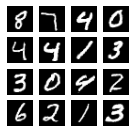

In [17]:
class_label=None
noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
step = 0
if class_label is None:
    num_labels = 10
    noise_class = np.eye(num_labels)[np.random.choice(num_labels, 16)]
else:
    noise_class = np.zeros((16, 10))
    noise_class[:,class_label] = 1
    step = class_label

gan.plot_images(generator_pretrain,
            noise_input=noise_input,
            noise_class=noise_class,
            type="cgan",
            show=True,
            step=step,
            model_name="test_outputs")